In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def getxy(xy):
    real, user, energy, threads = zip(*xy)
    real = list(map(lambda x: x / 1e9, real))
    user = list(map(lambda x: x / 1e9, user))
    energy = list(map(lambda y: y / 1e6, energy))
    energy_user = [(e if u >= r else e * (u / r)) for e, u, r in zip(energy, user, real)]
    w = [e / s for e, s in zip(energy, real)]
    print('Energy:', sum(energy), 'Real time:', sum(real), 'User time:', sum(user))
    return (real, user, energy, energy_user, w, threads)

In [4]:
def accx(x, offset=0):
    x2 = [x[0] + offset]
    for i, x in enumerate(x[1:]):
        x2.append(x2[i] + x)
    return x2

# Cluster - Dynamic Adaptation

- Every 30 iterations
- Frequency distribution
- Only including energy for user time / real time
- Penalizing for wasted time (real time > user time)
- So single-threaded performance estimation, instead we simply keep track of the best result

Energy: 24274.705733 Real time: 606.448872276 User time: 459.694563377
Energy: 18556.920696 Real time: 465.076693959 User time: 326.942441861


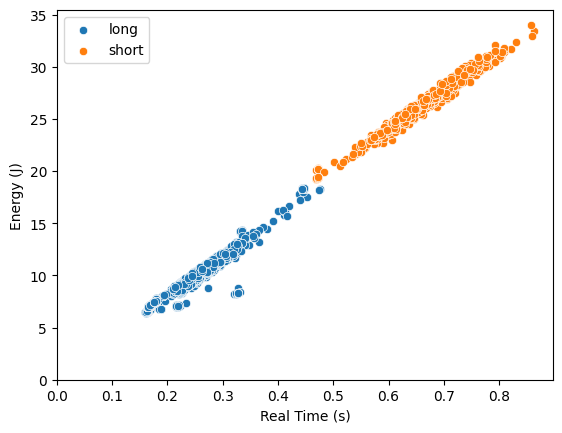

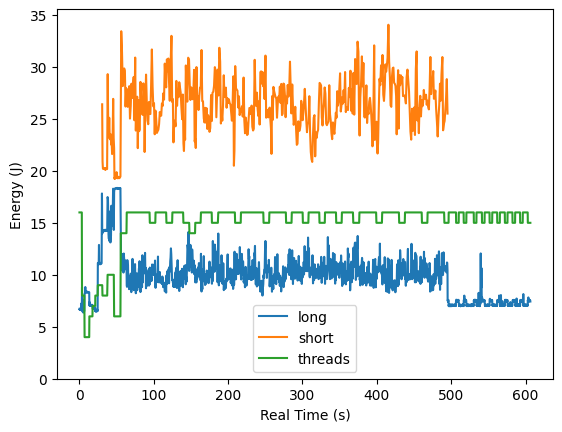

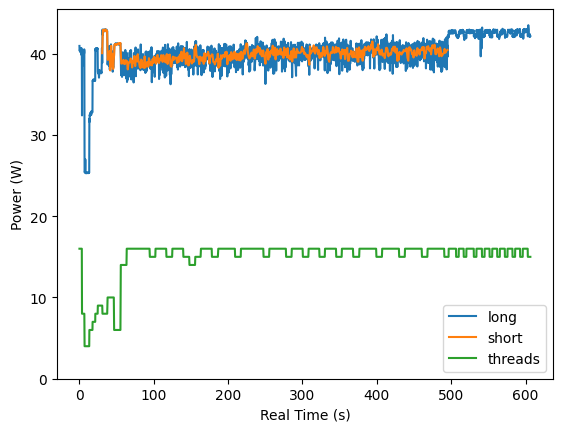

In [6]:
#real, user, energy, energy_user, est, t = getxy([(648010524, 329247924, 25987116, 25987116, 16), (555983658, 278648255, 22833132, 22833131, 16), (579958653, 287271163, 23096865, 23096865, 16), (567991586, 278236527, 22932375, 22932375, 16), (572036060, 284422510, 23480348, 23480348, 16), (563952272, 282726349, 22950686, 22950686, 16), (600019596, 297203612, 24477050, 24477050, 16), (747990949, 353734631, 29990584, 29990584, 16), (664006440, 309977221, 26809563, 26809563, 16), (643989044, 309866093, 25916438, 25916438, 16), (615990182, 309497553, 24874875, 24874875, 16), (616001033, 302828476, 25080136, 25080136, 16), (645657300, 309064415, 26035273, 26035273, 16), (654285936, 314463905, 25654780, 25654780, 16), (647990271, 321980677, 25707148, 25707148, 16), (612030025, 306025748, 24831662, 24831662, 16), (607993105, 327960534, 24516844, 24516844, 16), (635960772, 345726521, 24986630, 24986630, 16), (600037919, 309487595, 24300353, 24300353, 16), (635948106, 323209752, 25105344, 25105344, 16), (643994204, 334802815, 25267635, 25267635, 16), (659998874, 336518928, 25898433, 25898433, 16), (636019403, 326473895, 25581356, 25581356, 16), (683965773, 341221126, 26987113, 26987113, 16), (679992670, 353735933, 26574395, 26574394, 16), (636017269, 335981514, 25714778, 25714777, 16), (630429814, 321626881, 25511531, 25511531, 16), (629558932, 335586224, 25281918, 25281918, 16), (656009650, 329065699, 26547295, 26547295, 16), (561582249, 283080801, 22948306, 22948306, 16), (630341541, 328773457, 24805295, 24805295, 16), (622163533, 309487836, 25304440, 25304439, 16), (649820417, 335514026, 25601252, 25601251, 16), (743991661, 394656520, 29023668, 29023668, 16), (739992120, 416650914, 28832690, 28832690, 16), (715995263, 406096765, 27905202, 27905202, 16), (736023291, 411264196, 29263902, 29263901, 16), (607985588, 314990467, 24613890, 24613890, 16), (619987936, 315598021, 25254940, 25254940, 16), (624017395, 315181238, 25643428, 25643428, 16), (651945912, 310227455, 26226373, 26226373, 16), (603990346, 293637478, 24223388, 24223388, 16), (563991702, 275233408, 22515018, 22515018, 16), (553927521, 262965505, 22871524, 22871524, 16), (610096169, 298078856, 24707700, 24707700, 16), (623961539, 298457775, 24872434, 24872434, 16), (560027236, 269453761, 23325013, 23325013, 16), (621941511, 290859217, 25453915, 25453915, 16), (574050769, 275841690, 23734436, 23734436, 16), (563953580, 266242929, 22641849, 22641849, 16), (592049784, 280199790, 24278441, 24278441, 16), (582354464, 276388201, 23637208, 23637208, 16), (617579349, 301755017, 24653867, 24653867, 16), (648038042, 328865236, 26236871, 26236871, 16), (563941778, 287985689, 22535526, 22535526, 16), (559992517, 287747442, 22569888, 22569888, 16), (543999494, 274752905, 21508185, 21508185, 16), (636026330, 323321718, 26102655, 26102655, 16), (572001214, 292081832, 23823365, 23823365, 16), (599949699, 350620010, 24259642, 24259641, 16), (576009186, 383230300, 23065615, 23065615, 16), (507981752, 350977410, 20271615, 20271615, 16), (495974508, 323707115, 19662120, 19662120, 16), (480023344, 325498903, 19442882, 19442882, 16), (499991021, 339236600, 20109385, 20109385, 16), (511961924, 350971893, 20088572, 20088571, 16), (508004471, 345025983, 20213083, 20213083, 16), (478135744, 333374096, 19434582, 19434582, 16), (489868825, 343783070, 19708140, 19708140, 16), (495967273, 333843555, 19768199, 19768199, 16), (596018300, 404355188, 23219423, 23219423, 16), (552012954, 383745136, 22191228, 22191228, 16), (519985880, 358985508, 20711067, 20711067, 16), (545960140, 366035185, 22131658, 22131658, 16), (561990476, 378122246, 21440924, 21440924, 16), (541637663, 356590053, 22098638, 22098638, 16), (570370658, 359379641, 22160893, 22160893, 16), (476000414, 311000299, 19737315, 19737315, 16), (495998414, 322998587, 19705821, 19705821, 16), (470620922, 322378742, 19434459, 19434459, 16), (476651447, 336388944, 19149671, 19149671, 16), (470166689, 325978599, 19254528, 19254528, 16), (482551850, 345654378, 19469005, 19469005, 16), (598176701, 409117168, 23932373, 23932373, 16), (485800706, 321347466, 19301892, 19301892, 16), (499848584, 338831202, 20426461, 20426461, 16), (548144330, 382113698, 21700933, 21700932, 16), (487975002, 342733612, 19972727, 19972727, 16), (506168484, 353380878, 20239817, 20239816, 16), (569834785, 385105737, 23016726, 23016726, 16), (489776183, 327824831, 19454234, 19454234, 16), (510141110, 357837375, 20270456, 20270456, 16), (499992688, 345730713, 19650096, 19650096, 16), (504030075, 338135062, 20775032, 20775032, 16), (507988606, 342473661, 20393564, 20393564, 16), (604002434, 416361777, 24227965, 24227965, 16), (495982564, 334735074, 19962961, 19962961, 16), (491966389, 346271729, 19625744, 19625744, 16), (476027524, 319977214, 19324901, 19324901, 16), (531960450, 357252119, 21130622, 21130622, 16), (631992631, 411889465, 24645628, 24645628, 16), (555987462, 376564306, 21650946, 21650946, 16), (494088828, 338249912, 19932200, 19932199, 16), (633902240, 425209704, 24687315, 24687315, 16), (489402795, 318844123, 20130625, 20130624, 16), (518581675, 327260687, 20879463, 20879463, 16), (516045540, 334765792, 21114753, 21114753, 16), (571935234, 364855971, 22566532, 22566531, 16), (512021933, 322152069, 21294013, 21294013, 16), (511990246, 318133202, 20368539, 20368539, 16), (479980422, 317227012, 20048167, 20048166, 16), (520008002, 345261830, 20603218, 20603218, 16), (494259584, 318869633, 20629159, 20629159, 16), (545714645, 347129131, 21680242, 21680242, 16), (603997677, 394687303, 24447142, 24447142, 16), (563958690, 381371970, 21638128, 21638128, 16), (547993758, 356403368, 22141545, 22141545, 16), (583995572, 355152821, 22960696, 22960696, 16), (576024947, 334440292, 23397523, 23397523, 16), (647962525, 388885527, 25981623, 25981623, 16), (576000170, 364567671, 23810791, 23810791, 14), (614463409, 389018534, 25159115, 25159115, 14), (662831509, 440974190, 26573297, 26573297, 14), (602677769, 399607251, 24237120, 24237120, 14), (708009403, 486241582, 28075917, 28075917, 14), (587958264, 387970849, 24104553, 24104553, 14), (530286441, 357274157, 22129277, 22129277, 14), (548445585, 389544370, 22090458, 22090458, 14), (553291346, 376939980, 22506168, 22506168, 14), (578520972, 371317781, 23970215, 23970215, 14), (697413606, 464365663, 27598135, 27598135, 14), (715995489, 453954871, 27996876, 27996876, 14), (540026993, 347413193, 22290104, 22290104, 14), (583991729, 373985161, 23766479, 23766479, 14), (615852241, 397371005, 25118405, 25118405, 14), (584141982, 387985369, 24129516, 24129516, 14), (703956166, 472522958, 27912771, 27912770, 14), (695993071, 481493185, 27296377, 27296377, 14), (695998190, 455624658, 27372855, 27372854, 14), (695987658, 446995946, 27376334, 27376334, 14), (699989577, 432229845, 27933400, 27933400, 14), (570996927, 349464655, 23297731, 23297731, 14), (543705140, 314000905, 22831972, 22831972, 14), (563836722, 338584531, 23384035, 23384034, 14), (543461700, 339309337, 22326969, 22326969, 14), (591813023, 368821638, 24474791, 24474791, 14), (606148390, 376704798, 24209716, 24209716, 14), (544247634, 330970620, 22598331, 22598331, 14), (579778652, 339954976, 24082335, 24082335, 14), (667989227, 406550532, 27241569, 27241568, 14), (663960834, 385147499, 27037833, 27037832, 15), (691969373, 381877955, 27755606, 27755606, 15), (648002893, 349582797, 26079828, 26079828, 15), (603998441, 317848391, 24523131, 24523130, 15), (575994281, 293581264, 24254698, 24254698, 15), (543990362, 274659356, 22792422, 22792422, 15), (523993376, 272402314, 22082708, 22082707, 15), (531997054, 280214569, 22498660, 22498659, 15), (615971057, 323725596, 24943113, 24943113, 15), (660011333, 351996548, 27098929, 27098929, 15), (532024325, 295280888, 22329350, 22329350, 15), (520473921, 278960865, 22114751, 22114751, 15), (543458008, 287922232, 22379825, 22379825, 15), (600032532, 308652611, 24960630, 24960630, 15), (532397668, 276544389, 22499027, 22499027, 15), (646149858, 337015825, 26715019, 26715019, 15), (507166639, 279378178, 21382758, 21382757, 15), (598217204, 329042473, 24430357, 24430357, 15), (559994464, 305143817, 22938601, 22938601, 15), (548634861, 288876918, 23021792, 23021792, 15), (531389931, 290085860, 22498478, 22498478, 15), (535982969, 281235862, 22719851, 22719850, 15), (608482194, 325344615, 25218197, 25218197, 15), (643480346, 330557366, 25944026, 25944026, 15), (671996245, 340865491, 27304008, 27304008, 15), (524447396, 281624903, 22055729, 22055729, 15), (567538770, 312207431, 23347536, 23347536, 15), (648011612, 361057796, 26539604, 26539604, 15), (660002043, 381328823, 27016960, 27016960, 15), (540003749, 287400410, 22815432, 22815432, 15), (563956024, 286501488, 23687074, 23687074, 16), (635990801, 340994316, 26098016, 26098016, 16), (607999824, 330197994, 25002622, 25002621, 16), (603957919, 311104773, 24335387, 24335387, 16), (624030266, 321032194, 25864314, 25864314, 16), (619989941, 324245845, 25719783, 25719782, 16), (608015629, 318712862, 25300472, 25300472, 16), (619964790, 325180414, 25256954, 25256954, 16), (632010149, 332018611, 26006586, 26006586, 16), (591989919, 297251169, 25014463, 25014463, 16), (635988549, 335449665, 26200616, 26200616, 16), (631955181, 351240234, 25401485, 25401484, 16), (536035025, 295235059, 22586978, 22586978, 16), (615986411, 321712988, 25541744, 25541744, 16), (608000721, 319103997, 25269039, 25269039, 16), (591988798, 312122899, 24687193, 24687193, 16), (635956812, 320129829, 25717403, 25717403, 16), (600028973, 301615760, 24947751, 24947751, 16), (599957222, 317488378, 24241576, 24241576, 16), (656027710, 341771000, 27238333, 27238332, 16), (623997890, 317732990, 25949153, 25949153, 16), (550327213, 276395400, 23101808, 23101808, 16), (643550685, 321558777, 26549676, 26549676, 16), (598076583, 302121379, 24811521, 24811521, 16), (596006492, 307941091, 24678892, 24678891, 16), (608017918, 320399282, 25497066, 25497065, 16), (563967755, 300982285, 23538819, 23538819, 16), (544009188, 289444206, 22786807, 22786807, 16), (543951440, 288992685, 22507450, 22507450, 16), (580024050, 296126476, 24119078, 24119078, 16), (651969032, 333037071, 26970513, 26970513, 15), (603992700, 307677383, 25301082, 25301082, 15), (579970217, 286501578, 23785035, 23785035, 15), (547994973, 276304349, 22818484, 22818484, 15), (603992756, 311161789, 24690794, 24690794, 15), (611992821, 314492213, 24795224, 24795223, 15), (563994506, 286256487, 23378663, 23378663, 15), (679997448, 351348519, 27295585, 27295584, 15), (572018577, 301596845, 23869507, 23869506, 15), (631993636, 337756395, 26286737, 26286736, 15), (660032717, 342785744, 27093742, 27093742, 15), (615939806, 331058441, 25552669, 25552669, 15), (688018536, 377814391, 28199207, 28199207, 15), (547994720, 295366428, 23186220, 23186220, 15), (635996677, 339419405, 26386407, 26386406, 15), (511994174, 274156833, 21677801, 21677801, 15), (536996017, 289244860, 22764651, 22764651, 15), (521093512, 275180515, 22169804, 22169803, 15), (629852072, 334516321, 25772884, 25772884, 15), (679992651, 347081094, 27344778, 27344778, 15), (544024718, 293055605, 22790652, 22790652, 15), (544901523, 292051834, 22811099, 22811099, 15), (523049447, 277862939, 21672796, 21672795, 15), (652034636, 345840239, 27293448, 27293448, 15), (687956615, 379171354, 28266468, 28266467, 15), (780758556, 440660301, 31334087, 31334087, 15), (779257139, 448856161, 31437176, 31437176, 15), (725330821, 412061745, 29085375, 29085375, 15), (253145318, 252071458, 10880953, 10880952, 15), (252674757, 251479912, 10942660, 10942659, 15), (271876369, 272192655, 11591096, 11591096, 14), (271525439, 271942945, 11548798, 11548798, 14), (271339777, 271946340, 11546358, 11546358, 14), (272329933, 271971084, 11622712, 11622712, 14), (271845681, 271975510, 11556916, 11556916, 14), (271626205, 271963200, 11556245, 11556245, 14), (271506778, 271959947, 11594575, 11594575, 14), (270994056, 271893936, 11546967, 11546967, 14), (271245626, 268229174, 11547273, 11547272, 14), (271668392, 271972830, 11587800, 11587800, 14), (271065211, 271879743, 11534455, 11534455, 14), (271288443, 271936522, 11580781, 11580781, 14), (310424807, 309115575, 12922758, 12922758, 14), (271191492, 268225641, 11586518, 11586518, 14), (271192485, 271915946, 11552949, 11552949, 14), (271871298, 271990839, 11605134, 11605134, 14), (271355524, 271944455, 11555512, 11555512, 14), (271571669, 271943198, 11583161, 11583161, 14), (271349427, 271946895, 11550447, 11550447, 14), (271328347, 268227805, 11574311, 11574311, 14), (271696683, 271969821, 11581330, 11581330, 14), (271445096, 271924809, 11589509, 11589509, 14), (270634099, 271901082, 11523713, 11523713, 14), (270956035, 271916967, 11568879, 11568879, 14), (270853984, 268197288, 11559480, 11559480, 14), (271035535, 271906354, 11550324, 11550324, 14), (271221822, 271932301, 11560213, 11560213, 14), (271353598, 271951443, 11590790, 11590790, 14), (271233439, 271942346, 11563996, 11563996, 14), (271113594, 268216120, 11570222, 11570222, 14), (290251645, 292135374, 11903900, 11903900, 13), (290868084, 291903788, 12285797, 12285797, 13), (289907613, 288110222, 12244109, 12244109, 13), (290374761, 291857833, 12242705, 12242705, 13), (290786114, 288209164, 12283233, 12283233, 13), (290509648, 291868716, 12303680, 12303680, 13), (290368237, 291872720, 12247161, 12247161, 13), (291212031, 288237010, 12285246, 12285246, 13), (290851160, 291908435, 12302154, 12302154, 13), (290562737, 291839565, 12277862, 12277862, 13), (290335843, 288178012, 12250212, 12250212, 13), (291913233, 291985200, 12319427, 12319427, 13), (290480909, 291846838, 12255889, 12255889, 13), (291675414, 291947413, 12302764, 12302764, 13), (293784840, 292081811, 12399748, 12399748, 13), (307660224, 307670111, 12865690, 12865690, 13), (291984050, 291998327, 12318999, 12318999, 13), (290791571, 291907133, 12270233, 12270233, 13), (291326936, 291945048, 12346648, 12346648, 13), (290789418, 291904654, 12246917, 12246917, 13), (291925550, 288300525, 12313445, 12313445, 13), (290676487, 291895397, 12291167, 12291167, 13), (291202546, 291886843, 12285613, 12285613, 13), (290911547, 291914379, 12287444, 12287444, 13), (290767054, 288204278, 12294219, 12294219, 13), (290376020, 291909472, 12256316, 12256316, 13), (292020591, 291955057, 12337981, 12337980, 13), (291109076, 291927650, 12293426, 12293426, 13), (290107189, 288161368, 12291228, 12291228, 13), (291080171, 291920571, 12294952, 12294952, 13), (271131751, 271752623, 11556428, 11556428, 14), (270688775, 271905695, 11547150, 11547150, 14), (270674882, 268190830, 11561189, 11561188, 14), (270904383, 271886812, 11561555, 11561555, 14), (271295633, 271948350, 11581147, 11581147, 14), (270709284, 268192607, 11574128, 11574127, 14), (271369772, 271950993, 11607575, 11607575, 14), (270823166, 271916033, 11532380, 11532380, 14), (271270574, 271945778, 11605440, 11605440, 14), (270410140, 268171298, 11538605, 11538605, 14), (270627501, 271888012, 11568086, 11568086, 14), (271145642, 271933176, 11599641, 11599641, 14), (270720123, 271901173, 11521393, 11521393, 14), (270848473, 268202887, 11564668, 11564668, 14), (271495509, 271890258, 11588593, 11588593, 14), (270538504, 271894898, 11520296, 11520296, 14), (271177147, 271941141, 11632660, 11632660, 14), (271159671, 268219585, 11589753, 11589753, 14), (270911459, 271920589, 11578035, 11578035, 14), (270872982, 271899039, 11539338, 11539338, 14), (270739275, 268193877, 11566621, 11566621, 14), (271151389, 271934985, 11587494, 11587494, 14), (270619550, 271898507, 11585542, 11585542, 14), (270888619, 271920634, 11575288, 11575288, 14), (270796691, 268199706, 11581940, 11581940, 14), (270604912, 271866804, 11531831, 11531831, 14), (270634844, 271896349, 11569184, 11569184, 14), (271908127, 271993206, 11622712, 11622712, 14), (271530700, 271953220, 11578157, 11578157, 14), (270810907, 268198251, 11551545, 11551545, 14), (253616854, 255647744, 10965975, 10965975, 15), (254257258, 252135545, 10952853, 10952853, 15), (254169554, 255873887, 10963107, 10963107, 15), (253861945, 252121840, 10964571, 10964571, 15), (253969908, 255861540, 10957064, 10957064, 15), (253550371, 252102412, 10949741, 10949741, 15), (253499352, 252092084, 10939303, 10939303, 15), (253752819, 255843242, 10933382, 10933382, 15), (253851205, 252113058, 10945468, 10945468, 15), (252575309, 252037643, 10871981, 10871981, 15), (253509570, 252097256, 10962313, 10962313, 15), (252882008, 252043559, 10924106, 10924106, 15), (252663167, 252043486, 10915865, 10915865, 15), (253108448, 255798476, 10905368, 10905368, 15), (253478617, 252091223, 10899630, 10899629, 15), (252545558, 252032630, 10905490, 10905490, 15), (253959427, 255851811, 10890231, 10890231, 15), (255964038, 255734412, 11056185, 11056185, 15), (253978677, 252124796, 10954257, 10954257, 15), (258290962, 258897536, 11229707, 11229707, 15), (252694801, 252036165, 10947360, 10947360, 15), (252643421, 252029137, 10918307, 10918307, 15), (253817038, 252066380, 11029269, 11029269, 15), (253962762, 255860474, 11014864, 11014864, 15), (252512853, 252030652, 10962191, 10962190, 15), (252961383, 252064060, 10966341, 10966340, 15), (254292828, 255874556, 11028476, 11028476, 15), (253375945, 252061072, 10976534, 10976534, 15), (252672452, 252043307, 10969637, 10969637, 15), (252366062, 252022730, 10942599, 10942599, 15), (237847084, 239085705, 10414952, 10414952, 16), (234443034, 235898460, 10235325, 10235325, 16), (235173556, 232181780, 10353916, 10353915, 16), (236077211, 236003788, 10342076, 10342076, 16), (234754465, 235917653, 10307408, 10307408, 16), (261713891, 255149967, 11330049, 11330048, 16), (332026475, 318924559, 14038172, 14038172, 16), (396157365, 377467348, 16329365, 16329365, 16), (241557524, 237826624, 10656894, 10656894, 16), (241477044, 238188995, 10595920, 10595920, 16), (241127408, 242015752, 10562718, 10562718, 16), (244061470, 241500061, 10708712, 10708711, 16), (277074241, 269997324, 11974518, 11974518, 16), (238757066, 238227980, 10483738, 10483738, 16), (238739085, 234315936, 10541233, 10541233, 16), (246319661, 242778400, 10826083, 10826083, 16), (260392594, 256034563, 11359407, 11359407, 16), (306391116, 295398213, 12619596, 12619596, 16), (301621941, 283603084, 13050504, 13050504, 16), (338052251, 319438087, 14295922, 14295922, 16), (356295051, 332684956, 14702050, 14702050, 16), (287987591, 270499065, 12161285, 12161285, 16), (291055969, 270594053, 12670805, 12670804, 16), (340920836, 323370466, 13960596, 13960596, 16), (379989358, 357567691, 15458883, 15458883, 16), (310067227, 297750216, 12790312, 12790312, 16), (333919769, 314802953, 14030482, 14030482, 16), (368020428, 350349239, 15345481, 15345481, 16), (284403868, 278514460, 12243682, 12243682, 16), (235160548, 232190455, 10360020, 10360020, 16), (234830682, 235906920, 10364231, 10364231, 16), (234265696, 235885902, 10301121, 10301121, 16), (235104587, 232149196, 10351353, 10351353, 16), (235490769, 235943093, 10388829, 10388829, 16), (235373857, 235947037, 10350498, 10350498, 16), (234631804, 235909821, 10361302, 10361302, 16), (234989926, 235925164, 10372776, 10372776, 16), (235007243, 232172832, 10368809, 10368809, 16), (234255287, 235870537, 10343906, 10343906, 16), (235026889, 235928224, 10365330, 10365330, 16), (234214757, 232123394, 10324986, 10324986, 16), (234434531, 235892370, 10375156, 10375156, 16), (234308221, 232125036, 10320287, 10320287, 16), (235841241, 236036227, 10416416, 10416416, 16), (234609778, 235836620, 10322239, 10322239, 16), (235014810, 235884844, 10410801, 10410801, 16), (234527647, 232109928, 10305760, 10305760, 16), (234649937, 235894200, 10378635, 10378635, 16), (234217897, 235876248, 10336888, 10336888, 16), (234718940, 232152637, 10376072, 10376072, 16), (234878070, 235921118, 10362583, 10362583, 16), (235182218, 235946776, 10368687, 10368687, 16), (234413936, 232147491, 10343785, 10343785, 16), (234618076, 235900793, 10379307, 10379307, 16), (234672423, 235910970, 10346287, 10346287, 16), (234818745, 232144975, 10384739, 10384739, 16), (235049817, 235930008, 10374424, 10374424, 16), (234618807, 235907799, 10381260, 10381260, 16), (234571783, 235877823, 10363010, 10363010, 16), (234548456, 232150736, 10343724, 10343724, 16), (253146584, 252242824, 11024386, 11024385, 15), (253056560, 255793117, 11037508, 11037508, 15), (253096065, 252066829, 11032137, 11032137, 15), (252649151, 252037402, 11037936, 11037936, 15), (254628709, 255725299, 11150179, 11150179, 15), (253042101, 251880226, 11247896, 11247896, 15), (254035037, 255549656, 11332429, 11332429, 15), (252506041, 252031101, 11267855, 11267855, 15), (252729249, 251998511, 11219270, 11219270, 15), (252508756, 252040248, 11234469, 11234469, 15), (254024527, 255728697, 11338533, 11338533, 15), (253944401, 252087213, 11369172, 11369172, 15), (252756229, 252035527, 11317781, 11317781, 15), (253259656, 255807723, 11385164, 11385164, 15), (252766800, 252046033, 11306917, 11306916, 15), (252864729, 252023309, 11211092, 11211092, 15), (252783649, 252028649, 11220857, 11220857, 15), (253089175, 252062547, 11253695, 11253694, 15), (252647322, 255736102, 11234895, 11234895, 15), (252614345, 251989699, 11188082, 11188082, 15), (252673204, 251945415, 11256197, 11256197, 15), (252677455, 251959526, 11242464, 11242464, 15), (252897736, 251961746, 11240938, 11240938, 15), (254414398, 255887599, 11293977, 11293977, 15), (255214757, 255926464, 11333589, 11333589, 15), (254996203, 252149512, 11329927, 11329927, 15), (255320582, 255912860, 11375704, 11375704, 15), (254669502, 255846114, 11303071, 11303071, 15), (255467880, 255937827, 11392000, 11392000, 15), (256221181, 256001001, 11377595, 11377595, 15), (376079271, 352365925, 15719320, 15719320, 16), (369805726, 345085882, 15465476, 15465476, 16), (334560079, 314987921, 14236170, 14236170, 16), (409909161, 385947778, 16770220, 16770220, 16), (343518916, 318954106, 14567406, 14567406, 16), (345095371, 326055495, 14578271, 14578271, 16), (349031018, 326308484, 14750695, 14750695, 16), (315519927, 296201965, 13517848, 13517848, 16), (439834417, 412457785, 18044693, 18044693, 16), (391560446, 367169987, 16246235, 16246235, 16), (371413593, 348285350, 15559531, 15559531, 16), (331957033, 304812299, 13688746, 13688746, 16), (269970513, 259906541, 11722138, 11722138, 16), (242015176, 241419889, 10642001, 10642001, 16), (242640810, 237714763, 10680698, 10680697, 16), (262701870, 257624846, 11481294, 11481294, 16), (237509036, 235904691, 10465916, 10465915, 16), (240361376, 238869912, 10607516, 10607516, 16), (240355562, 237579524, 10574924, 10574924, 16), (242987408, 240882230, 10720310, 10720310, 16), (361414401, 346891174, 15101341, 15101341, 16), (294920690, 279890577, 12688688, 12688688, 16), (294540437, 285990276, 12655241, 12655240, 16), (306710142, 295644837, 13169217, 13169217, 16), (489468153, 464338947, 19895945, 19895945, 16), (282051257, 271337856, 12219390, 12219390, 16), (241837880, 243244249, 10641025, 10641025, 16), (234535232, 235865349, 10389866, 10389866, 16), (234678605, 232130786, 10343113, 10343112, 16), (235066564, 235931819, 10380039, 10380039, 16), (234422023, 235887898, 10379429, 10379429, 16), (234970623, 232074662, 10376134, 10376134, 16), (234386955, 235835126, 10343784, 10343784, 16), (235495534, 235846478, 10418247, 10418247, 16), (234670401, 232151185, 10352086, 10352086, 16), (235502484, 235959309, 10431247, 10431247, 16), (234363158, 235875566, 10350804, 10350804, 16), (234750794, 235904649, 10382359, 10382359, 16), (235022907, 232153267, 10381687, 10381687, 16), (234293986, 235881436, 10337864, 10337864, 16), (235185662, 235931557, 10417637, 10417637, 16), (235303786, 235827544, 10382420, 10382420, 16), (234769223, 232151295, 10388035, 10388035, 16), (234827367, 235921623, 10339878, 10339878, 16), (234476783, 235899716, 10379856, 10379856, 16), (234707759, 232113937, 10377842, 10377842, 16), (235434353, 235959025, 10377476, 10377476, 16), (234142637, 235864756, 10340123, 10340123, 16), (235057775, 232179010, 10390659, 10390658, 16), (235042190, 235907381, 10384739, 10384739, 16)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(639979238, 312456495, 25233090, 25233090, 16), (580203489, 287779639, 23745728, 23745727, 16), (519802773, 260615330, 21360785, 21360785, 16), (528002729, 269744693, 21869939, 21869938, 16), (567955909, 284980949, 23141481, 23141481, 16), (492022650, 248996883, 20563729, 20563728, 16), (583959972, 295751674, 23260255, 23260255, 16), (608023162, 315988162, 24526366, 24526366, 16), (623986355, 329712930, 24760984, 24760984, 16), (631969406, 332795465, 24901852, 24901852, 16), (636022579, 323182344, 25708857, 25708857, 16), (587962352, 293384671, 23508180, 23508179, 16), (611994233, 311724475, 24443175, 24443175, 16), (675991750, 355914034, 26428705, 26428704, 16), (601794515, 311645084, 24199645, 24199645, 16), (614191693, 304102311, 24454649, 24454649, 16), (656021716, 319739195, 26629082, 26629082, 16), (663997064, 301490111, 26916862, 26916861, 16), (651991945, 308223577, 26160334, 26160334, 16), (631964371, 311157055, 25051999, 25051998, 16), (675998924, 326035465, 26616021, 26616021, 16), (670176463, 323616203, 26851372, 26851372, 16), (649844579, 319649625, 26203241, 26203240, 16), (639990383, 315748105, 25766047, 25766047, 16), (691958223, 343954934, 27057731, 27057731, 16), (620029950, 287997052, 24967649, 24967649, 16), (635989373, 307465583, 25594356, 25594356, 16), (643961055, 310233552, 25358883, 25358883, 16), (644030853, 307079392, 25990412, 25990412, 16), (571989833, 291743854, 23099489, 23099489, 16), (654999137, 313042573, 26362115, 26362115, 16), (608026536, 302241136, 24532225, 24532224, 16), (643964701, 315941809, 25816279, 25816279, 16), (734982339, 342388198, 29450242, 29450242, 16), (733043594, 329311557, 29049913, 29049913, 16), (713528553, 305586211, 28303089, 28303089, 16), (722416722, 318718218, 28347401, 28347401, 16), (681735512, 316306107, 27322623, 27322622, 16), (618273118, 300518023, 25143673, 25143673, 16), (544002356, 267278882, 22312931, 22312931, 16), (575982887, 293238292, 23425050, 23425049, 16), (539972536, 282832578, 21445746, 21445746, 16), (616027011, 315698024, 25124874, 25124874, 16), (571958730, 295371548, 22994021, 22994021, 16), (632033120, 327736270, 25939936, 25939936, 16), (623995642, 325241656, 25346859, 25346859, 16), (544000133, 280248940, 22331852, 22331852, 16), (559986639, 292730390, 23143679, 23143679, 16), (567987116, 299981747, 23238038, 23238038, 16), (579957570, 304514132, 23369081, 23369081, 16), (608024324, 320467931, 24971677, 24971677, 16), (651968410, 342984900, 26136164, 26136164, 16), (668016644, 349009884, 27354972, 27354971, 16), (647967293, 321598794, 25837885, 25837885, 16), (663997171, 325725945, 26612603, 26612603, 16), (559985651, 275238693, 22588749, 22588749, 16), (576031761, 281487409, 23886841, 23886840, 16), (575960518, 283969668, 23683289, 23683288, 16), (552017679, 272602121, 22791689, 22791689, 16), (563966662, 274210268, 23263979, 23263979, 16), (1059991216, 677421986, 42443373, 42443372, 8), (943993305, 630483911, 37946314, 37946313, 8), (951988323, 610985811, 38399743, 38399743, 8), (968004847, 609891845, 38937461, 38937461, 8), (951960073, 574507582, 37888087, 37888087, 8), (1120015750, 715945537, 44627266, 44627265, 8), (1027999254, 637593391, 41077592, 41077592, 8), (1047961788, 694373671, 41219621, 41219621, 8), (1100651907, 784025262, 43836436, 43836436, 8), (971365089, 674890810, 39403464, 39403464, 8), (987995311, 598713231, 40185383, 40185383, 8), (971957820, 575771360, 39065085, 39065085, 8), (1051996151, 685464777, 41266862, 41266862, 8), (1039992765, 637971128, 41274552, 41274552, 8), (972653365, 579466800, 39334494, 39334494, 8), (1047363811, 686909539, 42019058, 42019058, 8), (956004156, 582996495, 38917442, 38917441, 8), (983948328, 640481917, 39410543, 39410542, 8), (1028026820, 653963596, 41324235, 41324235, 8), (955963031, 597857517, 38657616, 38657616, 8), (1065225329, 697033765, 43141674, 43141674, 8), (1112107742, 711019755, 44428841, 44428841, 8), (1054640055, 693528697, 41566727, 41566727, 8), (987994730, 657621726, 40082478, 40082478, 8), (983989295, 662302182, 39475790, 39475790, 8), (946319116, 692703423, 38526269, 38526269, 8), (1017315319, 686591664, 41313737, 41313737, 8), (925874775, 662097794, 37867274, 37867274, 8), (1136799392, 774535364, 45422247, 45422246, 8), (953645518, 659208103, 38167321, 38167321, 8), (743937924, 420954508, 29804062, 29804062, 12), (739996488, 397995232, 29525315, 29525315, 12), (712007324, 423648494, 29148973, 29148973, 12), (795973251, 461633382, 32066569, 32066568, 12), (831993540, 457385831, 33290625, 33290625, 12), (828025875, 454251077, 32890602, 32890602, 12), (701653320, 387123395, 28757007, 28757007, 12), (782297705, 413494060, 31819926, 31819926, 12), (824023668, 440176527, 33203650, 33203650, 12), (717823781, 410766016, 29687424, 29687423, 12), (854128758, 491488499, 33965307, 33965307, 12), (672025942, 392306747, 27189261, 27189260, 12), (727990680, 429991594, 29842575, 29842575, 12), (683993616, 397277244, 27802908, 27802908, 12), (691986465, 385992295, 28421436, 28421436, 12), (813635217, 449514301, 32789711, 32789711, 12), (862330117, 449859653, 34061192, 34061191, 12), (828041164, 484570162, 33174048, 33174048, 12), (787945955, 472959738, 30816206, 30816205, 12), (699988594, 434172156, 27818227, 27818227, 12), (683993609, 449060796, 27779836, 27779835, 12), (695992482, 429792345, 28418446, 28418446, 12), (636030636, 383663825, 26563775, 26563775, 12), (723956939, 446809232, 29134874, 29134874, 12), (644025827, 398693964, 26501702, 26501702, 12), (668010488, 433251846, 27613943, 27613943, 12), (743979322, 461869315, 30264877, 30264877, 12), (815988685, 496266921, 33129187, 33129186, 12), (803991521, 536237588, 32475991, 32475990, 12), (731963288, 487600592, 29280992, 29280992, 12), (552005100, 320561375, 23168337, 23168337, 14), (563985561, 346842451, 23554749, 23554749, 14), (567999674, 331516308, 23924561, 23924561, 14), (544124472, 315718545, 23055910, 23055910, 14), (635856099, 367923551, 26239374, 26239374, 14), (631982619, 362512462, 26024469, 26024468, 14), (604011096, 329013313, 25148862, 25148862, 14), (559980020, 319977211, 23683655, 23683655, 14), (591992181, 343178537, 24861508, 24861508, 14), (607971317, 356673253, 25145322, 25145322, 14), (591523270, 347927937, 24932309, 24932309, 14), (624499191, 357023754, 25807978, 25807978, 14), (607979619, 338851810, 25744685, 25744684, 14), (607990904, 335592270, 25304074, 25304074, 14), (607989673, 352960304, 25412959, 25412959, 14), (571960320, 319088107, 23622010, 23622010, 14), (560040132, 320096290, 23755067, 23755067, 14), (635103015, 361486449, 26572014, 26572014, 14), (684863652, 405964966, 28076649, 28076649, 14), (683997578, 414464231, 27915884, 27915884, 14), (591993262, 333906066, 24714048, 24714048, 14), (555992208, 311986570, 23428712, 23428712, 14), (675963186, 365415237, 27058585, 27058585, 14), (704019647, 371421339, 28755176, 28755175, 14), (547998263, 314281640, 23185304, 23185303, 14), (639995036, 356527710, 26707329, 26707329, 14), (731993594, 379981235, 30058395, 30058395, 14), (699963407, 377399069, 28402332, 28402332, 14), (636026928, 353032156, 26435175, 26435175, 14), (595957951, 331272406, 24252257, 24252257, 14), (639962640, 325073153, 25873713, 25873712, 15), (719996386, 366974195, 29307970, 29307969, 15), (704020309, 351997828, 28898424, 28898424, 15), (564023320, 289867580, 23790528, 23790528, 15), (656075726, 337050111, 27119254, 27119254, 15), (707842843, 337307424, 28419361, 28419361, 15), (668031936, 318913653, 27816213, 27816213, 15), (572001633, 294130162, 23777466, 23777466, 15), (615944184, 313505618, 25111813, 25111813, 15), (704035003, 351590209, 29197740, 29197740, 15), (587951889, 321335010, 23755615, 23755615, 15), (671991455, 350385500, 27210624, 27210624, 15), (604036407, 300137621, 25237667, 25237667, 15), (595992190, 306564596, 24641111, 24641111, 15), (603997077, 322128693, 25036069, 25036069, 15), (728340397, 372326642, 30489607, 30489607, 15), (683597493, 360643755, 27776662, 27776662, 15), (656033031, 349319019, 27265677, 27265677, 15), (587947251, 291789911, 24178588, 24178588, 15), (631997075, 314912172, 25967341, 25967340, 15), (620018495, 312782328, 25995356, 25995356, 15), (556707674, 277105271, 23554627, 23554627, 15), (639293490, 333336390, 26500787, 26500787, 15), (635947279, 353287092, 25904902, 25904902, 15), (588038756, 328568403, 24661497, 24661497, 15), (572004135, 325974966, 24042113, 24042113, 15), (517087685, 290943919, 22043767, 22043766, 15), (610840431, 338290654, 25162961, 25162961, 15), (632323858, 349346001, 26262567, 26262567, 15), (567664407, 316238944, 23436280, 23436280, 15), (666892801, 392310652, 27433096, 27433096, 14), (621125287, 360037146, 25811213, 25811213, 14), (615938108, 352022864, 25230282, 25230281, 14), (688072224, 402977785, 28204030, 28204030, 14), (639907521, 363225691, 26018793, 26018793, 14), (712022189, 392568587, 29179246, 29179246, 14), (607967973, 346036885, 24973386, 24973385, 14), (663992819, 377901394, 26942741, 26942740, 14), (563994114, 321466498, 23603699, 23603699, 14), (571991661, 326069026, 23760193, 23760193, 14), (568029117, 326664378, 24210143, 24210142, 14), (679987693, 396396637, 28129078, 28129077, 14), (655964410, 382516340, 26461358, 26461358, 14), (643996141, 363410434, 26637077, 26637076, 14), (555990292, 324544061, 23185732, 23185732, 14), (596045640, 339348008, 25209835, 25209835, 14), (655983968, 359989341, 27220084, 27220083, 14), (811950713, 442067281, 32208231, 32208231, 14), (831994600, 438204660, 32924049, 32924049, 14), (828030504, 451698536, 33212439, 33212439, 14)])

#real, user, energy, energy_user, est, t = getxy([(936015152, 392584583, 36820706, 36820706, 16), (827949159, 383208136, 31676067, 31676066, 16), (739994381, 340110611, 29066515, 29066515, 16), (768019254, 360511866, 30295332, 30295332, 16), (723960290, 375215102, 28012441, 28012441, 16), (736039656, 387294691, 29084642, 29084642, 16), (919943894, 462082755, 35575898, 35575898, 16), (831993167, 411977626, 32189676, 32189675, 16), (735992064, 365523900, 28820483, 28820483, 16), (604026067, 299187616, 24693418, 24693418, 16), (623987411, 298746070, 25449215, 25449214, 16), (591990284, 283547728, 24244383, 24244382, 16), (585556968, 285593501, 23724671, 23724671, 16), (605625164, 305970349, 24650511, 24650511, 16), (632767859, 339074913, 25126522, 25126522, 16), (544019498, 288998100, 22370487, 22370486, 16), (587967497, 297663961, 23708252, 23708252, 16), (676025236, 321681697, 27454703, 27454703, 16), (631988049, 288475630, 25859492, 25859492, 16), (643999877, 295242835, 26142877, 26142877, 16), (660002712, 299715981, 26724663, 26724663, 16), (719986341, 347460146, 28574451, 28574451, 16), (723963904, 318484980, 28633777, 28633777, 16), (656172673, 307371118, 26161555, 26161555, 16), (643813932, 311077839, 25638850, 25638850, 16), (662016916, 325063629, 26775871, 26775871, 16), (597996053, 312739828, 24143921, 24143920, 16), (607994016, 319224150, 24852719, 24852719, 16), (560000097, 285769983, 23184877, 23184877, 16), (567962784, 291462421, 23242006, 23242006, 16), (563964883, 288960524, 22503177, 22503177, 16), (608039737, 307555256, 25033200, 25033200, 16), (615989999, 312369551, 25592402, 25592402, 16), (663981507, 332159399, 27007561, 27007561, 16), (627962975, 311103055, 25074093, 25074093, 16), (628035753, 312709652, 25761774, 25761774, 16), (651948756, 312324273, 26034419, 26034419, 16), (624037657, 303850675, 25592891, 25592891, 16), (639953030, 322538219, 25445675, 25445675, 16), (659994194, 327443549, 26659783, 26659783, 16), (763980410, 387719128, 29660996, 29660995, 16), (759994968, 386881288, 30007187, 30007187, 16), (744034746, 368189338, 29813278, 29813278, 16), (719950667, 369231452, 28349171, 28349171, 16), (631994735, 319735998, 25164181, 25164180, 16), (595993871, 312112207, 23935363, 23935362, 16), (636034564, 328247771, 25934809, 25934809, 16), (599947799, 311283173, 24018249, 24018249, 16), (581669109, 303758327, 23854859, 23854859, 16), (606349830, 327597775, 24842343, 24842343, 16), (507994314, 255939507, 21175361, 21175361, 16), (503996797, 251730237, 21431769, 21431768, 16), (515961716, 258041806, 21456549, 21456548, 16), (480028753, 240918288, 20442575, 20442575, 16), (515961290, 257178003, 21321051, 21321051, 16), (482605080, 240410285, 20753426, 20753426, 16), (505385494, 255292595, 20944221, 20944221, 16), (484028891, 241468763, 20837715, 20837715, 16), (507960651, 253836948, 21218879, 21218879, 16), (482306161, 265892537, 20506906, 20506906, 16), (509707462, 353399651, 20966987, 20966987, 16), (487987843, 346199422, 19602489, 19602489, 16), (487990592, 334392903, 20209177, 20209177, 16), (491963130, 349241277, 19336071, 19336071, 16), (534873193, 369595534, 21831365, 21831365, 16), (533137989, 365282754, 21356696, 21356695, 16), (474756891, 319639448, 19745982, 19745982, 16), (489952718, 323617746, 19743052, 19743052, 16), (487281617, 335574260, 20074534, 20074534, 16), (531984633, 367649098, 21442938, 21442938, 16), (483974774, 321995109, 19386059, 19386059, 16), (512024730, 328490693, 20799202, 20799202, 16), (503992995, 336736779, 20409799, 20409799, 16), (479992430, 333473765, 19500499, 19500499, 16), (480000629, 335736055, 19705699, 19705699, 16), (481765453, 334853613, 19594371, 19594370, 16), (494230804, 326594157, 20245004, 20245004, 16), (483958235, 316976078, 19771007, 19771007, 16), (580013912, 412364479, 23058840, 23058840, 16), (503993505, 335994857, 20718148, 20718148, 16), (491973193, 329094174, 19268322, 19268322, 16), (476022597, 326465285, 19784557, 19784557, 16), (473548676, 314710682, 19258373, 19258373, 16), (494412424, 329898376, 20309030, 20309030, 16), (504009699, 334806552, 20303659, 20303659, 16), (503977417, 331746864, 20381235, 20381235, 16), (496135594, 338681921, 19963450, 19963450, 16), (527610664, 333811515, 21871465, 21871465, 16), (492264403, 320502070, 19977488, 19977488, 16), (511991292, 329482390, 21156929, 21156929, 16), (531936071, 341740229, 21111091, 21111090, 16), (480039472, 305994973, 20024241, 20024241, 16), (481881111, 316129605, 19935130, 19935130, 16), (498060200, 323875887, 20007761, 20007761, 16), (572033890, 368767952, 23518495, 23518495, 16), (503989577, 331734906, 20293161, 20293161, 16), (615992640, 384262233, 24996823, 24996823, 16), (511957761, 331728080, 20953804, 20953804, 16), (495996808, 321351574, 19899912, 19899912, 16), (511989935, 337244894, 20567452, 20567452, 16), (487998599, 289954517, 19448681, 19448681, 16), (491991850, 305589141, 19824656, 19824655, 16), (494041483, 304676314, 20069773, 20069773, 16), (501974193, 319925156, 20421639, 20421638, 16), (499992025, 310382597, 20570076, 20570076, 16), (516003159, 315617687, 20712899, 20712899, 16), (477876626, 301690602, 19799876, 19799876, 16), (530112690, 353272675, 21280219, 21280219, 16), (505980774, 337824504, 20918098, 20918098, 16), (578070869, 376432382, 22969973, 22969973, 16), (476034164, 314233400, 19951059, 19951059, 16), (519856733, 322815937, 20306649, 20306649, 16), (528028110, 325281348, 22109868, 22109868, 16), (528011841, 344492750, 21183905, 21183905, 16), (482544617, 324182395, 20149057, 20149057, 16), (501376735, 342335821, 19647655, 19647655, 16), (504031829, 288993906, 21221565, 21221565, 16), (571956170, 332612754, 23098024, 23098024, 16), (596018855, 361002845, 23958130, 23958130, 16), (541645027, 310202511, 22381168, 22381168, 16), (550335684, 332156271, 22957705, 22957705, 14), (583957205, 344184108, 23872863, 23872862, 14), (563999823, 343867114, 23109926, 23109925, 14), (591982190, 373978474, 23926513, 23926513, 14), (608027611, 381326834, 25107785, 25107785, 14), (573823980, 356831895, 23579163, 23579162, 14), (602152435, 389984747, 24510436, 24510436, 14), (604003889, 381126309, 24635618, 24635618, 14), (575045509, 338129670, 23984802, 23984802, 14), (746940609, 435019469, 30068648, 30068647, 14), (697970064, 388979910, 27983510, 27983510, 14), (707983674, 426331352, 27870596, 27870596, 14), (688027516, 437284685, 27530997, 27530997, 14), (575946505, 375378227, 23515625, 23515625, 14), (672000432, 431099586, 26881340, 26881339, 14), (611997262, 368542324, 25144467, 25144466, 14), (643986496, 395814065, 26209100, 26209100, 14), (671994497, 394953177, 27221000, 27221000, 14), (831984739, 498615356, 32593972, 32593972, 14), (660012906, 401992366, 26498650, 26498649, 14), (603963097, 381455485, 24361632, 24361631, 14), (599989596, 406451156, 24357909, 24357908, 14), (544078916, 362556311, 22660465, 22660465, 14), (555910784, 355729576, 22820986, 22820986, 14), (568014071, 354478201, 23652100, 23652099, 14), (583476478, 361098770, 24112304, 24112303, 14), (580488713, 354243164, 23620362, 23620361, 14), (591990155, 371707068, 23814026, 23814026, 14), (659993677, 430589708, 26171259, 26171259, 14), (540376258, 343149789, 22731449, 22731449, 14), (631571855, 381095240, 25813349, 25813348, 15), (684028437, 391603782, 27815725, 27815725, 15), (655956460, 341836721, 26540276, 26540276, 15), (716038781, 373300720, 29433335, 29433334, 15), (728002485, 378561258, 29772934, 29772934, 15), (531985626, 292181009, 22365971, 22365971, 15), (551947378, 304328486, 22620791, 22620791, 15), (576024691, 324816461, 24069823, 24069823, 15), (620003906, 346354152, 25915217, 25915216, 15), (535944533, 305872104, 21862310, 21862310, 15), (603996531, 338681127, 24641904, 24641904, 15), (567992638, 313053727, 23228762, 23228761, 15), (592039660, 317570801, 25109311, 25109311, 15), (607940714, 335509503, 24695188, 24695188, 15), (563994469, 316794363, 23067445, 23067445, 15), (531995135, 290427774, 22019902, 22019902, 15), (512030435, 282921333, 21836309, 21836309, 15), (551958105, 303540765, 22666018, 22666018, 15), (623994808, 317057016, 25227353, 25227353, 15), (623998408, 335249737, 25365597, 25365597, 15), (527996262, 289189295, 22195683, 22195683, 15), (575988025, 312304657, 23750122, 23750122, 15), (740016120, 403879920, 30343123, 30343123, 15), (648003027, 354919966, 26506097, 26506097, 15), (539999800, 304330716, 22889102, 22889102, 15), (589172421, 333374882, 24654844, 24654844, 15), (594815787, 333653296, 24672178, 24672178, 15), (575953573, 315798300, 23343080, 23343080, 15), (527993132, 297335532, 21790777, 21790776, 15), (531993436, 294997456, 22222416, 22222416, 15), (635997299, 343630677, 26406976, 26406976, 16), (655995892, 355200755, 26953849, 26953849, 16), (647957052, 341547479, 26230035, 26230035, 16), (632029065, 318363953, 26457757, 26457757, 16), (575998324, 290501873, 24373351, 24373351, 16), (563980859, 291231859, 23766419, 23766419, 16), (563969644, 288576285, 23088991, 23088991, 16), (628024017, 319954854, 26245599, 26245599, 16), (560003168, 280731940, 23718140, 23718140, 16), (559999777, 277243049, 23841369, 23841369, 16), (627943650, 307546024, 25781795, 25781795, 16), (611990399, 308788448, 25136349, 25136349, 16), (531989291, 270239657, 22198857, 22198857, 16), (692032561, 337961209, 28539173, 28539172, 16), (619954435, 301804571, 25139584, 25139584, 16), (588036118, 292923579, 24590818, 24590818, 16), (663946225, 326989471, 27094230, 27094230, 16), (572035198, 287747363, 24066222, 24066222, 16), (540000738, 273247888, 22774173, 22774173, 16), (609994177, 319730209, 25059628, 25059628, 16), (585971815, 307638572, 24567198, 24567197, 16), (511973796, 263097287, 21486334, 21486334, 16), (496021095, 256233615, 21396186, 21396185, 16), (499961786, 259226765, 21086250, 21086250, 16), (485826922, 249847618, 21072822, 21072822, 16), (610162179, 315494954, 25275143, 25275143, 16), (535992506, 267675532, 22358342, 22358342, 16), (499996493, 249825889, 21049507, 21049507, 16), (504031112, 252200300, 21806341, 21806341, 16), (515993609, 258032870, 22129521, 22129521, 16), (539980866, 261730909, 23128541, 23128541, 16), (575985684, 275971573, 24296264, 24296264, 16), (527990694, 264720908, 22548282, 22548281, 16), (535954738, 278491842, 22287052, 22287051, 16), (611992960, 303009913, 25535824, 25535824, 16), (623087703, 302663006, 25794428, 25794428, 16), (749748390, 371677112, 30257063, 30257063, 16), (747169852, 355900615, 30369307, 30369306, 16), (755992925, 362810431, 30749005, 30749004, 16), (739989092, 357229534, 30150314, 30150314, 16), (703990452, 335512969, 28795031, 28795031, 16), (630214580, 303383404, 26153559, 26153558, 16), (645790986, 311514044, 26858635, 26858634, 16), (667974918, 324734850, 27691274, 27691274, 16), (559962957, 278824620, 23169802, 23169801, 16), (636033987, 314722834, 26416863, 26416863, 16), (623981640, 305212973, 26227594, 26227594, 16), (661006781, 322315158, 27515249, 27515249, 16), (646947639, 325825282, 26250666, 26250666, 16), (556046372, 281248281, 23687867, 23687867, 16), (603967309, 308067097, 25459042, 25459042, 16), (631956350, 302501879, 25994745, 25994745, 16), (631999645, 301040423, 26170832, 26170832, 16), (541274265, 267151263, 23211794, 23211794, 16), (236576483, 235480855, 10418003, 10418003, 16), (235062649, 235938443, 10322728, 10322728, 16), (235038004, 232186473, 10312168, 10312168, 16), (234453171, 235885212, 10333897, 10333897, 16), (234387346, 235870493, 10285252, 10285252, 16), (234868345, 232156652, 10302952, 10302952, 16), (253095593, 256049893, 10913363, 10913363, 15), (252879261, 252017139, 10942050, 10942050, 15), (252842204, 252032310, 10894076, 10894076, 15), (253036469, 252068164, 10951083, 10951083, 15), (254258456, 255880552, 10960482, 10960482, 15), (252562802, 252028433, 10918856, 10918855, 15), (253578238, 255832846, 10983798, 10983798, 15), (253056503, 252068301, 10923678, 10923678, 15), (253315610, 252084882, 10924288, 10924288, 15), (253275472, 252082285, 10935092, 10935091, 15), (254377130, 255294054, 11133883, 11133883, 15), (253203554, 252079299, 10914828, 10914828, 15), (308773716, 308034134, 12893826, 12893826, 15), (253047715, 252046819, 10922580, 10922580, 15), (252398563, 252006998, 10902743, 10902743, 15), (252681013, 252033353, 10902438, 10902438, 15), (252732265, 252044781, 10868563, 10868563, 15), (252738740, 252024981, 10905734, 10905734, 15), (252885660, 255775186, 10917941, 10917941, 15), (252472529, 252030830, 10930209, 10930209, 15), (252704174, 252042622, 10888522, 10888522, 15), (253095896, 252173271, 10930025, 10930025, 15), (252616883, 251925931, 10920871, 10920871, 15), (252521727, 252029367, 10873263, 10873263, 15), (252802522, 255782336, 10887118, 10887118, 15), (252624845, 252021014, 10908664, 10908664, 15), (256609800, 255777582, 11082430, 11082430, 15), (252518064, 252029294, 10891268, 10891267, 15), (252540143, 252031126, 10919467, 10919467, 15), (252616523, 252028123, 10886081, 10886080, 15), (270263416, 272139490, 11602082, 11602082, 14), (270264594, 271865181, 11542268, 11542268, 14), (270229045, 268154431, 11541291, 11541291, 14), (271708421, 271946187, 11611176, 11611176, 14), (271051003, 271931165, 11615510, 11615510, 14), (270319553, 268156098, 11556916, 11556916, 14), (270506570, 271881149, 11589631, 11589631, 14), (271410628, 271937629, 11607881, 11607881, 14), (270320902, 268155482, 11545319, 11545319, 14), (270818548, 271914042, 11576753, 11576753, 14), (270232863, 271861764, 11554169, 11554169, 14), (283186890, 283730608, 12071564, 12071564, 14), (271198292, 268115443, 11630707, 11630707, 14), (270289431, 271874913, 11559907, 11559907, 14), (270246720, 268151412, 11552827, 11552826, 14), (270296956, 271876085, 11608491, 11608491, 14), (270218655, 271870405, 11556367, 11556367, 14), (270294061, 268142908, 11563386, 11563386, 14), (270510454, 271884812, 11617890, 11617890, 14), (271070184, 271916321, 11589692, 11589692, 14), (270590557, 268210875, 11576935, 11576934, 14), (270445998, 271837683, 11592988, 11592988, 14), (270215379, 268154079, 11556001, 11556001, 14), (270308077, 271876653, 11544953, 11544953, 14), (270532080, 271892140, 11582246, 11582246, 14), (270243945, 268148129, 11566621, 11566621, 14), (272359248, 272018410, 11681794, 11681794, 14), (270498339, 271891712, 11586152, 11586152, 14), (270256680, 268152946, 11554353, 11554353, 14), (270288409, 271872935, 11601471, 11601471, 14), (254294676, 255477862, 11017611, 11017611, 15), (252434205, 252027547, 10927707, 10927706, 15), (252503294, 252028984, 10997774, 10997774, 15), (252728188, 252041805, 10970431, 10970431, 15), (252965336, 252063509, 10982028, 10982028, 15), (252700432, 252045546, 10911349, 10911348, 15), (252356417, 255748040, 10955233, 10955233, 15), (252528259, 252030843, 10922152, 10922152, 15), (252714366, 252033865, 10976901, 10976901, 15), (252573268, 252037322, 10919344, 10919344, 15), (252452947, 252016992, 10938998, 10938998, 15), (253111883, 252066977, 10971041, 10971040, 15), (252480875, 252031018, 10952487, 10952487, 15), (252940820, 255794822, 10940706, 10940706, 15), (252727248, 252034941, 10980197, 10980197, 15), (252494271, 252028182, 10969088, 10969087, 15), (253371244, 252089514, 10974520, 10974520, 15), (252567298, 255769255, 10927402, 10927402, 15), (252977987, 252061793, 11035372, 11035372, 15), (253305685, 252080500, 10989351, 10989351, 15), (252844682, 252055420, 10983188, 10983188, 15), (252231831, 252014429, 10948336, 10948336, 15), (253424265, 255819110, 11008700, 11008700, 15), (253510893, 252094822, 11051790, 11051790, 15), (252530164, 252033923, 10949618, 10949618, 15), (253194927, 255811104, 11036166, 11036166, 15), (252805443, 252044125, 11024569, 11024568, 15), (252725855, 252034035, 10960421, 10960421, 15), (252871286, 252044178, 11007235, 11007235, 15), (252323165, 252019701, 10964633, 10964633, 15), (234892194, 235448625, 10372287, 10372287, 16), (234189989, 232129981, 10331944, 10331944, 16), (234346922, 235891833, 10368016, 10368016, 16), (234210351, 235857856, 10317356, 10317356, 16), (234233234, 232125626, 10317051, 10317050, 16), (234292614, 235873454, 10358983, 10358983, 16), (234283097, 232122286, 10325962, 10325962, 16), (234936373, 235931555, 10395603, 10395603, 16), (234671123, 235870955, 10356175, 10356175, 16), (234421455, 232145928, 10331211, 10331210, 16), (234336566, 235891384, 10330540, 10330540, 16), (234362757, 235892248, 10381993, 10381993, 16), (235121850, 232190128, 10376194, 10376194, 16), (234308159, 235891614, 10336521, 10336521, 16), (234434683, 232134177, 10372166, 10372166, 16), (235545899, 235960086, 10393040, 10393040, 16), (234884716, 235897750, 10365879, 10365879, 16), (234304419, 235881530, 10328282, 10328282, 16), (234326492, 232139056, 10355442, 10355442, 16), (245393521, 247744204, 10734531, 10734531, 16), (240537927, 239992634, 10586398, 10586398, 16), (234553975, 232157239, 10357396, 10357396, 16), (234768638, 235894983, 10371677, 10371677, 16), (234259074, 235888125, 10349278, 10349278, 16), (234132123, 232131196, 10316319, 10316319, 16), (234286443, 235883152, 10335117, 10335117, 16), (234348601, 232137311, 10371251, 10371251, 16), (234482751, 235899400, 10348240, 10348240, 16), (235501176, 235946435, 10445041, 10445041, 16), (234887822, 235898672, 10379246, 10379246, 16), (234637007, 232154841, 10335057, 10335057, 16), (234765657, 235906026, 10371433, 10371433, 16), (234859087, 235926634, 10363194, 10363194, 16), (234834975, 232174689, 10368504, 10368504, 16), (234415012, 235892886, 10348789, 10348789, 16), (234296635, 235888263, 10385288, 10385288, 16), (234329180, 232140627, 10343236, 10343236, 16), (234341795, 235893394, 10320041, 10320041, 16), (234162421, 232132808, 10365513, 10365512, 16), (298131506, 293055195, 12731779, 12731779, 16), (234418465, 232141554, 10350438, 10350438, 16), (234882592, 235918900, 10380649, 10380649, 16), (235410012, 235879590, 10379918, 10379918, 16), (235353995, 235909405, 10408298, 10408298, 16), (234435254, 232147970, 10342869, 10342869, 16), (237422208, 239789644, 10494602, 10494602, 16), (251410602, 251711684, 10952487, 10952487, 16), (234252642, 232123681, 10332310, 10332310, 16), (234178878, 235870154, 10342991, 10342991, 16), (235037524, 232166780, 10393589, 10393589, 16), (234907062, 235825813, 10378697, 10378697, 16), (234218475, 235879115, 10354893, 10354893, 16), (234692592, 232163263, 10339695, 10339695, 16), (234093651, 235874733, 10320225, 10320225, 16), (234926830, 235897699, 10367283, 10367283, 16), (234223796, 232135394, 10312290, 10312290, 16), (234215674, 235870816, 10368870, 10368870, 16), (234349987, 232143905, 10321385, 10321385, 16), (234357297, 235894756, 10329441, 10329441, 16), (234451162, 235893352, 10372105, 10372105, 16), (234684589, 232162970, 10368626, 10368626, 16), (234587642, 235904450, 10322666, 10322666, 16), (234353684, 235884356, 10374364, 10374364, 16), (234537342, 232155016, 10331638, 10331638, 16), (234641306, 235883983, 10389012, 10389012, 16), (234103737, 232122049, 10336155, 10336154, 16), (234288499, 235891077, 10317356, 10317356, 16), (234915680, 235899031, 10380833, 10380833, 16), (234344006, 232132297, 10321507, 10321507, 16), (234373461, 235885741, 10366611, 10366611, 16), (234771265, 235898749, 10386204, 10386204, 16), (234927176, 232178715, 10336705, 10336705, 16), (234156272, 235881521, 10365818, 10365818, 16), (234165897, 232126460, 10329563, 10329563, 16), (235011517, 235902109, 10378087, 10378087, 16), (234165790, 235882369, 10324131, 10324131, 16), (234366430, 232137425, 10329869, 10329869, 16), (234122413, 235878300, 10337742, 10337742, 16), (234396799, 232146050, 10369846, 10369846, 16), (234268256, 235889229, 10337376, 10337376, 16), (234852492, 235896810, 10358372, 10358372, 16), (234272751, 232137178, 10333286, 10333286, 16), (234194912, 235873401, 10321873, 10321873, 16), (234479928, 232145243, 10376439, 10376439, 16), (234053539, 235872873, 10329075, 10329075, 16), (234675537, 235864187, 10363987, 10363987, 16), (234468494, 232145240, 10324864, 10324864, 16), (234223043, 235886319, 10328892, 10328892, 16), (234275233, 232138032, 10369053, 10369053, 16), (234124683, 235865346, 10323215, 10323215, 16), (252519573, 252114780, 10999118, 10999118, 15), (252643140, 252002057, 11036104, 11036104, 15), (252537487, 251998735, 11053927, 11053927, 15), (252410843, 252012685, 11005953, 11005953, 15), (252572116, 255766557, 11018954, 11018954, 15), (252842253, 252053019, 11042147, 11042147, 15), (252443871, 252025869, 11043002, 11043002, 15), (253096442, 252059486, 11050997, 11050997, 15), (252416076, 252021017, 11014193, 11014193, 15), (252590845, 252191293, 11051668, 11051668, 15), (254104880, 254657586, 11305025, 11305025, 15), (252572348, 252005035, 11045565, 11045564, 15), (252998503, 252061116, 11047579, 11047579, 15), (252621866, 252206893, 11001376, 11001376, 15), (252682796, 255406648, 11011324, 11011324, 15), (252895080, 251971811, 11012484, 11012484, 15), (253491610, 252071708, 11065096, 11065096, 15), (253435389, 255826867, 11081881, 11081881, 15), (252587865, 252033639, 11007357, 11007357, 15), (252572374, 252013399, 11038973, 11038973, 15), (252580905, 252034372, 11041903, 11041903, 15), (252857234, 252032945, 11038607, 11038607, 15), (252676826, 252039441, 11008761, 11008761, 15), (252658957, 255764947, 11045809, 11045809, 15), (252719758, 252041033, 10999850, 10999850, 15), (252493592, 252025461, 11052035, 11052035, 15), (252545595, 251999784, 11052096, 11052095, 15), (252513045, 252029181, 11011568, 11011568, 15), (252669045, 252040050, 11049899, 11049898, 15), (252626270, 252038657, 11004183, 11004183, 15), (237629334, 239097890, 10494236, 10494236, 16), (234305924, 232139752, 10333347, 10333347, 16), (234318846, 235878166, 10366917, 10366917, 16), (234370899, 235881177, 10327488, 10327488, 16), (235104442, 232192828, 10392918, 10392918, 16), (234248024, 235836839, 10337315, 10337315, 16), (234740466, 235904908, 10380283, 10380283, 16), (234214336, 232136422, 10338841, 10338841, 16), (235687338, 235977942, 10425938, 10425938, 16), (235129354, 235908691, 10384189, 10384189, 16), (234593239, 235884132, 10385350, 10385350, 16), (234228593, 232137452, 10351414, 10351414, 16), (234798221, 235889069, 10375645, 10375645, 16), (234215656, 232130864, 10349765, 10349764, 16), (234593132, 235901944, 10398411, 10398411, 16), (234263461, 235873945, 10340123, 10340123, 16), (234497496, 232148519, 10341953, 10341952, 16), (234195418, 235884261, 10385838, 10385838, 16), (234341881, 232141462, 10338719, 10338719, 16), (234159469, 235874449, 10346043, 10346043, 16), (234073683, 232120845, 10334263, 10334263, 16), (234575574, 235880969, 10385044, 10385044, 16), (235382374, 235904348, 10373569, 10373569, 16), (252145202, 251795955, 11013461, 11013461, 16), (234207201, 232072132, 10339146, 10339146, 16), (234389266, 235889825, 10377903, 10377903, 16), (234058217, 235871072, 10342686, 10342686, 16), (234734252, 232152254, 10388767, 10388767, 16), (234296137, 235886295, 10355687, 10355687, 16), (234979878, 235927025, 10391086, 10391086, 16), (234544618, 232155754, 10386998, 10386998, 16), (234307626, 235880238, 10339390, 10339390, 16), (234154068, 232118370, 10333408, 10333408, 16), (234853575, 235907243, 10383824, 10383824, 16), (234759777, 235881828, 10381809, 10381809, 16), (234110608, 232125593, 10342564, 10342564, 16), (234175581, 235876296, 10344822, 10344822, 16), (234629991, 235905923, 10394200, 10394200, 16), (234410264, 232148531, 10352207, 10352207, 16), (234558775, 235900956, 10387303, 10387303, 16), (234483150, 232149816, 10351352, 10351352, 16), (234436419, 235895762, 10336644, 10336644, 16), (234447393, 235900392, 10347325, 10347325, 16), (234242760, 232136584, 10351780, 10351780, 16), (273554626, 269446522, 11910370, 11910370, 16), (234326917, 232142337, 10344822, 10344822, 16), (234450290, 235882047, 10338841, 10338841, 16), (235203013, 235907719, 10437290, 10437290, 16), (234631303, 232123763, 10333225, 10333225, 16), (234757306, 235897520, 10379551, 10379551, 16)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(763973050, 445828470, 29485947, 29485947, 16), (820036352, 446494247, 31947733, 31947733, 16), (723937191, 387084381, 28166859, 28166859, 16), (720031520, 388646664, 28579456, 28579455, 16), (755954403, 371966567, 29311387, 29311387, 16), (739990358, 349491414, 28659107, 28659107, 16), (871998981, 414356786, 33808996, 33808996, 16), (840022388, 424137697, 32775490, 32775489, 16), (696003690, 350187638, 27704580, 27704580, 16), (611964746, 308239529, 24690001, 24690001, 16), (628006202, 323221824, 25571284, 25571283, 16), (599989491, 311256484, 24430968, 24430968, 16), (655993580, 341175744, 26717583, 26717583, 16), (603992531, 303498237, 24823911, 24823911, 16), (639986387, 299437005, 26017634, 26017633, 16), (615959281, 288734871, 24604734, 24604734, 16), (659989148, 322513117, 26482110, 26482109, 16), (619989769, 323029520, 24635801, 24635801, 16), (579993959, 312229153, 23199770, 23199770, 16), (600030422, 329662005, 24338988, 24338988, 16), (635960909, 343228891, 25237118, 25237118, 16), (703336563, 366445925, 28257313, 28257313, 16), (699215105, 382445358, 27707205, 27707205, 16), (705448626, 385461220, 28137562, 28137562, 16), (631992032, 331074414, 25607723, 25607723, 16), (635996869, 323034019, 25796076, 25796076, 16), (647965474, 321858198, 25570797, 25570796, 16), (612022678, 286972932, 24981259, 24981259, 16), (595998008, 289905160, 24575987, 24575986, 16), (541453044, 261576247, 22608463, 22608463, 16), (674021446, 330047422, 27060294, 27060294, 16), (575988971, 286186644, 23253786, 23253786, 16), (564046705, 270072795, 23356324, 23356324, 16), (631946957, 313992612, 25250607, 25250606, 16), (632021799, 319459960, 25718013, 25718012, 16), (599983467, 297906827, 24638303, 24638303, 16), (611997756, 316736729, 24934690, 24934690, 16), (583993666, 301425156, 23873352, 23873352, 16), (607957539, 304947530, 24518492, 24518492, 16), (617736516, 314105120, 25097103, 25097102, 16), (752998642, 371913956, 30454573, 30454572, 16), (721257921, 357441165, 28749988, 28749988, 16), (720002562, 355165911, 28682116, 28682115, 16), (719989535, 359199043, 28751697, 28751697, 16), (650242339, 320630786, 26142938, 26142937, 16), (637747529, 310855859, 26068049, 26068049, 16), (647994129, 305104002, 26638603, 26638603, 16), (663969374, 321705106, 26699334, 26699334, 16), (640019989, 307434788, 26248712, 26248712, 16), (627965592, 293416808, 24933713, 24933713, 16), (619995066, 298899716, 24827757, 24827756, 16), (496027012, 249474208, 21101814, 21101814, 16), (507959276, 253393264, 20970284, 20970283, 16), (512022176, 255798539, 21769171, 21769171, 16), (507963335, 254070803, 21106269, 21106269, 16), (481764244, 239601488, 20535592, 20535591, 16), (502251232, 250166037, 21528632, 21528632, 16), (480001535, 240487720, 20509102, 20509101, 16), (495995352, 250129273, 21265510, 21265509, 16), (483980870, 241990966, 20698067, 20698067, 16), (987986800, 601357340, 40639606, 40639606, 8), (979942155, 576654837, 39375753, 39375753, 8), (1020037696, 639540188, 41307755, 41307755, 8), (967985610, 641067007, 39499838, 39499838, 8), (971950482, 599098798, 39305625, 39305625, 8), (947990849, 644799881, 38467370, 38467370, 8), (944833427, 634564142, 38377831, 38377831, 8), (947172430, 573886006, 38733055, 38733055, 8), (949094436, 620128415, 38698509, 38698508, 8), (1010869027, 625571609, 40141194, 40141194, 8), (952028236, 633754680, 38766808, 38766808, 8), (948710624, 613259339, 38970298, 38970297, 8), (929282358, 621499107, 38242028, 38242028, 8), (961953512, 632252844, 38740502, 38740501, 8), (972015759, 684834019, 39706197, 39706197, 8), (972011639, 706480816, 39702535, 39702535, 8), (823953578, 577645297, 33490027, 33490027, 8), (788029826, 539963890, 32649452, 32649452, 8), (979954740, 684842367, 39524130, 39524129, 8), (775028689, 578721205, 31291057, 31291057, 8), (819471324, 563394037, 34321141, 34321141, 8), (947618078, 687892864, 38603721, 38603721, 8), (953889511, 755319424, 39020164, 39020164, 8), (947956797, 691845898, 38144007, 38144007, 8), (955991652, 745196231, 38166345, 38166345, 8), (953753615, 658172081, 38926109, 38926109, 8), (1038791025, 701672974, 42068801, 42068801, 8), (967472053, 680650067, 39800984, 39800984, 8), (984866282, 704875403, 40543171, 40543171, 8), (999111492, 635067809, 40995683, 40995683, 8), (689665772, 393055332, 28668811, 28668811, 12), (846234707, 455595357, 34229832, 34229832, 12), (688028014, 383464691, 28249745, 28249745, 12), (655983572, 414628298, 27041740, 27041740, 12), (659966241, 420004129, 26995963, 26995962, 12), (632563203, 380442325, 26469415, 26469415, 12), (639447621, 393603099, 26520440, 26520440, 12), (684022813, 411080898, 28208790, 28208790, 12), (743941622, 438599381, 29797592, 29797592, 12), (768028258, 452621899, 31115948, 31115948, 12), (731953476, 473374385, 29668808, 29668808, 12), (783997109, 534956129, 30925458, 30925458, 12), (819990826, 534424544, 32855812, 32855812, 12), (815993980, 491527856, 32384378, 32384377, 12), (742126675, 425176524, 30095077, 30095077, 12), (729861025, 430519737, 29020251, 29020251, 12), (691991135, 402135320, 28447192, 28447192, 12), (831990000, 499650756, 33753087, 33753086, 12), (916125507, 570228935, 36552702, 36552702, 12), (811902160, 505692455, 32536171, 32536171, 12), (727990878, 427509846, 29861679, 29861679, 12), (685267978, 372756354, 28136464, 28136464, 12), (654683236, 369551719, 27266593, 27266593, 12), (659993938, 391658842, 27543020, 27543019, 12), (649534929, 392408334, 26986076, 26986076, 12), (658316973, 402501964, 27178153, 27178153, 12), (664100313, 409657849, 27163322, 27163321, 12), (769226966, 439673516, 31113995, 31113995, 12), (654784186, 387944392, 27504385, 27504384, 12), (820002513, 473815894, 33635778, 33635778, 12), (668036733, 382078821, 27390738, 27390737, 14), (631955798, 365816152, 25553401, 25553401, 14), (640044582, 380672818, 26089777, 26089777, 14), (627941360, 364435189, 25208371, 25208371, 14), (580023980, 321955616, 24537352, 24537352, 14), (595961269, 321312376, 24587827, 24587827, 14), (600023295, 333064122, 25181271, 25181271, 14), (619965594, 329706972, 25392818, 25392817, 14), (611995733, 324251873, 25157773, 25157772, 14), (596023785, 329909342, 24845578, 24845578, 14), (547985389, 308834013, 23215395, 23215395, 14), (624009373, 348777982, 26175165, 26175165, 14), (659952018, 352765615, 26905632, 26905632, 14), (579993776, 323358877, 23795349, 23795349, 14), (560003536, 310870232, 23634400, 23634399, 14), (556034159, 311896794, 23705811, 23705811, 14), (667239090, 391356212, 27576406, 27576406, 14), (643824791, 362745970, 26666131, 26666131, 14), (544887811, 306770445, 23163820, 23163820, 14), (603989404, 338755540, 25313473, 25313473, 14), (675997820, 377817097, 27818837, 27818837, 14), (719983668, 399414308, 29371873, 29371872, 14), (572002302, 307103522, 24211608, 24211607, 14), (671966492, 359990352, 27448111, 27448111, 14), (684028534, 373370723, 28358570, 28358570, 14), (620001174, 341037486, 26012994, 26012994, 14), (555976169, 304819985, 23692994, 23692994, 14), (627994482, 330536683, 26444939, 26444938, 14), (679968004, 361880497, 27599600, 27599600, 14), (723992798, 383472825, 29207444, 29207444, 14), (628047321, 329305597, 26223200, 26223200, 15), (568876301, 301110592, 23950622, 23950622, 15), (603118992, 316197476, 25478206, 25478206, 15), (639974885, 331423929, 26700738, 26700738, 15), (635955123, 331369277, 25984491, 25984491, 15), (587992565, 313859073, 24303832, 24303832, 15), (567991336, 306659021, 23719788, 23719788, 15), (627993013, 334307159, 25800837, 25800836, 15), (647990541, 344946390, 26425469, 26425468, 15), (615996361, 325279708, 25518978, 25518978, 15), (679992669, 368004960, 27525503, 27525503, 15), (676026644, 369197702, 28097096, 28097095, 15), (571963322, 309050083, 23627137, 23627136, 15), (628027075, 337267057, 26103204, 26103204, 15), (631963263, 335721530, 26136957, 26136957, 15), (699993487, 364246972, 28942980, 28942980, 15), (635991781, 318214113, 26195062, 26195062, 15), (601220776, 308076513, 25317745, 25317744, 15), (538795130, 277099792, 23195803, 23195803, 15), (515991117, 266612827, 22349491, 22349491, 15), (523994880, 270432620, 22599795, 22599795, 15), (571996079, 295580175, 24236999, 24236999, 15), (535986536, 283791864, 22960879, 22960879, 15), (555982724, 298253712, 23628479, 23628479, 15), (551995399, 294420970, 23676819, 23676819, 15), (508006528, 271359051, 21925359, 21925359, 15), (611987466, 335991695, 25870295, 25870295, 15), (551990586, 304791498, 23474122, 23474122, 15), (551998526, 293327487, 23654725, 23654725, 15), (572184277, 297288342, 24343627, 24343627, 15), (611764960, 308482831, 25752741, 25752741, 16), (728016297, 356747159, 30439742, 30439742, 16), (755975407, 388107309, 30632490, 30632489, 16), (711990507, 372848742, 28911181, 28911181, 16), (727995871, 377455488, 29689621, 29689621, 16), (715988517, 375949986, 29090624, 29090624, 16), (714443656, 367351751, 29318772, 29318772, 16), (629546839, 326614952, 26234125, 26234125, 16), (639963561, 335620368, 25992975, 25992975, 16), (614102111, 311030004, 25500057, 25500057, 16), (637878388, 323494242, 26261346, 26261346, 16), (592031435, 298958686, 24681150, 24681150, 16), (579957861, 293766017, 23930908, 23930908, 16), (580000551, 299492987, 23608765, 23608765, 16), (640028466, 316516182, 26733452, 26733452, 16), (635994101, 311240130, 26920219, 26920219, 16), (560002982, 275201985, 23711427, 23711426, 16), (607956871, 316178465, 24938534, 24938534, 16), (600038381, 314437659, 25223995, 25223995, 16), (531941787, 271713307, 22320805, 22320805, 16)])

#real, user, energy, energy_user, est, t = getxy([(836297814, 352932017, 33750463, 33750463, 16), (735943393, 356245403, 28770679, 28770679, 16), (740017612, 389742659, 29523179, 29523179, 16), (713881258, 368050162, 28693652, 28693651, 16), (734076047, 371751427, 28979113, 28979113, 16), (739990252, 372039552, 29248277, 29248277, 16), (783995227, 382786971, 30879193, 30879193, 16), (847993055, 410999394, 32762733, 32762733, 16), (667991070, 352843457, 26454949, 26454948, 16), (621826261, 318600533, 25306820, 25306820, 16), (630290131, 310841398, 25822322, 25822321, 16), (643862827, 308604241, 25964533, 25964533, 16), (639987031, 291739517, 25795405, 25795405, 16), (607997479, 300631117, 24389952, 24389952, 16), (596032604, 301881708, 24886350, 24886349, 16), (507982294, 253519925, 21378180, 21378180, 16), (503964131, 251819588, 21114570, 21114569, 16), (504028232, 252096185, 21569586, 21569586, 16), (495958222, 248735831, 20870918, 20870918, 16), (508000616, 266927814, 21181220, 21181220, 16), (500927429, 495158318, 21380744, 21380744, 8), (470416511, 468194252, 20404122, 20404122, 8), (470430059, 471798321, 20400400, 20400400, 8), (470786137, 471748185, 20403939, 20403939, 8), (470605634, 468313051, 20393503, 20393503, 8), (470728359, 471824863, 20423592, 20423592, 8), (471289644, 471869505, 20413461, 20413461, 8), (470438564, 468160945, 20431039, 20431039, 8), (496312469, 496222061, 21302619, 21302619, 8), (469430937, 468168880, 20388070, 20388070, 8), (470063440, 468230486, 20420602, 20420602, 8), (469785897, 471688771, 20407541, 20407541, 8), (469127905, 468131217, 20353219, 20353219, 8), (469895611, 471727251, 20412729, 20412729, 8), (469596863, 468121889, 20345468, 20345468, 8), (469488314, 468181139, 20398690, 20398689, 8), (469586014, 471683083, 20365549, 20365549, 8), (469303589, 468112559, 20397897, 20397897, 8), (469183570, 468122600, 20361703, 20361703, 8), (469198246, 471631307, 20051035, 20051035, 8), (559929556, 560757638, 21351325, 21351325, 4), (443039463, 440756024, 19183300, 19183300, 4), (481403795, 483341654, 20778756, 20778756, 4), (446821252, 447703554, 19325084, 19325084, 4), (446496348, 444617799, 19361218, 19361218, 4), (446551005, 447633253, 19319164, 19319164, 4), (446509800, 444623563, 19359082, 19359082, 4), (446465846, 447610712, 19323009, 19323009, 4), (446451741, 447608444, 19316601, 19316601, 4), (446557734, 444634164, 19325940, 19325940, 4), (446548581, 447633804, 19325756, 19325756, 4), (446538780, 447626535, 19330150, 19330150, 4), (446529251, 444631062, 19367871, 19367871, 4), (446694614, 447668863, 19368175, 19368175, 4), (446552374, 444632903, 19333630, 19333630, 4), (446515227, 447626079, 19366711, 19366711, 4), (446536751, 447633035, 19328502, 19328502, 4), (442822042, 440702327, 19203504, 19203504, 4), (442979241, 443743498, 19208385, 19208385, 4), (442928827, 443728878, 19210156, 19210156, 4), (898318085, 893204575, 24345519, 24345519, 2), (882498126, 881231874, 23982910, 23982910, 2), (882158791, 883072040, 24019286, 24019286, 2), (882458541, 881213757, 24020935, 24020935, 2), (882731031, 883357850, 24039917, 24039917, 2), (894691901, 895339211, 24366087, 24366087, 2), (894512847, 893244646, 24330931, 24330930, 2), (904868274, 906427630, 27181449, 27181449, 2), (911447451, 909705898, 25084348, 25084348, 2), (894636702, 895310025, 24332152, 24332152, 2), (894815912, 895385160, 24359435, 24359435, 2), (892305514, 892144817, 24262145, 24262145, 2), (892603507, 892290658, 24241820, 24241819, 2), (892628692, 892303729, 24316466, 24316466, 2), (892543294, 892260720, 24283202, 24283202, 2), (892761165, 892367715, 24301390, 24301390, 2), (892697600, 894341505, 24336242, 24336242, 2), (892766256, 892380032, 24303465, 24303465, 2), (892607178, 892296204, 24276611, 24276611, 2), (892797287, 892392517, 24302061, 24302060, 2), (446617870, 446249363, 19303967, 19303967, 4), (446501521, 444624107, 19277416, 19277416, 4), (446518242, 447623155, 19373425, 19373425, 4), (446530492, 447630922, 19291149, 19291149, 4), (446551342, 444634691, 19378064, 19378064, 4), (447058750, 447757681, 19369884, 19369884, 4), (446706825, 447671786, 19379040, 19379040, 4), (447194386, 447793887, 19379894, 19379894, 4), (446705688, 444670472, 19370922, 19370922, 4), (446648560, 447658943, 19342114, 19342114, 4), (446582332, 447643053, 19420848, 19420848, 4), (446558241, 444635099, 19262830, 19262830, 4), (446441570, 447606611, 19381298, 19381298, 4), (446403522, 444599754, 19342235, 19342235, 4), (446505659, 447615672, 19367504, 19367504, 4), (446433172, 447607004, 19297253, 19297253, 4), (446440992, 444602508, 19350048, 19350048, 4), (446383722, 447592457, 19386853, 19386853, 4), (446442359, 447606481, 19306530, 19306530, 4), (446487746, 444620635, 19379528, 19379528, 4), (747368047, 747348503, 30545210, 30545210, 5), (746958402, 747782894, 30564680, 30564680, 5), (748359515, 748063865, 30564130, 30564130, 5), (748257934, 748045268, 30506514, 30506514, 5), (747785432, 747954782, 30569868, 30569868, 5), (747188837, 747834497, 30488630, 30488630, 5), (748261014, 748040356, 30634810, 30634809, 5), (748611852, 748114891, 30607648, 30607648, 5), (748082761, 748015212, 30624068, 30624068, 5), (748845858, 748160854, 30624738, 30624737, 5), (747994510, 747993625, 30711469, 30711469, 5), (748279593, 748048500, 30701887, 30701886, 5), (748472880, 748088436, 30656477, 30656477, 5), (747665643, 747931089, 30595747, 30595747, 5), (747872380, 747965275, 30676862, 30676862, 5), (749056776, 748205717, 30727277, 30727277, 5), (747695479, 747931216, 30681929, 30681929, 5), (747080780, 747808923, 30665448, 30665448, 5), (747672441, 747927562, 30670637, 30670637, 5), (753959601, 755576596, 31058148, 31058148, 5), (447289723, 444870336, 19285840, 19285840, 4), (446547655, 447630784, 19557628, 19557628, 4), (446497650, 447617461, 19715220, 19715220, 4), (446506858, 444621676, 19560741, 19560741, 4), (465023230, 462583932, 20348825, 20348825, 4), (446623844, 444649097, 19390942, 19390941, 4), (446477026, 447618173, 19649730, 19649730, 4), (446491510, 444614780, 19735240, 19735240, 4), (446608715, 447644200, 19703684, 19703684, 4), (446534019, 447626456, 19596813, 19596813, 4), (446487463, 444620317, 19570934, 19570934, 4), (446435563, 447603911, 19615611, 19615611, 4), (446434478, 447606884, 19547314, 19547314, 4), (446382944, 444592458, 19687876, 19687876, 4), (446553925, 447629988, 19669078, 19669078, 4), (446401415, 444598748, 19728832, 19728832, 4), (446505674, 447623413, 19640941, 19640941, 4), (446577567, 447640124, 19730967, 19730967, 4), (446485433, 444619199, 19706066, 19706066, 4), (446582771, 447640819, 19743113, 19743113, 4), (596111139, 596621483, 21896001, 21896001, 3), (596096881, 596029376, 21248359, 21248359, 3), (608080017, 608014322, 21820501, 21820501, 3), (596080832, 596022922, 21227606, 21227605, 3), (596133420, 596040609, 21292609, 21292609, 3), (596074578, 596020049, 21277656, 21277656, 3), (596060251, 596016876, 21273261, 21273261, 3), (596034804, 596007231, 21271796, 21271796, 3), (596177218, 596051486, 21272895, 21272895, 3), (596252731, 596077238, 21275519, 21275519, 3), (596016563, 596003493, 21279792, 21279791, 3), (596149464, 596048378, 21267462, 21267462, 3), (596065557, 596019762, 21277473, 21277473, 3), (596076166, 596021530, 21275763, 21275763, 3), (596149620, 596047616, 21306342, 21306342, 3), (596050564, 596014053, 21279487, 21279486, 3), (596045099, 596008529, 21274542, 21274542, 3), (596023690, 596005574, 21275947, 21275947, 3), (596159525, 596048158, 21264472, 21264472, 3), (595970396, 595984210, 21259650, 21259650, 3), (446458720, 446681278, 18809644, 18809644, 4), (446539293, 447630506, 19713878, 19713878, 4), (446516423, 444625516, 19719432, 19719432, 4), (446893375, 447716690, 19674144, 19674144, 4), (446540830, 447634152, 19740855, 19740855, 4), (447758697, 447928991, 19682994, 19682994, 4), (446611067, 444651563, 19714977, 19714977, 4), (446797337, 447691765, 19736704, 19736704, 4), (446536318, 447630311, 19722301, 19722301, 4), (446596026, 444643646, 19679881, 19679881, 4), (446466969, 447613673, 19738292, 19738292, 4), (446658910, 447662989, 19699351, 19699351, 4), (447367883, 444830951, 19797252, 19797252, 4), (446473704, 447616505, 19684032, 19684032, 4), (446481260, 447616041, 19746531, 19746531, 4), (446669357, 444662175, 19720226, 19720226, 4), (447310588, 447824615, 19761546, 19761546, 4), (446328272, 447577357, 19726084, 19726084, 4), (446428009, 444602713, 19684520, 19684520, 4), (446311394, 447575832, 19743907, 19743907, 4), (746500614, 747386667, 31241314, 31241314, 5), (747901554, 744770583, 30744184, 30744184, 5), (747063863, 747807381, 30726057, 30726057, 5), (748074473, 748013233, 30744733, 30744733, 5), (746526424, 747698584, 30719953, 30719953, 5), (748297784, 748058902, 30771589, 30771589, 5), (747741666, 747939645, 30749311, 30749311, 5), (749187385, 748231958, 30813825, 30813824, 5), (749094821, 748212711, 30808271, 30808271, 5), (747283219, 747853764, 30747418, 30747418, 5), (746527646, 747700528, 30680464, 30680464, 5), (749023522, 748197892, 30812238, 30812238, 5), (747719824, 747939317, 30763593, 30763593, 5), (749542186, 751506579, 30822797, 30822797, 5), (747237534, 744643358, 30890790, 30890789, 5), (747301330, 747853288, 30746687, 30746687, 5), (749209750, 748234301, 30816632, 30816632, 5), (749416314, 751475251, 30842756, 30842756, 5), (746768641, 747746395, 30740216, 30740216, 5), (750135206, 748422429, 30894819, 30894819, 5), (447252842, 448301794, 14850670, 14850670, 4), (446592140, 447608549, 12334014, 12334014, 4), (446438166, 444576916, 12320586, 12320586, 4), (446544634, 447615853, 12415740, 12415740, 4), (447870670, 447937077, 12605436, 12605436, 4), (446472382, 444594542, 12299529, 12299529, 4), (446553296, 447614944, 12334441, 12334441, 4), (446412944, 447576344, 12285003, 12285003, 4), (446414451, 444593248, 12286162, 12286162, 4), (446406162, 447578310, 12286468, 12286468, 4), (446371536, 444572074, 12258575, 12258575, 4), (446522212, 447604663, 12378081, 12378081, 4), (446514807, 447606055, 12276519, 12276519, 4), (446530445, 444608038, 12384856, 12384855, 4), (446342614, 447562005, 12248259, 12248259, 4), (446420601, 444579431, 12279388, 12279388, 4), (446410593, 447590224, 12260100, 12260100, 4), (446424580, 447582608, 12242828, 12242828, 4), (446418077, 444578621, 12258452, 12258451, 4), (446501461, 447601205, 12346709, 12346709, 4), (596040354, 596557687, 14243067, 14243067, 3), (596279894, 596046996, 14214746, 14214746, 3), (596182664, 596002733, 14135584, 14135584, 3), (596319369, 596054107, 14028407, 14028406, 3), (596187394, 596034240, 14149988, 14149988, 3), (596302700, 596071558, 14178674, 14178674, 3), (596187324, 596029362, 14187403, 14187402, 3), (596470165, 596123785, 14212549, 14212549, 3), (596198217, 596033348, 14185877, 14185877, 3), (596064065, 596003129, 14167810, 14167810, 3), (598363369, 599435375, 14928246, 14928246, 3), (602296424, 603401011, 14697777, 14697777, 3), (596593430, 596160981, 16526813, 16526812, 3), (596540294, 596138833, 16800067, 16800067, 3), (596470338, 596119202, 16683429, 16683429, 3), (596543493, 596151318, 16576007, 16576007, 3), (596314766, 596094573, 15998922, 15998922, 3), (596131551, 596027169, 14316247, 14316247, 3), (596001757, 595970470, 14185694, 14185694, 3), (596799712, 598910902, 14189539, 14189539, 3), (447040479, 444699330, 12245513, 12245513, 4), (446802368, 447674582, 12281158, 12281158, 4), (446536552, 447608411, 12262053, 12262053, 4), (446648618, 444637401, 12239227, 12239227, 4), (446520459, 447602836, 12260283, 12260283, 4), (446568492, 447619115, 12258025, 12258025, 4), (446544970, 444613048, 12243072, 12243072, 4), (446658005, 447640406, 12263580, 12263580, 4), (446539815, 447610817, 12244780, 12244780, 4), (446686362, 444645625, 12490447, 12490447, 4), (455764522, 455917933, 12740812, 12740812, 4), (446646647, 447634498, 12245635, 12245635, 4), (463036289, 459652609, 12621245, 12621245, 4), (447026639, 444712245, 12249846, 12249846, 4), (446845720, 447667881, 12254424, 12254424, 4), (446953413, 447708643, 13050321, 13050321, 4), (463386772, 463827011, 14479394, 14479394, 4), (447991400, 448086298, 12973050, 12973050, 4), (447455971, 444987519, 12297332, 12297332, 4), (447608398, 447950507, 12238799, 12238799, 4), (358020761, 358895790, 11240328, 11240328, 5), (358052579, 356407731, 11244234, 11244234, 5), (358053315, 359605594, 11253267, 11253267, 5), (357974653, 356391394, 11244722, 11244722, 5), (358035215, 359595627, 11270052, 11270052, 5), (357884843, 356375128, 11243685, 11243685, 5), (358081588, 359612264, 11258455, 11258455, 5), (358171141, 356432351, 11272798, 11272797, 5), (358033317, 359603030, 11268831, 11268831, 5), (357916029, 356378420, 11225862, 11225862, 5), (358045113, 359606041, 11296541, 11296541, 5), (358110716, 356413866, 11261690, 11261690, 5), (358011886, 359601043, 11263643, 11263643, 5), (358236684, 359644139, 11259371, 11259371, 5), (358045317, 356403149, 11256013, 11256012, 5), (358115236, 359616684, 11265352, 11265352, 5), (358115637, 356422204, 11256075, 11256075, 5), (357967800, 359588997, 11265047, 11265047, 5), (358132949, 356424145, 11282686, 11282686, 5), (358000179, 359597681, 11261629, 11261629, 5), (299859723, 299859203, 10694553, 10694553, 6), (299850081, 299971544, 10707919, 10707919, 6), (299890364, 299977107, 10708774, 10708774, 6), (299884425, 299979091, 10707614, 10707614, 6), (299797083, 296630399, 10719516, 10719515, 6), (299811185, 299963540, 10682285, 10682285, 6), (299834136, 299970675, 10693759, 10693759, 6), (299922559, 299976566, 10698093, 10698093, 6), (299938808, 299987056, 10712985, 10712985, 6), (299825297, 299970207, 10704867, 10704867, 6), (299737042, 299952548, 10708469, 10708469, 6), (299996282, 299997182, 10706027, 10706027, 6), (299872826, 299978357, 10674839, 10674839, 6), (299887425, 299976994, 10705173, 10705173, 6), (299878304, 299973323, 10724948, 10724948, 6), (300012490, 300006050, 10703647, 10703647, 6), (299918754, 299972173, 10702243, 10702243, 6), (299787470, 299961137, 10705478, 10705478, 6), (299972924, 299992464, 10710422, 10710422, 6), (299869780, 299977342, 10705233, 10705233, 6), (257401201, 255875903, 10088903, 10088903, 7), (257644967, 259656902, 10120030, 10120030, 7), (257238758, 256173253, 10134068, 10134068, 7), (257274165, 256180605, 10132482, 10132482, 7), (257297359, 259612843, 10168370, 10168370, 7), (257333259, 256186303, 10130467, 10130467, 7), (257268366, 256178302, 10139012, 10139012, 7), (257416583, 259628354, 10170689, 10170689, 7), (257385608, 256196061, 10148412, 10148412, 7), (257284951, 256178976, 10198399, 10198399, 7), (257303315, 259608515, 10159581, 10159581, 7), (257297672, 256184335, 10169713, 10169713, 7), (257315139, 256187413, 10166172, 10166171, 7), (257288390, 259607909, 10181676, 10181676, 7), (257357983, 256192752, 10156651, 10156651, 7), (257288640, 256182638, 10158727, 10158727, 7), (257320335, 259615037, 10208897, 10208897, 7), (257250022, 256174196, 10166661, 10166661, 7), (257192547, 256169782, 10188939, 10188939, 7), (257220662, 259602273, 10171971, 10171971, 7), (226503376, 224224303, 9914220, 9914220, 8), (229637240, 231698910, 10044652, 10044652, 8), (224990994, 224122708, 9931432, 9931432, 8), (224050284, 224004722, 9871740, 9871740, 8), (223850662, 223977067, 9893834, 9893834, 8), (223725162, 223962140, 9905554, 9905554, 8), (223900496, 223985495, 9899694, 9899694, 8), (223784954, 223967919, 9900060, 9900060, 8), (223863795, 223980872, 9903356, 9903356, 8), (223759115, 223969055, 9860082, 9860082, 8), (223784315, 223970523, 9889379, 9889379, 8), (223890359, 223984285, 9887487, 9887487, 8), (223853583, 223980083, 9904698, 9904698, 8), (223718197, 223962918, 9900488, 9900488, 8), (223757028, 220463610, 9862645, 9862644, 8), (223975176, 223994840, 9939306, 9939306, 8), (224010267, 224000413, 9866003, 9866003, 8), (223860218, 223981182, 9904881, 9904881, 8), (223758397, 223968888, 9902502, 9902502, 8), (224035074, 224003153, 9906164, 9906163, 8), (416515033, 415670842, 16888140, 16888139, 9), (414501119, 415830178, 16754718, 16754718, 9), (414712794, 415850275, 16805377, 16805377, 9), (415253690, 415915798, 16797015, 16797015, 9), (414096460, 412229755, 16768328, 16768328, 9), (415230125, 415912422, 16805072, 16805072, 9), (414117523, 412229291, 16818133, 16818133, 9), (415429920, 415934309, 16933795, 16933795, 9), (414179189, 415797255, 16750018, 16750018, 9), (414811558, 415865511, 16786517, 16786517, 9), (414611560, 412287888, 16829486, 16829486, 9), (414136491, 415786081, 16746844, 16746844, 9), (415878499, 415977832, 16869769, 16869769, 9), (415316876, 415923651, 16793780, 16793780, 9), (414169624, 412236140, 16778949, 16778949, 9), (414620127, 415843431, 16772174, 16772174, 9), (414356069, 412255004, 16787677, 16787677, 9), (415162243, 415904623, 16779070, 16779070, 9), (415536585, 415946404, 16852680, 16852680, 9), (416813608, 416088987, 16874529, 16874529, 9), (223785030, 224346486, 9856664, 9856664, 8), (223872802, 223979599, 9906103, 9906103, 8), (224758029, 224089273, 9939183, 9939183, 8), (228641614, 231573920, 10097631, 10097631, 8), (223729834, 220465177, 9870336, 9870336, 8), (223736944, 223966625, 9902746, 9902746, 8), (223722992, 223962802, 9910436, 9910436, 8), (223717366, 223960993, 9885106, 9885106, 8), (223631931, 223950919, 9869482, 9869482, 8), (223809991, 223975635, 9905370, 9905370, 8), (223751356, 223965685, 9907384, 9907384, 8), (223772602, 223967603, 9911596, 9911596, 8), (223895816, 223986197, 9901036, 9901036, 8), (223912755, 223988274, 9906713, 9906713, 8), (223740964, 223965154, 9871557, 9871557, 8), (223954574, 223993125, 9908971, 9908971, 8), (223762711, 223969500, 9904699, 9904699, 8), (223776780, 223970611, 9906713, 9906713, 8), (223818433, 223975809, 9902318, 9902318, 8), (223740358, 223965427, 9869604, 9869604, 8), (257341628, 256274085, 10285923, 10285923, 7), (257286262, 256177874, 10256383, 10256383, 7), (257365875, 259621704, 10253270, 10253270, 7), (257365565, 256194165, 10293064, 10293064, 7), (258258048, 259747115, 10293431, 10293431, 7), (257221619, 256172094, 10260838, 10260838, 7), (257316347, 256186433, 10261875, 10261875, 7), (257317070, 259613578, 10283299, 10283299, 7), (257279745, 256179288, 10256138, 10256138, 7), (257231722, 256175151, 10251073, 10251073, 7), (257244418, 256175185, 10290196, 10290196, 7), (257222412, 259601752, 10276402, 10276402, 7), (257221776, 256171434, 10261509, 10261509, 7), (257209930, 256167676, 10252842, 10252841, 7), (257325366, 259616164, 10266148, 10266148, 7), (257330384, 256186006, 10286900, 10286900, 7), (258265924, 259749105, 10295689, 10295689, 7), (257378684, 256189381, 10252110, 10252110, 7), (257298047, 256183699, 10253087, 10253087, 7), (257256463, 259604119, 10260654, 10260654, 7), (223753556, 223910708, 9903845, 9903845, 8), (223692738, 220459637, 9908666, 9908666, 8), (265587536, 267695592, 11541108, 11541108, 8), (264888333, 264105884, 11726288, 11726288, 8), (249483073, 248174973, 11123690, 11123690, 8), (249322132, 251661579, 11097140, 11097140, 8), (249411402, 248172097, 10990267, 10990266, 8), (226000344, 227747525, 10000096, 10000096, 8), (224424566, 224047132, 9936865, 9936865, 8), (223882804, 223981209, 9910619, 9910619, 8), (223779919, 223970478, 9874242, 9874242, 8), (223739783, 223960262, 9908605, 9908605, 8), (223914764, 223981006, 9904882, 9904882, 8), (223826429, 223972947, 9914159, 9914159, 8), (223785401, 220469720, 9906469, 9906469, 8), (223742203, 223966480, 9870763, 9870763, 8), (223770508, 223968314, 9908910, 9908910, 8), (223823051, 223974266, 9910375, 9910375, 8), (223771601, 223968415, 9913915, 9913915, 8), (223700116, 223959912, 9904943, 9904943, 8), (416611881, 415748712, 17092303, 17092303, 9), (415626641, 415956536, 16864092, 16864092, 9), (415581384, 415951334, 16800433, 16800433, 9), (414004069, 415773037, 16758747, 16758747, 9), (415120944, 412342009, 16895403, 16895403, 9), (414069870, 415774650, 16836749, 16836749, 9), (416581168, 416056487, 16971758, 16971758, 9), (414005221, 415777201, 16835589, 16835589, 9), (414520750, 412277227, 16882770, 16882769, 9), (413990454, 415772090, 16832171, 16832171, 9), (414838201, 412309057, 16863604, 16863604, 9), (415746628, 415971303, 16863483, 16863483, 9), (415059917, 415894155, 16875017, 16875017, 9), (413983220, 415773790, 16832416, 16832416, 9), (416183701, 416014558, 16942217, 16942217, 9), (414482031, 412267942, 16839984, 16839984, 9), (415573959, 415944614, 16934222, 16934222, 9), (414720066, 415854107, 16851946, 16851946, 9), (414498026, 415831296, 16871844, 16871844, 9), (414616291, 412285040, 16835223, 16835223, 9), (223789829, 224312653, 9872350, 9872350, 8), (223790460, 223972260, 9915014, 9915014, 8), (223720751, 223964352, 9906774, 9906774, 8), (223785579, 223971799, 9909825, 9909825, 8), (223731506, 223965278, 9878576, 9878576, 8), (223872767, 223983359, 9909887, 9909887, 8), (223713724, 223962681, 9911107, 9911107, 8), (223745858, 223966971, 9909094, 9909094, 8), (223794473, 223969614, 9869664, 9869664, 8), (253192557, 252147040, 11096469, 11096469, 8), (238189580, 239766927, 10469150, 10469150, 8), (223756554, 220469177, 9899023, 9899022, 8), (223737476, 223965476, 9875829, 9875829, 8), (223824237, 223975034, 9913060, 9913060, 8), (223809027, 223971889, 9912145, 9912145, 8), (224038629, 224003549, 9907690, 9907690, 8), (223742838, 223967231, 9911168, 9911168, 8), (224592020, 224065650, 9903417, 9903417, 8), (224060255, 224003663, 9911047, 9911047, 8), (223715034, 223963229, 9917150, 9917150, 8), (257089517, 260068209, 10263767, 10263767, 7), (257228171, 256174173, 10266270, 10266269, 7), (257301714, 256182886, 10300694, 10300694, 7), (257134918, 259587737, 10259373, 10259373, 7), (257272182, 256180609, 10259068, 10259068, 7), (257295821, 256180581, 10253941, 10253941, 7), (257246398, 256170927, 10298131, 10298131, 7), (257214249, 259599929, 10277805, 10277805, 7), (257249046, 256177306, 10277623, 10277623, 7), (257309668, 256182855, 10268101, 10268101, 7), (257324517, 259617267, 10275059, 10275059, 7), (257293997, 256184505, 10279026, 10279026, 7), (257292491, 256184094, 10281163, 10281163, 7), (257290567, 259606790, 10311985, 10311985, 7), (257301804, 256184917, 10269627, 10269627, 7), (257228437, 256174944, 10296361, 10296360, 7), (257277219, 259607317, 10312473, 10312473, 7), (257482650, 256207252, 10267369, 10267369, 7), (257217448, 256172143, 10269688, 10269688, 7), (257139315, 259590239, 10264561, 10264561, 7), (223832065, 223889007, 9910070, 9910070, 8), (224182855, 224015846, 9916906, 9916906, 8), (224217775, 224021177, 9954381, 9954381, 8), (224376749, 224046556, 9910497, 9910497, 8), (224368653, 224045042, 9902563, 9902563, 8), (224734763, 224088331, 9952611, 9952611, 8), (223776728, 223967971, 9910009, 9910009, 8), (223937590, 223989678, 9903722, 9903722, 8), (224853326, 224105513, 9944371, 9944371, 8), (228898362, 228108718, 10106237, 10106236, 8), (223863678, 223979781, 9868322, 9868322, 8), (223801138, 223974291, 9898534, 9898534, 8), (223781510, 223971396, 9895177, 9895177, 8), (223785683, 223971640, 9897253, 9897253, 8), (224158400, 224018124, 9897008, 9897008, 8), (223789086, 223972140, 9907201, 9907201, 8), (223874008, 223981752, 9900549, 9900549, 8), (223816293, 223976192, 9894750, 9894750, 8), (224005254, 223996696, 9868383, 9868383, 8), (223778800, 223969561, 9906346, 9906346, 8)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(643985189, 380723670, 25761897, 25761897, 16), (732017803, 384715669, 29105882, 29105882, 16), (723977757, 353416153, 29000353, 29000353, 16), (719995313, 338213937, 28759204, 28759204, 16), (703991732, 348178892, 28416736, 28416736, 16), (731965521, 362180033, 28919238, 28919238, 16), (751988245, 376748887, 29516221, 29516220, 16), (868043094, 453346301, 34014501, 34014501, 16), (687942800, 333982537, 27239615, 27239615, 16), (700026221, 329484576, 28344349, 28344349, 16), (643984198, 327479458, 26373284, 26373283, 16), (608005865, 311938626, 25027646, 25027646, 16), (647613255, 347744767, 26151911, 26151911, 16), (632361049, 333842859, 26015742, 26015742, 16), (560018899, 275606371, 23397096, 23397096, 16), (571925392, 284415138, 23165162, 23165162, 16), (500035330, 250995153, 21358344, 21358344, 16), (495949828, 246946937, 20731758, 20731758, 16), (499990854, 249476857, 20913398, 20913397, 16), (512046223, 255153462, 21966863, 21966863, 16), (561572537, 514736332, 23858948, 23858948, 8), (469780939, 468192807, 20241037, 20241037, 8), (470583425, 471754607, 20442208, 20442208, 8), (470814912, 471823685, 20401987, 20401987, 8), (470728245, 471820477, 20380929, 20380929, 8), (474707802, 471843437, 20608651, 20608651, 8), (470910710, 471803167, 20412667, 20412667, 8), (470439963, 471754729, 20376901, 20376901, 8), (499890667, 496249959, 21606390, 21606390, 8), (469058541, 468108019, 20218210, 20218210, 8), (469507237, 468144111, 20423593, 20423593, 8), (469696134, 471692434, 20406381, 20406381, 8), (469309954, 468141322, 20341989, 20341989, 8), (469274206, 468131368, 20379708, 20379708, 8), (469070928, 471598828, 20351999, 20351999, 8), (469474034, 468160165, 20400277, 20400277, 8), (469575866, 468185750, 20351816, 20351816, 8), (469230727, 471617085, 20400094, 20400094, 8), (469276305, 468149898, 20358896, 20358896, 8), (469672454, 468181273, 20362252, 20362252, 8), (639117380, 643084180, 24495665, 24495665, 4), (445642676, 447406358, 19282727, 19282727, 4), (458161441, 456527791, 19844492, 19844492, 4), (445710263, 444423950, 19241101, 19241100, 4), (445693441, 447417293, 19312084, 19312084, 4), (445678774, 444414198, 19318798, 19318798, 4), (445770863, 447433822, 19280774, 19280774, 4), (445692845, 444417342, 19320385, 19320385, 4), (457343832, 459327811, 19743358, 19743358, 4), (445723972, 444426871, 19323803, 19323803, 4), (446000841, 444487305, 19288036, 19288036, 4), (445722137, 447422411, 19330700, 19330700, 4), (445843520, 444457132, 19323498, 19323498, 4), (445752583, 447431636, 19286450, 19286450, 4), (445713502, 444414526, 19330517, 19330517, 4), (445743575, 447432525, 19321606, 19321606, 4), (445733183, 444427584, 19327404, 19327404, 4), (445646049, 447405360, 19285656, 19285656, 4), (445735272, 444426672, 19337597, 19337597, 4), (445732923, 444427521, 19315380, 19315380, 4), (904458494, 901549223, 24457396, 24457396, 2), (886344731, 885155735, 24128173, 24128173, 2), (883870040, 883920561, 24049377, 24049377, 2), (883955519, 883963496, 24075439, 24075439, 2), (884319164, 884131487, 24097411, 24097411, 2), (894026545, 894985470, 24326659, 24326659, 2), (894463596, 893206913, 24333190, 24333190, 2), (898360010, 899144172, 27031974, 27031974, 2), (894912470, 895426907, 24619566, 24619566, 2), (894770035, 893367861, 24334899, 24334899, 2), (893804285, 894870365, 24336180, 24336180, 2), (893537527, 892763536, 24284301, 24284300, 2), (893992181, 894983734, 24295897, 24295897, 2), (893934735, 892941458, 24342833, 24342832, 2), (893612477, 894786915, 24308532, 24308532, 2), (893674330, 892820976, 24325560, 24325560, 2), (893445316, 892701534, 24338622, 24338622, 2), (894031918, 894998014, 24328734, 24328734, 2), (893905759, 892932201, 24331908, 24331908, 2), (893872196, 894908611, 24336546, 24336546, 2), (464550078, 463580317, 20049204, 20049204, 4), (447125081, 447779433, 19368969, 19368969, 4), (446854057, 444709357, 19375561, 19375561, 4), (447011707, 447747108, 19332409, 19332409, 4), (447338497, 447821191, 19374340, 19374340, 4), (447017108, 447741762, 19377209, 19377209, 4), (447187162, 447795831, 19376171, 19376171, 4), (447632442, 444901287, 19419323, 19419323, 4), (447014141, 447741852, 19381786, 19381786, 4), (449588675, 451392287, 19512035, 19512035, 4), (479129420, 476779906, 20722542, 20722542, 4), (447043188, 447756843, 19390026, 19390026, 4), (446892231, 447710196, 19373425, 19373425, 4), (446890195, 447708468, 19390636, 19390636, 4), (463288938, 460813291, 20021250, 20021250, 4), (447625088, 447897897, 19429943, 19429943, 4), (446960241, 447727157, 19385449, 19385449, 4), (447092321, 447760904, 19388805, 19388805, 4), (447217899, 447797767, 19348583, 19348583, 4), (529811434, 528447307, 22759402, 22759402, 4), (747377282, 747368673, 30504439, 30504438, 5), (747161198, 747820117, 30556196, 30556196, 5), (748356596, 748063240, 30548018, 30548018, 5), (748150807, 748018676, 30513532, 30513532, 5), (748069471, 748006371, 30639631, 30639631, 5), (747068344, 747807911, 30492598, 30492598, 5), (748795741, 748147161, 30661115, 30661115, 5), (748659485, 748121722, 30586165, 30586164, 5), (747862167, 747958403, 30640302, 30640302, 5), (748706865, 748136686, 30640974, 30640974, 5), (748024772, 747996877, 30704206, 30704206, 5), (748814364, 748150950, 30743696, 30743696, 5), (748326661, 748055723, 30641523, 30641523, 5), (747686952, 747928325, 30601240, 30601240, 5), (748213071, 748029702, 30688886, 30688886, 5), (748632459, 751322572, 30734480, 30734480, 5), (747787433, 747948447, 30681012, 30681012, 5), (747214549, 744627915, 30669233, 30669232, 5), (747652017, 747923615, 30671919, 30671919, 5), (749289104, 751449009, 30847943, 30847943, 5), (447402047, 444952555, 19549328, 19549328, 4), (446920986, 447728470, 19678599, 19678599, 4), (447075072, 447761990, 19690563, 19690563, 4), (446918814, 447720773, 19620616, 19620616, 4), (463296760, 459721320, 20060496, 20060496, 4), (446759362, 444683649, 19596446, 19596446, 4), (447095480, 447764597, 19695445, 19695445, 4), (447001035, 447744578, 19729747, 19729747, 4), (447040698, 447743876, 19683665, 19683665, 4), (446977217, 444738410, 19630993, 19630992, 4), (447375994, 447842196, 19618907, 19618907, 4), (447161428, 447784790, 19676524, 19676524, 4), (447020800, 447740555, 19579052, 19579052, 4), (447187863, 444789116, 19683787, 19683787, 4), (447391252, 447842233, 19732311, 19732311, 4), (448587501, 448142047, 19805979, 19805979, 4), (446747724, 447682920, 19694347, 19694347, 4), (446801403, 447690025, 19739207, 19739207, 4), (447125684, 447771103, 19751231, 19751231, 4), (446945794, 444734129, 18940931, 18940931, 4), (596813197, 600070648, 21257269, 21257269, 3), (596919602, 596291397, 21291023, 21291023, 3), (609178432, 608383507, 21865300, 21865299, 3), (596623517, 596201216, 21250251, 21250250, 3), (596308132, 596088932, 21261603, 21261603, 3), (596615121, 596192832, 21277472, 21277472, 3), (596723973, 598904649, 21308540, 21308540, 3), (596601049, 596188810, 21304449, 21304449, 3), (596441340, 596130178, 21277168, 21277168, 3), (597286833, 596423656, 21308295, 21308295, 3), (596674288, 596212901, 21316107, 21316107, 3), (596718743, 598893077, 21305549, 21305549, 3), (596290214, 596086522, 21271613, 21271612, 3), (596468662, 596144520, 21278510, 21278510, 3), (596451891, 596141794, 21307074, 21307074, 3), (597058468, 596336961, 21315619, 21315619, 3), (596409306, 596133094, 21278083, 21278083, 3), (596375411, 596113875, 21303779, 21303779, 3), (596861771, 598940850, 21300177, 21300177, 3), (596486822, 596159589, 21920293, 21920293, 3), (447303850, 447598323, 19720836, 19720836, 4), (447038329, 444753163, 19712107, 19712107, 4), (447032676, 447748717, 19724926, 19724926, 4), (446908302, 447720213, 19717112, 19717112, 4), (462461761, 460612989, 20366830, 20366830, 4), (447963498, 447981593, 19781078, 19781078, 4), (447055146, 447753496, 19752024, 19752024, 4), (447449146, 447855024, 19722606, 19722606, 4), (446966221, 447738769, 19737193, 19737193, 4), (447232213, 447804319, 19759654, 19759654, 4), (446916335, 444718500, 19711497, 19711497, 4), (447305569, 447820163, 19779125, 19779125, 4), (446790348, 447691767, 19741648, 19741648, 4), (446779051, 447691896, 19703441, 19703441, 4), (447272171, 444814981, 19786632, 19786632, 4), (447018838, 447742027, 19743601, 19743601, 4), (447011205, 447744289, 19747020, 19747020, 4), (446825930, 447704989, 19744884, 19744884, 4), (447070523, 444762261, 19754771, 19754771, 4), (446839707, 447699450, 19657603, 19657603, 4), (746483676, 747239036, 30696699, 30696699, 5), (746392918, 744469372, 30675093, 30675093, 5), (746151277, 747620537, 30675275, 30675275, 5), (746185774, 744433277, 30694746, 30694746, 5), (746179370, 747633151, 30698102, 30698102, 5), (746216833, 744431451, 30681623, 30681623, 5), (746203714, 747632766, 30676069, 30676069, 5), (746334934, 747658635, 30727216, 30727216, 5), (746141172, 744418468, 30684004, 30684004, 5), (746301747, 747657134, 30657697, 30657697, 5), (746644706, 744519531, 30739424, 30739423, 5), (746190116, 747625667, 30669111, 30669111, 5), (746179109, 744430798, 30705487, 30705486, 5), (746663531, 747716204, 30751997, 30751997, 5), (746147805, 747623229, 30781171, 30781171, 5), (746302294, 744455702, 30706098, 30706098, 5), (746609783, 747708416, 30749799, 30749799, 5), (746992943, 747794753, 30745283, 30745283, 5), (746900178, 744568945, 30757123, 30757123, 5), (746263610, 747645733, 30731001, 30731001, 5)])

#real, user, energy, energy_user, w, t = getxy([(726338187, 343416829, 29510972, 16), (685576430, 307829872, 27906300, 16), (652009640, 298742911, 26909477, 16), (659992704, 299670372, 27317923, 16), (663995917, 313228403, 27130606, 16), (611989025, 290730084, 25333432, 16), (544001479, 272726634, 23252687, 16), (579965168, 283740980, 24426817, 16), (655998606, 330144074, 26282160, 16), (647990601, 319227837, 26694450, 16), (671990198, 321443681, 27155631, 16), (651995035, 312416261, 26464226, 16), (643995043, 323304320, 26631279, 16), (594220785, 297888575, 24935422, 16), (609801301, 304961273, 25679073, 16), (611980928, 312783533, 24998654, 16), (537482363, 262589338, 23041079, 16), (622488135, 298531480, 25738948, 16), (608016571, 295604821, 25725642, 16), (505079849, 296255920, 20930428, 16), (500487038, 495107622, 21345648, 8), (469503178, 468151882, 20541024, 8), (469460831, 471623863, 20579904, 8), (470052901, 468246540, 20567025, 8), (469577081, 471665954, 20565926, 8), (469701095, 468196906, 20676888, 8), (469355748, 468139708, 20624703, 8), (469622513, 471684277, 20656563, 8), (499083136, 496080815, 21709601, 8), (468645030, 468034949, 20596688, 8), (469138745, 468093779, 20602425, 8), (469996155, 468236320, 20688973, 8), (469265963, 471640736, 20697151, 8), (490356693, 482175827, 21398810, 8), (468226306, 468018379, 20544381, 8), (469558902, 471648136, 20698922, 8), (468821537, 468088119, 20644539, 8), (469670077, 468200524, 20613046, 8), (469459698, 471638098, 20680550, 8), (467447097, 467888018, 20474557, 8), (449752300, 449147736, 19467479, 4), (449631065, 451404662, 19843699, 4), (449749982, 448435906, 19861278, 4), (449953813, 448477028, 19899546, 4), (449821314, 451449108, 19893870, 4), (449742856, 448433662, 19896494, 4), (449877655, 451457277, 19869578, 4), (449902428, 448467151, 19900218, 4), (449602683, 451389353, 19863536, 4), (449686901, 448418701, 19900645, 4), (449665524, 451412425, 19902842, 4), (449534086, 448379173, 19832224, 4), (449670022, 448413628, 19905711, 4), (449701506, 451420318, 19903208, 4), (450439125, 448607002, 19900950, 4), (449723294, 451421907, 19897716, 4), (449659543, 448415206, 19859385, 4), (449676761, 451413987, 19878245, 4), (449506241, 448373101, 19905466, 4), (449563709, 448387979, 18707350, 4), (912392975, 911092442, 25080746, 2), (898805087, 897393106, 24579832, 2), (899431414, 899699968, 24674620, 2), (898854849, 899407633, 24623716, 2), (899902913, 899939579, 25278195, 2), (906609502, 905285008, 27283072, 2), (899129121, 899540140, 24639768, 2), (899184734, 899573262, 24681334, 2), (899596455, 899785566, 24640745, 2), (899121871, 899533015, 24656553, 2), (915242783, 915612487, 25128781, 2), (899015770, 897486783, 24639463, 2), (899140022, 899548050, 24621336, 2), (898983083, 899468489, 24640073, 2), (899808307, 899882631, 24652220, 2), (899153478, 899558498, 24609068, 2), (899107962, 897532486, 24643369, 2), (899202297, 899579871, 24598021, 2), (899160991, 899564531, 24598570, 2), (899950811, 899968873, 25853877, 2), (603281416, 603189899, 22034672, 3), (599983975, 599983194, 21460883, 3), (600234082, 600078462, 21482306, 3), (600220624, 600051209, 21445684, 3), (600223116, 600062859, 21464972, 3), (600438386, 600143395, 21487555, 3), (600237604, 600067949, 21491156, 3), (600631039, 600197108, 21526495, 3), (600185168, 600050755, 21484625, 3), (600051264, 600014263, 21514350, 3), (600807598, 600250874, 21954167, 3), (605531663, 607172498, 24071350, 3), (602341996, 600767176, 23818786, 3), (601237973, 603046985, 23970215, 3), (601492159, 600485785, 23752563, 3), (600513450, 600167893, 22371952, 3), (600570979, 600185981, 21595526, 3), (600228091, 600057424, 21567938, 3), (600512972, 602828407, 21591925, 3), (600263013, 600080357, 22529788, 3), (450010685, 448292925, 19881236, 4), (449872231, 451453828, 19866221, 4), (449842882, 448461008, 19886180, 4), (449858485, 451460734, 19865977, 4), (449920334, 448474654, 19888987, 4), (449998283, 451484397, 19885386, 4), (455893370, 455969990, 20121347, 4), (449605492, 448399062, 19850963, 4), (449608517, 448393539, 19871470, 4), (449582561, 451382867, 19882701, 4), (449685247, 448413849, 19854258, 4), (449550778, 451388038, 19875254, 4), (449599067, 448393313, 19829539, 4), (606183883, 607538629, 26728936, 4), (543034330, 540778505, 24038695, 4), (457495736, 459495855, 20165842, 4), (449829743, 448565251, 19801463, 4), (449890019, 451460907, 19888560, 4), (449625888, 448384975, 19887339, 4), (848010020, 847996745, 34819491, 4), (749532299, 747904642, 30876325, 5), (750016461, 751587956, 30946820, 5), (749931579, 748373200, 30915815, 5), (749200296, 751416587, 30805585, 5), (767413811, 764344296, 31502544, 5), (749760422, 748344406, 30894147, 5), (749831538, 748350501, 30873822, 5), (749880249, 751575134, 30942548, 5), (750728670, 751736093, 30961041, 5), (750028616, 748387284, 30933087, 5), (749571876, 748311608, 30953962, 5), (748510514, 751292765, 30958783, 5), (749427248, 748282126, 30932049, 5), (746623738, 747714608, 30839399, 5), (746769891, 744545975, 30869062, 5), (750700983, 751739520, 31032025, 5), (749687793, 748330988, 30959820, 5), (749668754, 751524723, 31083112, 5), (748600466, 748117848, 30934125, 5), (746532237, 747693605, 31802286, 5), (449622509, 448533274, 19893199, 4), (449670564, 448415905, 19886118, 4), (449701012, 451423127, 19850780, 4), (453970981, 452485674, 20066416, 4), (451676002, 451907898, 19977915, 4), (449631210, 451406207, 19896677, 4), (449726293, 448429827, 19856700, 4), (449592925, 451384821, 19910655, 4), (450050681, 448502691, 19901072, 4), (449796619, 451445476, 19899424, 4), (449856756, 448463086, 19884043, 4), (449606051, 448398695, 19866954, 4), (449744749, 451426168, 19899058, 4), (449711317, 448419946, 19901804, 4), (450117948, 451527673, 19903147, 4), (449751272, 448434732, 19893626, 4), (449697627, 451413843, 19852183, 4), (449665963, 448398417, 19902964, 4), (449851520, 451457990, 18625075, 4), (449930165, 448480673, 17966140, 4), (600416728, 600801278, 21890020, 3), (600341172, 600095998, 21926763, 3), (600027801, 600004084, 21890935, 3), (599991188, 599991056, 21914250, 3), (600131323, 600033504, 21899358, 3), (599912313, 599963965, 21893743, 3), (600167716, 600048075, 21890508, 3), (600193669, 600054228, 21887578, 3), (600714542, 600230267, 21925298, 3), (600165808, 602719768, 21872076, 3), (600182929, 600042063, 21882634, 3), (599868235, 599944212, 21896795, 3), (600050170, 600011799, 21880437, 3), (600061272, 600017852, 21886479, 3), (600115491, 600026750, 21898870, 3), (599917286, 599966731, 21886663, 3), (600341200, 600104486, 21887761, 3), (600067713, 600008507, 21928838, 3), (599918056, 599969215, 22453617, 3), (600054205, 600013146, 24001831, 3), (449626768, 448206696, 19852610, 4), (477427961, 476336392, 20841133, 4), (466999552, 467732437, 20324838, 4), (449984887, 451490412, 19892588, 4), (454996470, 452745402, 20162607, 4), (476448381, 479086075, 21105293, 4), (450149761, 448526673, 19896311, 4), (449720994, 451428386, 19901805, 4), (454765217, 452689401, 20101084, 4), (460555183, 460131345, 20286630, 4), (449660463, 451399926, 19903819, 4), (449700658, 448420511, 19923716, 4), (449703890, 451424347, 19869028, 4), (449595019, 448389613, 19929027, 4), (449737387, 448425904, 19929514, 4), (449761164, 451421698, 19946787, 4), (449808379, 448450343, 19868907, 4), (449772033, 451440412, 19908885, 4), (449884424, 448468104, 14531579, 4), (449178811, 451279918, 12651517, 4), (408920172, 408099324, 12654204, 5), (359314132, 359860172, 11601472, 5), (359425354, 359880175, 11568818, 5), (359267524, 356649278, 11571808, 5), (359271217, 359853705, 11602510, 5), (359269320, 359847922, 11582490, 5), (359367345, 359871554, 11569794, 5), (359207370, 359837815, 11574067, 5), (359285453, 356653057, 11606294, 5), (359284002, 359855965, 11571503, 5), (359267458, 359851222, 11570466, 5), (359304618, 359853822, 11576570, 5), (359286722, 359856175, 11603364, 5), (359162164, 359828484, 11561066, 5), (359340408, 356665220, 11569734, 5), (359261386, 359851542, 11562531, 5), (359305966, 359854414, 11596589, 5), (359158522, 359830055, 11559785, 5), (359257497, 359851800, 11560456, 5), (359093086, 356614767, 11564119, 5), (300928312, 302897525, 10959872, 6), (300953553, 300158301, 10975680, 6), (300990719, 300159590, 10975863, 6), (300917242, 300152540, 10970003, 6), (300903788, 303482357, 10972384, 6), (300829832, 300138666, 10972934, 6), (301001631, 300159856, 10970980, 6), (300973516, 300161299, 10980440, 6), (300964535, 300158740, 10975192, 6), (300958670, 303488772, 10971835, 6), (301017615, 300169026, 10978182, 6), (300853401, 300142542, 10971652, 6), (301035316, 300169937, 10974154, 6), (300966533, 303490150, 10968783, 6), (300946061, 300155823, 10980318, 6), (300876547, 300144258, 10941562, 6), (301097252, 300178374, 11005648, 6), (300960729, 303493516, 10977205, 6), (300981493, 300163094, 10983554, 6), (300999367, 300164621, 10970919, 6), (314159259, 315339644, 11889557, 7), (258237495, 256317855, 10299412, 7), (258325534, 259758482, 10301793, 7), (258305082, 256326868, 10327549, 7), (258391785, 259769268, 10293980, 7), (258307202, 259757057, 10303562, 7), (258251636, 256320467, 10328343, 7), (258291691, 259753623, 10297825, 7), (258271821, 256324038, 10298985, 7), (258281647, 259751026, 10297337, 7), (258267728, 256319818, 10332188, 7), (258240543, 259746790, 10295872, 7), (298013662, 294067058, 11532685, 7), (258277111, 256324728, 10295628, 7), (258360668, 259764322, 10329503, 7), (258300761, 256323619, 10303257, 7), (258313767, 259754640, 10293064, 7), (258234862, 256315409, 10328709, 7), (258721348, 259813775, 10305272, 7), (258620823, 259800209, 10346531, 7), (295106027, 295763334, 12073822, 8), (224995825, 224123556, 9941869, 8), (225151728, 224142392, 9947362, 8), (224993032, 224121823, 9950902, 8), (225126921, 227639446, 9949254, 8), (225085377, 224133660, 9941442, 8), (225054046, 224130682, 9943761, 8), (224955530, 224116844, 9953405, 8), (224955071, 227618538, 9951452, 8), (224908277, 224112258, 9944432, 8), (224963000, 224119575, 9956762, 8), (224972106, 224119408, 9954259, 8), (224968412, 227614449, 9931493, 8), (225344952, 224167239, 9986913, 8), (224926641, 224113035, 9902441, 8), (224936330, 224114699, 9948888, 8), (224934604, 227615893, 9943761, 8), (224911221, 224113291, 9942540, 8), (224984399, 224122226, 9945532, 8), (224896448, 224110887, 9931126, 8), (415439360, 415576220, 17157061, 9), (415921762, 415989709, 16967181, 9), (415555732, 415948074, 17042681, 9), (416011894, 415999054, 17003130, 9), (416475234, 416050234, 17082720, 9), (416689237, 416068313, 17009539, 9), (415512498, 415944168, 16995989, 9), (416446112, 416045480, 16992266, 9), (416679635, 416074710, 17038165, 9), (416417256, 419600505, 17008379, 9), (427624092, 427956024, 17498490, 9), (415986263, 415995154, 17029681, 9), (415900085, 412433167, 16997881, 9), (415559174, 415947953, 16943804, 9), (415783394, 415971294, 17023883, 9), (416025785, 416000725, 17006182, 9), (415278238, 415916330, 17004045, 9), (416810982, 416089299, 17023516, 9), (416419283, 416045555, 17051104, 9), (417040477, 419668833, 17050250, 9), (225421094, 224287122, 9935460, 8), (225025644, 224124891, 9940648, 8), (224973749, 227617450, 9924719, 8), (224962435, 224120548, 9923253, 8), (224855249, 224106743, 9929845, 8), (224979645, 224119513, 9927648, 8), (224875409, 224108562, 9929662, 8), (224985863, 227622350, 9920629, 8), (224957439, 224114547, 9928869, 8), (225176685, 224144336, 9926854, 8), (225075672, 227631535, 9909765, 8), (225120766, 224138216, 9923925, 8), (225055210, 224130279, 9918187, 8), (225143125, 224140824, 9919347, 8), (225009480, 227625365, 9921056, 8), (225024571, 224126518, 9918920, 8), (225018959, 224126343, 9919714, 8), (225021005, 224127358, 9954076, 8), (225040400, 227629128, 9920262, 8), (225008222, 224124365, 9922338, 8), (258779945, 260061428, 10284703, 7), (258788924, 256396853, 10323033, 7), (259049943, 259863289, 10322849, 7), (258819708, 259830480, 10323216, 7), (258653173, 256378048, 10324620, 7), (258753690, 259817190, 10294834, 7), (258909567, 259843584, 10331700, 7), (258792027, 259823754, 10329868, 7), (258918688, 256415327, 10327061, 7), (258719449, 259817249, 10334752, 7), (258760552, 259821651, 10297153, 7), (258791837, 256396706, 10345189, 7), (258784581, 259825818, 10334751, 7), (258968901, 259850592, 10338780, 7), (258809561, 259828433, 10337193, 7), (258804042, 256396614, 10322910, 7), (258851216, 259833507, 10320164, 7), (258795125, 259826870, 10290867, 7), (258801446, 256398600, 10310216, 7), (258765010, 259821907, 10306248, 7), (225120318, 223872897, 9922338, 8), (225086098, 227633657, 9922521, 8), (226981235, 224373255, 9991734, 8), (232324096, 232033756, 10183080, 8), (224974977, 227619642, 9916234, 8), (224876340, 224109615, 9921606, 8), (225210728, 224151539, 9962376, 8), (224859085, 224107535, 9887670, 8), (224916513, 227612596, 9930029, 8), (225154788, 224143711, 9931066, 8), (224946716, 224116624, 9959142, 8), (224978047, 224120885, 9912877, 8), (224967239, 227614964, 9930883, 8), (224939264, 224115108, 9926610, 8), (224890218, 224110449, 9925146, 8), (224862594, 224106970, 9919652, 8), (224883856, 227608956, 9919347, 8), (224899429, 224110105, 9911657, 8), (225076522, 224127900, 9925939, 8), (225149492, 224142967, 9916112, 8), (414772996, 415502441, 17143694, 9), (415542705, 415944364, 17132097, 9), (415236364, 415915407, 17087237, 9), (415631239, 415957504, 17100298, 9), (416336396, 416036178, 17196489, 9), (416108126, 416005331, 17050066, 9), (414873064, 412318783, 16985064, 9), (416482547, 419607934, 17072344, 9), (415337003, 412365858, 17127276, 9), (416699133, 419631826, 17071001, 9), (416419765, 416040157, 17157671, 9), (414778651, 412308189, 17024370, 9), (415314551, 415924097, 17106890, 9), (415374971, 415928318, 17042925, 9), (415258915, 415915997, 17097918, 9), (415891020, 415984064, 17093096, 9), (415027402, 415891475, 17151994, 9), (416466276, 416050655, 17154375, 9), (415472016, 415933462, 17233782, 9), (445462692, 444160611, 18360305, 9), (255805712, 256192359, 11035982, 8), (256563281, 256067353, 11125582, 8), (257344256, 256168074, 11112459, 8), (259770949, 259971458, 11223299, 8), (235503343, 235932511, 10335911, 8), (224935203, 224115677, 9922582, 8), (224899629, 227609993, 9930761, 8), (224916776, 224106923, 9920385, 8), (225012348, 224119642, 9919591, 8), (225024641, 224126066, 9907812, 8), (225080595, 227634025, 10004674, 8), (225195655, 224148413, 9919774, 8), (225017436, 224124642, 9955846, 8), (224972948, 224120294, 9915014, 8), (225038805, 227625133, 9944005, 8), (225274788, 224157920, 9909704, 8), (225040218, 224126240, 9908361, 8), (224996196, 227620906, 9907689, 8), (225018525, 224126707, 9973607, 8), (224855150, 224106041, 9927953, 8), (258749871, 260126163, 10311436, 7), (258610946, 256370875, 10278844, 7), (258690175, 259810460, 10319065, 7), (258939743, 259847809, 10326634, 7), (258735722, 256389947, 10319187, 7), (258763174, 259819626, 10313450, 7), (258653149, 259806517, 10276341, 7), (258949007, 259848855, 10311864, 7), (258719155, 256387477, 10309421, 7), (258699833, 259812824, 10327122, 7), (258709285, 259808874, 10291295, 7), (258969513, 256421933, 10322239, 7), (258597970, 259797065, 10325962, 7), (258743581, 259817279, 10321202, 7), (258657062, 256376953, 10282628, 7), (258787494, 259824436, 10323337, 7), (258744230, 259820803, 10323765, 7), (258801245, 256399687, 10325169, 7), (258770000, 259821054, 10285741, 7), (259073033, 259866676, 10319553, 7), (225053870, 223924772, 9914892, 8), (225005541, 224124802, 9962499, 8), (225033345, 227626936, 9921239, 8), (224963089, 224118417, 9927831, 8), (225034217, 224128342, 9913793, 8), (225925284, 227737512, 9959874, 8), (233776821, 232215954, 10260411, 8), (224918326, 224112819, 9945043, 8), (225057410, 227632365, 9930517, 8), (224985468, 224122329, 9919103, 8), (225102672, 224135115, 9916600, 8), (224944833, 224117541, 9973119, 8), (225338162, 227665965, 9971044, 8), (225079501, 224134052, 9933385, 8), (224987364, 224121736, 10041417, 8), (225003906, 224125669, 9967504, 8), (224947416, 227614797, 9909521, 8), (225035251, 224129541, 9918981, 8), (225043365, 224127737, 9916417, 8), (245884129, 247735178, 10889926, 8), (415220922, 415823170, 17628861, 9), (415504257, 412378588, 17562821, 9), (414882429, 415866663, 17615006, 9), (415874845, 415982587, 17641740, 9), (416427476, 416029790, 17611588, 9), (417101213, 416114211, 17520341, 9), (415938935, 415986540, 17566422, 9), (415346003, 415923504, 17324724, 9), (414619046, 415833729, 17187090, 9), (414748435, 415853474, 17095110, 9), (415328105, 412366012, 17210649, 9), (415446460, 415936515, 17078570, 9), (415022101, 415884062, 17095171, 9), (416145851, 416008225, 17151750, 9), (416448682, 416040530, 17142718, 9), (414780775, 415863763, 17091265, 9), (415405155, 415930314, 17124528, 9), (414585601, 412284969, 17088824, 9), (414655614, 415842353, 17127886, 9), (415205283, 415909201, 17151567, 9), (225202353, 224348192, 9987646, 8), (225059289, 224130624, 10008458, 8), (225081248, 227632834, 9968907, 8), (225058087, 224126543, 10026220, 8), (224978592, 224122482, 10030553, 8), (224975129, 224118691, 9933995, 8), (225065298, 227624700, 9940160, 8), (224980286, 224120412, 9961401, 8), (225213189, 224150252, 10039586, 8), (224955008, 227617449, 9978246, 8), (225016442, 224124641, 10029027, 8), (224909501, 224113852, 10075780, 8), (224917867, 224114362, 9930699, 8), (224927726, 224115652, 10073339, 8), (224945948, 227615002, 9938207, 8), (224995251, 224122786, 10039769, 8), (224847510, 224106402, 9992345, 8), (224934270, 224116211, 10063573, 8), (224931613, 227614364, 9974218, 8), (224916086, 224113224, 10016942, 8), (258732870, 260038487, 10324192, 7), (258991216, 256425275, 10320774, 7), (258816041, 259829812, 10328831, 7), (258770149, 259818957, 10323460, 7), (258832531, 256403838, 10315281, 7), (258526033, 259788216, 10273106, 7), (258619896, 259801868, 10321141, 7), (271480357, 271923108, 10776889, 7), (286895214, 284412836, 11368196, 7), (258831836, 259831919, 10332066, 7), (258627230, 259801290, 10329563, 7), (258693129, 256382392, 10286473, 7), (258620672, 259801455, 10328343, 7), (258836698, 259833077, 10324070, 7), (258635350, 256373697, 10296421, 7), (258617632, 259800478, 10329014, 7), (258603899, 259796673, 10321568, 7), (258641600, 256376718, 10290745, 7), (258802895, 259824481, 10323338, 7), (258658065, 259806201, 10311131, 7)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(756031263, 398145827, 30669904, 16), (607982939, 336736040, 25168820, 16), (635953363, 344466735, 25862483, 16), (604037992, 332251398, 25100400, 16), (691987643, 365478469, 28235035, 16), (647979863, 340231897, 26788140, 16), (523989757, 262242889, 22340091, 16), (547990916, 277735812, 23356264, 16), (538156670, 271302772, 22795596, 16), (573959133, 285983796, 23931518, 16), (671832287, 348478034, 27429373, 16), (632004166, 335603328, 25930232, 16), (577600001, 286728802, 24192748, 16), (614402674, 307866851, 25582027, 16), (592008224, 292221554, 24934140, 16), (611976555, 306607300, 25635860, 16), (581784154, 286863131, 24392454, 16), (562216863, 289620820, 24043274, 16), (587987559, 298952488, 24771665, 16), (655994525, 335116777, 27505850, 16), (644259020, 559634024, 27266959, 8), (469281383, 468111262, 20393624, 8), (469326995, 468158744, 20631295, 8), (470037752, 471680713, 20534493, 8), (470747512, 468338647, 20550668, 8), (469768710, 471697656, 20697396, 8), (469534275, 468185184, 20650032, 8), (469507211, 471651647, 20617074, 8), (499464945, 496187043, 21889898, 8), (475534474, 472499098, 20749519, 8), (484230389, 483272974, 21297370, 8), (470146110, 471762879, 20657357, 8), (469985385, 468207346, 20705635, 8), (507751248, 501382827, 22221135, 8), (487005927, 487567695, 21318549, 8), (469733276, 471519707, 20704232, 8), (471194533, 468308839, 20711250, 8), (469728641, 471711644, 20658944, 8), (469512594, 468166404, 20690377, 8), (469420390, 471670813, 20652291, 8), (502464304, 501017605, 21685491, 4), (445817664, 447450748, 19665965, 4), (442223405, 440550442, 19538402, 4), (442185961, 443539573, 19589733, 4), (442603870, 440646701, 19546092, 4), (442015719, 443499730, 19543530, 4), (442728990, 443673970, 19553477, 4), (442179633, 440538312, 19550121, 4), (442526594, 443627533, 19587352, 4), (442209996, 440548587, 19552563, 4), (442342677, 443582863, 19550059, 4), (442306848, 443575572, 19563061, 4), (442253514, 440558885, 19547191, 4), (442182091, 443542650, 19557689, 4), (442395029, 440593592, 19584789, 4), (442090860, 443519975, 19547740, 4), (442803681, 440694611, 19546459, 4), (442647199, 443659501, 19578868, 4), (442328687, 443581244, 19551342, 4), (442345245, 440584033, 19566173, 4), (896895112, 895025295, 25980219, 2), (883736010, 881860304, 24129638, 2), (885187758, 886580658, 24282348, 2), (883487983, 883731632, 24193785, 2), (883620376, 883802731, 24220886, 2), (917176313, 916562449, 28078114, 2), (898348777, 897151975, 24712278, 2), (898239010, 899106815, 24630552, 2), (898271156, 899129793, 24617979, 2), (898131514, 897061667, 24609373, 2), (898219143, 899103744, 24656431, 2), (898232145, 897108377, 24615232, 2), (897869857, 898931079, 24604307, 2), (897910411, 896951765, 24597227, 2), (897948484, 898967283, 24611876, 2), (897977989, 896979289, 24579832, 2), (898041466, 899013955, 24607420, 2), (897968065, 896973483, 24570799, 2), (898000040, 898993660, 24595274, 2), (898009184, 897000720, 24528929, 2), (600932703, 599420042, 21177863, 3), (599473686, 599821490, 21456427, 3), (599510128, 599835514, 21416266, 3), (599536046, 599841501, 21448492, 3), (599409521, 599797019, 21428046, 3), (599376654, 599787280, 21406806, 3), (599435645, 599808276, 21473944, 3), (599489875, 597158247, 21464422, 3), (599421061, 599801782, 21484076, 3), (599315168, 599770620, 21460272, 3), (599423720, 599800996, 21478339, 3), (602599594, 603516212, 23340822, 3), (615651097, 615873323, 24418760, 3), (601013712, 600317988, 23908508, 3), (601744055, 600571933, 23796448, 3), (600544716, 600169949, 23227419, 3), (599461480, 599814338, 21626104, 3), (599615005, 599868267, 21549506, 3), (600169248, 600051311, 21548223, 3), (600341337, 600107490, 21598578, 3), (449327134, 450509059, 18780713, 4), (449208804, 448299953, 19842723, 4), (449253120, 448305181, 19859568, 4), (449216344, 451303058, 19829723, 4), (449161417, 448287710, 19839670, 4), (449296653, 448319544, 19837840, 4), (449246914, 448308315, 19890269, 4), (449190072, 451289729, 19813304, 4), (449253062, 448309161, 19848704, 4), (449229459, 448300562, 19824717, 4), (449164111, 451289055, 19849010, 4), (449293709, 448317702, 19874033, 4), (449201207, 448297822, 19847545, 4), (449745189, 451433239, 19929941, 4), (459810595, 459942903, 20148630, 4), (554461389, 552659677, 24440428, 4), (485576238, 487519338, 21456488, 4), (449159447, 448377168, 19851268, 4), (449335471, 448323295, 19848948, 4), (449505898, 451368127, 19890330, 4), (750602789, 748318693, 30548140, 5), (749501374, 751498196, 30898114, 5), (749998797, 748395785, 30950971, 5), (749780363, 751552386, 30912152, 5), (771188337, 767463946, 31695597, 5), (750376731, 748456432, 30872236, 5), (749659349, 751516089, 30849835, 5), (749799828, 748356394, 30917951, 5), (750379272, 751672366, 30944501, 5), (750714749, 748535092, 30956647, 5), (750024988, 751597637, 30924847, 5), (749524889, 748303984, 30917402, 5), (748879402, 748172049, 30997052, 5), (749440584, 751478351, 30934125, 5), (759819040, 759951611, 31415080, 5), (754889556, 752570423, 31193219, 5), (750702782, 751738103, 30993023, 5), (749670563, 751529856, 31003095, 5), (749631672, 748322856, 31081585, 5), (749626215, 748322420, 30935346, 5), (449261445, 452140895, 19508617, 4), (449073632, 448246107, 19096204, 4), (449303708, 448320520, 19841685, 4), (449226511, 451304274, 19853403, 4), (449212244, 448298655, 19842113, 4), (449843032, 448457831, 19884226, 4), (449486639, 451364341, 19894480, 4), (449317841, 448325282, 19856700, 4), (449311592, 448324859, 19863292, 4), (450001710, 451495436, 19907724, 4), (449820601, 448449510, 19899425, 4), (449242457, 451307504, 19853464, 4), (449060069, 448262809, 19854869, 4), (449253324, 448311239, 19899851, 4), (449156226, 448285771, 19852428, 4), (449906313, 451468021, 19899729, 4), (449285117, 448318318, 19862376, 4), (449342060, 451329188, 19851634, 4), (449440505, 448352165, 19897715, 4), (449214948, 448295308, 19860545, 4), (599702754, 600972709, 23959350, 3), (599514229, 599834473, 22358951, 3), (599399099, 599796562, 21889715, 3), (599432413, 599805877, 21855962, 3), (599467401, 599817625, 21910222, 3), (599441588, 599802502, 21867681, 3), (599373878, 597115803, 21859868, 3), (599363379, 599783181, 21885748, 3), (599345581, 599777412, 21858830, 3), (599528732, 599837721, 21890264, 3), (599550358, 599841042, 21841131, 3), (599510468, 599825120, 21862432, 3), (599434945, 599810322, 21868474, 3), (599514682, 597163704, 21883916, 3), (599552389, 599846299, 21850591, 3), (599410618, 599802461, 21890813, 3), (599454261, 599815437, 21856817, 3), (599440744, 599812314, 21879216, 3), (599368439, 599782736, 21863775, 3), (599394843, 599795950, 21850774, 3), (449007350, 448100186, 17951370, 4), (449135906, 448281410, 18570143, 4), (449151326, 448286363, 19859080, 4), (491209283, 491801305, 21135505, 4), (450221737, 451550874, 19852061, 4), (449199992, 448294361, 19857188, 4), (472260055, 472053488, 20933723, 4), (459960071, 459988515, 20410470, 4), (449274533, 451311143, 19858409, 4), (449381142, 448338787, 19859263, 4), (449283118, 448316028, 19863231, 4), (449499316, 451370730, 19815806, 4), (449784219, 448434986, 19898753, 4), (449320642, 448325292, 19885630, 4), (449246371, 451307448, 19886301, 4), (449318506, 448318730, 19918528, 4), (449252678, 448310000, 19884410, 4), (449209935, 451293195, 19893382, 4), (449145792, 448284030, 19877817, 4), (449266792, 448313205, 19895152, 4)])

#real, user, energy, energy_user, w, t = getxy([(627972541, 328062120, 24590208, 16), (635984625, 330829733, 24708311, 16), (602147427, 329129686, 23934082, 16), (603748687, 332352032, 23912414, 16), (616001597, 337235337, 24406615, 16), (522093451, 285197623, 21575262, 16), (567970451, 286236850, 22645938, 16), (544022801, 275125216, 22150090, 16), (635997294, 297805708, 25741145, 16), (623962759, 300487187, 24994199, 16), (609299244, 277598130, 24911679, 16), (630714868, 302660179, 25446529, 16), (630255912, 288363863, 25486568, 16), (621732087, 295313363, 25260861, 16), (647990972, 305231133, 26112116, 16), (619993735, 296954711, 25084591, 16), (675986640, 318649397, 27095939, 16), (618328411, 292885816, 25015195, 16), (605631615, 291670857, 24098449, 16), (608029080, 289690513, 24599058, 16), (947651752, 623967140, 37358181, 8), (468559587, 471504553, 19885691, 8), (499778050, 492689700, 21076240, 8), (468993405, 468116526, 19975413, 8), (469123174, 468123986, 19984629, 8), (468988664, 468108602, 19988474, 8), (469254778, 471638996, 20027171, 8), (468839563, 468094286, 19957346, 8), (498706145, 496159186, 21159309, 8), (468460138, 468041728, 19839121, 8), (469139074, 468134653, 19992381, 8), (469079948, 468100337, 19991465, 8), (469408847, 471637831, 19992685, 8), (469077172, 468125093, 19996592, 8), (469007256, 468117601, 19998362, 8), (469222893, 468147433, 20043467, 8), (469041669, 471616474, 20021616, 8), (469074979, 468126523, 19992991, 8), (469161735, 468109489, 20002207, 8), (470076839, 471750256, 20047861, 8), (645695650, 645317456, 24868345, 4), (444231158, 444055527, 18741041, 4), (444067415, 444013682, 18915784, 4), (444485341, 444116771, 18939832, 4), (444341718, 444081142, 18923840, 4), (443832264, 443955089, 18919691, 4), (462813089, 463696980, 19821055, 4), (444337317, 444080010, 18913038, 4), (443826307, 443939994, 18916699, 4), (443343230, 443827985, 18880323, 4), (443646559, 443906014, 18917859, 4), (443899918, 443963381, 18917432, 4), (443225494, 443801683, 18878309, 4), (443468346, 443861987, 18884107, 4), (444017948, 444001811, 18925244, 4), (443665940, 440910350, 18920850, 4), (443438248, 443854172, 18884779, 4), (444100006, 444016905, 18917676, 4), (443871799, 443963197, 18928357, 4), (442841573, 443705198, 18877820, 4), (893978386, 892465616, 25581905, 2), (883704522, 881778170, 23584290, 2), (884733431, 886323762, 23729371, 2), (883417554, 883652731, 23541810, 2), (884638373, 884259425, 23796936, 2), (895481342, 895695140, 24057800, 2), (895035254, 893468701, 24104491, 2), (895200549, 895552987, 24106262, 2), (895002774, 895452256, 24106444, 2), (894976411, 895441014, 24143737, 2), (895000710, 893453128, 24114379, 2), (893532550, 894740002, 24146972, 2), (893583327, 892747219, 24131042, 2), (893760203, 894830546, 24087707, 2), (919473420, 917683850, 24949399, 2), (893919116, 894938473, 24127257, 2), (893547707, 892725509, 24105285, 2), (893915214, 894902179, 24146972, 2), (893697945, 892803271, 24178039, 2), (893750344, 894831548, 24160400, 2), (596365691, 595866518, 20085214, 3), (596670119, 596212657, 20819100, 3), (596590265, 596182886, 20780098, 3), (596568309, 596184335, 20835518, 3), (596661655, 596207880, 20844002, 3), (596674613, 598884603, 20840034, 3), (596567716, 596181165, 20853951, 3), (596523573, 596155779, 20811897, 3), (596508480, 596162121, 20860481, 3), (596678573, 596212592, 20874459, 3), (597114171, 596364401, 20930610, 3), (596629620, 598863441, 20850045, 3), (596482965, 596148702, 20888374, 3), (596597815, 596185827, 20858528, 3), (596513409, 596155403, 20880745, 3), (596438922, 596139507, 20911812, 3), (596348489, 596103652, 20923408, 3), (596574502, 596181354, 20926033, 3), (596488781, 596155531, 20961189, 3), (596441107, 598802265, 20916267, 3), (446848959, 444640186, 18406630, 4), (446915607, 447718669, 19123303, 4), (446916825, 447724568, 19107312, 4), (446694726, 444668145, 19086011, 4), (446933685, 447731930, 19167431, 4), (447115040, 447774500, 19109265, 4), (446559135, 447633552, 19102246, 4), (446572773, 444642033, 19215649, 4), (446690410, 447669041, 19305859, 4), (446799483, 447694870, 19265149, 4), (446802413, 444686174, 19135449, 4), (447824761, 447948329, 19237500, 4), (447103022, 447761786, 19108532, 4), (446847021, 447701028, 19184094, 4), (446652024, 444655812, 19176465, 4), (446655464, 447655278, 19063428, 4), (446446277, 447603091, 19299633, 4), (446640456, 444657562, 19281261, 4), (446567408, 447635560, 19156873, 4), (446858285, 447699350, 19354442, 4), (750522675, 748329885, 30515791, 5), (748741843, 751339441, 30062240, 5), (749954134, 748381910, 30161788, 5), (749325343, 748255060, 30049667, 5), (776683853, 773897173, 31129803, 5), (748142850, 748013011, 30014755, 5), (749749197, 748343617, 30115401, 5), (748450757, 748073608, 30029831, 5), (750748316, 751736585, 30110640, 5), (748660664, 748121885, 30081649, 5), (749131532, 748211422, 30105941, 5), (750958814, 751778499, 30154037, 5), (748267659, 748042282, 30047103, 5), (749355269, 748263209, 30123641, 5), (749577755, 751509755, 30118698, 5), (748361888, 748055957, 30100081, 5), (750226561, 748434563, 30157943, 5), (751537118, 751903425, 30196883, 5), (747820512, 747954113, 30099411, 5), (749290360, 751448699, 30134810, 5), (508566345, 508246085, 21517767, 4), (452033862, 451992072, 19456310, 4), (446653040, 444659744, 19056897, 4), (446888554, 447714088, 19098523, 4), (446504131, 447622523, 19192456, 4), (446644849, 444654358, 19323131, 4), (446637048, 447653458, 19317700, 4), (446654259, 447655912, 19286205, 4), (446828844, 444703557, 19313611, 4), (457146370, 459283871, 19827525, 4), (890233171, 888547491, 37920618, 4), (741508502, 743364057, 31905070, 4), (476663304, 476151443, 20842781, 4), (461536934, 460372876, 19995249, 4), (447302695, 447819194, 19303844, 4), (446797460, 447694353, 19297314, 4), (446590460, 444643288, 19343274, 4), (446725422, 447679435, 19346813, 4), (446746338, 447675527, 19135083, 4), (446726525, 444671704, 17455338, 4), (596197716, 600048614, 21183906, 3), (596250520, 596070234, 21226813, 3), (596256401, 596083060, 21201240, 3), (596382318, 596114135, 21185737, 3), (596127353, 596023631, 21198066, 3), (596334810, 596096983, 21226447, 3), (596064945, 596008364, 21193122, 3), (596374301, 596118327, 21182685, 3), (596204526, 596055400, 21190070, 3), (596408687, 596125109, 21228828, 3), (596212959, 596063759, 21188300, 3), (596414822, 596124231, 21184577, 3), (596411471, 596126070, 21223029, 3), (596411554, 598792073, 21202460, 3), (596342594, 596100259, 21212959, 3), (596546027, 596175942, 21365973, 3), (596230809, 596072771, 21144111, 3), (596296823, 596096810, 21198676, 3), (596104433, 596020229, 21174506, 3), (596395205, 596122215, 22812259, 3), (446670020, 447141620, 19352062, 4), (446846516, 444709822, 19359997, 4), (446701469, 447669637, 19318249, 4), (446863865, 447712704, 19362011, 4), (446980805, 447740010, 19355419, 4), (446911060, 444725877, 19361889, 4), (446709480, 447668725, 19358532, 4), (446694699, 447659907, 19350597, 4), (446618636, 444648213, 19321240, 4), (446830673, 447702816, 19359387, 4), (446671087, 447663474, 19372447, 4), (446818564, 444701141, 19316296, 4), (446561624, 447635775, 19366345, 4), (446739231, 447682337, 19361095, 4), (446507764, 444625282, 19325817, 4), (446602442, 447642406, 19356213, 4), (446531009, 447623525, 19364147, 4), (446666530, 444660774, 19324108, 4), (447381925, 447841497, 18908033, 4), (446339284, 447581894, 12126983, 4), (357042627, 356038402, 11180880, 5), (356913135, 356180010, 11181978, 5), (356899278, 356174751, 11183809, 5), (357069010, 359411728, 11185824, 5), (356880222, 356174636, 11187715, 5), (356953036, 356184432, 11193331, 5), (356906109, 356175751, 11197115, 5), (356986298, 359390387, 11196199, 5), (356890537, 356171032, 11167147, 5), (357016197, 356202506, 11204134, 5), (356813046, 356157799, 11191255, 5), (356911113, 359378193, 11197542, 5), (356883316, 356175113, 11194552, 5), (356908546, 356176215, 11189058, 5), (356907611, 356178599, 11202303, 5), (356966254, 356192444, 11187349, 5), (357213409, 359433987, 11242220, 5), (356979360, 356189952, 11195528, 5), (356913374, 356180513, 11195467, 5), (357005826, 356192663, 11195101, 5), (298896876, 299154529, 10625766, 6), (298890236, 299813257, 10626071, 6), (298930440, 299811061, 10626194, 6), (299002679, 296497979, 10623325, 6), (298935842, 299818773, 10631686, 6), (298962447, 299819962, 10630955, 6), (298880145, 299809607, 10621921, 6), (298998693, 296498942, 10718112, 6), (298946864, 299823333, 10775180, 6), (298961861, 299824440, 10584445, 6), (298829270, 299798315, 10619663, 6), (298834687, 296469769, 10620151, 6), (298892968, 299812164, 10618076, 6), (298955564, 299822793, 10627536, 6), (298873202, 296477615, 10614902, 6), (299032506, 299835565, 10624180, 6), (298954417, 299822496, 10625766, 6), (299280887, 299878240, 11459260, 6), (300241639, 300034840, 11669831, 6), (300900332, 300145125, 11387056, 6), (256632574, 255771815, 10020299, 7), (256660886, 256092407, 10019261, 7), (256669299, 259519208, 9977697, 7), (256756723, 256105085, 10016271, 7), (256685489, 256092332, 10018346, 7), (256633406, 256088725, 10011510, 7), (256584753, 256081862, 9984532, 7), (256678667, 256093475, 10016881, 7), (256695072, 259525524, 9985693, 7), (256700582, 256098708, 10011571, 7), (256601174, 256084797, 10022740, 7), (256725108, 256102206, 9978246, 7), (273812597, 273236530, 10542637, 7), (256694693, 256096622, 10016820, 7), (256657495, 256091689, 10013219, 7), (256794335, 256111093, 9996556, 7), (256740277, 256104542, 10020360, 7), (256681068, 256094921, 10014135, 7), (256671214, 259520618, 10024754, 7), (282685012, 280379432, 11039889, 7), (272079629, 271619754, 11138766, 8), (223268276, 223906418, 9697973, 8), (223233756, 223901649, 9657202, 8), (223233317, 223897566, 9651830, 8), (223198910, 223898236, 9657690, 8), (223221339, 220401556, 9663916, 8), (223185035, 223896059, 9701086, 8), (223177137, 223895524, 9667700, 8), (223173691, 223894545, 9664526, 8), (223347508, 223916302, 9662024, 8), (223194891, 220397475, 9666845, 8), (223227766, 223902566, 9664710, 8), (223297655, 223909511, 9670446, 8), (223184509, 223897311, 9666479, 8), (223250307, 223905646, 9699194, 8), (223219781, 220399310, 9667700, 8), (223181203, 223896294, 9671240, 8), (223171066, 223890865, 9661291, 8), (223117025, 223887123, 9664160, 8), (223110102, 223887742, 9662573, 8), (415143695, 412316846, 16736834, 9), (415029880, 415891668, 16676593, 9), (414996695, 415885614, 16704364, 9), (415174024, 415905550, 16682758, 9), (414773853, 412305073, 16705524, 9), (414790649, 415863952, 16652728, 9), (414999756, 415888290, 16673908, 9), (414837450, 412312495, 16641070, 9), (414865168, 415867486, 16747089, 9), (415365907, 415928158, 16696673, 9), (414763172, 415859333, 16740009, 9), (414754408, 412302875, 16654498, 9), (415051252, 415891852, 16713153, 9), (415032853, 415889992, 16701923, 9), (414888464, 415875316, 16759661, 9), (415303346, 415919932, 16753009, 9), (414752297, 412304297, 16833087, 9), (415062446, 415891390, 16953814, 9), (415048428, 415886236, 16789142, 9), (414804631, 412308133, 16754229, 9), (223220394, 224369178, 9669043, 8), (223138599, 223891527, 9676184, 8), (223258432, 223904516, 9682165, 8), (224114951, 224008160, 9712438, 8), (223239686, 223899411, 9664648, 8), (223309677, 223912574, 9680273, 8), (223165692, 220394410, 9680212, 8), (224467181, 224055269, 9756384, 8), (234444335, 235801352, 10073339, 8), (223282464, 223905615, 9716466, 8), (223136696, 223890535, 9676001, 8), (223264586, 220407189, 9704748, 8), (223173010, 223893958, 9711096, 8), (223199856, 223898106, 9767065, 8), (223259944, 223902176, 9736791, 8), (223317671, 223913876, 9696692, 8), (223062082, 220381294, 9740514, 8), (223132022, 223889045, 9764563, 8), (223135991, 223891132, 9755529, 8), (223278465, 223908337, 9697729, 8), (256725918, 256303938, 10005101, 7), (256680100, 256094173, 10034460, 7), (256629200, 256087828, 10033055, 7), (256585780, 259511412, 9993993, 7), (256600531, 256084390, 10025853, 7), (256703803, 256098707, 10032994, 7), (256579088, 256081886, 9997045, 7), (256718556, 256101828, 10033117, 7), (256618347, 256083011, 10001378, 7), (256708042, 256100079, 10033543, 7), (256657012, 259518134, 10031713, 7), (256590903, 256082440, 9999791, 7), (256675408, 256095182, 10025976, 7), (256713734, 256098649, 10035679, 7), (256672188, 256093321, 9998388, 7), (256726565, 259530208, 10035070, 7), (257612525, 256225395, 10070286, 7), (256703611, 256098519, 9994359, 7), (256682325, 256096633, 10031896, 7), (256741827, 256098449, 10033483, 7), (223133674, 223410774, 9668432, 8), (223153075, 223889113, 9679663, 8), (223204239, 223899505, 9714391, 8), (223187510, 223897067, 9710242, 8), (223154174, 220392409, 9712377, 8), (223252370, 223902337, 9785131, 8), (223143531, 223890587, 9723974, 8), (223244982, 223901928, 9749487, 8), (223208301, 223899415, 9686194, 8), (223236173, 220403814, 9803502, 8), (223175794, 223893631, 9737402, 8), (223233893, 223903527, 9742529, 8), (223185016, 223895915, 9811681, 8), (223127679, 223887893, 9738318, 8), (223206672, 220399215, 9726598, 8), (223177834, 223896261, 9833960, 8), (223239662, 223902725, 9736181, 8), (223223758, 223900580, 9857091, 8), (223207510, 223900142, 9824072, 8), (223168023, 220394920, 9760046, 8), (415369433, 415516083, 16723712, 9), (414911126, 415875032, 16683245, 9), (414865129, 415868662, 16749469, 9), (414874392, 412315370, 16641559, 9), (414901870, 415875942, 16726642, 9), (414890372, 415875129, 16681293, 9), (414867446, 415870146, 16697589, 9), (414875166, 412317560, 16789202, 9), (415182420, 415904898, 16735920, 9), (414886657, 415874897, 16720843, 9), (414886563, 415873821, 16692218, 9), (415146134, 412340723, 16761554, 9), (414789615, 415859933, 16669330, 9), (414844010, 415868949, 16675189, 9), (414833919, 412312892, 16752276, 9), (415943656, 415992221, 16773029, 9), (415168348, 415904789, 16760577, 9), (414957125, 415882964, 16710895, 9), (414858539, 415871526, 16774371, 9), (415061652, 412338708, 16763873, 9), (223255667, 224394778, 9836645, 8), (223201322, 223897549, 9876134, 8), (223233967, 223902966, 9850988, 8), (223185791, 223892987, 9848546, 8), (223078736, 220383922, 9800757, 8), (223187343, 223897452, 9856969, 8), (223169506, 223894971, 9845556, 8), (223279452, 223908589, 9846410, 8), (223215777, 223901466, 9852758, 8), (223152281, 220392283, 9852880, 8), (223196248, 223898107, 9820898, 8), (223265784, 223906796, 9852087, 8), (235835885, 235977067, 10277561, 8), (223341591, 223917194, 9889623, 8), (223191394, 223897015, 9840795, 8), (223235253, 220402781, 9833288, 8), (223136714, 223891196, 9841772, 8), (223229377, 223902901, 9838171, 8), (223131507, 223887919, 9875646, 8), (223290783, 223908261, 9826879, 8), (256771775, 256219916, 10080296, 7), (256701906, 256094667, 10085118, 7), (256615999, 256084973, 10058568, 7), (256856019, 256120383, 10098852, 7), (256709664, 259525099, 10121006, 7), (257145183, 256163097, 10123449, 7), (256834923, 256118348, 10121983, 7), (256708248, 256096928, 10080113, 7), (256752409, 256103420, 10123998, 7), (256682455, 259524539, 10118931, 7), (256731269, 256103919, 10114721, 7), (257743993, 256246602, 10368076, 7), (260182019, 260022259, 10318943, 7), (256697596, 256098964, 10122411, 7), (256701895, 259527663, 10123570, 7), (256795888, 256106169, 10145848, 7), (256630769, 256081765, 10115941, 7), (256662014, 256093018, 10150731, 7), (256614134, 256086416, 10131566, 7), (256694879, 259517830, 10095677, 7), (223200353, 220379399, 9825048, 8), (223349810, 223916301, 9891516, 8), (223105257, 223886159, 9860631, 8), (223288742, 223906542, 9853490, 8), (223129845, 223889414, 9837439, 8), (223225600, 220401927, 9894017, 8), (223166315, 223893884, 9862097, 8), (223196732, 223894635, 9852208, 8), (223153824, 223890864, 9837316, 8), (223324129, 223914619, 9848669, 8), (223161596, 220394323, 9898473, 8), (223197497, 223898902, 9858190, 8), (223225810, 223899670, 9855627, 8), (223226571, 223901939, 9854406, 8), (223194170, 223894368, 9856481, 8), (223176203, 220396070, 9896764, 8), (223598848, 223945780, 9849645, 8), (223171382, 223891603, 9839148, 8), (223107479, 223886060, 9890294, 8), (223305531, 223911950, 9858312, 8), (415797256, 415895655, 16831744, 9), (414963973, 412325045, 16832782, 9), (414872517, 415872367, 16800006, 9), (414969327, 415882046, 16778460, 9), (414936882, 415881148, 16856036, 9), (414972887, 412324589, 16808185, 9), (414858395, 415865350, 16829790, 9), (414916169, 415875657, 16830036, 9), (414912522, 412317931, 16832842, 9), (414908051, 415877369, 16829547, 9), (414941857, 415875873, 16858599, 9), (414944550, 415880602, 16822528, 9), (415129911, 412345761, 16861773, 9), (414890948, 415873815, 16826739, 9), (414898398, 415876207, 16820697, 9), (414922755, 415870944, 16851520, 9), (414924169, 412318917, 16828387, 9), (414837067, 415869333, 16798724, 9), (414942541, 415880360, 16844439, 9), (414932844, 415879903, 16821368, 9), (223251682, 220432401, 9891332, 8), (223221896, 223900653, 9857946, 8), (223190128, 223897185, 9854650, 8), (223247755, 223905013, 9860693, 8), (223205939, 223898908, 9858861, 8), (223248866, 220402617, 9854650, 8), (223145084, 223892614, 9864660, 8), (223210603, 223897526, 9857885, 8), (223225978, 223902636, 9863256, 8), (223255121, 223902873, 9898778, 8), (267712010, 267954788, 11571931, 8), (223234844, 220401584, 9894262, 8), (223209547, 223899451, 9859045, 8), (223433442, 223926944, 9864354, 8), (223111019, 223884127, 9861852, 8), (223213538, 223900616, 9895300, 8), (223233216, 220401765, 9866979, 8), (225491153, 227683238, 9945104, 8), (223149630, 223889651, 9895971, 8), (223253872, 220403940, 9849889, 8), (256682922, 260030256, 10186925, 7), (256819232, 256113772, 10235325, 7), (256591177, 256079266, 10233067, 7), (256660278, 256093727, 10190098, 7), (256609150, 256083254, 10222875, 7), (256670976, 256094276, 10231358, 7), (256699066, 259523768, 10192601, 7), (256659528, 256090100, 10234715, 7), (256717078, 256099447, 10225926, 7), (256662112, 256093315, 10184239, 7), (256604122, 256083304, 10222630, 7), (256666553, 256094911, 10223423, 7), (256694889, 259523857, 10191014, 7), (256642734, 256088633, 10220311, 7), (256634820, 256089264, 10228917, 7), (256773754, 256108569, 10222691, 7), (256699050, 256096405, 10196019, 7), (256714992, 256100735, 10220310, 7), (256618889, 259514832, 10225255, 7), (256686589, 256097535, 10190404, 7)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(729967600, 338182928, 29224229, 16), (742030516, 348506882, 29597703, 16), (763953598, 343108626, 29892685, 16), (740031630, 336740077, 29267930, 16), (667953613, 307571339, 27017387, 16), (620010118, 305589612, 25288510, 16), (610170468, 312613797, 24837888, 16), (589685214, 315708485, 23835144, 16), (628142979, 326966176, 25330745, 16), (571998877, 311704653, 23247255, 16), (647946759, 337224232, 25608821, 16), (579993790, 312243881, 22935610, 16), (568027669, 296435908, 23200807, 16), (643956709, 342737921, 25448177, 16), (647991762, 336485771, 25587825, 16), (652047952, 346329337, 26120295, 16), (607989677, 319732427, 24679197, 16), (691940624, 359636982, 27352224, 16), (591991844, 332748110, 23408144, 16), (579995593, 417984493, 22517582, 16), (490040936, 482678636, 20177317, 8), (512292613, 506034555, 21747015, 8), (469188240, 468089987, 19858408, 8), (469823609, 471607166, 19994639, 8), (469920034, 468089058, 20026499, 8), (469233517, 471617581, 19993174, 8), (469203246, 468135185, 19989695, 8), (469154134, 468123655, 19996226, 8), (501090718, 499596637, 21090705, 8), (469381516, 468126051, 19997263, 8), (469701615, 468128614, 20030711, 8), (469429571, 471624838, 20034616, 8), (469060670, 468121683, 19993540, 8), (469349207, 468123936, 19997569, 8), (469223232, 471626002, 20007151, 8), (468847685, 468094289, 20013071, 8), (469117552, 468126502, 19995432, 8), (469364350, 468058315, 20041697, 8), (469276822, 471646400, 20007883, 8), (468857002, 468096430, 18948621, 8), (564898211, 565965577, 22284794, 4), (443469570, 443863418, 18867872, 4), (443590679, 443892928, 18918348, 4), (443403516, 443841996, 18863049, 4), (443381740, 443840457, 18914930, 4), (443429233, 440851622, 18879957, 4), (458009826, 459497006, 19601329, 4), (443901622, 443958928, 18915173, 4), (443838406, 443954446, 18918958, 4), (443673175, 443908614, 18882948, 4), (443898629, 443971589, 18920361, 4), (443703316, 443918266, 18918775, 4), (443784731, 443938484, 18916822, 4), (443643329, 443906233, 18923108, 4), (443667602, 443911913, 18877149, 4), (443633689, 440906063, 18931226, 4), (443777061, 443935245, 18923230, 4), (443652338, 443910086, 18884351, 4), (443846130, 443956186, 18913038, 4), (443841176, 443936618, 17456987, 4), (909232704, 904346236, 24339354, 2), (883970178, 883895731, 23668762, 2), (884001040, 883905645, 23698487, 2), (883889982, 883898034, 23555970, 2), (883604384, 881753662, 23787781, 2), (893692987, 894820560, 24015014, 2), (893474270, 892689066, 24035461, 2), (893720070, 894804485, 24072509, 2), (893542199, 892716819, 24040771, 2), (893462216, 892684515, 24129210, 2), (893460141, 894680846, 24082458, 2), (892295245, 892096025, 24098266, 2), (892193199, 892048862, 24092712, 2), (896704888, 896299997, 24302184, 2), (892342324, 892126353, 24095214, 2), (892313985, 892106400, 24068054, 2), (892260236, 892066362, 24088622, 2), (892498829, 892191967, 24118408, 2), (892110856, 892008633, 24124694, 2), (892614541, 894270152, 24729795, 2), (595775582, 595758733, 20738716, 3), (595706905, 593228812, 20785042, 3), (595822652, 595938191, 20789193, 3), (595834026, 595936352, 20802498, 3), (595711788, 595899230, 20778694, 3), (595953152, 595981159, 20833260, 3), (595817383, 595932652, 20783333, 3), (595909818, 595962003, 20816170, 3), (595626645, 595872111, 20830085, 3), (596959008, 596314827, 20904915, 3), (595614124, 595862299, 20839546, 3), (595959876, 595980686, 20847237, 3), (595909934, 595962090, 20858345, 3), (595965881, 595982411, 20853462, 3), (595767023, 595914377, 20852608, 3), (595838509, 595937837, 20886360, 3), (595848069, 595942213, 20928108, 3), (595710342, 595900027, 20886360, 3), (595732298, 595905579, 20931404, 3), (596098785, 596030226, 21410041, 3), (447041762, 447217532, 19042370, 4), (446969327, 447734036, 19128369, 4), (446128913, 444528096, 19073316, 4), (446124047, 447527947, 19070752, 4), (446260662, 444558208, 19128918, 4), (446427130, 447603593, 19073071, 4), (446240930, 444554130, 19163281, 4), (446376900, 447591467, 19215833, 4), (446191975, 444546232, 19223034, 4), (446940881, 447730085, 19297009, 4), (446549690, 447629552, 19190075, 4), (446143615, 444534605, 19134778, 4), (446266581, 447560457, 19143749, 4), (446238717, 447554121, 19121717, 4), (446253341, 444561066, 19077648, 4), (446249317, 447560837, 19114759, 4), (446440804, 444604193, 19252514, 4), (446240292, 447557092, 19247936, 4), (446751249, 447678333, 19246594, 4), (446745102, 444676347, 19308056, 4), (746241423, 747076821, 29861740, 5), (748786785, 748155185, 30067977, 5), (748790053, 748155184, 30120712, 5), (748429436, 748082348, 30018844, 5), (768997127, 761389908, 30794416, 5), (748081039, 748006657, 30012618, 5), (747869382, 747966578, 30058578, 5), (748343142, 748063180, 30050704, 5), (748240721, 748040441, 30001327, 5), (748194414, 748033902, 30045273, 5), (748255884, 748044360, 30072432, 5), (748377088, 748070776, 30076400, 5), (748262372, 748043182, 30040329, 5), (747942794, 747985795, 30052352, 5), (748355283, 748068273, 30077926, 5), (748040740, 747996723, 30059493, 5), (748247506, 748043252, 30127059, 5), (748061741, 748007226, 30061691, 5), (747960811, 747987395, 30076034, 5), (748394525, 748076871, 30097823, 5), (460222594, 460757329, 19843699, 4), (511066925, 511757476, 21782964, 4), (505346037, 504333494, 21629889, 4), (482091622, 483510002, 20719917, 4), (446366734, 444582460, 19286816, 4), (446393455, 447591612, 19320446, 4), (446075078, 447513415, 19276685, 4), (446474666, 444610810, 19283886, 4), (446252426, 447560466, 19271191, 4), (472090146, 472010242, 20612191, 4), (446247238, 444552175, 19057751, 4), (446307994, 447571702, 19049207, 4), (447146007, 447782082, 19072644, 4), (503338956, 503807892, 21836736, 4), (460037216, 459998548, 19995310, 4), (446224994, 444550404, 19245739, 4), (446301763, 447569580, 19286389, 4), (446405823, 444594170, 19303295, 4), (446643664, 447656317, 19349987, 4), (446387232, 447584968, 19303357, 4), (595916025, 596103788, 22914126, 3), (595738816, 595901682, 21154120, 3), (595665924, 593219599, 21191474, 3), (595675251, 595887305, 21199836, 3), (595696685, 595892612, 21148201, 3), (595691285, 595878768, 21201056, 3), (595614142, 595866310, 21160529, 3), (595883536, 595949080, 21183052, 3), (595712376, 595892355, 21152656, 3), (595749054, 595911426, 21183722, 3), (595658276, 595879750, 21192024, 3), (595670213, 595879042, 21160468, 3), (604871151, 604282141, 21486761, 3), (595720839, 595904834, 21202827, 3), (595789055, 595923405, 21200385, 3), (597937855, 596635993, 21365851, 3), (611045254, 611675946, 21751287, 3), (595916456, 595967846, 21166999, 3), (596205277, 596055660, 21173225, 3), (595688929, 595885731, 21141608, 3), (446056210, 446899029, 17405656, 4), (446527968, 444624670, 19206799, 4), (446259864, 447560581, 19317639, 4), (446452127, 444600789, 19351513, 4), (446362696, 447585753, 19315929, 4), (446604954, 447640346, 19356030, 4), (446404688, 444596973, 19320141, 4), (446348516, 447577951, 19354931, 4), (446321136, 444572972, 19319713, 4), (446363089, 447587716, 19312817, 4), (446274562, 447567066, 19361706, 4), (446217551, 444550510, 19324047, 4), (446324096, 447578276, 19321118, 4), (446099353, 444523085, 19325756, 4), (446324806, 447577159, 19361156, 4), (446317644, 444571947, 19317761, 4), (446314568, 447576210, 19323010, 4), (446449558, 447604620, 19362743, 4), (446351544, 444585134, 19322399, 4), (446349881, 447585772, 19323620, 4)])

#real, user, energy, energy_user, w, t = getxy([(687918963, 322655425, 27421195, 16), (663989047, 325080145, 26572746, 16), (656008902, 342394056, 26457147, 16), (619965324, 320549867, 25195492, 16), (539995777, 281084312, 22377018, 16), (563962853, 291150089, 22674686, 16), (567995502, 289481134, 22946170, 16), (579992969, 302744172, 23263429, 16), (551992067, 283578313, 22233830, 16), (575994522, 291850658, 23302309, 16), (615989487, 303944374, 24455260, 16), (628034326, 312321441, 25506831, 16), (599961214, 309494275, 24405516, 16), (595996493, 307075796, 24050049, 16), (578465085, 289604661, 23730652, 16), (577562171, 291342965, 23689332, 16), (591950047, 295107805, 23695374, 16), (624038859, 316680547, 25406674, 16), (687996275, 330198950, 28060170, 16), (743937369, 367395033, 29401414, 16), (533011876, 491629671, 22265019, 8), (471306646, 471543037, 19976633, 8), (474167801, 470468108, 20233102, 8), (482009751, 478956327, 20579110, 8), (469714980, 468147254, 20035594, 8), (469209250, 468134439, 20008493, 8), (472436474, 471529644, 20172922, 8), (488289965, 491088845, 20761605, 8), (503772079, 499722697, 21368659, 8), (469144586, 468044123, 19902414, 8), (469880144, 468197722, 20054270, 8), (469351446, 471618106, 20003245, 8), (469384902, 468169183, 20053416, 8), (500124446, 492964376, 21371588, 8), (545178429, 513467865, 23279542, 8), (548012914, 510147301, 23344850, 8), (610722174, 568029608, 25784419, 8), (484182140, 476975113, 20456186, 8), (481430343, 472913641, 20709053, 8), (514126633, 505344101, 22005010, 8), (569793036, 569705254, 23305604, 4), (450527832, 451625763, 19115186, 4), (447495451, 447853272, 19020886, 4), (446555017, 447629314, 19030652, 4), (446556833, 444635619, 19030469, 4), (446752799, 447685014, 18981946, 4), (446671681, 447661434, 19018017, 4), (446542121, 444627742, 19023023, 4), (446733219, 447670043, 18985181, 4), (446577493, 444636510, 19028516, 4), (446346801, 447583969, 19019543, 4), (446665180, 447660362, 19025525, 4), (446422955, 444599205, 19014905, 4), (446403137, 447594927, 19039441, 4), (446492980, 447616778, 18992505, 4), (446279344, 444567771, 19103772, 4), (447045808, 447748520, 19080457, 4), (446518053, 447627782, 19024975, 4), (446487919, 444619139, 19095044, 4), (446653651, 447661990, 19179883, 4), (902709887, 896198594, 25715083, 2), (884409549, 884195568, 23715088, 2), (884113834, 884044777, 23933594, 2), (884369050, 884167915, 23918945, 2), (884500850, 884232884, 23914978, 2), (895010810, 895495769, 24229491, 2), (894602882, 893289779, 24190978, 2), (894675112, 895327745, 24226989, 2), (894591485, 895282289, 24216796, 2), (895128249, 893554338, 24331236, 2), (895264549, 895613504, 24256103, 2), (894371166, 895172682, 24205382, 2), (894378564, 893180601, 24213866, 2), (894170888, 895076449, 24244201, 2), (893934217, 892960741, 24207946, 2), (894404257, 895194134, 24210143, 2), (894183228, 895083061, 24213317, 2), (894377557, 893174236, 24241454, 2), (893852904, 894919844, 24192382, 2), (894424161, 893201636, 24260069, 2), (596808465, 595251822, 19723278, 3), (596824085, 598933937, 20819832, 3), (597086666, 596357521, 20915107, 3), (596981299, 596322394, 20902107, 3), (597068004, 596352461, 20924690, 3), (596996460, 598991594, 20958748, 3), (596109581, 596032978, 20933235, 3), (596427900, 596135740, 20951484, 3), (596194667, 596056589, 20959786, 3), (596664807, 596215496, 21004707, 3), (596472125, 596146035, 21008552, 3), (597116527, 596371234, 21425299, 3), (597061197, 599004826, 21064582, 3), (596996060, 596318796, 21073250, 3), (596245371, 596072512, 21096320, 3), (596571862, 596178825, 21092353, 3), (597217149, 596396513, 21110480, 3), (596833354, 598936609, 21144661, 3), (597352137, 596443949, 21133246, 3), (597477212, 596486234, 21138923, 3), (447045560, 446839478, 17761551, 4), (480229655, 480047116, 20607003, 4), (447096866, 447772813, 19385632, 4), (448371385, 448088707, 19453197, 4), (447019594, 447751445, 19377941, 4), (447224953, 447796764, 19381787, 4), (446977982, 444739041, 19369518, 4), (447294791, 447815186, 19375439, 4), (447107292, 447772444, 19384899, 4), (447487198, 447865982, 19342663, 4), (446890119, 447714727, 19290417, 4), (447076808, 444767872, 19349376, 4), (447257865, 447809438, 19363293, 4), (447049854, 447754075, 19346264, 4), (446638187, 447651883, 19315014, 4), (446713603, 444674956, 19355785, 4), (446701706, 447671548, 19354260, 4), (446837711, 447707852, 19341076, 4), (447129902, 444775683, 19345531, 4), (447327101, 447822331, 19344922, 4), (749749353, 750894159, 30175337, 5), (749319516, 748258807, 30109481, 5), (749945194, 751585110, 30180526, 5), (749766230, 748351249, 30190108, 5), (770047200, 767546911, 30878461, 5), (749684146, 748333331, 30180160, 5), (749742524, 748344733, 30064437, 5), (749615322, 751517836, 30174911, 5), (749581327, 748313871, 30191268, 5), (749802467, 751553467, 30150862, 5), (749871208, 748365728, 30186019, 5), (750040318, 751605043, 30275436, 5), (750089890, 748415005, 30223006, 5), (749769232, 751550528, 30217207, 5), (749957315, 748387390, 30241256, 5), (749810248, 751554051, 30219771, 5), (750178697, 748431913, 30236861, 5), (749709673, 751538887, 30296126, 5), (749570294, 748309609, 30230331, 5), (749717340, 748339102, 30180709, 5), (854809143, 856529563, 34522860, 4), (447384520, 447839138, 19384594, 4), (446919209, 447724657, 19291943, 4), (447735222, 447929894, 19382031, 4), (447211737, 444787774, 19349071, 4), (446773434, 447689635, 19352307, 4), (447119219, 447776657, 19311718, 4), (447392455, 447840840, 19393993, 4), (446938127, 444730523, 19315441, 4), (447181411, 447781185, 19319714, 4), (447160766, 447788466, 19324291, 4), (447264263, 447807596, 19352978, 4), (447168053, 447785681, 19350781, 4), (462609272, 460647423, 20032602, 4), (447254179, 447812229, 19323559, 4), (447158788, 447786509, 19358776, 4), (446935333, 447732269, 19350354, 4), (447103505, 444770245, 19353649, 4), (446770966, 447681483, 19358349, 4), (446903153, 447724547, 19349254, 4), (596107857, 596450214, 22744998, 3), (597105257, 596364448, 21215644, 3), (596854428, 596280878, 21193305, 3), (596743626, 598910940, 21221382, 3), (596562737, 596184357, 21219122, 3), (596701780, 596225779, 21182747, 3), (596533399, 596172865, 21219367, 3), (596592807, 596196201, 21186103, 3), (596533508, 596173714, 21212042, 3), (596642850, 596212815, 21227546, 3), (596530642, 598838896, 21193000, 3), (596548160, 596179758, 21217719, 3), (596581523, 596188525, 21199104, 3), (596667546, 596217566, 21233771, 3), (596606238, 596198402, 21222175, 3), (596694151, 596223320, 21188361, 3), (597820329, 599269798, 21350043, 3), (596811324, 596266343, 21226813, 3), (596634589, 596206484, 21222907, 3), (596670744, 596218242, 21190742, 3), (447192243, 446951154, 17439531, 4), (447665000, 447913520, 19070507, 4), (446946933, 447726250, 19362378, 4), (447031423, 447751762, 19360912, 4), (446911516, 444726979, 19373974, 4), (446998551, 447744307, 19359692, 4), (446979285, 447744222, 19345409, 4), (447766518, 447932000, 19390514, 4), (447033811, 444755918, 19370129, 4), (447325285, 447821659, 19362316, 4), (446974683, 447742140, 19369885, 4), (447556448, 447880891, 19375194, 4), (447730105, 447927783, 19380627, 4), (447080780, 447767001, 19362072, 4), (446960278, 444736374, 19341564, 4), (447091496, 447771858, 19341137, 4), (447047446, 447755070, 19422802, 4), (447178716, 447793104, 19360912, 4), (447038194, 444755294, 19353161, 4), (447006242, 447749608, 19376476, 4), (748913446, 747580392, 30634382, 5), (626725812, 627727536, 23185488, 5), (408374196, 408040438, 12622465, 5), (411997918, 411969754, 12696440, 5), (374396490, 375649204, 11688752, 5), (357869315, 356343986, 11231966, 5), (357748219, 359508833, 11224214, 5), (357912790, 356348650, 11231417, 5), (357587533, 359498136, 11198640, 5), (357710801, 356323053, 11227999, 5), (357622905, 356307403, 11231233, 5), (357660852, 359515802, 11202486, 5), (357748958, 356331456, 11236239, 5), (357878819, 359558016, 11233491, 5), (357628441, 356304757, 11229220, 5), (357901436, 359563515, 11345186, 5), (357791054, 356335294, 11347444, 5), (357711641, 359523986, 11231355, 5), (357743017, 356325218, 11233492, 5), (357749577, 356333425, 11229097, 5), (299555510, 299280346, 10631443, 6), (299572746, 299920773, 10664401, 6), (299594916, 299919055, 10625888, 6), (299608955, 299919135, 10663547, 6), (299572099, 299911281, 10633945, 6), (299582223, 299915482, 10632175, 6), (299424160, 299897851, 10663119, 6), (299684507, 299929701, 10634494, 6), (299537822, 296568610, 10662571, 6), (299619165, 299921474, 10632541, 6), (299554092, 299909892, 10665134, 6), (299741003, 299940429, 10667453, 6), (299520349, 299906385, 10629856, 6), (299632551, 299924871, 10657565, 6), (299549225, 299910796, 10631076, 6), (299698506, 299934459, 10631321, 6), (299529129, 299915191, 10667636, 6), (299573201, 299911933, 10632358, 6), (299410074, 296552520, 10666660, 6), (299610362, 299926651, 10633334, 6), (257088142, 259082660, 10028600, 7), (257095162, 256144044, 10028295, 7), (257153967, 256148403, 10064793, 7), (257102252, 256144065, 10026708, 7), (257078347, 259576974, 10036901, 7), (257133543, 256148552, 10029210, 7), (257114525, 256146823, 10033177, 7), (257189091, 259585527, 10032872, 7), (257058798, 256137441, 10029577, 7), (257117927, 256147663, 10033055, 7), (257129977, 256148537, 10034032, 7), (257170199, 259582732, 10063939, 7), (287324802, 283571893, 10947238, 7), (261593946, 260204823, 10217259, 7), (258842598, 259818005, 10098912, 7), (257215951, 256160471, 10034337, 7), (257048448, 256132749, 10035680, 7), (257076918, 256139797, 10029576, 7), (257091297, 259572661, 10034276, 7), (257206058, 256158681, 10031469, 7), (276319912, 275741575, 11286348, 8), (223475857, 223932294, 9709570, 8), (223823735, 223975944, 9689001, 8), (223897057, 223984142, 9712011, 8), (223740416, 223964082, 9710852, 8), (223832133, 223977881, 9673803, 8), (223500066, 223934901, 9732092, 8), (223558458, 223941173, 9673864, 8), (224954616, 224116884, 9759558, 8), (223594051, 223943157, 9719946, 8), (223346406, 223914115, 9739965, 8), (223613617, 220448780, 9717993, 8), (223478654, 223934034, 9724706, 8), (223662176, 223953028, 9710180, 8), (223894927, 223982631, 9715918, 8), (223543263, 223938861, 9651220, 8), (223564427, 223941352, 9713354, 8), (223603813, 223949889, 9719519, 8), (223700251, 223958648, 9671789, 8), (223690829, 223956445, 9715918, 8), (416176864, 415888283, 16714862, 9), (416326265, 416032652, 16856219, 9), (416279137, 416029384, 16791094, 9), (416306005, 416029794, 16708148, 9), (416359232, 416036654, 16771625, 9), (416156281, 416015128, 16920245, 9), (416217025, 416017976, 16818011, 9), (416236222, 416022188, 16802020, 9), (416406842, 416040749, 16815570, 9), (416240930, 416024158, 16768450, 9), (416340148, 419589977, 16762714, 9), (416335477, 416035799, 16823931, 9), (416275520, 416024817, 16761127, 9), (416283586, 416028350, 16752704, 9), (416257496, 416026360, 16746966, 9), (416340023, 416033601, 16821368, 9), (416254409, 416022971, 16765826, 9), (416261218, 416024759, 16747333, 9), (416579798, 416060471, 16738055, 9), (416280120, 416025660, 16734760, 9), (223621680, 224347412, 9722387, 8), (223916657, 223987396, 9760839, 8), (223895555, 223984791, 9786352, 8), (223873148, 223981911, 9737768, 8), (223606092, 223946659, 9769811, 8), (223612904, 223949260, 9762488, 8), (223634593, 223952434, 9726720, 8), (223971906, 223992858, 9767004, 8), (223735645, 223963137, 9746130, 8), (223664401, 223954421, 9804296, 8), (223427073, 223927003, 9689856, 8), (223620913, 220446451, 9727087, 8), (223614437, 223949164, 9696203, 8), (223645498, 223951703, 9732641, 8), (223555130, 223941949, 9808324, 8), (223721318, 223963299, 9829992, 8), (223505696, 223936151, 9772741, 8), (223682814, 223959130, 9836035, 8), (223718270, 223962797, 9746923, 8), (250619828, 248324567, 10851169, 8), (258525779, 260333987, 10111546, 7), (257311616, 256165075, 10087987, 7), (257248398, 259584746, 10048985, 7), (257115344, 256144318, 10061925, 7), (256969944, 256126096, 10058080, 7), (257195718, 259585767, 10060643, 7), (257006789, 256137622, 10074743, 7), (257154988, 256149213, 10062779, 7), (256946255, 256120833, 10066502, 7), (256972159, 259562218, 10056310, 7), (256962538, 256121861, 10070348, 7), (256990662, 256126569, 10064732, 7), (256953111, 256122077, 10071142, 7), (256999438, 259566011, 10069615, 7), (257229661, 256160326, 10058751, 7), (257061197, 256137094, 10076818, 7), (256957178, 256122910, 10087254, 7), (257038355, 259571869, 10097508, 7), (256999763, 256130610, 10109105, 7), (257153401, 256150731, 10075841, 7), (223379527, 223565491, 9731726, 8), (223361998, 223918731, 9746557, 8), (223524036, 223935676, 9829259, 8), (223460303, 223930336, 9804236, 8), (223728811, 223960311, 9788121, 8), (223853031, 223978660, 9845800, 8), (223717556, 220461576, 9880285, 8), (223601865, 223947154, 9811621, 8), (223447256, 223929281, 9866185, 8), (223619831, 223949872, 9798559, 8), (223518841, 223937960, 9820410, 8), (223551604, 223937944, 9843053, 8), (223551174, 223942780, 9866735, 8), (223372915, 223919818, 9825964, 8), (223346317, 220416568, 9865697, 8), (223448718, 223928486, 9852087, 8), (223588537, 223946814, 9873510, 8), (223589376, 223946121, 9835790, 8), (223520542, 223938642, 9890905, 8), (223565628, 223945156, 9821569, 8), (416300498, 415852657, 16830584, 9), (416245978, 416021765, 16793597, 9), (416179303, 416015273, 16835650, 9), (416229522, 416023936, 16818744, 9), (416372656, 416039513, 16850970, 9), (416234185, 416023656, 16793719, 9), (416457803, 416037737, 16912433, 9), (416353589, 416030974, 17273576, 9), (416328984, 419590899, 17128984, 9), (416302097, 416028202, 16956866, 9), (416228092, 416018670, 16862872, 9), (416311082, 416031147, 16839618, 9), (416397753, 416039945, 16846331, 9), (416429751, 416043513, 16912737, 9), (416443138, 416045177, 16862994, 9), (416282100, 416029518, 16856158, 9), (416308370, 416032047, 16860431, 9), (416157388, 416013320, 16804461, 9), (416282146, 416028632, 16831195, 9), (416326041, 416030048, 16856951, 9), (223492024, 224413956, 9844763, 8), (223562268, 223944482, 9885534, 8), (223506168, 223932922, 9830480, 8), (223706902, 223960322, 9892186, 8), (223603830, 223947107, 9898840, 8), (223564144, 223944742, 9855443, 8), (223493952, 223936063, 9871740, 8), (223522361, 223937846, 9831213, 8), (223593165, 220445219, 9897985, 8), (223725760, 223963884, 9897252, 8), (223536835, 223940915, 9859106, 8), (223706079, 223961436, 9889318, 8), (223838307, 223976714, 9899633, 8), (223915908, 223986247, 9890905, 8), (223868387, 223982215, 9841832, 8), (223756417, 223969002, 9893224, 8), (223883428, 223983351, 9891577, 8), (223866451, 223979009, 9902501, 8), (223615148, 223944353, 9889806, 8), (223537726, 223940908, 9833227, 8), (257158195, 256328252, 10223790, 7), (257298367, 256162093, 10237950, 7), (257454979, 259613167, 10230076, 7), (257328276, 256175654, 10224095, 7), (257169521, 256154167, 10218053, 7), (257213156, 259584179, 10262547, 7), (257133062, 256146826, 10223545, 7), (257153799, 256152109, 10223057, 7), (262446205, 263765863, 10883151, 7), (257344660, 256178404, 10243138, 7), (257251707, 259590901, 10219701, 7), (257298248, 256170267, 10224339, 7), (257250287, 256163741, 10265537, 7), (257224948, 259589979, 10230748, 7), (257560640, 256203730, 10234349, 7), (257187097, 256157192, 10265843, 7), (257153553, 256152110, 10226902, 7), (257298576, 259607990, 10223180, 7), (257137307, 256149257, 10228916, 7), (257137048, 256147939, 10227330, 7), (228494795, 231111147, 10067174, 8), (229839629, 228220859, 10109044, 8), (223505545, 223936015, 9862096, 8), (223605080, 223949289, 9894994, 8), (223533671, 223938023, 9860266, 8), (223743425, 223965832, 9889684, 8), (223834353, 223975918, 9881322, 8), (223737972, 220464328, 9881017, 8), (223834655, 223978857, 9893408, 8), (223913910, 223988614, 9891698, 8), (255698380, 255952594, 11128206, 8), (223507027, 223935616, 9897192, 8), (223548918, 223941778, 9843297, 8), (223602742, 223945851, 9880957, 8), (223607282, 223946234, 9843602, 8), (223623074, 223951329, 9897619, 8), (223514807, 223936912, 9904638, 8), (223595152, 223948872, 9862340, 8), (223464646, 220429413, 9878881, 8), (223644975, 223950488, 9861303, 8), (415734210, 415584213, 16883929, 9), (415712016, 415963039, 16862384, 9), (415873858, 415983707, 16893511, 9), (415766886, 415971747, 16820941, 9), (415785694, 415969480, 16904009, 9), (415677088, 415960420, 16909930, 9), (415785707, 415973367, 16905413, 9), (415698176, 415963555, 16841937, 9), (415860376, 415981186, 16907123, 9), (415701335, 415965968, 16888445, 9), (415779233, 415972301, 16902179, 9), (415721301, 415967055, 16865862, 9), (415765898, 415968724, 16857684, 9), (415769722, 415970066, 16893694, 9), (415750076, 412408528, 16906817, 9), (415883874, 415982244, 16894916, 9), (415719730, 415963969, 16860796, 9), (415730108, 415966698, 16881427, 9), (415727510, 415965095, 16903582, 9), (415766108, 415970803, 16925677, 9), (223555666, 224285386, 9844701, 8), (223700681, 223959454, 9898352, 8), (223755555, 223967196, 9886571, 8), (223641087, 223953351, 9862523, 8), (223536074, 223938785, 9886816, 8), (223544172, 223940727, 9857885, 8), (223543891, 223940896, 9889806, 8), (223578059, 220441833, 9895849, 8), (223453591, 223930999, 9849889, 8), (223628102, 223950172, 9882543, 8), (223600665, 223944598, 9863744, 8), (223564316, 223943986, 9900366, 8), (223377725, 223921206, 9862767, 8), (223630850, 223949526, 9888708, 8), (223595183, 223948319, 9840673, 8), (223752544, 223966105, 9886266, 8), (223484533, 220432443, 9904699, 8), (223470928, 223932965, 9864965, 8), (223353945, 223915765, 9857519, 8), (223757331, 223967290, 9889074, 8), (257174318, 256489245, 10258152, 7), (257289417, 259599766, 10285862, 7), (257210696, 256149683, 10248937, 7), (257237965, 256159158, 10251438, 7), (257136520, 259573027, 10254796, 7), (257194602, 256157902, 10287205, 7), (257200586, 256156628, 10258335, 7), (257175864, 256154489, 10253087, 7), (257204472, 259586187, 10253575, 7), (257225255, 256162230, 10248448, 7), (257076085, 256140789, 10248570, 7), (257095385, 259578806, 10254734, 7), (257129304, 256149105, 10292820, 7), (257088763, 256144602, 10255772, 7), (257103836, 256146338, 10250035, 7), (257232094, 259591853, 10246312, 7), (257114749, 256144969, 10246861, 7), (257135376, 256150671, 10250157, 7), (257125414, 259583425, 10256504, 7), (257164068, 256161170, 10289403, 7)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(702199096, 371144982, 27944630, 16), (649753892, 331750443, 25312375, 16), (660035807, 308715497, 26607476, 16), (587938256, 284125381, 23633668, 16), (544030198, 260868793, 22516116, 16), (591956870, 286000749, 23818482, 16), (544022219, 267498640, 22551456, 16), (651997408, 311607525, 26422723, 16), (544005342, 264245562, 22529667, 16), (623945905, 307846689, 25001278, 16), (513643646, 261077650, 21150581, 16), (610381895, 307541097, 24810728, 16), (655963109, 316978305, 26259698, 16), (627981374, 305404601, 25036374, 16), (640026555, 315479568, 26195063, 16), (587961271, 298211512, 22982790, 16), (608013749, 301359125, 24887021, 16), (624021456, 293077189, 25557491, 16), (655986877, 326767278, 26605584, 16), (726327080, 369344280, 28839587, 16), (515610330, 504946977, 21901006, 8), (469529145, 468143278, 19995920, 8), (474777532, 472412798, 20247385, 8), (472830028, 470129960, 20181100, 8), (469383766, 471656601, 20005992, 8), (469258112, 468151892, 20042307, 8), (470052847, 468482436, 20044321, 8), (470814925, 471265186, 20035532, 8), (497288164, 496163751, 20955574, 8), (469303146, 467949901, 20017710, 8), (469731750, 468192919, 20058176, 8), (469352982, 471636466, 19999644, 8), (469510347, 468180051, 20058176, 8), (509391164, 500129081, 21629766, 8), (595546287, 565522679, 25317013, 8), (593088053, 560508741, 25203915, 8), (592887014, 555716115, 24990720, 8), (476742311, 470932568, 20501778, 8), (480082159, 473813664, 20648263, 8), (538535137, 526629159, 22488285, 8), (490939701, 489057567, 20384286, 4), (452926594, 455216273, 19300854, 4), (450243090, 448550903, 19164562, 4), (450235079, 451551145, 19190381, 4), (449510723, 448361537, 19117261, 4), (449863937, 451466096, 19148388, 4), (449615526, 448396904, 19150159, 4), (450400296, 451586120, 19154431, 4), (449978140, 448485593, 19149670, 4), (449624502, 448402352, 19175061, 4), (449647540, 451407792, 19132458, 4), (449639630, 448404721, 19157910, 4), (449624320, 451401653, 19139355, 4), (449354922, 448330826, 19169446, 4), (450199754, 451547065, 19152600, 4), (449475258, 448365901, 19221386, 4), (450346297, 451580642, 19249890, 4), (451232832, 448803567, 19268871, 4), (451606617, 451895822, 19274487, 4), (450431641, 451599191, 18383986, 4), (910728540, 907362891, 24790220, 2), (899229680, 897598386, 24224242, 2), (899610497, 899774634, 24337950, 2), (899596806, 899774985, 24322509, 2), (899329977, 899650192, 24344847, 2), (899554387, 899751430, 24327392, 2), (899359996, 899669042, 24348875, 2), (899597560, 899774243, 24340209, 2), (899648387, 899822101, 24495909, 2), (899743919, 897852525, 24348692, 2), (899311198, 899644050, 24338195, 2), (899820178, 899885542, 24365721, 2), (899201373, 899587644, 24352477, 2), (899686042, 899827305, 24381163, 2), (899675991, 899819008, 24346312, 2), (899442475, 899706996, 24367187, 2), (899385005, 899663952, 24351927, 2), (899463476, 897721111, 24380492, 2), (899597646, 899782704, 24363341, 2), (900006763, 899986078, 25383480, 2), (600473279, 598978620, 20991645, 3), (600453127, 602811954, 20976448, 3), (600202184, 600061672, 20992927, 3), (600514708, 600169619, 21053596, 3), (600730915, 600232774, 21094856, 3), (600413844, 600126878, 21054450, 3), (600684597, 600226401, 21114387, 3), (600462622, 600134978, 21089546, 3), (600497065, 600154585, 21148688, 3), (600519690, 602834515, 21128913, 3), (600478791, 600145320, 21142341, 3), (603130172, 603703161, 21656927, 3), (600457366, 600140502, 21178047, 3), (600381260, 600121559, 21252082, 3), (600315241, 600090146, 21243109, 3), (600291899, 600082234, 21202155, 3), (600497594, 600160509, 21285529, 3), (600208891, 600061152, 21246467, 3), (600477518, 600151917, 21275092, 3), (600534017, 600174505, 22414066, 3), (457471161, 458520784, 19698985, 4), (450110376, 448516907, 19407605, 4), (449843313, 451451623, 19536327, 4), (449887780, 448463351, 19462718, 4), (449905196, 451468173, 19512096, 4), (449714478, 448425057, 19508923, 4), (449672598, 448413047, 19509654, 4), (449719524, 451422374, 19502392, 4), (449757362, 448437074, 19433116, 4), (449733634, 451420574, 19440563, 4), (449461996, 448360769, 19426464, 4), (449679885, 451416511, 19465893, 4), (449801477, 448439518, 19462719, 4), (449764579, 448436697, 19474864, 4), (449523430, 451379210, 19443676, 4), (449598099, 448388376, 19491649, 4), (449532151, 451377449, 19462658, 4), (449726141, 448423745, 19444897, 4), (449650450, 448407547, 19480846, 4), (855481951, 855858352, 34622104, 4), (749321784, 750757532, 30146895, 5), (749848552, 748362175, 30176253, 5), (749767775, 751549330, 30155074, 5), (749623044, 748314843, 30073654, 5), (774021762, 770717274, 31064862, 5), (750109051, 748411787, 30184676, 5), (749651179, 748316691, 30168929, 5), (749547025, 751502660, 30154098, 5), (749760599, 748343815, 30186812, 5), (749913148, 751570068, 30185165, 5), (750025047, 748399140, 30289473, 5), (749973068, 751590162, 30206710, 5), (749813743, 748355379, 30227644, 5), (749960626, 751587599, 30241378, 5), (749766866, 748337244, 30184737, 5), (750140202, 751623106, 30266463, 5), (749732599, 748339402, 30263473, 5), (749484672, 751485149, 30231673, 5), (748641171, 748123547, 30157332, 5), (748929635, 748175146, 30244613, 5), (450226608, 448964034, 19285412, 4), (450951655, 451734363, 19506053, 4), (450009518, 451498233, 19470287, 4), (450630258, 448652185, 19478771, 4), (449966986, 451488953, 19474926, 4), (451075764, 451762170, 19495678, 4), (449845665, 448454507, 19443126, 4), (449805907, 451449808, 19446301, 4), (449841059, 448453130, 19449779, 4), (449929858, 448473415, 19451244, 4), (449889925, 451468294, 19478161, 4), (449819791, 448452961, 19483165, 4), (449901755, 451472484, 19458752, 4), (476675927, 476155598, 20597054, 4), (449499520, 448369614, 19477855, 4), (449685844, 451413087, 19445812, 4), (449815974, 448451271, 19482616, 4), (449885161, 451457642, 19481579, 4), (449859641, 448459030, 19482006, 4), (449888311, 451463874, 17599259, 4), (600478632, 600488031, 21330878, 3), (600264397, 600078097, 21336066, 3), (600523098, 600158706, 21325690, 3), (600964913, 600313541, 21358893, 3), (601127393, 603033680, 21358771, 3), (600398170, 600124495, 21364997, 3), (600811987, 600258615, 21357001, 3), (600642195, 600209903, 21327093, 3), (600815029, 600264396, 21361945, 3), (600622841, 600204107, 21337104, 3), (600784097, 602922983, 21325263, 3), (600328366, 600095316, 21370306, 3), (600797724, 600261259, 21376655, 3), (600888952, 600289237, 21337225, 3), (600925377, 600303696, 21368232, 3), (600896900, 602958493, 21356085, 3), (601263375, 600413975, 21463263, 3), (600605952, 600188686, 21371466, 3), (600622639, 600194993, 21364570, 3), (600640615, 600200568, 23124269, 3), (449876505, 450573167, 19484875, 4), (449694846, 448420346, 19490978, 4), (450058787, 451499679, 19504344, 4), (449934361, 448476875, 19484508, 4), (449713693, 451423843, 19499523, 4), (459164354, 456779463, 19845164, 4), (449557900, 448384786, 19463573, 4), (449933578, 448467548, 19486523, 4), (449811267, 451444718, 19501049, 4), (449932254, 448477794, 19500743, 4), (449899928, 451470447, 19471020, 4), (449553088, 448382584, 19489269, 4), (449872632, 451465216, 19502696, 4), (449346673, 448329850, 19435009, 4), (449507333, 448370398, 19422863, 4), (449437496, 451345621, 19496837, 4), (449838602, 448448697, 19508373, 4), (449646577, 451406168, 19435802, 4), (584931860, 584227278, 25065366, 4), (929793123, 928439020, 37424953, 4)])

#real, user, energy, energy_user, w, t = getxy([(234604806, 235401028, 9826879, 16), (234298803, 232127995, 9828100, 16), (234775315, 235910174, 9865758, 16), (234392756, 235893652, 9815649, 16), (234423244, 232158137, 9859411, 16), (234851838, 235891283, 9890233, 16), (234452056, 235880347, 9821142, 16), (234790450, 232137311, 9875524, 16), (234898792, 235877151, 9852453, 16), (234088945, 235874509, 9834753, 16), (234318938, 232142053, 9846105, 16), (234975375, 235922306, 9917577, 16), (235481172, 235964666, 9890599, 16), (267924705, 261943001, 11091098, 16), (233963056, 232102252, 9827550, 16), (234453612, 235891277, 9806005, 16), (234496260, 235902276, 9873937, 16), (234001332, 232089938, 9795141, 16), (234474736, 235899623, 9886816, 16), (233934418, 232119330, 9812963, 16), (265693944, 270346858, 10640964, 8), (223447895, 220430284, 9450781, 8), (223795312, 223969183, 9456946, 8), (223851460, 223979571, 9395179, 8), (223944465, 223991811, 9498633, 8), (223896332, 223982902, 9479773, 8), (223540774, 223937814, 9421973, 8), (224652783, 224080001, 9436865, 8), (244607246, 245077884, 10143285, 8), (224581345, 224071006, 9411902, 8), (224626853, 224077710, 9458472, 8), (224596188, 224073823, 9485999, 8), (224691627, 224084381, 9516516, 8), (222109246, 223762279, 9413672, 8), (221885011, 220234194, 9437720, 8), (221941254, 223737971, 9456153, 8), (222140974, 220265139, 9434546, 8), (232367113, 232044647, 9869970, 8), (240012470, 239998215, 10223301, 8), (222265667, 223777035, 9448157, 8), (442036204, 441864723, 11687104, 4), (442078700, 443511319, 14538232, 4), (442897478, 443722551, 18754041, 4), (443373046, 440838086, 18724867, 4), (443968537, 443990841, 18789686, 4), (443175110, 443790735, 18798352, 4), (443238680, 443800273, 18777296, 4), (443845102, 443960300, 18769178, 4), (443247106, 443802693, 18787855, 4), (443825811, 443955563, 18817334, 4), (443124217, 443775743, 18779493, 4), (443344680, 440833514, 18757704, 4), (443265912, 443810729, 18810071, 4), (443275719, 443815711, 18844373, 4), (442598280, 443648757, 18763319, 4), (443019921, 440749542, 18841810, 4), (443350606, 443833264, 18788953, 4), (443242383, 443808240, 18794141, 4), (442458269, 443608577, 18755324, 4), (442990137, 440726029, 18861768, 4), (664181629, 659808903, 27554311, 6), (625595235, 624249449, 26005061, 6), (625824124, 624272680, 26077326, 6), (626578460, 627709713, 26077020, 6), (626126790, 627637646, 26104304, 6), (625792094, 624290702, 26040338, 6), (626740845, 627682535, 26150324, 6), (625755249, 624289465, 26090570, 6), (626770398, 627792825, 26015864, 6), (626241034, 624354535, 26134515, 6), (626425607, 627730429, 26149897, 6), (626136610, 627650429, 26119867, 6), (626282473, 624373360, 26151544, 6), (625671142, 627607640, 26147578, 6), (626709961, 624448464, 26130121, 6), (626611535, 627759324, 26193841, 6), (627303056, 627876458, 26175715, 6), (625933562, 624304535, 26106684, 6), (626214434, 627692311, 26159418, 6), (625669566, 624252273, 26133295, 6), (895526737, 900942625, 36146574, 2), (895261662, 895615077, 36575712, 2), (904519620, 904244809, 37085355, 2), (897160301, 896570215, 36776822, 2), (896581514, 896275818, 36713041, 2), (895260000, 895609467, 36632902, 2), (896887338, 896441304, 36779141, 2), (895561011, 895764408, 36576201, 2), (896961075, 898471209, 36502287, 2), (895153299, 893564723, 36590238, 2), (895208492, 895582752, 36650602, 2), (897105311, 896544508, 36803434, 2), (897025250, 898503864, 36804776, 2), (897036643, 896510596, 36845731, 2), (896790080, 896386241, 36884427, 2), (894973130, 895482058, 36738370, 2), (896862418, 896413780, 36849698, 2), (896852878, 896415295, 36854886, 2), (896972696, 898475323, 36736174, 2), (894837757, 893406282, 36748074, 2), (636702952, 526666574, 26140436, 10), (488011207, 469029067, 19569103, 10), (421220358, 400517136, 17872086, 10), (546741826, 512225170, 21538946, 10), (597308186, 565685137, 23671509, 10), (510462300, 441358792, 21129890, 10), (616205977, 572592287, 24878537, 10), (546795307, 477451646, 22562687, 10), (685194418, 600267200, 27588125, 10), (623997270, 550561448, 24846189, 10), (606035957, 518996397, 25189877, 10), (545948286, 492184777, 21945256, 10), (640755709, 574823776, 26028742, 10), (664697749, 555038481, 27411551, 10), (630570870, 551448872, 26081781, 10), (583978141, 504774756, 24037903, 10), (529864817, 464808813, 22116154, 10), (546094550, 508516202, 21931584, 10), (563990253, 505018432, 23010501, 10), (596021206, 548363311, 23988708, 10), (749453205, 748331396, 30849531, 5), (750409514, 748469102, 31091046, 5), (749795368, 751542066, 31079937, 5), (750460642, 751683065, 31185772, 5), (775820870, 770808778, 32218973, 5), (749679123, 748322470, 31033246, 5), (750132353, 748418132, 31090740, 5), (749968476, 751581167, 31138043, 5), (755045040, 755602679, 31204449, 5), (763441835, 763653195, 31699016, 5), (750103611, 748411150, 31072491, 5), (755060524, 755645959, 31665202, 5), (756470464, 755926702, 32317544, 5), (752693286, 752070517, 31681133, 5), (749696437, 751499557, 31350749, 5), (748963555, 748160771, 30941144, 5), (751205633, 751830094, 31319805, 5), (751016217, 748589567, 31305645, 5), (750177250, 751629160, 30972272, 5), (749703760, 748312105, 31476787, 5), (505285635, 333638892, 20482003, 15), (515182195, 351833983, 21461310, 15), (639832603, 444164218, 25123104, 15), (442322969, 294265168, 18615675, 15), (477829146, 333183254, 19822948, 15), (510655913, 342822060, 20644600, 15), (533286275, 345153107, 21742864, 15), (524029719, 343980501, 20800789, 15), (523950992, 341539147, 21442389, 15), (572045064, 373590167, 22726077, 15), (707941268, 489579705, 27852834, 15), (700506516, 479457640, 27676809, 15), (465832246, 316608331, 19012219, 15), (537641901, 343003995, 22145757, 15), (544843360, 373902919, 21832036, 15), (527140730, 370607488, 20992561, 15), (583995439, 406174921, 23146120, 15), (523988350, 364042530, 20452768, 15), (515996548, 384163607, 20656197, 15), (515991587, 376490375, 20634102, 15), (502121320, 336074768, 20842048, 16), (474187173, 328632909, 19159680, 16), (476314172, 326754099, 19890391, 16), (474279869, 312635073, 19291150, 16), (505202801, 344553574, 21000312, 16), (495819976, 341942921, 19458874, 16), (487770895, 319706397, 20364145, 16), (504211401, 336022504, 19738231, 16), (507996838, 340369253, 20605721, 16), (483991875, 336807801, 19325390, 16), (500033359, 362726867, 20518746, 16), (469930327, 341808013, 19087476, 16), (475035894, 344140656, 19621165, 16), (507006287, 367432983, 20422616, 16), (576008548, 386997108, 23654908, 16), (651948952, 432989400, 24754881, 16), (516006611, 348471579, 21196356, 16), (502130740, 331593567, 20114146, 16), (545874449, 390982096, 22194096, 16), (475989063, 336190073, 19353039, 16), (487990786, 333720370, 20329293, 16), (487970615, 324979540, 19843821, 16), (503982173, 322490385, 20671273, 16), (568017184, 375235036, 22469852, 16), (480735054, 329041023, 20036875, 16), (477468500, 315586798, 19351635, 16), (509772753, 348353669, 20997566, 16), (479992060, 340740611, 19419384, 16), (478469663, 343388333, 19777110, 16), (509495051, 355283463, 20285959, 16), (515988850, 355710439, 20892036, 16), (547994926, 366738980, 21505804, 16), (512033960, 338989399, 21080696, 16), (507957815, 337704346, 20030344, 16), (512029743, 352215376, 20962348, 16), (479992234, 325842328, 19589855, 16), (519965850, 339485029, 21106818, 16), (615991227, 425743485, 24225035, 16), (487991855, 330061821, 19349621, 16), (491993592, 324228465, 19809276, 16), (575998122, 380204751, 23332093, 15), (521305040, 353232271, 21596381, 15), (558649402, 379771051, 22060795, 15), (620039903, 409604871, 24743589, 15), (527953441, 337167433, 21663702, 15), (540011763, 354901106, 21641607, 15), (515977143, 347117429, 21196906, 15), (516009982, 349509939, 20673531, 15), (527999437, 352261981, 22080265, 15), (559965771, 382622984, 22323185, 15), (571993910, 385546147, 23273378, 15), (524019007, 352702603, 21277046, 15), (563882561, 372020467, 22742678, 15), (512111784, 346770978, 21280768, 15), (540988831, 357420872, 22375065, 15), (635004029, 398038994, 25452145, 15), (504465263, 331419026, 20964606, 15), (608097708, 438919080, 24086853, 15), (563201013, 404465950, 23198427, 15), (524199128, 370577229, 21101630, 15), (551996442, 363238448, 22901675, 16), (563981449, 372138446, 22519901, 16), (635991690, 387245015, 25746455, 16), (547958308, 361060642, 21828069, 16), (539995528, 339733823, 21327948, 16), (551990011, 363725512, 22228947, 16), (567995437, 373427435, 22683047, 16), (484030461, 322215753, 20230417, 16), (503953067, 332703193, 20019419, 16), (515995180, 335483541, 20896553, 16), (480037395, 318230589, 19649119, 16), (479983817, 317989111, 20062388, 16), (487993112, 313745714, 19961619, 16), (470688936, 317160679, 19574168, 16), (501267350, 346570978, 19934215, 16), (528028671, 369991058, 21686956, 16), (474159607, 319876180, 19273632, 16), (485829814, 328360484, 20307443, 16), (563958687, 383480791, 22237431, 16), (488024446, 323245462, 20299997, 16), (499973710, 333849844, 20453988, 16), (579998771, 368737558, 23562440, 16), (491158234, 316995228, 20548226, 16), (586304464, 391034330, 23730835, 16), (498506487, 330802576, 20500741, 16), (479959816, 312276416, 19491039, 16), (487992157, 330327329, 19492443, 16), (508040574, 349236183, 20880989, 16), (491966374, 334939034, 20254159, 16), (475076210, 324941290, 19617992, 16), (479369539, 326234927, 19743968, 16), (486007439, 348372473, 20057749, 16), (451524823, 316422787, 18691053, 16), (508003584, 357476377, 20981575, 16), (474910479, 333148838, 19576183, 16), (503115857, 354176618, 20674202, 16), (585947532, 419617692, 23518678, 16), (599949479, 429543202, 23621582, 16), (504021734, 356047241, 20619576, 16), (483999293, 330497217, 20091379, 16), (511968141, 364894823, 21016670, 15), (527957928, 351197024, 21160041, 15), (508995423, 350992837, 21110847, 15), (510991892, 357357209, 20676583, 15), (507996244, 338112462, 20887215, 15), (509625765, 346492298, 21002327, 15), (610358665, 435968149, 23521058, 15), (302074719, 277490170, 12627226, 15), (252884198, 252053066, 10887606, 15), (252410984, 252024831, 10862094, 15), (252556403, 251994240, 10883456, 15), (252832249, 255783456, 10833834, 15), (252868289, 252040822, 10892001, 15), (254474834, 255897655, 10960726, 15), (252952366, 252062366, 10902194, 15), (252670972, 252039911, 10832370, 15), (253042254, 252066188, 10911044, 15), (254251310, 255880578, 10998018, 15), (253149092, 252075683, 10893283, 15), (254183346, 255875568, 10950351, 15), (267537541, 264269498, 11473359, 14), (268437736, 271737420, 11455537, 14), (267959419, 267994612, 11484895, 14), (268335754, 268051205, 11486482, 14), (268351572, 267988156, 11476655, 14), (268203958, 268012277, 11471040, 14), (267679342, 267976455, 11459809, 14), (268348230, 268013649, 11465852, 14), (268097722, 268006617, 11463228, 14), (268343838, 268024326, 11470185, 14), (268382774, 268025165, 11517610, 14), (268020419, 267998801, 11475434, 14), (268600889, 268103854, 11501009, 14), (267522652, 267900959, 11419831, 14), (268414752, 268022509, 11505830, 14), (268130739, 267990544, 11476716, 14), (267855790, 267976780, 11437532, 14), (268265641, 268016315, 11508638, 14), (267932561, 267991519, 11448823, 14), (267693231, 267970001, 11457978, 14), (254128112, 255418962, 10920627, 15), (253231050, 252080011, 10930453, 15), (252446293, 252020539, 10875155, 15), (252577731, 252036027, 10918002, 15), (252488754, 252011371, 10858798, 15), (252716154, 255748557, 10930758, 15), (253160052, 252035152, 10927035, 15), (252882823, 252058049, 10924899, 15), (252573737, 252035588, 10891512, 15), (253710600, 255845403, 10993441, 15), (260379556, 258888142, 11287447, 15), (252194082, 251995368, 10855319, 15), (252729671, 252035833, 10910800, 15), (252579623, 252033575, 10862765, 15), (252621643, 252033103, 10882907, 15), (252483640, 252029284, 10861666, 15), (252236449, 252000610, 10868014, 15), (252376535, 255754178, 10857211, 15), (252620238, 252022253, 10886935, 15), (253537447, 252094117, 10915744, 15), (239036015, 239287732, 10384861, 16), (235057838, 235929138, 10250523, 16), (234979614, 232179360, 10265538, 16), (234697308, 235916209, 10248692, 16), (234942287, 235909528, 10257481, 16), (235099215, 235941211, 10266636, 16), (235433011, 232232702, 10234532, 16), (238202716, 239601111, 10428257, 16), (234119125, 232131208, 10245579, 16), (235191365, 235908282, 10254735, 16), (235262709, 235950067, 10299046, 16), (234632061, 235910116, 10251804, 16), (234953000, 235920724, 10248570, 16), (235545944, 232218805, 10263280, 16), (234217448, 235873810, 10293186, 16), (234905600, 235919160, 10206334, 16), (234900093, 232179571, 10255467, 16), (235316533, 235956960, 10297093, 16), (234493926, 235888038, 10228245, 16), (234638634, 235907864, 10291050, 16), (242791718, 240047882, 10562839, 16), (246633994, 247735660, 10723118, 16), (234935492, 235901172, 10256992, 16), (234887456, 232162688, 10279515, 16), (235388636, 235953836, 10320957, 16), (235047264, 235919717, 10235082, 16), (235400813, 235959883, 10315891, 16), (234930415, 235893561, 10286656, 16), (235602334, 232221407, 10322544, 16), (234934737, 235927441, 10220250, 16), (235390768, 235959837, 10327733, 16), (234932810, 235920609, 10233982, 16), (234282128, 232128174, 10267430, 16), (235791332, 235974616, 10313267, 16), (235351550, 235958870, 10270054, 16), (234404351, 235853547, 10318760, 16), (234126097, 232121656, 10265233, 16), (235367710, 235958416, 10288487, 16), (234684434, 235913566, 10281407, 16), (234449754, 232149865, 10241062, 16), (234044438, 235873093, 10342686, 16), (234857811, 235903457, 10244603, 16), (235225892, 232183835, 10319614, 16), (235499707, 235967591, 10286168, 16), (235032474, 235933276, 10279087, 16), (235005203, 235933956, 10280553, 16), (235033532, 235937091, 10294834, 16), (234545406, 232109461, 10305394, 16), (235591961, 235969902, 10282139, 16), (234800871, 235878243, 10277928, 16), (234404103, 232145870, 10265049, 16), (234058088, 235875796, 10310582, 16), (234522169, 235898437, 10270359, 16), (266725141, 258753284, 11519319, 16), (317084458, 308663973, 13000393, 16), (356928720, 333792277, 15024864, 16), (313508520, 292544515, 13444301, 16), (370229030, 348622752, 15530722, 16), (364473219, 335669404, 15351707, 16), (270824238, 263295595, 11741303, 16), (255876127, 251243172, 11286958, 15), (253962654, 254996691, 11204989, 15), (252778723, 251507106, 10990999, 15), (254502517, 255529845, 11035922, 15), (252213819, 252008053, 10870578, 15), (253087971, 252049281, 10913851, 15), (252846358, 252047079, 10915744, 15), (252552242, 251993998, 10880038, 15), (252427933, 255759012, 10875582, 15), (252769249, 252044718, 10910556, 15), (253403651, 252047081, 10902926, 15), (252287527, 252001585, 10909457, 15), (253024120, 252042919, 10921908, 15), (252785126, 255783472, 10905245, 15), (253214690, 252077502, 10942538, 15), (252413218, 252021965, 10876559, 15), (252560211, 252033762, 10879611, 15), (252288458, 252014295, 10920565, 15), (252439025, 252024449, 10926547, 15), (252631416, 255772792, 10899508, 15), (237634021, 235800055, 10442112, 16), (250113159, 251735846, 10849094, 16), (234044940, 232101377, 10270359, 16), (234200870, 235883206, 10269139, 16), (234318698, 232141685, 10276951, 16), (235203774, 235925152, 10311558, 16), (234447450, 235901312, 10315648, 16), (235323343, 232202745, 10351597, 16), (233787633, 235845341, 10244236, 16), (234113308, 232130609, 10283970, 16), (234485012, 235902346, 10312596, 16), (234950144, 235932130, 10339634, 16), (234912468, 232075577, 10314061, 16), (234127590, 235866062, 10287327, 16), (234843556, 235894652, 10320286, 16), (234609277, 232160105, 10281834, 16), (234710526, 235895572, 10340184, 16), (234107029, 235875887, 10300266, 16), (234715789, 232167830, 10293370, 16), (234582783, 235884934, 10282993, 16), (233772624, 232101003, 10282201, 16), (233994137, 235850556, 10269688, 16), (234489901, 232134046, 10295689, 16), (235035893, 235930911, 10315830, 16), (234545176, 235893234, 10300145, 16), (234826305, 235902610, 10304234, 16), (234109201, 232110627, 10275486, 16), (235023716, 235906802, 10337437, 16), (234473128, 232113771, 10325169, 16), (234426611, 235897446, 10297520, 16), (235304178, 235952623, 10355930, 16), (234023346, 232122026, 10268773, 16), (234572708, 235907289, 10353733, 16), (266801021, 261338777, 11566987, 16), (234242517, 232116929, 10309666, 16), (237757986, 239795374, 10449375, 16), (251594471, 251721930, 10959323, 16), (235020124, 232184560, 10349155, 16), (234456640, 235887571, 10323216, 16), (234402049, 235894063, 10332676, 16), (253034163, 252063408, 10967868, 15), (252494313, 252022233, 10950838, 15), (253065550, 252048301, 10961764, 15), (252884963, 255782254, 10941135, 15), (252659228, 252025674, 10951265, 15), (252431417, 252025388, 10935336, 15), (253234935, 252079411, 10941501, 15), (252379837, 251998050, 10990755, 15), (253891735, 255856837, 11010348, 15), (252761499, 252047913, 10922762, 15), (253182286, 252076334, 10939365, 15), (252700333, 252045149, 10962740, 15), (252551076, 251991817, 10999728, 15), (252594283, 255740519, 10908663, 15), (252650004, 252028579, 11006503, 15), (252111232, 252002949, 10935580, 15), (252684609, 252043443, 10966646, 15), (252216250, 251998086, 10928866, 15), (252618724, 252037268, 11006564, 15), (270114965, 270864674, 11862641, 15), (275175214, 275680137, 11826691, 16), (272698625, 271864118, 11722748, 16), (275678339, 275798577, 11818512, 16), (278369480, 275953761, 11925324, 16), (249061354, 247637980, 10879550, 16), (233837837, 235844797, 10325107, 16), (234659040, 235892175, 10343358, 16), (234277824, 232129954, 10369480, 16), (234233699, 235843375, 10327793, 16), (234151351, 232120292, 10343907, 16), (234875864, 235925006, 10391392, 16), (234320707, 235892117, 10309422, 16), (234750765, 232165869, 10371311, 16), (234182770, 235876044, 10342869, 16), (234714697, 232147406, 10369908, 16), (234788148, 235914683, 10386692, 16), (234841576, 235884481, 10369480, 16), (234521315, 235902716, 10341282, 16), (234443840, 232149367, 10375462, 16), (234538376, 235879786, 10330357, 16), (234378775, 232143623, 10377537, 16), (234133250, 235872860, 10294346, 16), (234278224, 232136973, 10381992, 16), (234158149, 235863085, 10355321, 16), (234934411, 235932585, 10371738, 16), (235038240, 235909831, 10379612, 16), (234161284, 232124378, 10334507, 16), (234612191, 235904423, 10370030, 16), (234838786, 232124185, 10360752, 16), (233714671, 235851834, 10289281, 16), (234159314, 232108400, 10358982, 16), (233837566, 235854349, 10333348, 16), (234677897, 235915367, 10386142, 16), (234256378, 232138222, 10313573, 16), (233828777, 235860772, 10320957, 16), (234093124, 232126000, 10337376, 16), (234170095, 235868953, 10324681, 16), (234080813, 232119351, 10339267, 16), (235120803, 235941562, 10393651, 16), (234656499, 235913402, 10371494, 16)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(467450241, 467846728, 19789805, 8), (467451899, 464403153, 19765941, 8), (471611699, 471944685, 19960032, 8), (471599951, 471946076, 19947397, 8), (468413704, 468038246, 19866649, 8), (471336259, 471912707, 19954111, 8), (468216556, 468018930, 19812694, 8), (470598125, 471821192, 19948862, 8), (470771711, 471833610, 19956797, 8), (467523605, 464434721, 19798900, 8), (469848919, 471726427, 19961435, 8), (469880859, 468232014, 19942088, 8), (469346174, 471665787, 19896861, 8), (467941019, 467985072, 19874705, 8), (468118612, 468010144, 19875315, 8), (468948854, 468110683, 19873606, 8), (469389502, 468171702, 19918162, 8), (468002820, 467992698, 19949778, 8), (468851282, 468097822, 19163708, 8), (468611511, 471572411, 19460766, 8), (468064747, 467978079, 19650584, 8), (484805516, 483652208, 20242746, 8), (469042199, 468122346, 19367138, 8), (469251224, 468145172, 19466747, 8), (468307269, 471531664, 19645519, 8), (468025695, 467998127, 19624400, 8), (468091537, 468005143, 19354870, 8), (468153303, 468013696, 19478344, 8), (507686837, 503307924, 21126655, 8), (468035472, 467986881, 19687693, 8), (469091662, 468130543, 19421399, 8), (468145994, 468012191, 19405223, 8), (469366325, 468163289, 19706859, 8), (468016118, 467997490, 19685985, 8), (466727466, 467833788, 19350902, 8), (467206703, 467894010, 19394421, 8), (468649670, 468078041, 19701671, 8), (467918506, 467973969, 19666392, 8), (467685602, 467955174, 19344616, 8), (468319721, 468014215, 19486217, 8), (468469184, 468034498, 19702221, 8), (468963845, 468117811, 19669322, 8), (468297985, 468025684, 19381969, 8), (468988335, 468116742, 19461620, 8), (467316251, 464407137, 18717604, 8), (471973612, 471996900, 19210705, 8), (467029993, 467871995, 19085278, 8), (471847800, 471976752, 19208508, 8), (467953512, 467990073, 19099744, 8), (468951342, 468111715, 19240246, 8), (468237549, 468025833, 19149609, 8), (467156969, 467887534, 19124158, 8), (469681909, 471705042, 19240185, 8), (467308819, 464410029, 19056714, 8), (470917158, 471864070, 19255199, 8), (466687839, 467827392, 19080396, 8), (469818279, 468224175, 19229443, 8), (467384150, 467918148, 19107312, 8), (470093412, 471757377, 19257519, 8), (467763182, 467961606, 19139599, 8), (491901703, 489447285, 20021250, 8), (466605542, 464319946, 19165479, 8), (468492176, 468061535, 19202343, 8), (467294911, 467904427, 19144604, 8), (469234096, 468146397, 19275891, 8), (468196534, 468021274, 19141430, 8), (468366851, 471537522, 19277661, 8), (470168672, 468269485, 19244763, 8), (466778627, 467839605, 19159985, 8), (469122760, 468139436, 19203137, 8), (467739694, 467962516, 19183850, 8), (484359650, 484044586, 19879770, 8), (468155092, 468012445, 19164502, 8), (470015140, 471747940, 19291516, 8), (468956475, 468113316, 19169689, 8), (468581952, 468066304, 19253308, 8), (467520938, 467933372, 19190808, 8), (469863628, 468226974, 19320263, 8), (467556160, 467941511, 19212780, 8), (468860024, 471604684, 19242261, 8), (468761667, 468092963, 19198986, 8), (466831842, 464346982, 19237011, 8), (480376285, 476029233, 19922313, 8), (743989952, 633912801, 29517564, 8), (775996242, 619639943, 32349648, 8), (951991172, 802368242, 37110562, 8), (677115357, 605222964, 28214894, 8), (626867801, 549291057, 24964047, 8), (683995093, 611405493, 27970693, 8), (611994132, 551812336, 24881589, 8), (548054006, 510787359, 22439029, 8), (735936945, 654482078, 29461228, 8), (668026226, 587399474, 27195364, 8), (583617808, 545226204, 24202636, 8), (572333724, 532984649, 23720093, 8), (643048230, 579365360, 26326593, 8), (564967606, 528087972, 23544129, 8), (682130675, 572243401, 27745901, 8), (790990398, 695581888, 32566262, 8), (580197086, 520000786, 23675476, 8), (469029949, 468104086, 19263196, 8), (468780759, 468087014, 19687815, 8), (469246834, 471654089, 19209424, 8), (468729469, 468011749, 19463817, 8), (469068736, 468130514, 19594921, 8), (469117206, 467562619, 19281139, 8), (468846828, 471605700, 19670787, 8), (468086950, 468002615, 19295605, 8), (468951660, 468115132, 19379345, 8), (468985743, 468120766, 19698741, 8), (468810094, 468075471, 19199170, 8), (468659728, 468081592, 19450817, 8), (469140058, 471637181, 19588023, 8), (468991930, 468115342, 19105298, 8), (470600078, 471498233, 19801402, 8), (468541292, 468067482, 19339550, 8), (469177898, 468143012, 19348400, 8), (468484248, 468059678, 19678356, 8), (467873074, 467882839, 19427318, 8), (470243844, 471772562, 20052439, 8), (470200501, 468229572, 20174387, 8), (468520684, 468045625, 19651988, 8), (468785934, 471571029, 19682567, 8), (468437087, 468053389, 19372387, 8), (511251344, 506585723, 21138984, 8), (468831635, 468101083, 19636180, 8), (469585485, 468164830, 19408459, 8), (469385249, 468166816, 19545482, 8), (468918956, 471610137, 19529124, 8), (468996662, 468119662, 19341748, 8), (468660610, 468080224, 19671275, 8), (681581684, 588472303, 28186757, 8), (1035955910, 733143682, 41611282, 8), (752140455, 548479102, 30806257, 8), (947873666, 688981059, 38726341, 8), (948954823, 738079322, 38659691, 8), (948890938, 751040254, 38989830, 8), (1174150557, 834703895, 46540774, 8), (899983038, 638987244, 35877472, 8), (783994362, 623468189, 32487282, 8), (992729478, 678569793, 40111104, 8), (1006794382, 691265235, 40406329, 8), (952468833, 591006621, 38664635, 8), (967998357, 617991350, 39698385, 8), (971958971, 630974665, 39491232, 8), (972044117, 614485101, 39939839, 8), (952218845, 646486700, 39151267, 8), (987710325, 638064696, 39812520, 8), (1016020017, 548844220, 41335710, 8), (967993729, 535467674, 39533895, 8), (1191995774, 773808185, 47635498, 8), (995963216, 664483540, 40178303, 8), (1032019565, 598815925, 41852859, 8), (959966502, 614407124, 39094932, 8), (1088033503, 766457644, 44157174, 8), (947977894, 613961168, 38867638, 8), (975968632, 609953805, 39523885, 8), (952026165, 551981865, 39084067, 8), (991995670, 616907685, 40495685, 8), (975959487, 668473202, 39273764, 8), (979997047, 627703912, 39403524, 8), (940012047, 616589940, 38500695, 8), (1037512117, 663662772, 41709488, 8), (858452186, 623106622, 35404023, 8), (940035779, 680530535, 38523339, 8), (1032121339, 798445771, 41245988, 8), (986315250, 764999219, 40206867, 8), (945548150, 688871446, 38697899, 8), (955949240, 709465029, 38834617, 8), (948030183, 692143920, 38406518, 8), (938340303, 705035678, 37829188, 8), (749612074, 550693743, 30893720, 8), (991991972, 805570567, 39575766, 8), (1019990399, 699964214, 40732318, 8), (991994796, 657597416, 39953817, 8), (1016002059, 681945789, 40990861, 8), (955983994, 714765852, 38136377, 8), (959991571, 697954396, 38340478, 8), (1003995800, 686077376, 40897295, 8), (957213202, 645088123, 39473165, 8), (959680853, 660027998, 39543844, 8), (936645975, 639060296, 38720238, 8), (962457567, 615696226, 39859944, 8), (1043995271, 648464748, 42591627, 8), (987964931, 638448973, 40571735, 8), (967937186, 639904782, 39558066, 8), (1022557865, 714388911, 41856277, 8), (1107450820, 737330934, 45322699, 8), (958027442, 652641961, 39016379, 8), (992030019, 627134326, 40774127, 8), (995952344, 631938479, 40497943, 8), (960029016, 574805253, 39637960, 8), (987998906, 578049652, 40928789, 8), (1035990159, 620478665, 42449293, 8), (1092005078, 620526162, 43865794, 8), (971954682, 608088480, 39429769, 8), (931983540, 677091599, 38141931, 8), (827996754, 567368637, 33954381, 8), (776026842, 575266460, 32410623, 8), (1016969741, 691380960, 41207841, 8)])

#real, user, energy, energy_user, w, t = getxy([(235361616, 235582046, 10139928, 16), (233958900, 232118727, 10105504, 16), (234503759, 235860835, 10143650, 16), (233883844, 232105401, 10149755, 16), (233964312, 235857598, 10148838, 16), (234558437, 232145265, 10151708, 16), (234019749, 235852430, 10146824, 16), (234553891, 232152918, 10114598, 16), (234426205, 235875972, 10182530, 16), (234178015, 235868100, 10155187, 16), (236935311, 235810331, 10235691, 16), (234808071, 235922704, 10134191, 16), (235120333, 232184629, 10196568, 16), (234627835, 235981039, 10155552, 16), (234448862, 235763703, 10180822, 16), (234213834, 232095874, 10159886, 16), (308858615, 289639095, 13107266, 16), (279768106, 271600561, 11914276, 16), (240374900, 237280021, 10421970, 16), (240275671, 237720559, 10419529, 16), (354812340, 359794146, 14245081, 8), (233539529, 235689705, 10181126, 8), (224661990, 224072812, 9724402, 8), (223417158, 223919985, 9709631, 8), (226883373, 224358763, 9821447, 8), (223391022, 223916842, 9653845, 8), (223306639, 223908015, 9682165, 8), (223162651, 223888401, 9664587, 8), (254899166, 251899755, 10728976, 8), (223236312, 220402143, 9714453, 8), (223186297, 223896225, 9658728, 8), (223256479, 223903486, 9681371, 8), (223300512, 223910854, 9704138, 8), (223303957, 223912052, 9676794, 8), (223380185, 220418805, 9680517, 8), (223246658, 223896950, 9662817, 8), (223277062, 223907763, 9692725, 8), (223355328, 223918613, 9675939, 8), (223293884, 223909931, 9713293, 8), (223297828, 223910382, 9724035, 8), (443915890, 444251942, 12056000, 4), (444021310, 443996387, 12068389, 4), (444151658, 444035395, 12068878, 4), (457363067, 456331902, 12423186, 4), (442633819, 443652182, 12063080, 4), (442303674, 440574460, 12052459, 4), (444386531, 444083166, 12077117, 4), (443716397, 443927245, 12060272, 4), (444493387, 444120057, 12101715, 4), (443612839, 443895968, 12066803, 4), (442476409, 443609430, 12048248, 4), (442457741, 440607835, 12027801, 4), (442538725, 443629203, 12063506, 4), (442179958, 443538870, 12046295, 4), (442534396, 440631177, 12044891, 4), (442181589, 443538226, 12063019, 4), (442574854, 440641160, 12048187, 4), (442440102, 443604808, 12057098, 4), (442373317, 443586718, 12045196, 4), (442322444, 440573107, 12041778, 4), (321053971, 318488524, 11207125, 6), (296914910, 296149425, 10590671, 6), (296988916, 296161002, 10531833, 6), (296931288, 296149813, 10580601, 6), (322364007, 323724179, 11528657, 6), (299295143, 299874882, 10646823, 6), (299132956, 296516963, 10632114, 6), (299198215, 299861315, 10636753, 6), (299101522, 299849272, 10642001, 6), (299195875, 299862263, 10671970, 6), (299163639, 299856053, 10635288, 6), (298980633, 296490631, 10650180, 6), (299064799, 299840377, 10642795, 6), (299057457, 299836247, 10635532, 6), (298984274, 299825839, 10641513, 6), (299419136, 296569060, 10649936, 6), (298959188, 299822975, 10642917, 6), (298972177, 299823953, 10610691, 6), (298919828, 299818037, 10641818, 6), (313970311, 312324481, 11093478, 6), (256680964, 255688379, 10041356, 7), (256651353, 259520536, 10004552, 7), (256888526, 256125811, 10055577, 7), (256591461, 256083844, 10033300, 7), (256531139, 256071840, 10056004, 7), (256574735, 256077295, 10006506, 7), (256622448, 256087592, 10061619, 7), (256539597, 256075137, 10007238, 7), (256554234, 259502751, 10068822, 7), (256685138, 256096690, 10008031, 7), (256665052, 256094454, 10046727, 7), (256624689, 256088439, 10071019, 7), (256628324, 256085156, 10018834, 7), (256592826, 256084031, 10044164, 7), (280698983, 283522938, 11336397, 7), (298843006, 296399462, 11412263, 7), (295541008, 295931518, 11359468, 7), (293659775, 295663518, 11290437, 7), (296074627, 296009875, 11360140, 7), (262964332, 260418332, 10267613, 7), (223299322, 223465864, 9782628, 8), (391180683, 391887169, 17234576, 8), (468174313, 468014624, 20600228, 8), (468489525, 468025312, 20722053, 8), (468339520, 468031890, 20656930, 8), (468410858, 468042043, 20735848, 8), (468507377, 468059963, 20637337, 8), (468340220, 471534775, 20683297, 8), (468217986, 468016560, 20694161, 8), (468360748, 468017990, 20696358, 8), (483616008, 483610740, 21320807, 8), (473038991, 471922452, 20900337, 8), (468668177, 468080881, 20731331, 8), (468632514, 468072661, 20682931, 8), (469047455, 468125566, 20740181, 8), (468917649, 471610240, 20736153, 8), (469333782, 468160223, 20769051, 8), (469157205, 468135358, 20711190, 8), (468349341, 468039838, 20663826, 8), (469364579, 471654241, 20769722, 8), (626718117, 624813502, 26941704, 6), (627101664, 627845221, 27254202, 6), (627230609, 627865683, 26949150, 6), (626943462, 627799091, 26841545, 6), (654927487, 651083504, 28394520, 6), (626738531, 624448476, 26886711, 6), (627363397, 627888639, 27149344, 6), (626782657, 627775529, 27107292, 6), (626634154, 624436055, 27014884, 6), (627284146, 627874357, 27016960, 6), (626751972, 627787019, 27280203, 6), (626440484, 627731323, 27028557, 6), (627184633, 624526107, 27135428, 6), (627857075, 627972178, 27321280, 6), (627682063, 627941512, 27087272, 6), (627205061, 627848957, 27115776, 6), (626557461, 627733388, 27326834, 6), (628237315, 627239462, 27173392, 6), (627144249, 627850944, 27196037, 6), (626722403, 624449074, 27338858, 6), (605002711, 526971169, 25714839, 10), (597418719, 524516496, 25156246, 10), (598817895, 527474973, 25009885, 10), (579962897, 504098155, 23685425, 10), (527991644, 473415204, 21790227, 10), (603995738, 532367646, 24881467, 10), (678613772, 619447121, 28134754, 10), (593393991, 536094829, 24841673, 10), (675967654, 595350341, 27351614, 10), (619992083, 543809541, 25196408, 10), (575991538, 522496051, 23461488, 10), (571991381, 518699475, 22935977, 10), (615994323, 543563641, 25347225, 10), (635996997, 556940969, 26408624, 10), (643990315, 584876050, 26055597, 10), (654384790, 585181829, 26961845, 10), (501597736, 459481423, 20795967, 10), (611999710, 539104393, 25068234, 10), (522421703, 482004960, 22005559, 10), (630099128, 568545242, 25991206, 10), (748537278, 748571275, 31569194, 5), (748835029, 748126020, 31970438, 5), (749582508, 748308567, 31615092, 5), (750623425, 751709993, 31861003, 5), (750227198, 751634482, 31838114, 5), (749444006, 748259266, 31569988, 5), (751364228, 751857356, 32136819, 5), (749658681, 748309380, 31660014, 5), (750209404, 751622251, 31942912, 5), (749505949, 748282362, 31862894, 5), (749929696, 751574700, 31736858, 5), (751685004, 751931709, 32080362, 5), (749562944, 748284637, 31624919, 5), (753184017, 752226499, 32005716, 5), (750339340, 751656906, 31948954, 5), (751617288, 751921816, 31745097, 5), (749775631, 748349105, 32045633, 5), (749729034, 751515526, 31737285, 5), (751915989, 751980947, 31966166, 5), (750093342, 748408362, 31939249, 5), (546436514, 363062374, 22619937, 15), (538972852, 354583576, 22253727, 15), (538968827, 337600189, 22342106, 15), (509065637, 318728670, 21335090, 15), (531979118, 351448134, 21977971, 15), (543988112, 357309305, 22365482, 15), (523958819, 334922466, 21684271, 15), (536012336, 347722775, 21635809, 15), (515825749, 334919140, 22026494, 15), (524144089, 328495155, 20626290, 15), (524656268, 359364178, 22173466, 15), (523334429, 357635181, 20957954, 15), (527993122, 354661765, 21579840, 15), (519839060, 354381869, 21443488, 15), (524150044, 335084404, 21154426, 15), (523990483, 354657212, 21401740, 15), (515990431, 361050590, 20749337, 15), (531994142, 364762415, 21783636, 15), (515996653, 347515654, 20651010, 15), (531990904, 365373233, 21839544, 15), (503989936, 348756466, 20418893, 16), (503959632, 344990744, 20645210, 16), (579991825, 400714270, 22821719, 16), (512035440, 342211905, 21521185, 16), (523954075, 364990754, 20926338, 16), (484046524, 345038478, 20339181, 16), (543982683, 386475097, 22312321, 16), (479988535, 317492005, 20380807, 16), (543993627, 343676773, 22397770, 16), (572002464, 369981012, 23622437, 16), (483989104, 321981687, 19876475, 16), (631964546, 424851645, 25410335, 16), (599992569, 414836441, 23729431, 16), (583993660, 398131632, 23488404, 16), (484025985, 313955918, 20118174, 16), (531969295, 341481042, 21752874, 16), (515989948, 332031419, 21015143, 16), (480044424, 306462528, 20121043, 16), (555946354, 353465386, 22541690, 16), (485550367, 306835493, 20241098, 16), (502446109, 334366185, 20932442, 16), (563995394, 359713548, 23132997, 16), (495951123, 321468035, 20181650, 16), (472029145, 305737774, 19692942, 16), (539961584, 352691289, 21820196, 16), (483990050, 334959548, 19713328, 16), (478219820, 340526488, 19879099, 16), (597770810, 427931915, 23703187, 16), (468024214, 332989255, 19434460, 16), (575962322, 427453098, 23107973, 16), (521632397, 375335983, 21529363, 16), (510396106, 342362548, 21364875, 16), (543954184, 368990185, 21786870, 16), (508013529, 327732755, 21281012, 16), (428013828, 269484722, 18606398, 16), (527985098, 348733036, 21815130, 16), (545106292, 366545484, 22711611, 16), (542881592, 372615997, 22059087, 16), (491998984, 323497662, 20709664, 16), (516002877, 331604383, 21186103, 16), (703961786, 486923294, 28544299, 15), (687959918, 485054906, 27159843, 15), (544021093, 382380746, 22270512, 15), (511966578, 353661378, 21092109, 15), (519993529, 356820781, 20871407, 15), (516030861, 358924702, 21911687, 15), (591958596, 422100541, 23350587, 15), (512029687, 356799877, 21602056, 15), (519956670, 368776855, 20987129, 15), (523992092, 357318960, 21427191, 15), (572408709, 388020361, 23711426, 15), (703579572, 504228024, 27446219, 15), (628028572, 448227362, 25997126, 15), (667956572, 478344775, 25879817, 15), (667992122, 465344347, 26968315, 15), (580371284, 410675678, 23266115, 15), (527617047, 366617438, 21905522, 15), (524557688, 357128069, 21563055, 15), (603407476, 431870154, 24085998, 15), (747996376, 518909690, 29545701, 15), (495983205, 335966457, 20141489, 16), (550216849, 382826625, 22840884, 16), (637827208, 420836677, 25466182, 16), (598180015, 393088055, 24781736, 16), (517722353, 344352665, 20536508, 16), (499991713, 321467349, 20572152, 16), (491996249, 324003668, 19794017, 16), (496026945, 325984409, 21021674, 16), (507987101, 329430492, 20785653, 16), (531996731, 347731748, 22447147, 16), (511966354, 331713116, 20361520, 16), (496032913, 317064356, 21235297, 16), (515952806, 328527938, 20991157, 16), (483998261, 312206396, 20329415, 16), (527988862, 370229486, 21443915, 16), (492025468, 332698083, 20767647, 16), (474062328, 320952491, 19650584, 16), (485895834, 332609316, 20255625, 16), (509857774, 345601041, 21174140, 16), (478159090, 317604467, 20240366, 16), (479987061, 316744691, 20010569, 16), (479996711, 324981140, 20294748, 16), (493967534, 325335424, 20559273, 16), (526219422, 360882111, 21905584, 16), (491749051, 339976573, 19743052, 16), (548035749, 385991164, 22680911, 16), (511983323, 347744619, 21387336, 16), (484000758, 322736859, 20213693, 16), (487981652, 311232432, 20397226, 16), (479998546, 320203543, 20182626, 16), (487987080, 314967915, 20388803, 16), (520000903, 344983228, 21686834, 16), (511993970, 358984429, 21037788, 16), (487997741, 319490963, 20621712, 16), (519988297, 354244966, 21520087, 16), (568028611, 376983779, 23454347, 16), (495976875, 331983745, 20636543, 16), (487980522, 340987895, 20453256, 16), (495990959, 338469384, 20794136, 16), (496002529, 336714088, 20730660, 16), (535967244, 375731421, 22346501, 15), (508001059, 332528594, 21156684, 15), (511989462, 367193796, 21436224, 15), (500004249, 357309157, 20786507, 15), (516003343, 342391073, 21964971, 15), (523995707, 340393920, 21589239, 15), (511993137, 339464021, 21703680, 15), (515987657, 355450497, 21170905, 15), (559956923, 396521032, 22829775, 15), (547994301, 372491053, 22496341, 15), (524017905, 382347940, 21648382, 15), (519965260, 359192005, 21395453, 15), (516032953, 334893947, 21365302, 15), (542302379, 346176241, 23158266, 15), (645643475, 419999393, 25136532, 15), (539992230, 346392691, 22259587, 15), (640034846, 444642929, 26034967, 15), (567989800, 380315206, 23224795, 15), (535956944, 342681781, 22185368, 15), (544023208, 338389221, 22061101, 15), (515933513, 324438944, 21465582, 16), (509617930, 335779121, 20805000, 16), (546368201, 351889883, 22687442, 16), (507989631, 325742884, 19883005, 16), (496025582, 322496213, 21096198, 16), (526685161, 332342308, 21900945, 16), (641272491, 400413120, 26027277, 16), (607288359, 379318743, 25057859, 16), (608724569, 393944637, 24807675, 16), (506019660, 316382457, 21362189, 16), (541929137, 350938119, 21908575, 16), (609544719, 412077533, 24948484, 16), (584765220, 395280026, 23854248, 16), (489671831, 336328448, 20281930, 16), (591992694, 405716315, 24189147, 16), (536026875, 358969067, 22263554, 16), (486241821, 326664117, 20330453, 16), (565749647, 398261485, 23271913, 16), (507954041, 353491493, 20553170, 16), (619998026, 429974559, 25067075, 16), (476007955, 326234632, 19817332, 16), (487961057, 338343055, 20088145, 16), (470569166, 326392870, 19753611, 16), (479682766, 330977515, 20297251, 16), (485757170, 341222248, 20238534, 16), (495969435, 344992751, 20522409, 16), (487990550, 351429797, 19902536, 16), (571998136, 408998753, 23459107, 16), (474526526, 330122359, 19852915, 16), (521486767, 361011554, 21859625, 16), (515967180, 355377283, 20832588, 16), (508044988, 334054714, 21500129, 16), (551940764, 381493368, 22125492, 16), (552032049, 386983000, 22940371, 16), (487955124, 336492509, 19863902, 16), (562314684, 399685522, 23391969, 16), (633666389, 440950890, 25132992, 16), (499995763, 329496769, 20813057, 16), (504019585, 342991504, 20804940, 16), (487997904, 336973082, 20781746, 16), (495969945, 335211077, 20540536, 16), (539971019, 363238844, 22606387, 16), (483995488, 321989772, 19985972, 16), (618165932, 415610772, 25562556, 16), (580115973, 387237360, 23423890, 16), (497700087, 327822483, 20574227, 16), (543990642, 355957886, 21859807, 16), (507996104, 321300312, 20889106, 16), (498098741, 329871352, 20898933, 16), (474089536, 301875796, 20038340, 16), (479818710, 311234247, 20103647, 16), (491970885, 307488454, 20200815, 16), (548031818, 352952289, 22443913, 16), (503997010, 305243331, 21272528, 16), (507984915, 322989994, 21191474, 16), (487996171, 320463402, 20625314, 16), (519963607, 336345104, 21500494, 16), (576020753, 373941836, 23341005, 16), (508006545, 327215267, 21683294, 16), (544031588, 343704311, 21884038, 16), (252355173, 251816063, 11071017, 15), (253109715, 252063999, 11072603, 15), (252388619, 252021439, 11015353, 15), (252509805, 252046235, 11060763, 15), (253202801, 252053680, 11082613, 15), (252782892, 255764990, 11059725, 15), (252511476, 252009575, 11034823, 15), (253036807, 252062962, 11063448, 15), (256180560, 255721467, 11225801, 15), (252851802, 252046017, 11056918, 15), (252432549, 252003836, 11054049, 15), (253133826, 255805751, 11056307, 15), (252434665, 252027179, 11036288, 15), (252541470, 252028126, 11092317, 15), (252828904, 252026263, 11079257, 15), (253462035, 252091720, 11095064, 15), (253306684, 255780160, 11092745, 15), (252746350, 252043730, 11055575, 15), (252832709, 252052173, 11067293, 15), (253083137, 252070037, 11097689, 15), (271156189, 272181066, 11738129, 14), (271062951, 271930151, 11736665, 14), (271168468, 271936778, 11808441, 14), (271249091, 271935003, 11771698, 14), (272441714, 272030631, 11790986, 14), (271556221, 271965439, 11782440, 14), (271682695, 271975568, 11769074, 14), (271478018, 268246431, 11794587, 14), (272343006, 275735346, 11806488, 14), (271888636, 268259121, 11788605, 14), (271262959, 271937777, 11764191, 14), (272004508, 271962207, 11816803, 14), (271651959, 271962335, 11764192, 14), (271069930, 271909833, 11798187, 14), (271534091, 271963341, 11773835, 14), (271363593, 271948271, 11769196, 14), (271002497, 268211217, 11782684, 14), (270753674, 271908548, 11727937, 14), (271329442, 271945453, 11752838, 14), (271676665, 271975338, 11784272, 14), (254311097, 255505200, 11111605, 15), (252705570, 252045372, 11074739, 15), (253137162, 252040202, 11087679, 15), (253345713, 252088476, 11101474, 15), (252533935, 252033210, 11044039, 15), (253865803, 255853843, 11119783, 15), (252252411, 252009754, 11035922, 15), (253999908, 252114601, 11131136, 15), (252678694, 255758634, 11077852, 15), (254497054, 252263858, 11149020, 15), (267820060, 267823548, 11601593, 15), (258557389, 259671189, 11271456, 15), (252388964, 252000739, 11035555, 15), (254187106, 255837756, 11126375, 15), (253089151, 252038507, 11076388, 15), (254025956, 252133391, 11129732, 15), (252884330, 255789531, 11095309, 15), (254191456, 252143446, 11076143, 15), (256141779, 255240432, 11364961, 15), (254169282, 255863199, 11107943, 15), (234288299, 232093185, 10377415, 16), (234825240, 235923850, 10438023, 16), (234485036, 235885694, 10391147, 16), (234444781, 232142552, 10429478, 16), (234625149, 235911581, 10427219, 16), (235843514, 235988463, 10456089, 16), (234785597, 232135604, 10424107, 16), (234051708, 235851036, 10397984, 16), (234897725, 235896513, 10424533, 16), (235012168, 232187300, 10447422, 16), (234634302, 235905504, 10471104, 16), (234185112, 235878130, 10366978, 16), (235110184, 232191206, 10455845, 16), (235254051, 235931619, 10406162, 16), (235523907, 235965553, 10480076, 16), (234158537, 235882007, 10386692, 16), (234857562, 232175457, 10428379, 16), (234729179, 235909514, 10428867, 16), (235941750, 235993111, 10480931, 16), (235165568, 235881422, 10428440, 16), (234569642, 235902367, 10411045, 16), (234454694, 232150946, 10431370, 16), (234633732, 235913387, 10405551, 16), (235032104, 235936245, 10444859, 16), (234495099, 232142197, 10414463, 16), (234126323, 235872296, 10413548, 16), (235866945, 235990912, 10487522, 16), (234794637, 232170158, 10435703, 16), (233808411, 235858768, 10380955, 16), (234441365, 232139678, 10393528, 16), (234987054, 235926045, 10431858, 16), (235180416, 235918698, 10462986, 16), (234333446, 235890193, 10344029, 16), (234873780, 232176982, 10425327, 16), (234596895, 235868661, 10468174, 16), (234643034, 235912462, 10431004, 16), (234795055, 232128587, 10419590, 16), (234706298, 235911409, 10403843, 16), (237545709, 235453259, 10586948, 16), (269145919, 265285400, 11789765, 16), (239272732, 232861970, 10664340, 16), (251669660, 251769389, 11043917, 16), (234661492, 235892461, 10453709, 16), (234309264, 235888966, 10416172, 16), (234685967, 232124568, 10432285, 16), (234580830, 235902372, 10448887, 16), (234427711, 235882757, 10449558, 16), (235093702, 232188171, 10465061, 16), (234184839, 235879019, 10429173, 16), (234592837, 235907438, 10427585, 16), (234518272, 232142236, 10416478, 16), (234625781, 235890092, 10463291, 16), (234925602, 235922539, 10446445, 16), (234001843, 232117541, 10454990, 16), (235420370, 235953724, 10453831, 16), (234268046, 232097560, 10428623, 16), (235230997, 235949063, 10491856, 16), (235063302, 235908015, 10458469, 16), (234362571, 235888980, 10413914, 16), (234853745, 232154265, 10448032, 16)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(469479089, 466789619, 20651742, 8), (468612121, 471440900, 20712776, 8), (468443696, 468037927, 20669869, 8), (468454364, 468018398, 20717415, 8), (468522400, 468024399, 20656381, 8), (468992808, 468083834, 20709724, 8), (468359523, 467915347, 20669381, 8), (468445129, 467947771, 20747872, 8), (468296665, 468014685, 20677498, 8), (468954250, 471494984, 20660592, 8), (468983479, 468110593, 20728401, 8), (468647462, 468068961, 20726754, 8), (468998024, 468093859, 20739571, 8), (469202805, 471503063, 20739571, 8), (469165350, 468092509, 20733528, 8), (469303155, 468128778, 20760079, 8), (469092652, 471622469, 20718087, 8), (468697120, 467987229, 20669807, 8), (469700180, 468089921, 20607370, 8), (469500590, 471659708, 20165414, 8), (469320155, 468145248, 20301096, 8), (469258793, 468144133, 20256845, 8), (469047672, 468094487, 20145639, 8), (469431573, 471649419, 20161509, 8), (468562630, 468040465, 20277292, 8), (469127533, 468115057, 20093759, 8), (468851210, 468069357, 20244089, 8), (468485427, 471551147, 20257822, 8), (503800505, 499680598, 21723394, 8), (468145531, 468013857, 20255319, 8), (469091897, 468126710, 20268259, 8), (469098415, 468115806, 20265268, 8), (468988180, 468115444, 20304208, 8), (468178772, 468012503, 20283029, 8), (468129501, 468001952, 20253976, 8), (468236813, 468001458, 20292124, 8), (468599484, 471565107, 20326486, 8), (468490974, 468056005, 20253793, 8), (468440152, 468032221, 20292856, 8), (468310134, 468028408, 20290475, 8), (468202487, 468006833, 20269663, 8), (468411056, 468091931, 20352182, 8), (468078720, 467820186, 20340951, 8), (468265849, 467990614, 20334115, 8), (467862095, 467976027, 20309641, 8), (481341649, 472109084, 20500313, 8), (643870768, 573471262, 27258353, 8), (687430195, 607372846, 28892809, 8), (670824685, 620296095, 27993032, 8), (699602985, 617966980, 29223130, 8), (690239685, 618212758, 28755542, 8), (691996285, 588043025, 28246693, 8), (751994218, 659971323, 30948590, 8), (651992684, 602210753, 26329156, 8), (679993740, 602215519, 28288990, 8), (775993702, 667248461, 31634257, 8), (699992909, 626230428, 28729480, 8), (764856289, 694348247, 31768840, 8), (739290730, 632482003, 30668927, 8), (752176951, 650998531, 31116619, 8), (871697471, 761212819, 35958221, 8), (765997803, 652341178, 32425699, 8), (544754268, 515505483, 22481387, 8), (470849153, 471351817, 19841014, 8), (469904138, 468233395, 20036875, 8), (468557752, 471549278, 19817881, 8), (468479264, 468054786, 19805980, 8), (468868035, 468100461, 19989146, 8), (469264226, 468149812, 19761790, 8), (468495880, 468054498, 19904124, 8), (468749524, 471588038, 19906504, 8), (467938967, 464488829, 19684337, 8), (468929285, 471598975, 20073557, 8), (468657139, 468078859, 19827769, 8), (468753804, 468079583, 19827037, 8), (468759823, 468091042, 20063425, 8), (469502291, 471670405, 19804576, 8), (469140460, 468135556, 19961314, 8), (468712571, 468086807, 20004404, 8), (468423735, 468048361, 19727061, 8), (469633785, 471698872, 20044748, 8), (468316807, 468034275, 19802012, 8), (468657810, 468063737, 19821788, 8), (469080589, 468131032, 20042857, 8), (468188811, 468016018, 19729014, 8), (468905836, 468105559, 19978831, 8), (468776853, 471594687, 19966135, 8), (468280870, 468030851, 19732127, 8), (468279118, 468032073, 20024180, 8), (468435800, 468050632, 19864939, 8), (468954624, 468112699, 19882396, 8), (468588081, 468049310, 20025522, 8), (469015009, 471624365, 19820811, 8), (468594072, 468057062, 19943858, 8), (691392741, 562884723, 28885729, 8), (904009596, 696220004, 37976710, 8), (940193004, 763463991, 39114646, 8), (947730200, 726269781, 38401696, 8), (951989700, 758429152, 38911277, 8), (955998782, 770475752, 39687093, 8), (960022054, 682679792, 39896077, 8), (939954253, 693703903, 39020103, 8), (972003983, 748979732, 39979267, 8), (956012918, 672946267, 39522299, 8), (943974406, 673978931, 38992881, 8), (1040040840, 686519600, 43075146, 8), (1055976678, 657455898, 43571239, 8), (1012243711, 643992623, 42027480, 8), (975736903, 566342101, 40611835, 8), (948236364, 657996528, 39557088, 8), (1127717673, 779429033, 45691350, 8), (1159994985, 749749681, 46930483, 8), (1099993294, 715895014, 44319222, 8), (939991399, 660636600, 39018516, 8), (960017630, 707703972, 40006123, 8), (1003993879, 715453402, 41704605, 8), (1051970433, 740008028, 42832044, 8), (983991396, 695983691, 40664508, 8), (1031990953, 655528368, 42427259, 8), (1095995447, 636501373, 44304391, 8), (1083998243, 562490262, 44199167, 8), (1015989011, 637972401, 41463273, 8), (799992493, 553988813, 32720375, 8), (815994308, 588988419, 34728671, 8), (1068026349, 690435215, 44003489, 8), (1023991123, 703940933, 42414503, 8), (1156005819, 803390975, 47061830, 8), (1023948323, 689341264, 40804217, 8), (931996477, 662834435, 38301355, 8), (964857680, 658999083, 40244892, 8), (972157241, 666440005, 40362873, 8), (966991326, 679358293, 40052692, 8), (1179958384, 793016918, 47164492, 8), (1140026387, 760968166, 45963933, 8), (1212003602, 827616277, 49196163, 8), (935934152, 653480972, 39081199, 8), (1051779166, 714437971, 43249767, 8), (1067943156, 716971592, 42912060, 8), (1208300638, 792621702, 49074460, 8), (1091970722, 736504413, 44173593, 8), (976029133, 683492721, 40802386, 8), (963958170, 669410093, 39640340, 8), (971995057, 678948017, 39999471, 8), (979989194, 713633451, 40482807, 8), (967994097, 640976624, 39895711, 8), (987994645, 629334026, 40669025, 8), (947956929, 601962835, 39762593, 8), (948565946, 642044167, 39762350, 8), (955459429, 625371012, 39966938, 8), (1015819277, 645947099, 42272597, 8), (992301586, 604529925, 41200883, 8), (1039863137, 705405647, 42758130, 8), (955991949, 659014737, 39699667, 8), (1023993641, 668952925, 42016555, 8), (980046788, 645868137, 40868609, 8), (1067942699, 702827521, 43830759, 8), (968029679, 595988199, 40541522, 8), (959954280, 619381834, 39568624, 8), (947833288, 701967153, 39380332, 8), (928178673, 606973057, 38595543, 8), (884114467, 688368410, 37282131, 8), (963882023, 708212995, 40270466, 8), (967963800, 682468048, 39496237, 8), (956029467, 627475015, 39445456, 8), (984070348, 724495911, 40204975, 8), (1055882614, 820629238, 42851514, 8), (927500389, 710451404, 38799034, 8), (956529944, 697590497, 38806968, 8), (943983432, 771355563, 39265525, 8), (979954162, 712030438, 40329242, 8), (1040278590, 742488495, 43228527, 8), (975714719, 676616673, 40213398, 8), (1091988588, 770208598, 44801154, 8), (1144104876, 795411266, 46934878, 8), (1063831073, 739225912, 44500679, 8), (1160060007, 740431140, 47317567, 8), (1111993424, 709980349, 45997807, 8), (1035971864, 672340994, 42614576, 8), (1012120772, 603001405, 41883926, 8), (1003864983, 621529473, 41214922, 8), (960016250, 589190758, 40401630, 8), (999998330, 609161691, 41988723, 8), (1016669800, 588636567, 42648450, 8), (1015291104, 595372436, 41394487, 8), (1007994307, 638188591, 41365678, 8), (1077684163, 677729955, 44833747, 8), (993840995, 603723631, 41408952, 8), (1148325316, 681539680, 46751955, 8), (956413138, 629964633, 40298969, 8), (963741330, 613943871, 40464435, 8), (987991362, 650923712, 41391862, 8), (1171960773, 773003680, 47496033, 8), (956029197, 655472019, 40137348, 8), (976065787, 681040390, 40767962, 8), (959929805, 691966999, 40307392, 8), (1055986813, 768963301, 43962839, 8), (959994424, 727477998, 40120320, 8), (815998700, 568464046, 34291050, 8), (1023961285, 719768810, 42289991, 8), (1056024593, 772964613, 43797374, 8)])

#real, user, energy, energy_user, w, t = getxy([(234394706, 231944811, 9985875, 16), (235285253, 235910949, 10061925, 16), (235727656, 235980145, 10027135, 16), (234562100, 235907213, 10027440, 16), (234786578, 232146327, 10016149, 16), (234916638, 235878068, 10010472, 16), (235906381, 235989948, 10068517, 16), (235105116, 235933262, 10041295, 16), (234394471, 232125770, 9967565, 16), (234904150, 235922859, 10027867, 16), (235576963, 235971495, 10087194, 16), (235656812, 235977762, 10069981, 16), (236015841, 235990318, 10040197, 16), (235089931, 235906119, 10002599, 16), (235491513, 235926223, 10054173, 16), (235292599, 232204577, 10056676, 16), (235375751, 235951025, 10047948, 16), (235388292, 235948111, 10027623, 16), (234024414, 235859910, 9984105, 16), (292088482, 286118178, 12057648, 16), (310773512, 308773145, 11867706, 8), (223838330, 223972464, 9539649, 8), (223665054, 223957331, 9539099, 8), (223674094, 223958545, 9609655, 8), (223711890, 223962296, 9648596, 8), (224577655, 224067414, 9677344, 8), (223658581, 223948357, 9613684, 8), (224440885, 224054105, 9604223, 8), (241190421, 241570037, 10159154, 8), (224403665, 224050030, 9591345, 8), (224296967, 224031659, 9633764, 8), (224346797, 224042252, 9682654, 8), (224378728, 224044533, 9629614, 8), (222814299, 223849688, 9639990, 8), (222803686, 220347260, 9563208, 8), (225387097, 227665528, 9714513, 8), (233446638, 232179922, 10027807, 8), (222887344, 223860586, 9662023, 8), (222808769, 220350245, 9538306, 8), (222823554, 223848788, 9614294, 8), (443249018, 446341262, 12082367, 4), (443390973, 443839091, 12107818, 4), (443143350, 443785217, 12053131, 4), (443112211, 440777063, 12055083, 4), (443242223, 443803833, 12050751, 4), (443307401, 443826059, 12086578, 4), (443555907, 443879275, 12058257, 4), (443386450, 443845826, 12077667, 4), (443361163, 443830840, 12051666, 4), (443214416, 440801218, 12057709, 4), (443485886, 443863086, 12082183, 4), (443623555, 443902364, 12049713, 4), (539443651, 539851819, 17862076, 4), (934321281, 935577007, 38307336, 4), (934617204, 932644139, 38366906, 4), (934786012, 935693683, 38372216, 4), (934327555, 935577593, 38386437, 4), (933891254, 932469361, 38331018, 4), (933991723, 935485390, 38370935, 4), (935916708, 932967937, 38481285, 4), (664088479, 656886704, 27971059, 6), (625637372, 624270134, 26550591, 6), (626130721, 624341115, 26458795, 6), (626714651, 627764278, 26568169, 6), (626770507, 627684531, 26598382, 6), (626035829, 624332400, 26483513, 6), (626292308, 627646277, 26536187, 6), (627179192, 627847962, 26734185, 6), (627168416, 627774914, 26467095, 6), (625600062, 624176596, 26437372, 6), (626819025, 627772764, 26752250, 6), (625493500, 624240911, 26480584, 6), (626055202, 627637657, 26559503, 6), (625426489, 624112434, 26582879, 6), (626749059, 627727105, 26721733, 6), (626770328, 624494364, 26591729, 6), (633981756, 635241679, 26898918, 6), (626133495, 624350244, 26703728, 6), (627301868, 627786514, 26644585, 6), (626919525, 627804801, 26573784, 6), (1872365598, 1875051116, 75942067, 2), (1869665494, 1868803777, 75576161, 2), (1869097095, 1870530258, 75694936, 2), (1869288763, 1868634155, 76026783, 2), (1871173182, 1871567859, 75792775, 2), (1870349975, 1869155932, 75797474, 2), (1871035662, 1871507297, 75950062, 2), (1869399946, 1868686956, 75923878, 2), (1869482732, 1870725819, 75957203, 2), (1870721634, 1871342593, 76222217, 2), (1871281133, 1869624240, 76241992, 2), (1870280516, 1871119847, 76199818, 2), (1870512598, 1871226565, 76225818, 2), (1869961339, 1868967924, 76287768, 2), (1870133826, 1871055233, 76322803, 2), (1871367387, 1869676790, 76416369, 2), (1871564560, 1871766167, 76372180, 2), (1870472779, 1871222757, 76404834, 2), (1871523659, 1871724514, 76610461, 2), (1868707463, 1868346188, 76482104, 2), (645996536, 563675317, 26576164, 10), (663982867, 585292413, 26479363, 10), (582962231, 510420593, 24044677, 10), (557019526, 504369625, 22263554, 10), (544681726, 487642715, 22522404, 10), (615304445, 549939523, 25141415, 10), (574489868, 503044866, 23873657, 10), (497515500, 466103520, 20397165, 10), (576492669, 514815799, 24116820, 10), (527480595, 479770153, 21796636, 10), (520059719, 459378203, 22171574, 10), (571919241, 487957712, 23757691, 10), (531990462, 484731933, 22415042, 10), (590760569, 496923682, 24860959, 10), (617226170, 532124272, 25357174, 10), (555993942, 488771503, 22711795, 10), (580644765, 494848194, 24433897, 10), (607340379, 539441404, 24646971, 10), (574102803, 531666054, 23901733, 10), (644852263, 602246809, 26562554, 10), (750861208, 754178720, 31671123, 5), (750070927, 748373222, 31522868, 5), (750914461, 751771950, 31974284, 5), (750105655, 751615282, 31616252, 5), (775055025, 770912412, 32827064, 5), (748248810, 748046290, 31729472, 5), (749995208, 748302024, 32608315, 5), (752963398, 752163329, 32984657, 5), (749858196, 751529152, 32616005, 5), (749327222, 748253263, 32805519, 5), (749200726, 748215017, 32460794, 5), (749260271, 751428736, 32424599, 5), (749170921, 748202911, 31741862, 5), (748997429, 748188298, 31841655, 5), (749245302, 751434759, 31834879, 5), (751705515, 751774191, 32039164, 5), (748803554, 748158181, 31982095, 5), (748962431, 748178895, 31540630, 5), (749333712, 748261049, 32182230, 5), (749075914, 751409878, 31662333, 5), (787634685, 494183570, 31627422, 15), (728028375, 479458003, 28726794, 15), (635948546, 424232898, 25708430, 15), (507998564, 327774308, 21576910, 15), (608017139, 386420007, 25702449, 15), (563985460, 370737464, 23042544, 15), (671988789, 440518168, 27229788, 15), (592001217, 376928786, 23729248, 15), (611991944, 397135507, 25187558, 15), (519677680, 332283238, 21649541, 15), (536238276, 336510364, 22183232, 15), (516422228, 320820984, 22052922, 15), (523629949, 333254459, 21982061, 15), (539967762, 334053457, 22178349, 15), (561807275, 343404170, 23872070, 15), (526211942, 355873189, 22382145, 15), (543960675, 356597835, 22157231, 15), (536040364, 360793087, 22289738, 15), (535988491, 357547645, 22792361, 15), (527936838, 355501290, 21023994, 15), (503959136, 325956148, 20908394, 16), (488021966, 301891693, 19982310, 16), (480000935, 304706612, 20562813, 16), (499956410, 317740873, 19785350, 16), (496056756, 336978388, 21106941, 16), (487930056, 324727083, 19545787, 16), (474683090, 322544962, 20045481, 16), (497301828, 346173515, 19595287, 16), (508036954, 337735594, 21403082, 16), (479996439, 322916255, 19845897, 16), (638180633, 410873321, 26151971, 16), (573751966, 388383514, 22544742, 16), (535992064, 356474070, 21929571, 16), (523994508, 344697321, 21063850, 16), (557970473, 366158877, 22843753, 16), (506018117, 335532860, 20771187, 16), (559988436, 366427285, 22713443, 16), (528031911, 329716114, 22064580, 16), (571984568, 361996641, 23254579, 16), (483991863, 315475372, 20575265, 16), (511943374, 325902802, 20617867, 16), (507991968, 340793066, 20871467, 16), (495994104, 331663996, 19811229, 16), (483993539, 327213716, 20385690, 16), (543987382, 368489995, 21751287, 16), (504028944, 335730177, 21179084, 16), (487979718, 324230292, 20249766, 16), (523974855, 349235430, 21856145, 16), (579995475, 382529467, 23477235, 16), (566299719, 373330871, 23462952, 16), (489687663, 316390876, 19819041, 16), (548037369, 369675745, 22769290, 16), (487973392, 333486095, 20088694, 16), (495972866, 338489069, 20721321, 16), (484028823, 333746524, 20077219, 16), (499990893, 339476473, 21015693, 16), (457542236, 329109166, 18526259, 16), (234184640, 233994970, 10317783, 16), (235679363, 234087597, 10352940, 16), (235231570, 235915207, 10345982, 16), (235430279, 235953769, 10357579, 16), (235228462, 235886192, 10375278, 16), (234851495, 235904240, 10365269, 16), (235231700, 232196657, 10383152, 16), (236138816, 236007774, 10400914, 16), (234995068, 235906570, 10354709, 16), (234433873, 235842130, 10344151, 16), (235907270, 235982051, 10407810, 16), (235185496, 235938863, 10373082, 16), (235945677, 235994505, 10389866, 16), (234604182, 232137672, 10352634, 16), (235090587, 235932061, 10378514, 16), (235163531, 235913750, 10367527, 16), (236306363, 236009709, 10389622, 16), (235487815, 235953269, 10377354, 16), (235749953, 235979042, 10363682, 16), (235593472, 235967743, 10399204, 16), (235270794, 232194979, 10400181, 16), (234202590, 235883905, 10282322, 16), (234353215, 232141821, 10380223, 16), (234693525, 235913629, 10350376, 16), (234467550, 235893838, 10338414, 16), (235150079, 235937572, 10373935, 16), (235727866, 235961907, 10422276, 16), (234930091, 232133834, 10366306, 16), (234207422, 235885788, 10315831, 16), (235673087, 235959010, 10408970, 16), (235951142, 235983338, 10383701, 16), (236004982, 235983593, 10423924, 16), (235657365, 235974759, 10380894, 16), (235939875, 235988607, 10384250, 16), (235402801, 232201855, 10419224, 16), (236079245, 235989745, 10402134, 16), (234434075, 235900591, 10347325, 16), (234363517, 235896936, 10361973, 16), (236201327, 236009026, 10410129, 16), (234642059, 232161601, 10334325, 16), (234771329, 235887736, 10354770, 16), (234862945, 235921827, 10379612, 16), (234655291, 232151117, 10365025, 16), (253603924, 256090600, 11010409, 15), (253306197, 252072438, 11087313, 15), (254276622, 255876040, 11047213, 15), (253854572, 252123286, 11079744, 15), (252778144, 252046303, 11048922, 15), (253177197, 255802843, 11062838, 15), (254354191, 252155788, 11095065, 15), (253220647, 255817177, 11067293, 15), (252671356, 251968017, 11021334, 15), (252257213, 251983957, 11007052, 15), (254778731, 255917225, 11116122, 15), (253475039, 252095968, 11067354, 15), (322365600, 318585105, 13557399, 15), (252310509, 252013491, 10990207, 15), (252724563, 252047512, 11034151, 15), (254093231, 252117471, 11051363, 15), (252249422, 252009808, 10975192, 15), (254150497, 255867868, 11105318, 15), (253072691, 251813793, 11000766, 15), (252690670, 252016375, 10970369, 15), (234405528, 235425378, 10380894, 16), (235321960, 235910490, 10369969, 16), (234563385, 232157994, 10364353, 16), (234363088, 235882361, 10346043, 16), (234836168, 235921149, 10398350, 16), (235177149, 235944076, 10375217, 16), (234677041, 232166056, 10378270, 16), (234666024, 235894050, 10351963, 16), (235195335, 235944319, 10348667, 16), (234383345, 232143364, 10369114, 16), (235162018, 235944541, 10386571, 16), (234780347, 235921203, 10353245, 16), (234612169, 232142698, 10380893, 16), (235092821, 235907525, 10380589, 16), (242041217, 243258151, 10623142, 16), (234530633, 232157407, 10359226, 16), (235837605, 235976258, 10404942, 16), (234506790, 235897865, 10371372, 16), (234941707, 235901347, 10366978, 16), (253124833, 251803366, 11028780, 16), (235478418, 235943265, 10403782, 16), (234906995, 235927839, 10386143, 16), (234454305, 232151179, 10353184, 16), (234491206, 235887486, 10338169, 16), (235460750, 235964873, 10405613, 16), (234461529, 232145371, 10354649, 16), (234708076, 235881588, 10365635, 16), (234425521, 235880493, 10330174, 16), (235326464, 232186054, 10358799, 16), (234421636, 235846664, 10362462, 16), (234599933, 235901688, 10359958, 16), (235741214, 235980112, 10367161, 16), (234494697, 232145421, 10381138, 16), (234761588, 235908419, 10367589, 16), (235005697, 235907587, 10319492, 16), (234339356, 232140664, 10381077, 16), (236064358, 235988130, 10410069, 16), (234398185, 235890081, 10338169, 16), (234272399, 232131533, 10373020, 16), (235895437, 235958495, 10393956, 16), (253670026, 256072560, 11093050, 15), (252273050, 252015037, 11034090, 15), (252965845, 252060242, 11041293, 15), (253203557, 252074849, 11048983, 15), (258314993, 258856913, 11361543, 15), (253078106, 251625885, 11096529, 15), (253357644, 255793262, 11069430, 15), (252570122, 252036680, 11031710, 15), (253384154, 252089839, 11085115, 15), (252692174, 252017849, 11025973, 15), (252557371, 252022698, 11037814, 15), (253321716, 255781745, 11034334, 15), (253674135, 252109155, 11077365, 15), (253298198, 252217262, 11063326, 15), (253118150, 255643707, 11055025, 15), (253798696, 252118189, 11090914, 15), (252386949, 252024567, 10989718, 15), (252975577, 255794389, 11040682, 15), (253722370, 252114085, 11092379, 15), (253165902, 252072850, 11059176, 15), (234876037, 232151390, 10377598, 16), (234521901, 235894452, 10344517, 16), (234687235, 235913338, 10377232, 16), (234726342, 232137845, 10360630, 16), (235252484, 235943128, 10355015, 16), (234186671, 235866475, 10327000, 16), (234726615, 232148043, 10398838, 16), (234832692, 235916758, 10368138, 16), (234931432, 235930552, 10399509, 16), (234968208, 232163112, 10388707, 16), (234961236, 235884620, 10388706, 16), (234269134, 235881721, 10335911, 16), (234828929, 232173032, 10352024, 16), (234682078, 235914065, 10380955, 16), (234760706, 235919057, 10336033, 16), (234702636, 232155271, 10384556, 16), (235088972, 235899120, 10370213, 16), (234223664, 235886605, 10313023, 16), (234588427, 232151008, 10384983, 16), (234190901, 235873270, 10337559, 16), (234206585, 235885012, 10363682, 16), (234469941, 232249644, 10358616, 16), (234432586, 235796027, 10331150, 16), (234336343, 232136428, 10332798, 16), (234363471, 235886689, 10367406, 16), (234344792, 235885545, 10350071, 16), (234537058, 232155873, 10359653, 16), (234405906, 235869190, 10359715, 16), (234337301, 232130124, 10374180, 16), (234910272, 235901406, 10365879, 16), (234367116, 235874925, 10359654, 16), (234099780, 232124805, 10326512, 16), (234571365, 235908215, 10369358, 16), (234273672, 232136505, 10328648, 16), (234682560, 235914831, 10355198, 16), (234090775, 235876698, 10344944, 16), (234367824, 232125186, 10385105, 16), (234294732, 235883679, 10349156, 16), (235033230, 235937709, 10365269, 16), (234274699, 232139944, 10384861, 16), (234323052, 235877674, 10353794, 16), (234802281, 232137780, 10382786, 16), (234227522, 235885877, 10359471, 16), (234444920, 235895360, 10339084, 16), (234604351, 232151172, 10382725, 16), (234273163, 235888697, 10354039, 16), (234480337, 232145839, 10387302, 16), (234989447, 235934380, 10378758, 16), (234649278, 235900974, 10344212, 16), (234763810, 235921361, 10393589, 16), (234346174, 232141216, 10367649, 16), (234908519, 235929253, 10382359, 16), (234789417, 235904760, 10342930, 16), (234224447, 232083632, 10339573, 16), (234981203, 235904518, 10433628, 16), (235216728, 235950319, 10387669, 16), (241429152, 239974420, 10623508, 16), (273377242, 266013474, 11876068, 16), (234803461, 235874942, 10348911, 16), (234253413, 235876011, 10385350, 16), (235208653, 232197719, 10390720, 16), (247321205, 247881283, 10823337, 16), (237577124, 239769801, 10525180, 16), (234728611, 232167964, 10348973, 16), (235288166, 235950996, 10447971, 16), (234325999, 235889041, 10335667, 16), (234697356, 232160479, 10367039, 16), (235093619, 235894376, 10389805, 16), (233947246, 235870795, 10325047, 16), (234904187, 232171339, 10410068, 16), (234052973, 235865070, 10339024, 16), (235407851, 235960711, 10390293, 16), (234571550, 232159386, 10388951, 16), (234486802, 235881327, 10347813, 16), (233941054, 235859836, 10334690, 16), (234106755, 232120792, 10332615, 16), (235452689, 235964819, 10447361, 16), (234489287, 235903612, 10359654, 16), (234789517, 232170132, 10392063, 16), (234891425, 235880026, 10401646, 16), (234995690, 235933580, 10383945, 16), (235324080, 235949681, 10382725, 16), (235063012, 232089006, 10428746, 16), (234683357, 235907677, 10365207, 16), (233988965, 235869401, 10345982, 16), (234917896, 232181379, 10369725, 16), (235086658, 235938078, 10406772, 16), (234234207, 235872886, 10342869, 16), (234624606, 232160951, 10395359, 16), (234352742, 235887905, 10345494, 16), (234860108, 235926356, 10408115, 16), (234459831, 232143050, 10380284, 16), (234493045, 235852190, 10339329, 16), (235275223, 235952732, 10406589, 16), (234658492, 232134372, 10379246, 16), (234180330, 235834205, 10359227, 16), (234541512, 232138206, 10393772, 16), (234975437, 235933503, 10397923, 16), (234527277, 235905877, 10348484, 16), (234704547, 232163385, 10403477, 16), (253108430, 256060175, 11069185, 15), (252152131, 251995767, 11020358, 15), (252723896, 252036381, 11066683, 15), (252786948, 252044495, 11067232, 15), (253242042, 255802914, 11072909, 15), (253887110, 252094424, 11113741, 15), (253016706, 252064001, 11081026, 15), (252689863, 252034990, 11063082, 15), (253235055, 255803941, 11060580, 15), (252226018, 252002119, 11038363, 15), (253178133, 252074009, 11083590, 15), (252530747, 252029054, 11062105, 15), (252483557, 252030191, 11037325, 15), (252787424, 255785266, 11078463, 15), (253602903, 252086270, 11120394, 15), (252805772, 252048816, 11028841, 15), (253135802, 252284370, 11108004, 15), (251968761, 251754965, 10968722, 15), (252584141, 255769355, 11076876, 15), (253339425, 251684360, 11211946, 15), (408000043, 382456030, 16572834, 16), (345259079, 322645064, 14716637, 16), (362727815, 341061288, 14749535, 16), (427995077, 400739504, 17314225, 16), (268458370, 261426115, 11715119, 16), (239006131, 234030835, 10582431, 16), (244961256, 243336087, 10829013, 16), (243268149, 237161301, 10742038, 16), (241435193, 240775557, 10680026, 16), (275279523, 267867995, 11952179, 16), (240576133, 236967550, 10651096, 16), (237933929, 234049481, 10546054, 16), (241349350, 240901627, 10656406, 16), (238081284, 234267539, 10536167, 16), (256286197, 253342042, 11102388, 16), (242184921, 241639571, 10691135, 16), (235768897, 235961326, 10436253, 16), (236121340, 235909360, 10437778, 16), (247637804, 247052721, 10902316, 16), (238406388, 235224062, 10511875, 16), (234341884, 235888631, 10367466, 16), (234214963, 232123418, 10340855, 16), (235282799, 235941758, 10457309, 16), (235154302, 235942030, 10414952, 16), (234512746, 235903554, 10413120, 16), (235924006, 235987197, 10448704, 16), (234450977, 232142968, 10362888, 16), (234301545, 235864807, 10346470, 16), (234390312, 232137399, 10372471, 16), (234723337, 235909572, 10402196, 16), (234129892, 235863252, 10368686, 16), (242099741, 239967981, 10663852, 16), (247543314, 247773236, 10842745, 16), (235238871, 235922244, 10444432, 16), (234953079, 235905157, 10377415, 16), (235309051, 232192403, 10443393, 16), (234762777, 235916499, 10405308, 16), (235865841, 235990667, 10412876, 16), (234334781, 235882028, 10355748, 16), (234970461, 232158022, 10453525, 16), (234137717, 235879105, 10360936, 16), (235119787, 235912138, 10408664, 16), (234634453, 232159165, 10399144, 16), (235431268, 235961879, 10432895, 16), (235079010, 235905213, 10410130, 16), (235238824, 235949629, 10412144, 16), (234804052, 235924160, 10423679, 16), (234364343, 232139922, 10351292, 16), (234917165, 235909820, 10404514, 16), (234810473, 235910898, 10389744, 16), (235156880, 232195053, 10418247, 16), (235121696, 235924864, 10386692, 16), (234318302, 235881400, 10404880, 16), (234132632, 232126465, 10346470, 16), (234607963, 235875570, 10411717, 16), (234208263, 232095919, 10375340, 16), (234819156, 235904760, 10398716, 16), (234482865, 235864057, 10368381, 16), (234175753, 232132468, 10358250, 16), (234348788, 235892615, 10404698, 16)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(481630552, 480139707, 20226389, 8), (481392736, 480173110, 19512340, 8), (481417885, 483659863, 20038462, 8), (481403931, 480166848, 19464916, 8), (481380479, 480165151, 20108835, 8), (481292202, 483660848, 19376721, 8), (481485419, 480172844, 20227121, 8), (481358389, 480168881, 19302013, 8), (481405383, 483673480, 20298105, 8), (481389805, 480172820, 19189221, 8), (481463359, 483676448, 20400155, 8), (481387750, 480167508, 19143994, 8), (481452124, 480179521, 20425729, 8), (481506299, 483188003, 19136548, 8), (481850703, 480225147, 20448495, 8), (481423152, 479741161, 20339853, 8), (481757256, 483709663, 20336068, 8), (481733772, 480210378, 20346079, 8), (481903827, 483690943, 20483895, 8), (481745551, 480193307, 20430612, 8), (481677258, 483706638, 20340890, 8), (481781565, 480214789, 20377145, 8), (481853890, 483729350, 20509713, 8), (481852694, 480224652, 20504647, 8), (481772554, 480211331, 20361337, 8), (481906424, 483728264, 20283700, 8), (481842124, 480230020, 20466501, 8), (481748962, 483692142, 20560860, 8), (510707113, 508217274, 21614630, 8), (481900763, 480216869, 20438973, 8), (481699158, 480209606, 20416147, 8), (481887100, 483728607, 20504830, 8), (481618525, 480198512, 20535104, 8), (481718221, 483706256, 20444955, 8), (481738884, 480178952, 20446054, 8), (481802515, 483706043, 20476998, 8), (481717471, 480207111, 20524483, 8), (481663553, 480203040, 20475107, 8), (481690493, 483706546, 20442086, 8), (481731044, 480210390, 20465890, 8), (469181153, 471561894, 19106885, 8), (468244090, 468018054, 19144787, 8), (466802865, 464347527, 18894971, 8), (467959915, 467989748, 18773329, 8), (466856564, 467846549, 19153576, 8), (468381184, 468041036, 19115552, 8), (467806560, 467971872, 18665601, 8), (466837799, 467851432, 18653151, 8), (467540118, 467935983, 19162121, 8), (467925983, 467987569, 19162732, 8), (466922511, 464361849, 18691297, 8), (466926214, 467863305, 18668532, 8), (467737268, 467963762, 19208691, 8), (466981410, 467864662, 19125927, 8), (467932529, 467985217, 18902052, 8), (466818806, 467852149, 18868787, 8), (468246015, 468026164, 19209728, 8), (468232237, 468025333, 19144483, 8), (467987042, 467994009, 18707532, 8), (466894824, 464359314, 18697828, 8), (488525819, 488934105, 19915355, 8), (468276646, 468025796, 19162548, 8), (467362663, 464416990, 18722609, 8), (467665245, 467953396, 18863965, 8), (468236994, 468026471, 19249768, 8), (466756069, 467837278, 19105358, 8), (467953909, 467994042, 18812696, 8), (468251678, 468026281, 18813063, 8), (468357626, 468044503, 19245556, 8), (466993154, 467868121, 19130810, 8), (466755946, 467839478, 18768568, 8), (467475762, 467928177, 18763013, 8), (467911692, 467988306, 19240796, 8), (467087216, 464380076, 19152234, 8), (467660333, 467955159, 18782178, 8), (467054046, 467877954, 18805494, 8), (466783369, 467843952, 19214855, 8), (467832053, 467976109, 19192029, 8), (467759488, 467958800, 18977918, 8), (468183380, 468022767, 18814466, 8), (468297457, 468027718, 19331371, 8), (468271221, 468033106, 19244519, 8), (468170594, 468009970, 18880689, 8), (467314326, 467913448, 18819959, 8), (467322438, 464409222, 19267834, 8), (467614056, 467950740, 19207165, 8), (467869332, 467977341, 18844373, 8), (467773806, 467964346, 18875562, 8), (467461022, 467925380, 19285778, 8), (468217989, 468024332, 19284009, 8), (466881300, 467855811, 18774488, 8), (468167251, 468016329, 18911939, 8), (468188065, 468022931, 19306408, 8), (467356390, 467914477, 19236950, 8), (466940836, 467867147, 18848768, 8), (467630359, 467941262, 18904431, 8), (468233618, 468029096, 19334790, 8), (467322161, 464409538, 19182324, 8), (467812239, 467976205, 18893811, 8), (466963073, 467861680, 18902540, 8), (468328437, 468040761, 19377391, 8), (468376594, 468042850, 19259289, 8), (467385013, 467920602, 18889906, 8), (467463384, 467930994, 18900891, 8), (467839238, 467969089, 19253796, 8), (468180099, 468020280, 19290051, 8), (467440298, 467925823, 18889783, 8), (468285808, 468034713, 18902235, 8), (467620570, 467945254, 19332897, 8), (467548125, 467940144, 19324963, 8), (468027161, 467998866, 18882947, 8), (467544947, 467941302, 18910962, 8), (468008779, 467988125, 19340100, 8), (467953526, 467993889, 19362499, 8), (468182717, 468018734, 18977551, 8), (468092708, 468009090, 18940687, 8), (466786139, 464343155, 19266064, 8), (467760411, 467965145, 19393993, 8), (467058814, 467879908, 18926282, 8), (481652786, 481917835, 18909681, 8), (879994496, 788128771, 35521454, 8), (675994250, 626320839, 27583609, 8), (700039425, 611004209, 29256456, 8), (744775198, 651720765, 30486494, 8), (743190925, 661790638, 30777631, 8), (795964780, 685446313, 32606484, 8), (623996632, 547492744, 25881525, 8), (631989209, 547972059, 25901178, 8), (576579626, 522055153, 24572447, 8), (591738673, 539203031, 24984799, 8), (628596212, 559695255, 26660638, 8), (599054358, 564141015, 25061642, 8), (716506454, 658387057, 29650680, 8), (599484184, 542890257, 24835752, 8), (620858176, 575035841, 26004877, 8), (719169887, 595697573, 29691696, 8), (742560338, 621931122, 30262740, 8), (482596074, 483823321, 20454599, 8), (482419017, 480296937, 20467904, 8), (482521799, 483742296, 20283334, 8), (482488773, 483804968, 20512643, 8), (482395480, 480297586, 20416024, 8), (482430502, 483800027, 20329233, 8), (482565001, 483815337, 20542245, 8), (482204171, 480273629, 20261239, 8), (482866173, 483845510, 20437265, 8), (482187690, 479360005, 20816475, 8), (480071286, 479944083, 20920967, 8), (480925543, 483605172, 21044197, 8), (481296286, 480134021, 20988959, 8), (481481039, 480163191, 21053963, 8), (482230001, 483731973, 20991950, 8), (482370768, 480293521, 20994026, 8), (480707403, 483499216, 20971382, 8), (482804110, 480329363, 20946846, 8), (482501054, 483793670, 20472543, 8), (482490601, 483809502, 20555733, 8), (482445896, 480296090, 20479440, 8), (482481678, 483794669, 20478707, 8), (482636937, 480325642, 20515634, 8), (481790420, 483692834, 20656197, 8), (482484020, 483801784, 20470529, 8), (482498105, 480306512, 20471078, 8), (482455829, 483803127, 20504036, 8), (482485822, 480297158, 20484384, 8), (482536605, 483812479, 20552438, 8), (482514597, 483810815, 20581612, 8), (482520017, 480311748, 20559029, 8), (1264798029, 1025480955, 50667412, 8), (772549545, 576048557, 31481670, 8), (785506978, 586126128, 33092811, 8), (1029915688, 717108579, 42385267, 8), (1113745401, 874098661, 45538152, 8), (982237482, 767842499, 39665975, 8), (803986582, 656474331, 33087074, 8), (727994716, 601406862, 30267867, 8), (725508574, 591508403, 30603315, 8), (678488524, 547518387, 28634265, 8), (859983501, 616784933, 36084990, 8), (851998560, 608679661, 35271699, 8), (972030611, 703951526, 40514850, 8), (967939469, 707163342, 39868245, 8), (951998410, 705078374, 39563192, 8), (972031400, 626303600, 40717608, 8), (955978746, 590465078, 39872091, 8), (971959850, 638006814, 40030659, 8), (1115992800, 780092590, 45017524, 8), (987991408, 651809026, 40011250, 8), (1107995043, 769296285, 45048957, 8), (996039954, 684043563, 41068987, 8), (964601325, 714537864, 39666585, 8), (911334600, 646464844, 37813135, 8), (980045689, 649202441, 40841510, 8), (963937268, 621663264, 39777058, 8), (995993602, 660425686, 40903093, 8), (1076022051, 718401334, 44293405, 8), (1027964577, 716313721, 42019362, 8), (1044040057, 688755994, 43282177, 8), (971992054, 603429526, 40568195, 8), (1063946563, 691440579, 43868173, 8)])

real, user, energy, energy_user, w, t = getxy([(166569789, 163989226, 6822127, 16), (166126879, 167880313, 6714399, 16), (166143097, 164131558, 6719160, 16), (166148111, 167880048, 6701521, 16), (166192996, 164099869, 6696211, 16), (166485771, 167876015, 6753889, 16), (166451038, 167888157, 6697370, 16), (166129302, 164127608, 6700911, 16), (166164915, 167884255, 6715620, 16), (166138452, 164130645, 6713300, 16), (166169724, 167879388, 6752791, 16), (166143591, 164123845, 6716902, 16), (166188715, 167877671, 6705183, 16), (166123643, 164131786, 6724897, 16), (166205459, 167886015, 6708784, 16), (166204748, 164248334, 6722822, 16), (171090446, 171889703, 6960920, 16), (182412100, 183490116, 7265484, 16), (166194918, 164132614, 6716414, 16), (166221323, 167866341, 6707685, 16), (271764432, 273632494, 8806069, 8), (164285041, 164032297, 6556379, 8), (163564318, 163941019, 6528426, 8), (163603695, 163947780, 6530379, 8), (163741310, 163965154, 6530134, 8), (163231728, 163902714, 6501571, 8), (163810294, 163967050, 6590010, 8), (163707753, 160460349, 6527266, 8), (162656294, 163828133, 6473921, 8), (197486182, 195547527, 7618572, 8), (164170488, 164016658, 6519637, 8), (163417081, 160425159, 6492659, 8), (162551721, 163818033, 6517927, 8), (162492338, 163809431, 6450790, 8), (162545637, 160311957, 6492292, 8), (162012233, 163749688, 6504745, 8), (161682193, 160208621, 6534407, 8), (161646496, 163703981, 6470686, 8), (162019355, 160250877, 6567549, 8), (161872772, 163732868, 6532088, 8), (322514491, 321134280, 8212870, 4), (323000402, 323727298, 8194986, 4), (323115380, 323755567, 8291055, 4), (326880511, 327697807, 8823830, 4), (328140298, 327995296, 8316202, 4), (328481445, 328082766, 8306559, 4), (328193903, 328015598, 8339395, 4), (328219511, 328030959, 8309305, 4), (328208030, 328030422, 8300516, 4), (329701824, 328396653, 8369180, 4), (331426113, 331835260, 8393777, 4), (328038037, 327988878, 8307352, 4), (328088135, 327995722, 8309549, 4), (328162884, 328018488, 8329568, 4), (328361334, 328067751, 8305887, 4), (327998877, 327974599, 8314798, 4), (328211127, 328024642, 8307840, 4), (328305145, 328052794, 8311564, 4), (328165871, 328019689, 8346841, 4), (328128168, 328008168, 8321817, 4), (220073589, 222005426, 7042218, 6), (236039405, 233304100, 7457989, 6), (219991214, 219994371, 7143903, 6), (220022635, 220001933, 7121625, 6), (219771762, 216626702, 7171246, 6), (216273726, 219377257, 7004926, 6), (216646890, 216100505, 7077679, 6), (216491786, 216077864, 7063093, 6), (216623511, 216101911, 7082501, 6), (215783783, 215962153, 7053510, 6), (216548821, 216089771, 7119244, 6), (216459451, 216074116, 7023542, 6), (216445995, 216068869, 7080243, 6), (215944551, 215986409, 7076276, 6), (216343972, 216055979, 7088788, 6), (216096555, 216013957, 7084638, 6), (216278661, 216043456, 7125103, 6), (215988356, 215992618, 7088300, 6), (216154956, 216022072, 7088788, 6), (216158165, 219358569, 7089582, 6), (184942462, 184102881, 6782453, 7), (185152562, 184161997, 6783247, 7), (184858145, 184121425, 6788190, 7), (185317899, 187613580, 6794661, 7), (185239708, 184175917, 6792890, 7), (184683818, 184096573, 6789900, 7), (185524177, 184214289, 6833966, 7), (185316235, 187612802, 6803023, 7), (184825941, 184114595, 6792463, 7), (184883039, 184124790, 6799482, 7), (184711740, 184100593, 6772871, 7), (184993208, 187567549, 6802595, 7), (184753767, 184104791, 6799970, 7), (185149010, 184159694, 6788679, 7), (184931655, 184129177, 6801130, 7), (184876903, 187552815, 6800947, 7), (185655718, 184235521, 6833600, 7), (184852785, 184118562, 6798689, 7), (184536027, 184073055, 6763472, 7), (184924113, 187556327, 6803449, 7), (162694338, 160287441, 6605940, 8), (162371210, 163795447, 6582503, 8), (162404379, 160298022, 6558211, 8), (162162935, 163766176, 6573530, 8), (162822984, 163851175, 6614180, 8), (162361424, 160293186, 6578719, 8), (162113069, 163762632, 6584150, 8), (162400830, 160298642, 6563216, 8), (162835271, 163852789, 6599287, 8), (162446365, 163803927, 6607283, 8), (162913321, 160362448, 6599348, 8), (162367324, 163794570, 6580489, 8), (162906099, 163862160, 6620833, 8), (162451161, 160305080, 6582136, 8), (162738468, 163839595, 6611861, 8), (162086590, 163757891, 6583479, 8), (162013674, 160248336, 6566267, 8), (162698652, 163835862, 6620528, 8), (162741934, 160340563, 6613630, 8), (162751263, 163842651, 6583540, 8), (295373176, 295625720, 11141329, 9), (294825755, 295859477, 11108431, 9), (294967500, 292328381, 11077304, 9), (295217566, 295910570, 11123750, 9), (295023664, 295888694, 11087496, 9), (349926523, 347384135, 12965421, 9), (296266877, 296027865, 11126437, 9), (294761159, 292302456, 11202486, 9), (294483777, 295830025, 11058077, 9), (294849945, 295870796, 11103365, 9), (295098575, 292340693, 11107943, 9), (295027979, 295888108, 11134920, 9), (295480643, 295938754, 11133516, 9), (295058025, 295892312, 11147006, 9), (295188288, 295904290, 11114046, 9), (294640882, 292285534, 11134737, 9), (296315854, 296032784, 11139376, 9), (295004342, 295886051, 11140718, 9), (455373896, 438080131, 18526747, 9), (375981597, 359995718, 14610986, 9), (333949080, 332378048, 14348108, 8), (332693533, 335582746, 14074854, 8), (333334790, 332163029, 14267419, 8), (333335891, 332160724, 14318628, 8), (333219095, 335645899, 14272119, 8), (333298217, 332159539, 14272303, 8), (333339325, 332157729, 14322046, 8), (333235918, 335645005, 14298059, 8), (333621445, 332151348, 14294824, 8), (333875707, 332148169, 14269250, 8), (333383562, 335657301, 14330835, 8), (333204955, 332147699, 14293482, 8), (333315572, 332161789, 14281946, 8), (333299056, 335656889, 14327905, 8), (333296822, 332157792, 14289331, 8), (333264416, 332154155, 14271143, 8), (333312850, 335656242, 14253320, 8), (333309230, 332162364, 14313501, 8), (333844170, 332147230, 14294519, 8), (333300123, 335653248, 14256250, 8), (533324488, 452121482, 20617256, 10), (517260361, 439702515, 20321054, 10), (453428287, 391624730, 17576310, 10), (388014124, 345763760, 15604941, 10), (377150365, 336890598, 15067527, 10), (453131013, 410896706, 17434587, 10), (341827636, 323378394, 13997523, 10), (443825456, 380350894, 16885271, 10), (471993224, 413343037, 18391493, 10), (361199227, 324908509, 14575952, 10), (398812796, 360703518, 15574362, 10), (365706923, 334565690, 15049400, 10), (479232754, 419653798, 19005444, 10), (428874616, 372122861, 16902179, 10), (464595275, 400797632, 18725294, 10), (473781077, 409720177, 18818372, 10), (459754601, 416690796, 17370622, 10), (533163329, 476089063, 20474313, 10), (538826556, 473591004, 20659493, 10), (401619969, 366249417, 15698996, 10), (444634538, 444938820, 17964431, 6), (445103822, 444174379, 18289748, 6), (445177868, 447519408, 18293716, 6), (445080207, 444149007, 18340285, 6), (445086676, 444177240, 18334853, 6), (445150047, 444155013, 18379835, 6), (445115096, 447480552, 18335647, 6), (445016084, 444157056, 18328078, 6), (444879065, 444122671, 18314589, 6), (445113050, 447515928, 18362136, 6), (445076489, 444170452, 18353224, 6), (445093847, 444177315, 18369948, 6), (445155619, 444166665, 18318374, 6), (445093341, 447510722, 18331313, 6), (445111330, 444150033, 18315566, 6), (445121085, 444172733, 18328017, 6), (445115504, 444167885, 18307997, 6), (445085696, 447436145, 18339614, 6), (445119046, 444182010, 18326247, 6), (445090753, 444171842, 18370436, 6), (504783607, 340637178, 19838817, 14), (408022576, 285834375, 15234092, 14), (381054903, 265503544, 14957420, 14), (406906278, 280620481, 16282735, 14), (468020515, 323129995, 17384049, 14), (383955606, 274070983, 15422324, 14), (381038010, 270876898, 14637291, 14), (386972986, 267519467, 15332298, 14), (390641259, 275532877, 15468588, 14), (381559263, 266948112, 14598290, 14), (429049726, 300070731, 17222490, 14), (448023142, 309978310, 16735614, 14), (394687752, 269331530, 15424887, 14), (416029730, 292244811, 15943013, 14), (383983971, 280056922, 14841149, 14), (383994162, 274853084, 15534262, 14), (416006763, 300557128, 15757101, 14), (391957520, 278630859, 15528036, 14), (399995063, 284551009, 14780053, 14), (384033097, 281142314, 15328818, 14), (351943028, 223712962, 14115686, 16), (379968719, 242072145, 13875514, 16), (444025973, 288731942, 17544144, 16), (443962372, 295624779, 16330769, 16), (427995373, 289144394, 16205708, 16), (387991792, 246998732, 14537683, 16), (372000124, 248732043, 13816554, 16), (371991707, 240248651, 14470911, 16), (348016045, 219495618, 13663295, 16), (391975463, 256224072, 14596032, 16), (356016050, 238993055, 14297937, 16), (404019371, 257363911, 15455099, 16), (343993296, 225582204, 13890285, 16), (342037037, 229978490, 13555385, 16), (402203639, 267298313, 15212180, 16), (355716195, 223966677, 14384485, 16), (371966373, 226232616, 13699001, 16), (352031619, 227487754, 13774684, 16), (375957425, 238992500, 14465417, 16), (419996778, 279746188, 15529746, 16), (467973773, 303240302, 17793655, 16), (354662870, 222873025, 13853480, 16), (361361997, 228162104, 14104517, 16), (383954174, 242375519, 14910973, 16), (395992922, 247595495, 14437463, 16), (333005578, 212665783, 13346889, 16), (355008045, 235230478, 14195337, 16), (347989994, 230226175, 13371243, 16), (390155628, 246115946, 15591024, 16), (461846749, 295861488, 17214007, 16), (387975745, 252485465, 14953880, 16), (338404351, 218411276, 13794398, 16), (349567135, 220950463, 13011991, 16), (380027164, 240353025, 15355002, 16), (343998413, 218711953, 13552211, 16), (359961400, 223413030, 13759548, 16), (384017521, 254740011, 15291953, 16), (355982802, 223248542, 13587611, 16), (371975365, 236358166, 14628076, 16), (396033719, 252246673, 15613363, 16), (355964653, 232165582, 14426721, 16), (355988793, 230932022, 14192591, 16), (343990696, 230910839, 13133511, 16), (431971598, 274699598, 16650104, 16), (460024639, 275461790, 17776566, 16), (463986382, 285242265, 18393996, 16), (442182194, 268370942, 17073443, 16), (437808035, 269596605, 17217912, 16), (338445040, 219640502, 12849027, 16), (349546793, 216597329, 14379846, 16), (347996225, 225995227, 13689174, 16), (342281855, 229130406, 13153592, 16), (395791610, 262472429, 15748800, 16), (357908044, 244085483, 13866908, 16), (342238409, 224379435, 13437160, 16), (461774488, 304904830, 17990738, 16), (371985003, 242447414, 14195765, 16), (403543813, 259872118, 16125569, 16), (432433102, 271018898, 16438617, 16), (468004543, 295236169, 18406874, 16), (487392989, 300111582, 18547438, 16), (460566856, 286317447, 18103897, 16), (495974261, 296434208, 18872876, 16), (466099672, 309503306, 18233657, 16), (437926624, 268331145, 16479633, 16), (442012939, 265264458, 17783768, 16), (374416677, 230147420, 14158961, 16), (370008565, 232515292, 14902916, 16), (401502665, 273740418, 15199057, 16), (343994449, 234743440, 13074002, 16), (387997896, 254961643, 15514914, 16), (368012108, 247737242, 14432763, 16), (367992663, 246598701, 14327478, 16), (351996180, 244243280, 14082422, 16), (367998871, 242988528, 14153468, 16), (351998398, 225374711, 14157739, 16), (423990221, 271478376, 16439167, 16), (347994500, 228970672, 13613979, 16), (350078384, 234326664, 14052149, 16), (345916694, 230842905, 13589687, 16), (391964773, 275469002, 15218345, 15), (375994876, 254664057, 15036216, 15), (359998196, 255883711, 13735744, 15), (367274164, 246225486, 14857140, 15), (380713199, 249642990, 14844566, 15), (372010148, 250003683, 14535607, 15), (363874737, 230337985, 14844567, 15), (428085667, 269052864, 15621054, 15), (419995924, 284145080, 16246907, 15), (392019099, 266380907, 15321922, 15), (391994680, 266642801, 15143821, 15), (411967807, 284500009, 15838155, 15), (384020838, 264513243, 14596276, 15), (391973673, 269535798, 15377768, 15), (387988742, 264492084, 14631737, 15), (379997869, 277072308, 14381249, 15), (369291096, 277142848, 14667016, 15), (382699005, 275631616, 14220361, 15), (406596728, 286448213, 16139669, 15), (371056934, 259396364, 14543236, 15), (346338364, 222038606, 13642910, 16), (383975135, 251597432, 15304648, 16), (343989723, 237493262, 13366360, 16), (351997524, 242985501, 14078760, 16), (352008243, 243089649, 14054041, 16), (351999795, 242482354, 13743617, 16), (347977468, 235748147, 14033351, 16), (355996379, 244852540, 14065454, 16), (367999201, 260231859, 14387598, 16), (416020986, 298983174, 16355732, 16), (355981911, 236207478, 13984400, 16), (367998318, 259990440, 14546838, 16), (363987149, 244358397, 14678979, 16), (371964101, 252734460, 13719325, 16), (355996845, 244485303, 13969508, 16), (359993857, 240964042, 13907130, 16), (423996274, 274234509, 15856588, 16), (363996281, 238108403, 14162806, 16), (348018430, 236453382, 13577968, 16), (356008160, 236733351, 14275354, 16), (367939528, 243103838, 14454980, 16), (380028560, 249495045, 14594078, 16), (347965012, 229593749, 14046595, 16), (388008548, 245128624, 15239340, 16), (364002565, 227496550, 14553064, 16), (371989469, 243847308, 14998741, 16), (388005593, 254856116, 14725243, 16), (351992037, 233492982, 14345544, 16), (351994980, 221244968, 14010157, 16), (383971461, 240239280, 14452356, 16), (359994661, 228493528, 14174281, 16), (356021949, 229477900, 13689113, 16), (351996778, 217764247, 14227808, 16), (387995404, 232493281, 15403464, 16), (371967504, 226625840, 13790064, 16), (364022488, 215750201, 14958153, 16), (351993597, 226367009, 13631129, 16), (367970207, 229138900, 13901149, 16), (355996255, 219746310, 14072901, 16), (351992918, 222252541, 13120145, 16), (399995843, 247251989, 16071614, 15), (371581782, 231423128, 14618981, 15), (400384669, 241895525, 15293662, 15), (387721741, 255702312, 15681662, 15), (376284033, 251724803, 14272180, 15), (399921890, 250113673, 16464375, 15), (403209002, 263383009, 15646627, 15), (394606114, 267856002, 15453391, 15), (398231124, 262109647, 16065632, 15), (360009246, 240531344, 13745448, 15), (352044101, 251943258, 14305139, 15), (399190071, 271666179, 15819051, 15), (396732944, 275775625, 14835656, 15), (431994665, 288788086, 16877826, 15), (475994918, 322128749, 17250017, 15), (460028496, 312527676, 18461501, 15), (463992407, 319994061, 17385270, 15), (431987309, 286957850, 16693866, 15), (355990232, 251462508, 14434350, 15), (371142109, 246040228, 14296839, 15), (368015608, 232992515, 14991173, 16), (371999372, 239745000, 14739403, 16), (371988142, 237242580, 14451684, 16), (360001527, 231232229, 14690392, 16), (354001994, 226112553, 13838344, 16), (349985960, 230580047, 14150903, 16), (351992742, 243244498, 13786830, 16), (347996137, 224230348, 13722072, 16), (351997818, 234989567, 14166468, 16), (352016329, 240102399, 13670314, 16), (359997518, 242364910, 14467980, 16), (363977059, 252921179, 14655541, 16), (348699537, 227426339, 13555996, 16), (383283613, 257522455, 15458762, 16), (404020404, 256429483, 15780843, 16), (443967688, 274741133, 17276079, 16), (347989814, 220729932, 14224878, 16), (341821408, 227360210, 13113004, 16), (366177083, 240632571, 14891136, 16), (445665798, 293332775, 17326188, 16), (398281128, 257631392, 15153465, 16), (341423611, 219328565, 14091760, 16), (394584284, 247654417, 15225975, 16), (367998117, 234722668, 15001670, 16), (364004142, 232179450, 14654504, 16), (347988869, 216349638, 13575160, 16), (391969480, 247232619, 15550253, 16), (372034439, 229749015, 14604272, 16), (399954039, 252155691, 15361960, 16), (400017007, 260322653, 15896871, 16), (351994499, 230429822, 13637843, 16), (351992226, 232996623, 14413049, 16), (351993896, 230275051, 14038966, 16), (350330197, 236384619, 13829188, 16), (389664085, 254583967, 15869222, 16), (392095885, 273741779, 15152427, 16), (361540668, 239302518, 14586267, 16), (350364241, 225263216, 14339807, 16), (351992158, 228194079, 13577541, 16), (359965486, 239552291, 14265893, 16), (387963158, 252223338, 15024742, 15), (387991779, 245501510, 15231772, 15), (392019650, 256522952, 15637594, 15), (400850125, 268043839, 16234334, 15), (378337228, 246753373, 14751976, 15), (363994337, 241873016, 14819969, 15), (380779784, 254325496, 14602014, 15), (412014794, 269864678, 16682147, 15), (379997970, 236789372, 14583276, 15), (379990766, 250703433, 15012046, 15), (375991314, 241576792, 15170921, 15), (376036631, 240897737, 14563439, 15), (363973181, 244818337, 15088096, 15), (404650285, 280910510, 15986104, 15), (479297137, 331438660, 18608290, 15), (468027595, 325866447, 18290358, 15), (463999716, 323327028, 17639970, 15), (524001769, 354522726, 20878914, 15), (447931022, 306994226, 16681842, 15), (384006358, 259320761, 15357382, 15), (385372629, 267614640, 15633139, 14), (382604295, 280747219, 14717858, 14), (411963000, 297687094, 16089680, 14), (436030341, 336771903, 16673541, 14), (415985470, 318440722, 16497089, 14), (383994531, 271122716, 15408530, 14), (416014944, 294760373, 16104573, 14), (399973947, 287133207, 16201863, 14), (377102696, 265586614, 14506738, 14), (414888308, 308366948, 16731769, 14), (403988543, 299981298, 15883260, 14), (395972083, 291991480, 15149375, 14), (391997392, 282628963, 15441733, 14), (395993862, 284811264, 14822411, 14), (395991847, 275410811, 15773459, 14), (411996063, 294914252, 15861349, 14), (353331678, 251224466, 14150476, 14), (370674526, 267030831, 15166893, 14), (380007869, 272802307, 15187217, 14), (355414821, 251381118, 14695641, 14), (344533420, 231783001, 13784754, 15), (347993134, 232527280, 14452661, 15), (351994847, 231766634, 14265528, 15), (371997478, 240495859, 15446432, 15), (379993379, 240788847, 14622460, 15), (399979952, 269330666, 15486838, 15), (372000126, 260492118, 14636132, 15), (363551163, 247237769, 14204188, 15), (376470280, 258990235, 15389364, 15), (399957088, 263775236, 14974266, 15), (372028258, 256676833, 14991051, 15), (395955091, 278123641, 15276999, 15), (380000312, 264242074, 14788597, 15), (396010293, 274393125, 16059224, 15), (384000577, 256787700, 14763939, 15), (359361231, 242005586, 14576867, 15), (360629158, 243373887, 14596582, 15), (395978812, 265774716, 15231101, 15), (368005455, 252407374, 15100852, 15), (360010207, 239458297, 14217737, 15), (479962296, 307488540, 18764356, 16), (415992999, 258094932, 16500019, 16), (359964595, 224637044, 13447598, 16), (391996929, 247443653, 15721701, 16), (344009690, 225211719, 13684230, 16), (347978578, 226522232, 13233303, 16), (396018465, 259987912, 16006795, 16), (363983842, 245582194, 14091517, 16), (342199691, 237329662, 13684291, 16), (367827232, 252734745, 14884056, 16), (447422021, 312958738, 16866901, 16), (390518485, 267902559, 15239340, 16), (352010759, 235996535, 13963831, 16), (351996384, 235734014, 14029078, 16), (359976890, 240242348, 14170923, 16), (363997439, 236420656, 13883448, 16), (379992881, 250240173, 14684288, 16), (387994246, 260494333, 14942101, 16), (345976468, 231742694, 13638698, 16), (374018084, 245122381, 14691857, 16), (363988093, 243484708, 14309838, 16), (383990782, 263244976, 15181663, 16), (371994600, 251981068, 15008751, 16), (351994900, 236192026, 13835719, 16), (355993507, 239243606, 14551904, 16), (364001334, 244986207, 14472680, 16), (347991872, 237238293, 13764552, 16), (351997163, 235746649, 14332422, 16), (347999037, 233467173, 13706325, 16), (383995801, 250992186, 15252158, 16), (375993705, 258994433, 14991783, 16), (399998997, 290941143, 15486288, 16), (344015586, 240500195, 14028895, 16), (351949662, 240992022, 14255823, 16), (383977834, 273085789, 14544335, 16), (371997827, 251247391, 14611657, 16), (396034922, 261638105, 15535239, 16), (371973244, 257294341, 14536645, 16), (355999398, 240175312, 14591820, 16), (363993525, 243305426, 14331507, 16), (335944107, 231715023, 13249050, 15), (403992340, 276774307, 15658713, 15), (355995533, 252149332, 13217861, 15), (460138564, 329870583, 18484450, 15), (399883563, 278627934, 15549459, 15), (460024513, 330661040, 17955033, 15), (463935522, 320782019, 17729996, 15), (515992371, 337847505, 19668224, 15), (384022208, 253059494, 15610738, 15), (480209817, 341039539, 18163589, 15), (467755905, 311654674, 18587538, 15), (412037810, 279724768, 15939107, 15), (387971179, 275466194, 15393760, 15), (379998273, 270395238, 15335349, 15), (395992519, 290902487, 15261252, 15), (448012814, 305000681, 17951187, 15), (407986967, 273593032, 15733785, 15), (407969296, 265396776, 16087728, 15), (359571964, 233852908, 14280542, 15), (380457165, 263994793, 14930625, 15), (567958972, 360381707, 22014348, 16), (423982023, 253728362, 16569782, 16), (354154933, 218164051, 14582360, 16), (437836769, 286311403, 16587055, 16), (435978507, 286995723, 16629901, 16), (346570199, 227979891, 14206018, 16), (469413554, 284902890, 17314043, 16), (355986764, 239581995, 14122889, 16), (352032341, 242061419, 14205347, 16), (355958632, 246513893, 13589625, 16), (352022029, 240996713, 14313989, 16), (487964368, 318733963, 18182387, 16), (416013122, 277484564, 16524555, 16), (360010486, 238989128, 14655358, 16), (351982764, 232732786, 13833827, 16), (388000403, 259245365, 15744222, 16), (363991949, 233737552, 14349328, 16), (430046275, 277620680, 17203509, 16), (401917250, 249864549, 15467489, 16), (348020705, 215716092, 13751613, 16), (351971831, 218744520, 14491296, 16), (352000609, 231849652, 13821131, 16), (351991465, 223996502, 14145289, 16), (351995058, 221857527, 14505151, 16), (351976581, 224733404, 13527797, 16), (363988097, 232494047, 14418848, 16), (359998058, 236736673, 14335413, 16), (352012470, 223482481, 13795375, 16), (371998652, 233988567, 15300009, 16), (351990603, 238985880, 13969142, 16), (352099349, 234983217, 14047937, 16), (355893515, 232740174, 14496057, 16), (435976489, 286744166, 16216450, 16), (463998605, 308106891, 18011733, 16), (356015334, 246861028, 14041468, 16), (351996834, 242743551, 13813319, 16), (383969844, 253992647, 15204307, 16), (415991958, 280993144, 15681784, 16), (349701224, 240848582, 13956569, 16), (358311923, 241401289, 14655846, 16), (373856874, 259358382, 14509362, 16), (390096138, 268608793, 15064354, 16), (364031284, 249265762, 14676354, 16), (405908396, 277858109, 15503989, 16), (346064730, 225375560, 14158228, 16), (354558923, 235408503, 14203393, 16), (353435890, 244993539, 13808986, 16), (351990445, 243987313, 14268213, 16), (348000137, 228985859, 13857936, 16), (347992747, 224994564, 13890406, 16), (355995512, 229994914, 14469690, 16), (363995546, 237494332, 14176965, 16), (411980874, 269989944, 16016439, 16), (349694940, 213362733, 14160304, 16), (386145062, 232910765, 15092734, 16), (352159271, 231755068, 14480127, 16), (359973297, 232214156, 13986414, 16), (363992844, 225981555, 14625939, 16), (495991449, 318841571, 19010022, 16), (387991373, 249084877, 15391929, 16), (368009210, 246921975, 14258264, 15), (415956055, 275710084, 15972372, 15), (379990404, 264920069, 14772118, 15), (379995822, 253620964, 14335229, 15), (419994873, 290894143, 16513080, 15), (432055184, 315733900, 16444294, 15), (411943512, 289544009, 16045919, 15), (363138624, 251491333, 14646692, 15), (392844694, 265377195, 14942466, 15), (387993590, 271968241, 15383750, 15), (383989291, 275444159, 14596825, 15), (375992830, 266513477, 15142661, 15), (379998606, 257566384, 14870812, 15), (403444847, 282046207, 15595175, 15), (380583317, 282193301, 15427695, 15), (378953404, 268718614, 14960106, 15), (433024875, 324125848, 16920367, 15), (411968884, 295725933, 15766561, 15), (395091122, 278335863, 15291770, 15), (371148318, 256735345, 15278403, 15), (361732137, 247114750, 14316370, 16), (343996603, 238988353, 13744837, 16), (411975014, 294115314, 16080037, 16), (430065833, 311123429, 16603656, 16), (409905548, 286048721, 16026631, 16), (364034081, 246245340, 14777489, 16), (403967780, 269411535, 15126792, 16), (424027331, 275891634, 17354631, 16), (422428260, 268217818, 16731586, 16), (361521622, 238199423, 14094507, 16), (344727290, 231459169, 13949183, 16), (352721982, 233856274, 13939967, 16), (362862386, 250647974, 14267358, 16), (368793218, 250283942, 15089805, 16), (348668818, 214500351, 14306299, 16), (400980352, 234031727, 16694476, 16), (472424144, 271507813, 18724195, 16), (376788141, 229376673, 15668600, 16), (375994580, 241328929, 15543967, 16), (352844597, 224822335, 14044398, 16), (362979257, 230363964, 14609826, 16), (341894148, 224297427, 14129908, 16), (345717717, 240103814, 13972071, 16), (356437472, 246977715, 14046961, 16), (352017776, 246497141, 14005030, 16), (337513275, 236837515, 13669337, 16), (378473900, 269384923, 15196250, 16), (464016782, 322996079, 17895707, 16), (427950285, 295486438, 16679888, 16), (459991388, 311483979, 17384844, 16), (376022713, 252438873, 15091148, 16), (351995143, 234974832, 14378991, 16), (387969664, 260218266, 14718102, 16), (363993256, 247696769, 14433190, 16), (371992967, 254457318, 14584191, 16), (356032269, 239799980, 14102869, 16), (371956607, 243231878, 14840661, 16), (384025090, 262997790, 15160606, 16), (391972413, 277715742, 15293173, 16), (348034428, 231942073, 14294214, 16), (359957424, 243484756, 14147363, 16), (407995068, 281971138, 16517902, 16), (341859321, 239346753, 13848354, 16), (342132977, 240855315, 13621974, 16), (341795430, 237323855, 13998682, 16), (374204893, 258054958, 14997948, 16), (376004781, 239388439, 15334189, 16), (467986084, 300078413, 18824109, 16), (463992347, 312143737, 17606889, 16), (503944836, 330250565, 19499339, 16), (400021032, 268078828, 15695211, 16), (353194264, 234345925, 14189783, 16), (342184270, 216376242, 14349389, 16), (352589314, 235813857, 13978541, 16), (403973828, 270944956, 15891988, 16), (371995110, 244990626, 14663354, 16), (360035613, 225607708, 14165797, 16), (379996245, 222445548, 15987324, 16), (391946010, 247213428, 15480002, 16), (364009321, 225974520, 14767174, 16), (395957163, 244488427, 16313984, 16), (348307452, 231678775, 13970240, 16), (415728038, 254100608, 17106218, 16), (468063816, 287017260, 18299575, 16), (403913853, 246315822, 16438068, 16), (351978591, 218236016, 14403345, 16), (379940992, 244002748, 14652916, 16), (387992751, 237232637, 15178489, 16), (352024413, 214997565, 13727871, 16), (352015969, 223229084, 14617455, 16), (351979553, 214980103, 14132959, 16), (351999490, 211746975, 13994044, 16), (379957308, 237741063, 15058860, 16), (356024956, 220984300, 13999659, 16), (352012715, 221497147, 14345545, 16), (351998970, 218732491, 14425744, 16), (351976355, 205613172, 13696681, 16), (363999544, 220245498, 15059105, 16), (367962941, 229489031, 14183801, 16), (352028527, 227999894, 14055079, 16), (383978986, 243166421, 15731771, 15), (383987800, 251186458, 14815453, 15), (383994728, 257063750, 15641683, 15), (383998106, 265279968, 15175987, 15), (387998562, 268245237, 15354270, 15), (460092583, 312226808, 18344313, 15), (503853693, 365292027, 18278701, 15), (447992837, 324428780, 17523637, 15), (363546497, 255166787, 14567468, 15), (380470307, 271492829, 15217735, 15), (359059081, 248981213, 14725121, 15), (355343132, 247949109, 13897486, 15), (385556735, 266865801, 15416647, 15), (383995734, 282318732, 14761925, 15), (367994476, 264724113, 14229028, 15), (379995465, 274367724, 15097678, 15), (383995462, 271717309, 14561304, 15), (367995531, 255059657, 14954735, 15), (392019180, 287196176, 15609701, 15), (371471736, 268553192, 14574182, 15), (389625761, 258046824, 15446249, 16), (342839468, 224423253, 13571743, 16), (367976908, 239986654, 14190577, 16), (371993564, 237998383, 15149619, 16), (375995288, 243375784, 14392664, 16), (363992468, 228328413, 14670434, 16), (465828765, 268996598, 18427077, 16), (442184977, 261783416, 18035477, 16), (392003781, 230371418, 16191120, 16), (342216875, 206823225, 13853725, 16), (373780090, 234633272, 15013267, 16), (359976103, 216744763, 15014122, 16), (355971092, 222964671, 13745753, 16), (355991537, 222735266, 14339746, 16), (359993423, 230219782, 13513637, 16), (383998301, 246228873, 15462973, 16), (358169563, 234120079, 14631921, 16), (393821207, 267822644, 14797631, 16), (368030605, 231989940, 15375083, 16), (343988180, 228736700, 13875758, 16), (479940356, 306228673, 18353712, 16), (431993548, 276133256, 17000017, 16), (360028705, 230967607, 14358728, 16), (388029688, 252225623, 16064962, 16), (367924797, 239981421, 13951258, 16), (418152588, 269662169, 16941180, 16), (341857021, 240860002, 13981714, 16), (359993963, 244993841, 14232203, 16), (440003758, 296301113, 17787613, 16), (383988580, 257496487, 15130088, 16), (380026006, 243828839, 15471152, 16), (375974169, 235493725, 15335044, 16), (383984626, 245243086, 15018150, 16), (387995318, 248261700, 15877462, 16), (364030179, 236243042, 14348840, 16), (379938819, 236951974, 15169150, 16), (358130911, 231359174, 14611108, 16), (353874637, 226612171, 13935877, 16), (375966663, 249990759, 14912560, 16), (356024577, 236736047, 14357629, 16), (351976570, 226984479, 14138331, 16), (367994098, 228490039, 15269431, 16), (346130561, 212938820, 13655055, 16), (373837971, 242457594, 14814049, 16), (348014052, 227744630, 14349390, 16), (355966369, 241591824, 13452175, 16), (352026346, 234738685, 14562646, 16), (342365742, 223634293, 13877039, 16), (373592856, 253870938, 14389734, 16), (404021503, 264940428, 16495746, 16), (399968165, 249181300, 15271629, 16), (342034933, 210623973, 14313745, 16), (349974266, 226861413, 14303736, 16), (379994607, 252242554, 14829979, 16), (345996081, 225394543, 14381433, 16), (350001055, 230850864, 14183618, 16), (379976832, 250199920, 14378320, 16), (399987109, 266961265, 16049214, 16), (367994790, 249988468, 14101648, 16), (371991304, 244379774, 14693627, 16), (387961629, 260791985, 15180503, 15), (356037218, 256517184, 14165002, 15), (367960167, 259703162, 14673791, 15), (384027102, 257801082, 15262596, 15), (383996721, 255421092, 15790487, 15), (383979360, 258359567, 15538046, 15), (383991906, 265580223, 15236838, 15), (384002926, 264781772, 15871175, 15), (383993617, 267992932, 15115074, 15), (419993503, 297852977, 16901507, 15), (391964766, 266393458, 15349448, 15), (384030864, 250621365, 15292685, 15), (459832856, 309307470, 18517165, 15), (379146102, 259098604, 14803551, 15), (380994073, 267571029, 15416769, 15), (371998267, 246043641, 15171165, 15), (379993292, 260662375, 14930626, 15), (368007847, 260465047, 15245994, 15), (351962126, 244990675, 13746974, 15), (347938281, 247405447, 14122218, 15), (376019506, 255745020, 14821800, 16), (483994071, 332953230, 17956863, 16), (364006192, 249583891, 14515893, 16), (368006666, 247733022, 15057090, 16), (346309932, 231640925, 13621608, 16), (353685784, 247350473, 14533410, 16), (375991241, 258246041, 15188865, 16), (343995485, 240982227, 13742091, 16), (427976556, 294957777, 16848041, 16), (358593827, 246331413, 14289331, 16), (373394527, 258857768, 14504052, 16), (349886352, 244463694, 14381860, 16), (350133641, 243282993, 13871974, 16), (371966861, 261736048, 14435327, 16), (399996805, 287243965, 15337912, 16), (423993214, 304497493, 15805135, 16), (352021866, 253237436, 14358483, 16), (351994178, 250462995, 14289881, 16), (359966452, 257242227, 13870203, 16), (376025001, 268747421, 15340659, 16), (367976211, 263986747, 14778160, 16), (343971994, 232990745, 13943568, 16), (344022189, 237221105, 14223413, 16), (357743447, 250350091, 14267664, 16), (358217828, 253869757, 14036341, 16), (423997530, 298200764, 16793109, 16), (379988671, 261177192, 14647911, 16), (356018005, 247495270, 14722801, 16), (359991684, 250995622, 14535791, 16), (355999371, 251243926, 14363855, 16), (384017797, 262891635, 15752706, 16), (347984266, 232881383, 14083704, 16), (403999529, 251493967, 16643329, 16), (387990262, 251322828, 15983418, 16), (367986490, 251862697, 14413172, 16), (392001429, 257282698, 16260456, 16), (351942109, 225966341, 14208460, 16), (395989700, 254601500, 15465475, 16), (360033694, 241464445, 14773156, 16), (367975214, 245647948, 14599023, 16), (351905181, 248819577, 14530053, 15), (371177955, 264323398, 14846947, 15), (351855347, 256775991, 14067102, 15), (392982208, 276050807, 15987996, 15), (372309002, 255212786, 14622033, 15), (383690944, 263213885, 15236838, 15), (479984021, 324787528, 18844923, 15), (400014882, 270906681, 16116841, 15), (383993629, 271186491, 15542990, 15), (372007041, 264507244, 14598596, 15), (383988156, 278649658, 15650961, 15), (411998406, 309319721, 16268086, 15), (367966223, 277821157, 14642052, 15), (359919138, 260100455, 14807335, 15), (355076974, 261412268, 14062342, 15), (355376111, 259123463, 14467981, 15), (377633762, 276014437, 15323935, 15), (359996850, 260517045, 14300928, 15), (451826531, 341050664, 17994583, 15), (396138362, 297335457, 15354697, 15), (415966543, 291976387, 15979818, 16), (452023630, 316120631, 17944717, 16), (411963981, 281159296, 15406577, 16), (356023367, 241561878, 14646569, 16), (355966392, 240951159, 14413172, 16), (376070041, 264378061, 15049400, 16), (375910697, 271309551, 14808312, 16), (359990151, 258739740, 14094812, 16), (356028048, 261779027, 14315393, 16), (339966707, 250326465, 13814540, 16), (344026308, 247741777, 13895350, 16), (355980396, 255741318, 14441919, 16), (355969650, 266493576, 14014612, 16), (345843565, 251552864, 13908106, 16), (396182412, 295253600, 15937215, 16), (361981189, 261348717, 14741296, 16), (334203200, 228756740, 13404811, 16), (353768641, 240815447, 14215174, 16), (348017484, 233246265, 14168238, 16), (340013111, 237233422, 13728053, 16), (347931259, 236477554, 13960841, 16), (343994078, 238662536, 13858363, 16), (399995112, 288115336, 15273460, 16), (364022647, 263737792, 14782433, 16), (344001378, 247735968, 13860438, 16), (359961550, 247372389, 14242151, 16), (352022886, 244996510, 14333093, 16), (343997002, 240244983, 13859583, 16), (351997926, 245495998, 14480432, 16), (351991982, 250225638, 14250391, 16), (351998401, 247920024, 14215479, 16), (373919328, 257616304, 15353232, 16), (346072139, 244874743, 13870936, 16), (351996955, 250628623, 14249414, 16), (355963878, 250557082, 13940638, 16), (407993220, 289722209, 15504721, 16), (392029701, 267745003, 15972616, 16), (355962754, 242247879, 14076319, 16), (412018642, 274709016, 16145345, 16), (395996876, 259239846, 16349506, 16), (383961398, 254130293, 15110740, 15), (371226547, 245278621, 15217246, 15), (380745182, 262306884, 15150535, 15), (388023895, 260373822, 15204368, 15), (383963731, 265860454, 15342612, 15), (355387907, 242089077, 14287928, 15), (408632553, 295733855, 16198383, 15), (367995473, 269086289, 15064476, 15), (315097071, 231933505, 12536101, 15), (350945925, 250592070, 14281030, 15), (379240829, 274606127, 15401816, 15), (356723491, 260520136, 14142664, 15), (355133692, 259931751, 14602319, 15), (358845911, 252450905, 14672936, 15), (355039333, 246597630, 14194666, 15), (376928245, 267788978, 15571554, 15), (363995069, 253494041, 14504235, 15), (447974834, 296521921, 17719681, 15), (363324692, 249018791, 14616479, 15), (396663924, 269828269, 15049339, 15), (343991464, 217479799, 14439172, 16), (376004891, 254454245, 14734826, 16), (379989219, 262204109, 15297995, 16), (383988491, 266994336, 15622580, 16), (384001956, 273986674, 14969017, 16), (351991841, 239983359, 14610314, 16), (355991276, 247994607, 14411828, 16), (348000238, 237742407, 14033106, 16), (352000009, 242744178, 14521692, 16), (391961186, 277761615, 14741112, 16), (495995126, 356628511, 18948804, 16), (384028217, 261983575, 15660788, 16), (439961385, 307424765, 17071611, 16), (468023914, 316726026, 18952222, 16), (424010660, 288233082, 16346760, 16), (391960390, 261640569, 15773214, 16), (353879216, 240814446, 14581749, 16), (362096189, 252617376, 13734645, 16), (352026436, 245320183, 14478417, 16), (415993217, 285379680, 16808978, 16), (383948835, 265561557, 14871117, 16), (352028105, 243486762, 14567284, 16), (351995013, 244859986, 14160059, 16), (352025974, 234902040, 14459741, 16), (355972859, 251413596, 14570031, 16), (379972387, 269304553, 15119102, 16), (342084521, 237125649, 14159266, 16), (345914875, 241469095, 14203699, 16), (443990483, 308487111, 17413590, 16), (359998016, 251194622, 14834923, 16), (355801995, 244621303, 14317591, 16), (340184754, 239750912, 13940455, 16), (375997463, 262983671, 15329489, 16), (417916721, 306248954, 16375630, 16), (350073144, 246362733, 14341821, 16), (351994172, 236858778, 14330530, 16), (337748849, 229376898, 13471645, 16), (362245361, 248531437, 14900169, 16), (355990007, 233134461, 14440637, 16), (375972791, 253241069, 14760155, 16), (388001149, 274054396, 15884663, 15), (367963044, 261601562, 14154200, 15), (384028134, 268481297, 15814779, 15), (383999093, 260263599, 15480917, 15), (355991329, 248526216, 14338953, 15), (355287026, 246872454, 14782128, 15), (380702307, 265371543, 15055747, 15), (379998754, 269060255, 15619589, 15), (367960783, 259374489, 14499292, 15), (388026593, 265574385, 15477804, 15), (379996952, 247711712, 15916647, 15), (379963184, 259177592, 14239404, 15), (387997648, 255460387, 15651144, 15), (388029311, 253064066, 15631125, 15), (411992060, 284568915, 16231831, 15), (383964423, 268720091, 15354025, 15), (384022578, 269064287, 15017356, 15), (416001280, 287087619, 17186846, 15), (383991619, 275993994, 15298728, 15), (387999161, 266600380, 15776693, 15), (357581963, 232077530, 14793480, 16), (362350274, 235381646, 13736842, 16), (347997588, 228769177, 14398339, 16), (443989797, 285230810, 17271013, 16), (352024914, 224098015, 14309717, 16), (356000659, 226995157, 14863792, 16), (383989880, 236398506, 14913048, 16), (379997220, 245982255, 15728170, 16), (399963235, 268744704, 15473471, 16), (356035488, 229244276, 14521020, 16), (400009217, 243087384, 16431171, 16), (451978343, 294224289, 17327165, 16), (354473050, 235240578, 14713403, 16), (365475587, 246308890, 14242456, 16), (347996621, 234521109, 13472500, 16), (352024728, 230729722, 14687463, 16), (391993899, 262449642, 15465780, 16), (351999113, 229236807, 14437891, 16), (383965581, 249978109, 15311240, 16), (371990537, 250734291, 14052515, 16), (360385823, 242107313, 14814232, 16), (455613281, 320190093, 17834610, 16), (443962682, 304106877, 17017230, 16), (434118504, 300622766, 17380509, 16), (345546267, 241344181, 13605007, 16), (376353595, 256637361, 15293906, 16), (367997913, 240982503, 14943932, 16), (375957187, 251742842, 14294275, 16), (416028841, 268470469, 17006853, 16), (323961771, 219452852, 12553862, 16), (348031890, 238997365, 13606288, 16), (353919535, 227985641, 14719140, 16), (366035172, 244984082, 14517846, 16), (424042344, 286703364, 16656025, 16), (419946433, 280487354, 16665423, 16), (348034373, 234996136, 13755641, 16), (355980149, 246232428, 14360742, 16), (407996901, 275511096, 16594684, 16), (367998260, 245750244, 14397180, 16), (371970045, 246195959, 14984032, 16), (452000975, 318661200, 17874772, 15), (451995945, 321518648, 17704300, 15), (395965394, 288208365, 15600119, 15), (384018404, 274932031, 15050011, 15), (435270073, 313835421, 17512040, 15), (472729067, 335080641, 18435866, 15), (475956651, 335404923, 18586134, 15), (459967156, 328199779, 18022109, 15), (363298403, 242587644, 14233972, 15), (368715145, 249900383, 15142357, 15), (367991142, 246129036, 15185447, 15), (354971359, 250058229, 13932398, 15), (449022045, 314673548, 18236159, 15), (463536700, 325284446, 17865494, 15), (496578371, 355406036, 19190198, 15), (395876100, 274375073, 16316974, 15), (395985609, 265846075, 15388877, 15), (415997756, 264726096, 16907916, 15), (371993296, 243446388, 15160605, 15), (387997336, 258395250, 15769003, 15), (383983267, 252993679, 15710531, 16), (375950081, 245744780, 14542138, 16), (387995649, 245526028, 15341758, 16), (352023947, 228242597, 13853419, 16), (351996135, 229994390, 14544030, 16), (416000222, 271792354, 16662433, 16), (355994057, 234726492, 14036890, 16), (351995469, 227652575, 14664697, 16), (447996985, 285976775, 17438248, 16), (475966994, 301988544, 18322463, 16), (419995546, 286741455, 16356098, 16), (375995475, 237929139, 14278039, 16), (387995890, 233245924, 15642599, 16), (379999457, 243496810, 14573999, 16), (439989937, 293431208, 16793353, 16), (384025681, 263510329, 15736837, 16), (355994466, 248497994, 14000025, 16), (351995130, 238242546, 14482141, 16), (351995562, 242849013, 14509240, 16), (347993788, 231220087, 13847438, 16), (367948372, 245992820, 14869529, 16), (352022824, 236501355, 14255640, 16), (377713145, 254570238, 15093040, 16), (365738004, 240603999, 15131369, 16), (344529038, 225268649, 13722438, 16), (347996024, 243233198, 14043300, 16), (356003505, 243731123, 14733971, 16), (351736962, 235361197, 14128198, 16), (384286293, 264048842, 15656454, 16), (367925550, 242452105, 14637963, 16), (353775603, 232352338, 14100855, 16), (351985597, 240015758, 14572961, 16), (351962508, 232241184, 14300623, 16), (410292144, 279831275, 16513385, 16), (351996932, 235993556, 14507165, 16), (351995313, 231986085, 14055628, 16), (351993289, 227994669, 14532373, 16), (383996600, 249605375, 15610372, 16), (363963218, 234982311, 13900783, 16), (347995958, 230597823, 13954371, 16), (364004992, 240993494, 14583764, 16), (351992653, 227740449, 14343653, 16), (351999066, 215747438, 14699791, 16), (351991282, 222246181, 14167383, 16), (371967086, 224987282, 15005577, 16), (360024487, 224496741, 14478357, 16), (396001630, 241838625, 16464801, 16), (388002909, 226206608, 15946309, 16), (411954640, 246613822, 16610859, 16), (479995335, 289518422, 18968762, 16), (391999239, 231499315, 15517417, 16), (348022981, 209221865, 14538843, 16), (418020859, 242357921, 16758929, 16), (445940363, 264861054, 17021807, 16), (355992692, 231091111, 14163721, 16), (445077381, 284809656, 17742631, 16), (462943835, 285419669, 18690565, 16), (399963734, 236491473, 16005452, 16), (352028861, 213247098, 14517907, 16), (419961347, 262293374, 16812579, 16), (413599140, 270206264, 16494281, 15), (365329342, 227953942, 15393577, 15), (365154353, 252598729, 14820518, 15), (367860753, 256495705, 15147667, 15), (367423604, 251145903, 14975120, 15), (380605683, 246959559, 15876119, 15), (379987497, 251692002, 15461264, 15), (383966577, 267463657, 15313376, 15), (395085029, 280448369, 15839254, 15), (428897352, 302453901, 16574543, 15), (376031660, 256792037, 15320334, 15), (403954999, 273815143, 15339988, 15), (463423183, 320204933, 18813367, 15), (404566325, 276792852, 15417930, 15), (376032507, 250647020, 15436545, 15), (395995431, 263187018, 15933065, 15), (387962723, 262372604, 15345419, 15), (384013799, 258927383, 16017477, 15), (380023922, 254126952, 15070151, 15), (379943861, 253858918, 15221519, 15), (387962621, 233238731, 15235618, 16), (356027267, 232738667, 13877833, 16), (351992795, 236232408, 14480370, 16), (413831444, 269857799, 16764179, 16), (372507971, 243770806, 14608849, 16), (349644483, 227845448, 14618249, 16), (351993343, 231493461, 14175806, 16), (379976426, 245862411, 14875084, 16), (359990951, 233233375, 14748619, 16), (471994862, 306720948, 17994583, 16), (360021537, 219495307, 15104392, 16), (460015287, 271241689, 17991226, 16), (383982366, 231151335, 15789877, 16), (353975671, 221618466, 14560204, 16), (350012374, 212120033, 13882655, 16), (351999039, 206244361, 14918297, 16), (379993457, 239987422, 15010887, 16), (351999268, 210247304, 14405236, 16), (351997314, 207974183, 14602197, 16), (358273336, 214384397, 13955225, 16), (465668175, 291816531, 18476454, 16), (444026581, 271715973, 17260881, 16), (448001787, 294708656, 17493669, 16), (399958335, 245242699, 15856710, 16), (352025631, 209994119, 13839259, 16), (352021610, 222722823, 14515344, 16), (379944983, 244295746, 15046776, 16), (455987806, 286709442, 17279130, 16), (359997437, 230954572, 14745873, 16), (360013764, 246745361, 14403466, 16), (356002176, 235216990, 14387964, 16), (371988140, 242583264, 15386374, 16), (343999677, 220122550, 13680812, 16), (444012808, 276473304, 18360366, 16), (355978894, 218487680, 14185999, 16), (379966926, 238994155, 14775841, 16), (354396031, 211883582, 14752343, 16), (373592950, 226582441, 14019312, 16), (352027976, 212247169, 14888755, 16), (356004963, 220977222, 14381861, 16), (379936517, 230173540, 14726402, 16), (387993601, 229499550, 15510519, 16), (352019231, 231748850, 13768458, 16), (356001343, 228995520, 14725365, 16), (339998797, 213506137, 14020960, 16), (351995067, 219459875, 13918178, 16), (371961412, 229243930, 14916526, 16), (356022113, 208885243, 14179224, 16), (354171523, 216517771, 14568749, 16), (353797258, 218716108, 14471398, 16), (387989435, 231972644, 14885583, 16), (376020371, 228983626, 15582663, 16), (351992401, 231762785, 14053064, 16), (422183099, 269587509, 17223650, 16), (449808540, 283861536, 17258989, 16), (408005381, 248487779, 16882403, 16), (367985412, 224246260, 14621972, 16), (459975247, 289564810, 18100295, 16), (420020236, 256603601, 16948748, 16), (375973068, 228637595, 14863243, 16), (415968514, 274359578, 16608356, 15), (380020840, 257328326, 15048485, 15), (361593402, 243618428, 15063865, 15), (474574914, 315874869, 18582106, 15), (427840847, 285930964, 17520951, 15), (383931308, 255708979, 14916099, 15), (380041844, 269848906, 15115256, 15), (387968642, 260574888, 15821676, 15), (379997751, 245552959, 14810265, 15), (367968248, 249060679, 14821617, 15), (423237590, 278037055, 16922747, 15), (380774595, 255238565, 15294822, 15), (383994081, 267457879, 15767659, 15), (380018638, 253066119, 14895287, 15), (387949159, 284779333, 15689962, 15), (395998718, 259143891, 15363364, 15), (415988440, 282922792, 16156087, 15), (372056742, 251988177, 15250083, 15), (379966328, 265573670, 14999656, 15), (387960705, 276250109, 15802023, 15), (379981225, 248730845, 15083214, 16), (365884580, 235357599, 14900718, 16), (362080223, 241368783, 14557763, 16), (355993914, 236151910, 13482692, 16), (372029561, 241001131, 15404807, 16), (374043724, 237122242, 15140464, 16), (357909331, 243864373, 13640407, 16), (363994731, 238495573, 14619652, 16), (439994983, 290493540, 16848224, 16), (426052671, 289533449, 16704059, 16), (473939194, 319614405, 18521742, 16), (372029190, 242963522, 14540429, 16), (360001876, 232478738, 14874474, 16), (373978049, 239269605, 15423544, 16), (378007909, 254742710, 14827416, 16), (375962680, 249985919, 15152976, 16), (367997217, 248545166, 14355920, 16), (359999142, 246534454, 13948877, 16), (343990166, 241924053, 14119898, 16), (363994119, 259562209, 13982325, 16), (359976861, 254742939, 14158533, 16), (347994444, 245355139, 13891627, 16), (372034889, 268486070, 14737877, 16), (447959826, 326224191, 17822220, 16), (424051531, 294833439, 16890154, 16), (341617861, 240688917, 13594448, 16), (340156090, 246115166, 13999171, 16), (410146801, 288342868, 16094929, 16), (419995182, 292485229, 16064473, 16), (367994539, 252023505, 14641564, 16), (352026508, 241994968, 14074854, 16), (341723251, 237959837, 14083338, 16), (394236574, 273764069, 15431479, 16), (431997574, 296487130, 16635150, 16), (423994613, 264259672, 17535783, 16), (376035588, 228117132, 15294517, 16), (436013942, 296767677, 17796768, 16), (447981234, 296085371, 17837845, 16), (361499292, 230301606, 14568933, 16), (460480312, 289563627, 18857862, 16), (458193855, 288316384, 17720047, 16), (345861661, 232711162, 14257959, 16), (349805392, 239304720, 14418786, 16), (356036161, 245789918, 13681179, 16), (356027004, 238496024, 14800927, 16), (359961330, 242484732, 14178430, 16), (369692191, 255831791, 14564660, 16), (344952601, 250865109, 14219812, 16), (357342264, 246069386, 14254968, 16), (359994518, 238729351, 14163843, 16), (350036542, 237365599, 14504052, 16), (353975484, 232635050, 14176172, 16), (360003797, 232107103, 14689354, 16), (423963920, 274720179, 16615375, 16), (352037217, 229237546, 14048915, 16), (419951510, 290961761, 16940996, 16), (348024995, 227297316, 14044031, 16), (367965513, 235781372, 14482202, 16), (352023062, 240985090, 14497582, 16), (351996352, 234734371, 13915370, 16), (383972285, 271414592, 15888265, 15), (407965417, 279034260, 16287007, 15), (396017801, 283195988, 15923055, 15), (367899268, 257570038, 15196189, 15), (367303966, 249013683, 14603601, 15), (355420434, 245555184, 14898704, 15), (377351841, 257419185, 15158348, 15), (459978448, 312745927, 17966628, 15), (371988300, 262382196, 14705529, 15), (352687838, 246672865, 13893885, 15), (395338149, 281236153, 16305256, 15), (380003288, 266660224, 15366599, 15), (370455672, 262023363, 14732201, 15), (377493912, 270005148, 15092613, 15), (387990904, 258860402, 14817711, 15), (411996855, 277689173, 16462055, 15), (384095487, 273331321, 15506918, 15), (368232909, 265343920, 14820824, 15), (352210033, 249072427, 14695336, 15), (352075541, 241845482, 14107203, 15), (376004559, 248480659, 14977074, 16), (344033177, 230480429, 14176355, 16), (363955258, 240368414, 14142786, 16), (384038217, 255243785, 15901510, 16), (383952394, 257727936, 14936668, 16), (352028879, 231747504, 14447411, 16), (351997763, 235728316, 14625085, 16), (438177970, 285900996, 17061297, 16), (401780522, 263362669, 16406574, 16), (342361626, 204143940, 14056544, 16), (377627872, 241777068, 14364038, 16), (368022302, 238494596, 15282615, 16), (367965574, 236232820, 14128565, 16), (363993603, 226916179, 14442590, 16), (363993115, 232240552, 14541466, 16), (343994257, 214365801, 13618557, 16), (359995310, 227482146, 14618554, 16), (356026537, 227491185, 14602501, 16), (363963759, 227069249, 13820888, 16), (372029644, 232469377, 15571799, 16), (347970828, 214239688, 13850917, 16), (344000685, 224475443, 14163599, 16), (375993488, 242237058, 15599142, 16), (371963505, 237980711, 14024805, 16), (373436974, 236842679, 15582541, 16), (342585695, 223395974, 14044703, 16), (353989543, 232241825, 14261621, 16), (437999201, 282082825, 17912491, 16), (355997502, 232730569, 13974146, 16), (409993659, 277351586, 16681903, 16), (381955486, 267131782, 14996116, 16), (344026950, 241999141, 13698696, 16), (342116484, 244363603, 14110498, 16), (354249654, 250885525, 14548059, 16), (419626521, 305103361, 16348957, 16), (345759257, 247224955, 14227869, 16), (358245527, 259625467, 14619896, 16), (419949455, 294865772, 16130757, 16), (384026925, 273483574, 15640035, 16), (351995076, 244737825, 14246485, 16), (367945022, 256233247, 14483056, 16), (444032456, 303736817, 17912491, 16), (346206813, 230105163, 13745693, 16), (381923372, 251559215, 15889180, 16), (391817032, 254984569, 15041160, 16), (355991165, 217737655, 13983302, 16), (392029025, 262745597, 16042928, 16), (355991293, 239741639, 14130274, 16), (379967542, 252732145, 14981102, 16), (344033646, 219487002, 14270166, 16), (423965408, 270488002, 16008931, 16), (442171280, 294875380, 18077102, 16), (461812344, 318736812, 17521867, 16), (397809715, 268599492, 15684103, 16), (358217521, 248134245, 14853050, 16), (367957716, 255093675, 14393518, 16), (356025673, 256125437, 14388147, 16), (403998136, 301220445, 16308857, 16), (384020190, 267713079, 15258140, 16), (387934136, 264234855, 15362082, 16), (387970452, 277830513, 15093162, 15), (383994900, 282383571, 14729577, 15), (372194902, 259754208, 15547323, 15), (379792549, 265292771, 14855248, 15), (383988320, 266753805, 15165489, 15), (399992335, 270127207, 15792501, 15), (392038678, 263506322, 15581686, 15), (351981636, 243727518, 14777550, 15), (395967834, 271948885, 15071800, 15), (391995902, 284260986, 15423361, 15), (376024547, 271456900, 15442282, 15), (354674392, 263390470, 14050074, 15), (179202801, 179915304, 7513531, 15), (179258671, 179947418, 7568340, 15), (179244634, 179945457, 7535625, 15), (179264700, 176213666, 7522320, 15), (179262617, 179941901, 7550579, 15), (180032714, 179959191, 7577983, 15), (179237585, 179945525, 7578106, 15), (179274912, 179936179, 7531475, 15), (166217293, 164029112, 7074627, 16), (166538532, 167897560, 7129560, 16), (166300290, 167864351, 7074506, 16), (166203212, 164126162, 7090253, 16), (166772369, 167912543, 7121441, 16), (166179569, 164131176, 7076276, 16), (166227152, 167887100, 7121137, 16), (166217409, 167885288, 7090252, 16), (166197082, 164131304, 7077375, 16), (166207628, 167886322, 7091779, 16), (166268532, 164132078, 7073651, 16), (166494635, 167888995, 7122723, 16), (166176546, 164131416, 7063886, 16), (166403583, 167867115, 7089582, 16), (166509433, 167858271, 7126629, 16), (166746547, 164141476, 7118757, 16), (166248860, 167887856, 7075238, 16), (166253377, 164138158, 7079388, 16), (166400342, 167888254, 7123945, 16), (166748684, 167910024, 7079205, 16), (166229565, 164135713, 7126141, 16), (166232212, 167888319, 7083234, 16), (166233830, 164135261, 7073774, 16), (166505213, 167897229, 7125836, 16), (166156387, 167879318, 7079694, 16), (166204259, 164135254, 7074017, 16), (166215905, 167884165, 7087262, 16), (166215426, 164123606, 7080427, 16), (166205291, 167884639, 7133282, 16), (166249698, 164138489, 7090314, 16), (166157912, 167875093, 7082013, 16), (166201955, 164134711, 7088117, 16), (166443288, 167892061, 7119244, 16), (166732975, 167892749, 7082319, 16), (166672028, 164159818, 7121563, 16), (166340248, 167887190, 7110944, 16), (166443089, 167892606, 7075116, 16), (166222453, 164136411, 7088239, 16), (166222207, 167885935, 7082990, 16), (166220112, 164132061, 7122540, 16), (166238404, 167886279, 7076581, 16), (166234093, 164132215, 7093671, 16), (166158003, 167882280, 7078656, 16), (166416403, 167880293, 7130414, 16), (166223414, 164129757, 7092755, 16), (166217629, 167886535, 7085248, 16), (166249895, 164138004, 7091474, 16), (166392695, 167889650, 7121685, 16), (166216315, 164136943, 7084638, 16), (166258912, 167878386, 7082074, 16), (166196354, 164132573, 7085126, 16), (166719743, 167887010, 7131085, 16), (166199715, 167885651, 7085615, 16), (166208583, 164135285, 7128827, 16), (166198265, 167885228, 7091534, 16), (166162836, 164131034, 7086774, 16), (166218502, 167884412, 7083356, 16), (166193800, 164127066, 7081525, 16), (173683056, 175801128, 7374615, 16), (176176738, 175932910, 7444683, 16), (179279215, 180061661, 7593669, 15), (181922622, 179631405, 7701030, 15), (179303724, 179670955, 7586407, 15), (179278541, 179949650, 7548992, 15), (179275771, 179946813, 7548320, 15), (179421989, 179931763, 7555035, 15), (179149653, 176196522, 7537822, 15), (179296133, 179949772, 7546489, 15), (179927388, 179962858, 7586407, 15), (179292050, 179951141, 7572368, 15), (179043114, 179930042, 7508465, 15), (179310672, 179936062, 7572490, 15), (179801291, 179961764, 7570598, 15), (179839500, 176212811, 7538555, 15), (179249610, 179943862, 7585980, 15), (179263991, 179948417, 7543987, 15), (179276298, 179947721, 7548259, 15), (179285455, 179950728, 7553753, 15), (179286318, 179934861, 7587322, 15), (179249397, 176211874, 7536479, 15), (170680151, 171189778, 7265912, 16), (166223519, 167885848, 7089459, 16), (166595304, 164143941, 7113996, 16), (166211104, 167883658, 7081158, 16), (166194056, 164132737, 7092939, 16), (166590701, 167872570, 7127362, 16), (166221808, 167888039, 7097882, 16), (166211992, 164136284, 7092145, 16), (166225813, 167885821, 7091718, 16), (166251327, 164138135, 7087994, 16), (166166683, 167874395, 7127973, 16), (166201439, 164135555, 7084454, 16), (166369718, 167890704, 7085431, 16), (166236104, 167886865, 7120527, 16), (166810218, 164161799, 7080548, 16), (166257437, 167886693, 7076642, 16), (166158852, 164130131, 7129864, 16), (166212200, 167882215, 7075117, 16), (166212626, 164131460, 7097394, 16), (166226858, 167886816, 7086956, 16), (166232635, 167886968, 7091962, 16), (166283265, 164118525, 7090497, 16), (166144800, 167877957, 7082685, 16), (166596278, 164125902, 7125226, 16), (166242555, 167888065, 7097394, 16), (166191057, 164134537, 7088360, 16), (166431989, 167886956, 7077009, 16), (166246978, 167884741, 7127728, 16), (166168809, 164132211, 7083051, 16), (166235708, 167880601, 7083172, 16), (166211410, 164135906, 7085798, 16), (166221913, 167887932, 7137738, 16), (166234088, 164137231, 7082867, 16), (166544678, 167898751, 7085859, 16), (166222164, 167884239, 7122662, 16), (166210344, 164127787, 7098981, 16), (166219016, 167887217, 7092328, 16), (166216240, 164136517, 7084210, 16), (166363778, 167886087, 7124250, 16), (166234502, 164134425, 7079083, 16), (179239247, 180176128, 7551800, 15), (179870622, 179953125, 7580547, 15), (179242005, 179941977, 7548442, 15), (179089959, 179921226, 7545879, 15), (192721027, 191805928, 8033061, 15), (181011237, 180017899, 7615520, 15), (179265839, 179946785, 7542095, 15), (179254821, 179936785, 7585003, 15), (179131183, 179939608, 7552654, 15), (179569359, 176214764, 7539714, 15), (179137406, 179927974, 7531475, 15), (179637799, 179950445, 7597820, 15), (179264720, 179906568, 7540508, 15), (179242069, 179943864, 7583232, 15), (179247749, 179948731, 7552716, 15), (181160815, 179957196, 7616069, 15), (179231273, 179945518, 7560405, 15), (179277394, 179948206, 7585613, 15), (179939125, 179957345, 7538433, 15), (179151142, 176206660, 7535503, 15), (166236508, 167684743, 7090131, 16), (166288758, 164131930, 7081464, 16), (166237363, 167882543, 7083478, 16), (166229219, 167884532, 7128705, 16), (166188890, 164119837, 7079694, 16), (166206836, 167884561, 7079999, 16), (166229275, 164136953, 7096234, 16), (166202857, 167884101, 7082867, 16), (166227681, 164134538, 7135053, 16), (166241903, 167883774, 7089581, 16), (166153859, 164123772, 7090070, 16), (166209337, 167885299, 7085309, 16), (166222570, 167887104, 7124311, 16), (166334991, 164131037, 7075604, 16), (166581665, 167902302, 7126874, 16), (166237550, 164137592, 7088971, 16), (166875628, 167896384, 7128094, 16), (166213429, 167885334, 7090375, 16), (166214871, 164136397, 7099531, 16), (166198016, 167885561, 7083477, 16), (166815583, 164146913, 7127668, 16), (166289358, 167879582, 7088666, 16), (166177437, 167883621, 7083050, 16), (166216669, 164135882, 7143110, 16), (166216910, 167886494, 7083966, 16), (166321121, 164135999, 7088910, 16), (166462499, 167892829, 7127972, 16), (166709894, 167882675, 7085370, 16), (166200358, 164130280, 7128949, 16), (166233991, 167880521, 7084211, 16), (166226376, 164136993, 7082928, 16), (166214195, 167886011, 7101118, 16), (166231944, 164136322, 7133160, 16), (166271075, 167883894, 7092755, 16), (166792316, 167885740, 7129010, 16), (166212034, 164136139, 7088056, 16), (166251476, 167888582, 7089276, 16), (166402735, 164135762, 7074689, 16), (166224655, 167881471, 7124860, 16), (166224750, 164134352, 7102887, 16), (166221955, 167887790, 7093366, 16), (166162303, 164152917, 7093182, 16), (166242333, 167865261, 7126325, 16), (166209339, 167886302, 7086835, 16), (169848470, 167869174, 7238995, 16), (166229955, 167885448, 7085370, 16), (166238029, 164138759, 7090253, 16), (166189832, 167882914, 7097516, 16), (166228568, 164126748, 7125286, 16), (166360365, 167887847, 7096296, 16), (166270362, 164120189, 7090131, 16), (166488931, 167861108, 7124859, 16), (166620255, 167879509, 7091596, 16), (166162019, 164132621, 7080914, 16), (166223303, 167886278, 7090925, 16), (166224345, 164136554, 7093976, 16), (166414599, 167891829, 7085431, 16), (166229230, 167883167, 7128888, 16), (166302421, 164141582, 7082928, 16), (166176408, 167877961, 7096845, 16), (179298607, 179995577, 7553630, 15), (179251542, 176202123, 7575115, 15), (179294445, 179949681, 7556744, 15), (179260432, 179946336, 7552776, 15), (179319916, 179953588, 7593425, 15), (179253038, 179947482, 7546917, 15), (179227881, 176212530, 7556621, 15), (179144993, 179932400, 7557964, 15), (179252788, 179946679, 7586651, 15), (179877042, 179958353, 7537944, 15), (179273265, 179946507, 7600689, 15), (179265209, 179948411, 7564739, 15), (179245242, 176213129, 7557476, 15), (179123877, 179926744, 7557903, 15), (179258232, 179947596, 7573894, 15), (179310842, 179938453, 7548442, 15), (179239286, 179945815, 7557415, 15), (179310043, 176207753, 7548870, 15), (179236205, 179946727, 7579998, 15), (179618424, 179952118, 7557597, 15), (166242157, 167700840, 7076826, 16), (166271302, 164136582, 7137249, 16), (166242539, 167886474, 7095502, 16), (166199372, 164129810, 7097760, 16), (166348636, 167964574, 7124738, 16), (166220865, 167806882, 7094708, 16), (166399466, 164115801, 7092389, 16), (166237960, 167886965, 7094404, 16), (166170253, 164133501, 7122052, 16), (166236536, 167879278, 7098798, 16), (166196214, 164134600, 7088910, 16), (166209955, 167885108, 7096173, 16), (166229755, 167884762, 7130475, 16), (166230434, 164128725, 7099164, 16), (166171346, 167882854, 7094342, 16), (166200553, 164135137, 7103680, 16), (166307975, 167883939, 7095136, 16), (205903756, 197582567, 8609597, 16), (166260746, 167884100, 7080304, 16), (166193007, 164128312, 7131940, 16), (166163528, 167878976, 7082929, 16), (166223271, 164065972, 7082013, 16), (166766571, 167867585, 7126569, 16), (166794459, 167912626, 7122906, 16), (166555769, 164127154, 7101789, 16), (166250181, 167887532, 7125348, 16), (166198349, 167882828, 7078778, 16), (166529331, 164140004, 7084637, 16), (168613468, 167829301, 7222516, 16), (192686659, 190238270, 8161173, 16), (169982915, 166984153, 7306134, 16), (249837390, 237417868, 10240635, 16), (325547681, 303832079, 12916898, 16), (260017443, 243724051, 10630466, 16), (222385910, 209871416, 9297828, 16), (225916292, 210108874, 9392615, 16), (281602233, 262205042, 11437654, 16), (217784224, 212870247, 9061439, 16), (182796349, 180454845, 7761821, 16), (179594923, 173204307, 7678569, 16), (181974650, 183015112, 7848735, 15), (181064954, 179385885, 7825908, 15), (180054494, 179737237, 7687297, 15), (179904569, 179735533, 7688396, 15), (178830344, 179907461, 7569133, 15), (178884545, 179918320, 7558269, 15), (178906530, 176183163, 7560772, 15), (178856248, 179922027, 7558697, 15), (178865843, 179912538, 7528850, 15), (178911766, 179925330, 7516887, 15), (178764485, 176171342, 7560405, 15), (178913867, 179923109, 7573834, 15), (178787779, 179914602, 7570049, 15), (178863199, 176172889, 7574748, 15), (178878055, 179911491, 7569317, 15), (178924207, 179903516, 7562175, 15), (178807909, 179917686, 7528484, 15), (178884321, 176190467, 7573223, 15), (178848524, 179919731, 7555706, 15), (178866495, 179913926, 7561504, 15), (177089776, 175266241, 7460064, 16), (166244327, 167877078, 7082318, 16), (166212147, 164134219, 7124738, 16), (166258644, 167888789, 7097394, 16), (166278504, 164129037, 7088483, 16), (166203613, 167881920, 7100445, 16), (166230648, 164131905, 7127851, 16), (166221287, 167874892, 7076825, 16), (166212071, 164134766, 7094830, 16), (166356816, 167882368, 7096418, 16), (166272681, 167880938, 7124554, 16), (166243449, 164130003, 7081891, 16), (166225924, 167850508, 7086225, 16), (166213096, 164135421, 7095502, 16), (166215208, 167870824, 7072919, 16), (166229805, 164136271, 7135785, 16), (166119885, 167879665, 7084332, 16), (166649070, 167905149, 7122174, 16), (166235990, 164134386, 7085309, 16), (166482372, 167899380, 7091535, 16), (166408512, 164137575, 7134686, 16), (166227365, 167886085, 7093549, 16), (166105165, 164128306, 7083905, 16), (166260438, 167840665, 7096417, 16), (166787302, 167868621, 7140973, 16), (166219683, 164132278, 7088788, 16), (166202330, 167886158, 7135236, 16), (166229834, 164132925, 7084882, 16), (166248579, 167888017, 7082196, 16), (166205483, 164134310, 7095746, 16), (166242502, 167855253, 7082623, 16), (166249991, 167887093, 7088055, 16), (166237386, 164127380, 7098310, 16), (166207885, 167885223, 7092389, 16), (166418732, 164142648, 7122540, 16), (166209245, 167867916, 7089765, 16), (166193884, 164132982, 7089093, 16), (166215132, 167952938, 7083905, 16), (166217990, 167812294, 7089399, 16), (166194412, 164134317, 7135601, 16), (179052211, 180089792, 7553204, 15), (179276352, 179893239, 7607890, 15), (182815238, 179248035, 7842449, 15), (179449139, 179942667, 7542400, 15), (179433799, 179958942, 7581279, 15), (179418917, 179958160, 7554913, 15), (179435550, 179955128, 7574565, 15), (179449440, 179943976, 7543133, 15), (179507468, 179919030, 7551555, 15), (179433773, 176227131, 7581401, 15), (179406363, 179958015, 7541241, 15), (179439098, 179958653, 7587444, 15), (179454832, 179927281, 7540386, 15), (179387688, 179943768, 7569194, 15), (179466754, 179955238, 7563335, 15), (179412255, 179958335, 7542523, 15), (179386994, 176216791, 7599651, 15), (179463010, 179958106, 7555461, 15), (179464234, 179953648, 7571514, 15), (179413746, 179958246, 7536053, 15), (168363294, 167644736, 7192242, 16), (166455632, 167884361, 7087567, 16), (166208297, 164246711, 7094587, 16), (166510941, 167782651, 7131634, 16), (166232228, 164124413, 7093244, 16), (166490398, 167873803, 7133099, 16), (166191154, 167874370, 7088422, 16), (166211439, 164135458, 7087384, 16), (166197641, 167883152, 7107587, 16), (166257232, 164129498, 7086652, 16), (166141609, 167870985, 7145428, 16), (166210694, 164135325, 7097760, 16), (166202703, 167874865, 7089338, 16), (166204118, 164141671, 7086102, 16), (166209628, 167866379, 7090680, 16), (166221008, 167886153, 7136090, 16), (166108371, 164125067, 7089765, 16), (166213105, 167885679, 7082684, 16), (166513279, 164151722, 7126813, 16), (166220923, 167885749, 7089948, 16), (166336944, 164137786, 7093549, 16), (166212403, 167864746, 7101483, 16), (166375681, 167844832, 7143597, 16), (166494087, 164118738, 7094281, 16), (166243123, 167881819, 7078229, 16), (166203131, 164136544, 7137922, 16), (166212654, 167886333, 7095562, 16), (166219705, 164130569, 7098127, 16), (166183892, 167881981, 7097760, 16), (166197162, 167885073, 7099774, 16), (166199544, 164135455, 7126935, 16), (166182008, 167884362, 7088910, 16), (166203399, 164134484, 7088361, 16), (166213602, 167883000, 7095319, 16), (166226436, 164129147, 7092389, 16), (166282642, 167881847, 7129376, 16), (166220700, 164123116, 7092450, 16), (166195982, 167886345, 7095075, 16), (166191712, 167883138, 7085614, 16), (166192171, 164133755, 7137616, 16), (179242427, 180098594, 7553081, 15), (179235116, 179917570, 7554790, 15), (179156226, 176209045, 7540386, 15), (178945924, 179927311, 7545513, 15), (179142973, 179934830, 7534039, 15), (179118936, 179936404, 7587383, 15), (179072955, 179934559, 7544170, 15), (178969403, 176187349, 7543743, 15), (179126740, 179939635, 7538738, 15), (179159574, 179942555, 7560100, 15), (179165526, 179942051, 7546795, 15), (179348122, 179927001, 7545268, 15), (179150323, 176200403, 7530132, 15), (180723193, 179985185, 7619854, 15), (191508493, 191744463, 8005839, 15), (178988145, 179911927, 7542400, 15), (179105314, 179935862, 7543987, 15), (179218457, 179943489, 7544964, 15), (179504412, 179931256, 7572734, 15), (179130098, 176207183, 7545818, 15), (166203698, 167673840, 7086225, 16), (166207655, 164134713, 7089276, 16), (166184605, 167883339, 7096906, 16), (166251120, 167885974, 7088299, 16), (166259468, 164132284, 7090192, 16), (166198747, 167874079, 7092023, 16), (166200255, 164135876, 7106366, 16), (166086679, 167872778, 7088361, 16), (195157603, 190288057, 8256815, 16), (178655876, 174887853, 7585185, 16), (166348528, 167886329, 7101301, 16), (166205015, 164131850, 7129986, 16), (166508295, 167878495, 7094098, 16), (166203767, 167879447, 7090619, 16), (166189231, 164132036, 7133039, 16), (166317062, 167864653, 7097882, 16), (166163674, 164132143, 7081159, 16), (166186248, 167882511, 7096051, 16), (173774147, 172191940, 7383160, 16), (176098833, 175950076, 7463604, 16), (166231549, 167673234, 7110028, 16), (166325908, 164125995, 7163617, 16), (166289096, 167879397, 7095807, 16), (166176194, 164133974, 7095563, 16), (166227936, 167881685, 7095868, 16), (166165563, 167881728, 7130536, 16), (166195600, 164131293, 7089825, 16), (166234938, 167886183, 7097638, 16), (166202657, 164134739, 7097638, 16), (166174736, 167882290, 7100629, 16), (166316425, 164136073, 7135480, 16), (166189812, 167883356, 7099042, 16), (166179367, 164131332, 7089398, 16), (166308454, 167857601, 7108197, 16), (166145214, 167881632, 7135358, 16), (166275597, 164119481, 7132489, 16), (168693366, 167707615, 7168866, 16), (166721070, 167887827, 7124615, 16), (166682898, 167894380, 7153485, 16), (166383979, 164131748, 7099225, 16), (179114744, 180145028, 7545147, 15), (178973476, 179928789, 7507000, 15), (179184349, 179942265, 7593975, 15), (179117864, 176203525, 7549968, 15), (179186917, 179938947, 7546673, 15), (179143703, 179930346, 7556377, 15), (179103273, 179937608, 7549968, 15), (179167713, 179941264, 7546917, 15), (178927868, 176209630, 7549419, 15), (179403520, 179911839, 7595745, 15), (179227304, 179905249, 7539409, 15), (179177746, 179941425, 7560284, 15), (178997095, 176196291, 7543254, 15), (179132216, 179933946, 7558453, 15), (179091156, 179935262, 7549602, 15), (179152531, 179939794, 7545635, 15), (179164038, 179936927, 7551861, 15), (179161560, 176207945, 7543682, 15), (179136791, 179940916, 7562968, 15), (179172008, 179941765, 7568524, 15), (168697622, 167671774, 7196392, 16), (166205086, 167883981, 7086652, 16), (166212490, 164135573, 7099164, 16), (166159328, 167873370, 7095258, 16), (166218420, 164126945, 7139630, 16), (166462502, 167884062, 7101971, 16), (167397497, 167939896, 7182050, 16), (166260936, 164122807, 7110211, 16), (166750641, 167881086, 7140851, 16), (166190942, 167883710, 7104657, 16), (166158121, 164131662, 7102338, 16), (166199042, 167884013, 7102826, 16), (166593306, 164148993, 7134076, 16), (166200771, 167879670, 7103864, 16), (166212225, 164124285, 7095074, 16), (166266505, 167890777, 7096418, 16), (166195856, 167883279, 7136212, 16), (166146119, 164125351, 7099652, 16), (166678649, 167891000, 7112592, 16), (166473650, 164109748, 7134747, 16), (166290886, 167865225, 7117291, 16), (166257994, 167886818, 7141401, 16), (166104231, 164129318, 7096966, 16), (173706819, 175289843, 7373700, 16), (166294685, 164133224, 7130475, 16), (166210118, 167884113, 7090191, 16), (166677742, 164136036, 7108136, 16), (166230313, 167883213, 7099652, 16), (166160484, 164131634, 7091108, 16), (166209477, 167884461, 7109967, 16), (166212918, 167884650, 7091717, 16), (166178362, 164126194, 7090986, 16), (166280720, 167873076, 7152020, 16), (166215230, 164125233, 7103681, 16), (166116068, 167879391, 7092633, 16), (166394725, 164137037, 7100873, 16), (166191850, 167884291, 7131878, 16), (166214190, 164131667, 7091291, 16), (166427576, 167891732, 7098004, 16), (166223398, 167886719, 7138288, 16), (178902923, 176212646, 7530925, 15), (179111426, 179931026, 7558697, 15), (179088840, 179934291, 7550334, 15), (179202852, 179944687, 7549908, 15), (179186817, 176176362, 7555644, 15), (179091862, 179937027, 7557110, 15), (179118497, 179939186, 7545391, 15), (179040583, 179910759, 7552165, 15), (179096802, 179935453, 7588482, 15), (179171611, 176202900, 7531536, 15), (179162051, 179941692, 7564129, 15), (179056883, 179935454, 7551860, 15), (179072629, 179934028, 7551311, 15), (178957883, 176193808, 7546917, 15), (179630042, 179936827, 7583233, 15), (179171169, 179938620, 7546916, 15), (179102557, 179937433, 7555096, 15), (179148217, 179940660, 7558452, 15), (179154024, 176206911, 7540630, 15), (179112376, 179936883, 7554119, 15), (167696682, 167512162, 7176800, 16), (166213779, 167884478, 7099225, 16), (166210904, 164126038, 7087873, 16), (166284566, 167886512, 7130353, 16), (166385312, 164137946, 7118695, 16), (166211798, 167882709, 7095013, 16), (166197757, 167884827, 7090009, 16), (166311544, 164135697, 7136579, 16), (166220900, 167884019, 7095990, 16), (166185547, 164135904, 7099652, 16), (167108073, 167933500, 7139874, 16), (182663308, 183682942, 7716106, 16), (170159287, 168092004, 7249432, 16), (166211379, 167885158, 7100080, 16), (166193995, 164133297, 7143170, 16), (166208319, 167876337, 7093243, 16), (166173433, 164131770, 7100019, 16), (166327845, 167837665, 7114606, 16), (166496470, 167865687, 7157391, 16), (170598286, 167909266, 7247418, 16), (166212220, 167886092, 7137799, 16), (166237597, 164138611, 7103986, 16), (166121043, 167878028, 7103070, 16), (166194589, 164131966, 7096906, 16), (166232106, 167884214, 7102459, 16), (166208356, 167885590, 7134870, 16), (166197104, 164134060, 7102643, 16), (166319197, 167884456, 7103314, 16), (166106335, 164126677, 7096723, 16), (166216178, 167883363, 7139996, 16), (166202960, 164134357, 7104779, 16), (166266951, 167880411, 7096235, 16), (166203203, 164126114, 7095196, 16), (166241604, 167888667, 7103437, 16), (166265653, 167882819, 7143658, 16), (166219424, 164133382, 7096051, 16), (166227661, 167859734, 7102521, 16), (166232689, 164137754, 7101850, 16), (166121143, 167871926, 7150250, 16), (166244773, 164137588, 7096173, 16), (179195612, 180174122, 7563579, 15), (178915550, 179921997, 7538494, 15), (178999497, 179930107, 7545635, 15), (179163817, 176193926, 7536846, 15), (179098843, 179936501, 7545940, 15), (179222809, 179945193, 7560345, 15), (179113778, 179920708, 7587322, 15), (179150719, 179933567, 7540325, 15), (179243882, 176209234, 7546794, 15), (179186867, 179944932, 7548260, 15), (178861139, 179922258, 7538005, 15), (179234615, 179942228, 7551617, 15), (179152809, 179930620, 7549480, 15), (179134995, 176179334, 7555401, 15), (179130589, 179933302, 7591533, 15), (179162315, 179942884, 7547832, 15), (179156480, 179937341, 7557110, 15), (179087867, 176203338, 7537212, 15), (179179989, 179941941, 7550334, 15), (179179099, 179942477, 7556133, 15), (168644039, 167655400, 7202924, 16), (166210961, 167877338, 7105084, 16), (166195580, 164132901, 7138288, 16), (194894602, 191812515, 8154886, 16), (195495813, 193966120, 8208170, 16), (166424635, 167884247, 7113568, 16), (166334007, 164130412, 7098615, 16), (166199833, 167865300, 7092328, 16), (166859452, 164078181, 7172406, 16), (166076851, 167875785, 7110090, 16), (166222568, 164103060, 7108502, 16), (166195068, 167884028, 7090802, 16), (166217062, 167885918, 7096723, 16), (166229313, 164132635, 7155682, 16), (166253595, 167879001, 7116193, 16), (166393345, 164121944, 7113568, 16), (166598867, 167861778, 7162274, 16), (166401019, 167890171, 7090741, 16), (166190212, 164135384, 7102887, 16), (166230706, 167887460, 7134870, 16), (166220077, 164134878, 7099774, 16), (166136736, 167879243, 7091901, 16), (166202827, 164133146, 7103802, 16), (166200187, 167885407, 7094709, 16), (166182330, 164134060, 7093610, 16), (166197494, 167885218, 7088056, 16), (166211923, 164129726, 7105267, 16), (166205524, 167883553, 7102887, 16), (166148993, 167879158, 7106183, 16), (166352956, 164112913, 7154340, 16), (166193234, 167878976, 7094098, 16), (166210745, 164114017, 7123456, 16), (166207374, 167884000, 7101544, 16), (166200039, 164135912, 7140790, 16), (166314058, 167878528, 7124310, 16), (166202424, 164134168, 7102460, 16), (166200801, 167886839, 7088300, 16), (166390854, 167889324, 7152874, 16), (166315419, 164134891, 7105024, 16), (166580638, 167898963, 7154950, 16), (179044908, 180028469, 7544353, 15), (179191749, 176311421, 7596660, 15), (179202618, 179763381, 7777507, 15), (179216017, 179953628, 7787639, 15), (180316598, 179779048, 7845500, 15), (180413069, 179686616, 7818095, 15), (179927152, 179411883, 7780315, 15), (179584318, 179861475, 7716288, 15), (179031179, 179928324, 7556255, 15), (179132077, 179938476, 7552716, 15), (179006399, 176192817, 7548991, 15), (179145459, 179934512, 7544232, 15), (179087106, 179930597, 7543559, 15), (179182783, 179943018, 7554485, 15), (179159852, 179942843, 7543133, 15), (179140542, 176206772, 7596843, 15), (179174171, 179932164, 7544293, 15), (179033107, 179932068, 7552043, 15), (179000567, 179931459, 7543255, 15), (179102045, 176192350, 7551128, 15)])
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(716387790, 659029306, 28701953, 8), (510692174, 501112339, 21304816, 8), (471450493, 471898104, 20233530, 8), (471406385, 471905137, 20177439, 8), (471494393, 471940003, 20220651, 8), (471545873, 471866959, 20217661, 8), (471377847, 471886952, 20250924, 8), (471748174, 471867675, 20210337, 8), (471520898, 471894089, 20227792, 8), (471436514, 468393204, 20210581, 8), (471392046, 471904058, 20263803, 8), (471346830, 471898493, 20190256, 8), (473433012, 471683613, 20299325, 8), (471397563, 471874278, 20169993, 8), (471435455, 471904427, 20174203, 8), (792029901, 746567625, 31088849, 8), (664145167, 620473055, 26236566, 8), (660968735, 589902666, 26000788, 8), (734255618, 639199272, 28841235, 8), (665279017, 576148457, 26837028, 8), (656594446, 606870209, 24912229, 8), (691994839, 598420564, 27190910, 8), (624051545, 549758601, 25569332, 8), (651933533, 589870328, 25063900, 8), (588491446, 540547613, 23533021, 8), (631261873, 572276538, 25232296, 8), (804225879, 706508069, 30651228, 8), (667994165, 591122313, 26187738, 8), (588030386, 557088805, 23414307, 8), (470579466, 468313231, 19335827, 8), (470530184, 471809666, 19373425, 8), (470594617, 468294353, 19343822, 8), (470664264, 471824976, 19355236, 8), (470614291, 471722877, 19380138, 8), (474895926, 472255906, 19549083, 8), (484033625, 483971293, 19878123, 8), (470610018, 471808554, 19369274, 8), (470630508, 471818635, 19401257, 8), (470565623, 468316068, 19377758, 8), (470621853, 471755932, 19414562, 8), (470597733, 471816719, 19424755, 8), (471046805, 471855765, 19417614, 8), (470584138, 468312762, 19380077, 8), (470638120, 471779019, 19402966, 8), (470611137, 468321841, 19427501, 8), (470567960, 471815392, 19386059, 8), (470934225, 471785453, 19457836, 8), (1085689759, 862230249, 42097793, 8), (1037367569, 809545230, 40251850, 8), (947493968, 724715930, 36806607, 8), (961218034, 741122935, 37725001, 8), (980566520, 770540778, 37995570, 8), (982204399, 765587350, 38025293, 8), (905241607, 668113809, 35476289, 8), (950767177, 713697257, 37232082, 8), (983967187, 707207762, 38461633, 8), (1007995440, 687107608, 38374108, 8), (1048065147, 712223858, 40653949, 8), (999921368, 721880604, 38990928, 8), (956042214, 642681883, 37231228, 8), (999989905, 665266409, 39417197, 8), (967979706, 726915024, 37799280, 8), (1011957903, 704949420, 38765404, 8), (991995776, 719656359, 38827965, 8), (1016029700, 745829627, 39551107, 8), (897332582, 626243569, 35634736, 8), (1113366406, 803133863, 42836072, 8), (856511555, 603237070, 33899449, 8), (892752291, 666888699, 35421235, 8), (971975698, 695119717, 37942103, 8), (766522401, 555527838, 30609540, 8), (997457603, 685871370, 39009483, 8), (795995790, 611608999, 30992413, 8), (811992348, 623988293, 31191937, 8), (999990665, 746922186, 38232874, 8), (951993909, 679458276, 37396633, 8), (1001482938, 654171183, 39221702, 8), (954504378, 662185014, 36595182, 8), (992976297, 731788939, 38558739, 8), (991014082, 719572779, 37904200, 8), (692360699, 550007636, 27459768, 8), (959038661, 695605521, 36734647, 8), (964580482, 758837013, 37194119, 8), (1019990862, 681636951, 39724263, 8), (963995826, 638260556, 37534145, 8), (971991953, 637718624, 37323940, 8), (947862772, 674970701, 37389370, 8), (968127712, 653692587, 37802760, 8), (955988504, 659411771, 36919767, 8), (959997646, 722457944, 37427761, 8), (1023991968, 821634256, 39483542, 8), (988018654, 714469728, 38848472, 8), (951991231, 674401914, 36993253, 8), (959852529, 669078210, 38026819, 8), (960137541, 603956439, 37390468, 8), (950539080, 654226398, 37481838, 8), (969429711, 645395844, 37595546, 8), (960020342, 595265958, 38133813, 8), (959996996, 597690440, 38244348, 8), (1011967225, 613984160, 39477499, 8), (991993184, 630262168, 38546044, 8), (987990255, 651031579, 38931724, 8), (963996345, 646646229, 37789515, 8), (934198075, 635505061, 37203884, 8), (933808376, 668216144, 37005337, 8), (963977008, 672980812, 37585964, 8), (951593441, 689440173, 37904932, 8), (945685616, 682674568, 37194668, 8), (990703220, 775335056, 38740441, 8), (963992840, 733991336, 37529140, 8), (929479452, 705133653, 36951993, 8), (934533300, 769107343, 37332485, 8), (971970239, 763973076, 37651332, 8), (975993636, 773448573, 38877281, 8), (968012126, 725278738, 38069727, 8), (968004937, 670451696, 38614891, 8), (1073604910, 781174727, 41351273, 8), (1178355431, 859129854, 45248420, 8), (950081663, 680186583, 37208584, 8), (937907636, 678706791, 37182156, 8), (803989460, 579970360, 31522807, 8), (940043241, 625496326, 37180264, 8), (959988146, 627930041, 37972010, 8), (971951485, 615911487, 38325402, 8), (1028032032, 725500447, 40602862, 8), (947952359, 675488286, 36846891, 8), (1015998262, 700953171, 40171039, 8), (955991446, 695436932, 37241665, 8), (979992590, 719583484, 38845177, 8), (931989456, 702658202, 37168728, 8), (995994307, 702844600, 39016746, 8), (960015633, 648875650, 38641503, 8), (983971993, 639056338, 38445519, 8), (975992500, 682564219, 39098776, 8), (787991978, 574059468, 31077374, 8), (676325999, 538531697, 27514029, 8), (799701042, 606444641, 31729106, 8), (763954186, 575932445, 30510725, 8), (971993436, 778096987, 37650356, 8), (947997342, 717869368, 37196072, 8), (995991531, 664268979, 39968099, 8), (1189943006, 801114055, 45879338, 8), (1154038411, 794743752, 44571053, 8), (948036970, 713634753, 37678614, 8), (995992640, 683424696, 39087669, 8), (975946300, 717724099, 38119958, 8), (955994595, 715941448, 37082303, 8), (983994085, 685471123, 38603051, 8), (959990613, 706363352, 37401393, 8), (987994265, 759735743, 38650414, 8), (762534835, 561285203, 31014020, 8), (769454234, 579611298, 30631818, 8), (719995046, 540366126, 29576950, 8), (949096346, 752089062, 37840113, 8), (946890126, 672015615, 37458767, 8), (933099957, 686164356, 36961393, 8), (950887086, 655945018, 37480311, 8), (967993866, 703147610, 37464809, 8), (959988954, 706472502, 38056909, 8), (975995700, 710013334, 38457482, 8), (1080002527, 808366264, 42253432, 8), (951987871, 675158535, 37668666, 8), (1015992937, 681475193, 39776936, 8), (1055994616, 646475402, 40919756, 8), (948014963, 615453396, 37975855, 8), (983974735, 667438869, 38427819, 8), (939941130, 617113129, 37529506, 8), (956064242, 652507097, 38130090, 8), (953201176, 604147349, 37915186, 8), (958788532, 630332518, 38581017, 8), (961344807, 630633838, 38329553, 8), (1002626444, 612309993, 38898460, 8), (1007992202, 607489219, 40015218, 8), (1083998458, 688213170, 42992199, 8), (960010135, 621166933, 38315759, 8), (972677320, 689556129, 38805381, 8), (1047294852, 708026490, 40836749, 8), (1032736202, 723010773, 40259662, 8), (1055245952, 774877234, 40821124, 8), (1055995465, 760584874, 41180558, 8), (975991061, 639392286, 38395532, 8), (965219077, 701860436, 37801661, 8), (982789497, 743505393, 39312460, 8), (943973475, 712159768, 36121063, 8), (1120021682, 809469201, 44063669, 8), (1111966205, 792172149, 42817639, 8), (971988807, 616899610, 38690514, 8), (988569780, 651134189, 38913841, 8), (923418530, 625337671, 36664152, 8), (968030893, 660417736, 38566186, 8), (991381847, 734289540, 39417502, 8), (948569094, 684893397, 37527613, 8), (937989292, 687225827, 37679835, 8), (973998559, 702709660, 38821068, 8), (959561335, 647921279, 38614586, 8), (1012426283, 697355309, 39181296, 8), (1054108178, 668710589, 41822097, 8), (1029512342, 677160293, 40877337, 8), (1064393036, 665422984, 42416212, 8), (1063967472, 673923989, 41633011, 8), (960010550, 638089694, 38587914, 8), (948002085, 621422935, 37876307, 8), (963967285, 675481708, 37884242, 8), (979992789, 730798679, 39021750, 8), (731989133, 513007358, 29239183, 8), (731992525, 544957685, 29470932, 8), (1044019067, 763919196, 41107439, 8), (963996089, 698707933, 38582909, 8), (1066240397, 709220292, 41814956, 8), (970776540, 693698616, 38786705, 8), (978940233, 662835642, 38541833, 8), (995995913, 693157793, 39048667, 8), (996021153, 633351112, 39889851, 8), (1019998644, 657465000, 39942586, 8), (963996046, 643099939, 38784507, 8), (1171991217, 665674360, 46160161, 8), (1000028313, 640221159, 39402242, 8), (1129364163, 719940592, 45456427, 8), (982707879, 614957949, 39730367, 8), (939845230, 590456288, 37591090, 8), (860064594, 614148036, 35183015, 8), (963922737, 596008269, 39782369, 8), (960035175, 568394247, 39605978, 8), (983975445, 584505396, 39623800, 8), (1055988280, 628462711, 41887893, 8), (1031965687, 660831606, 40679889, 8), (1007992631, 658526836, 39855183, 8), (999989115, 638850837, 39856221, 8), (1004818982, 654634698, 40334735, 8), (959170206, 611024001, 38055811, 8), (1007993884, 599349832, 40163471, 8), (952057856, 593471211, 38571679, 8), (1203981402, 778577077, 47448609, 8), (1039972258, 679771778, 41431779, 8), (947998407, 646957780, 38456383, 8), (1015995282, 685992596, 40767108, 8), (971949611, 633906718, 39779378, 8), (972437882, 621461488, 39550863, 8), (921488989, 663866510, 37064297, 8), (813370091, 600582814, 33119789, 8), (964697027, 738741069, 38515160, 8), (953915276, 731580038, 38559594, 8), (946031418, 715679080, 37538295, 8), (955996611, 743181605, 37972620, 8), (933122895, 696525005, 37697108, 8), (922885562, 730322465, 36735319, 8), (947969892, 680430238, 37497523, 8), (1196075284, 802029428, 46364872, 8), (940710581, 624664094, 37821375, 8), (953656494, 647350437, 38115076, 8), (965567212, 633823935, 39171164, 8), (959960955, 640348520, 37695583, 8), (996027918, 645304691, 40064961, 8), (947966936, 659052343, 37525905, 8), (883987748, 622810320, 35276887, 8), (767997924, 595149993, 31015851, 8), (659992573, 539878043, 26447503, 8), (847971645, 676803761, 34063023, 8), (792015889, 607445792, 32459145, 8), (963972453, 705489240, 38365625, 8), (1012022914, 689986384, 40565142, 8), (943141917, 671376868, 38435571, 8), (956818134, 688812449, 37607692, 8), (947993448, 671849342, 38118128, 8), (964014724, 618935971, 39111717, 8), (1015992839, 664298953, 40497027, 8), (930326386, 672573836, 37554042, 8), (942877005, 672745948, 37659999, 8), (962784247, 695758618, 38889244, 8), (959292443, 652886284, 38977561, 8), (948671972, 711590549, 37813685, 8), (935991193, 631767022, 37576625, 8), (947993870, 635200077, 38064295, 8), (1013360363, 719209985, 40015340, 8), (970648445, 694801142, 39562826, 8), (991977873, 680919629, 39750691, 8), (957616219, 631644573, 38147547, 8), (944289034, 668711962, 38308373, 8), (958075928, 669245956, 37908961, 8), (948479967, 694691501, 38591088, 8), (991508000, 687920198, 39134177, 8), (971993002, 699544189, 38627770, 8), (1067995207, 776928767, 41933913, 8), (963995716, 702193658, 38215051, 8), (939995006, 633090554, 37900232, 8), (1123992680, 724985812, 43887034, 8), (1011989148, 653798358, 40432941, 8), (976049918, 600989363, 39676534, 8), (1023941980, 632136618, 40469806, 8), (1068040483, 650175829, 42978405, 8), (1072650754, 608533484, 42400344, 8), (979311948, 554401241, 39748982, 8), (959992723, 560459068, 38730675, 8), (1011973720, 617476064, 40585528, 8), (987993262, 594088226, 39641500, 8), (975996617, 595495428, 39139670, 8), (967994455, 606892967, 38850242, 8), (1035995377, 664004224, 41715286, 8), (970875023, 640599165, 39639669, 8), (947641663, 617108478, 38193994, 8), (957492792, 631566281, 38863975, 8), (955955857, 665378181, 38227502, 8), (964024285, 694928692, 38690392, 8), (960002185, 661367443, 38383324, 8), (1023954659, 626497954, 40668658, 8), (971993485, 599457568, 38459008, 8), (963994823, 616036542, 38407495, 8), (1063997173, 625979897, 41836441, 8), (1139990936, 703515542, 44052499, 8), (959753557, 581232633, 39251364, 8), (1000229898, 545199945, 40028706, 8), (956026409, 523728935, 38565941, 8), (975999190, 517992939, 39306968, 8), (1043822262, 580448707, 42202528, 8), (959629254, 612194395, 39368613, 8), (1024492511, 631117826, 41162797, 8), (956022304, 534708094, 38255029, 8), (948102334, 581238719, 38666710, 8), (955878868, 567916217, 38984580, 8), (989422419, 586640579, 39976278, 8), (1022570310, 599641371, 40830889, 8), (1023989935, 654958016, 41414139, 8), (991972333, 720947469, 39160178, 8), (971989650, 708964573, 38889487, 8), (979995988, 704438414, 39255149, 8), (1027992932, 634869381, 40722308, 8), (967996119, 608114735, 38787621, 8), (944148408, 633449938, 38547875, 8), (959881781, 658056788, 38741356, 8), (963944553, 705461916, 38292810, 8), (979296132, 680271711, 39454611, 8), (1028708414, 613669653, 41161333, 8), (951994437, 596484940, 38935325, 8), (1033194939, 608562025, 41703323, 8), (1026775906, 629573007, 40371174, 8), (1139994849, 723998073, 44462289, 8), (1007992337, 638949156, 40156880, 8), (999991787, 617629330, 40173725, 8), (956002215, 588668932, 38357689, 8), (967982011, 574911071, 38808494, 8), (996043746, 604205981, 40651691, 8), (979977441, 593134073, 39573324, 8), (1027989481, 587639818, 41217790, 8), (967960720, 613240335, 38889426, 8), (944662795, 626747769, 38579125, 8), (948679668, 625149123, 38116235, 8), (959357063, 679372537, 39064109, 8), (939303155, 650387017, 37945826, 8), (967993302, 656126370, 39398886, 8), (925576703, 696049049, 37175137, 8), (958394468, 730611449, 38545433, 8), (947988765, 652612562, 37348415, 8), (975992441, 659232030, 38974693, 8), (937374399, 668155581, 37988856, 8), (942618067, 662439766, 37660487, 8), (927992140, 689542775, 37356716, 8), (953170857, 658598374, 38577782, 8), (1042823893, 750087020, 41023943, 8), (967985124, 634229330, 39153403, 8), (947818248, 647715435, 38196863, 8), (949009491, 642111084, 38633568, 8), (1059153817, 660651397, 41445817, 8), (1159994795, 714927586, 45400640, 8), (1015991565, 677955320, 40607684, 8), (1115994083, 741480789, 44601448, 8), (947992975, 638500817, 38279260, 8), (1077231541, 699130742, 42904858, 8), (990755174, 645179459, 39174216, 8), (1080036742, 730584615, 43497386, 8), (987958781, 640942893, 39166587, 8), (1203718989, 777068499, 47646118, 8), (1096309707, 762092551, 43367198, 8), (959979294, 697481915, 39026390, 8), (1227954545, 831084177, 47916259, 8), (1115991234, 805696129, 43552745, 8), (806761383, 626493969, 32897621, 8), (829225727, 581424493, 33370154, 8), (951994108, 684625695, 37670253, 8), (1020026161, 704877775, 41194474, 8), (1083993600, 775518142, 43351269, 8), (1043961724, 718572505, 40855913, 8), (1010297500, 749734452, 40934465, 8), (1005718247, 633936319, 40035786, 8), (960004486, 615253942, 39201316, 8), (969663599, 636181012, 39559469, 8), (1042338327, 697738460, 42163955, 8), (965198261, 605961591, 39196188, 8), (956112570, 635950668, 38853538, 8), (948083769, 622075280, 38808434, 8), (1006565077, 661099149, 40590594, 8), (937292828, 664129688, 38131494, 8), (946682290, 648299599, 38403894, 8), (828002490, 616444625, 34080601, 8), (783733654, 591946583, 32104410, 8), (671334908, 538648313, 27866079, 8), (671241678, 548089829, 27480215, 8), (821640742, 664156155, 32550393, 8), (964014451, 792002911, 39039817, 8), (784004694, 566726923, 31785746, 8), (766783888, 584799668, 30590437, 8), (717175868, 570376206, 29028734, 8), (800000752, 611165449, 32367471, 8), (719986926, 551911112, 29298265, 8), (763991410, 535922133, 30887800, 8), (703999067, 551001908, 28977465, 8), (959988033, 643974695, 38829246, 8), (999990496, 721883289, 39974934, 8), (995999089, 708026271, 39728963, 8), (1001143525, 746112970, 40458759, 8), (954866788, 707249608, 38666588, 8), (1051970871, 783457487, 41824539, 8), (1004002446, 683480358, 40161091, 8), (955985183, 668369123, 38228784, 8), (1015991800, 709665261, 40087849, 8), (947995698, 755989328, 37927027, 8), (936014234, 725577933, 38116602, 8), (943626568, 738937212, 38423791, 8), (945478684, 762129592, 38279015, 8), (1154884603, 858374738, 45822210, 8), (987992112, 764502230, 39458151, 8), (1019973877, 723928887, 40837664, 8), (959992979, 659868134, 38260949, 8), (935992597, 652972269, 37494777, 8), (949443413, 716670480, 38554283, 8), (941595005, 738607956, 38097315, 8), (936946512, 732717091, 38281152, 8), (933308571, 706106493, 37629176, 8), (940717263, 694676776, 38439049, 8), (885954373, 702183774, 35558076, 8), (871992280, 675973711, 35102083, 8), (766071534, 578689225, 31131573, 8), (969917701, 703201649, 37939173, 8), (963995373, 741966301, 38568017, 8), (799990156, 613489735, 31384197, 8), (954914705, 726039181, 38405968, 8), (978745413, 704134412, 39242881, 8), (994323871, 729029260, 39810384, 8), (960034900, 714409971, 38297631, 8), (959949749, 722463015, 38583092, 8), (939452263, 677405200, 37710597, 8), (941698355, 672655398, 38105188, 8), (954867048, 675341534, 38545312, 8), (985082775, 670117952, 39698079, 8), (957637104, 655025402, 38723595, 8), (1021258748, 713781244, 41533463, 8), (1111961636, 752611804, 43940866, 8), (1111998573, 730440014, 43517894, 8), (968037954, 678945369, 39454855, 8), (975990242, 632004857, 39813497, 8), (983995361, 587901283, 39786763, 8), (987985484, 567736544, 40028523, 8), (1145202578, 650581905, 45730962, 8), (1022745387, 594601557, 41008806, 8), (975995233, 609798175, 38585167, 8), (1052030839, 645987320, 42524916, 8), (859962910, 588328156, 34275364, 8), (1163989686, 746887631, 46440677, 8), (1103989174, 792395210, 43873240, 8), (961663908, 610802993, 39126059, 8), (1014312068, 647774317, 40776324, 8), (967994490, 583818672, 39172446, 8), (983994306, 659327780, 39252402, 8), (947732512, 672162525, 38377588, 8), (944253754, 624590976, 38153283, 8), (988022629, 660441073, 40092121, 8), (932102359, 642349664, 38042017, 8), (949698575, 657169309, 38380822, 8), (945650789, 680657043, 38601525, 8), (988498621, 684630001, 38947898, 8), (995996420, 671897138, 39905965, 8), (967990252, 681613151, 38802879, 8), (956026818, 645456911, 39045005, 8), (959987988, 659463544, 38951744, 8), (952000387, 640354093, 38961509, 8), (960491688, 638733267, 38969505, 8), (1027570141, 693310371, 41428177, 8), (1019886753, 761099099, 41478227, 8), (967995819, 686044971, 38639184, 8), (946989730, 704556468, 38513207, 8), (939915145, 692805679, 38588585, 8), (963762518, 725939306, 39298117, 8), (940814420, 661578203, 38299890, 8), (948360099, 659542440, 38981651, 8), (984123959, 693975770, 39327658, 8), (1059990701, 649346066, 42329726, 8), (1080020349, 609714463, 43700877, 8), (993523694, 573302234, 40392902, 8), (1058471870, 624534174, 42580030, 8), (1047964222, 663958757, 41586747, 8), (981086238, 696120230, 40003926, 8), (987691781, 661939932, 39914387, 8), (1031200809, 737340440, 40929217, 8), (1212035575, 777645195, 48239195, 8), (955953096, 597366991, 38249475, 8), (1096078879, 612025762, 43916086, 8), (959939385, 611018839, 38965294, 8), (975969009, 647394760, 39148703, 8), (919988655, 668310980, 37053128, 8), (1012034822, 713426002, 40889605, 8), (992316316, 630481709, 40151386, 8)])

ax = sns.scatterplot(x=user, y=energy_user, label='long')
sns.scatterplot(x=user_short, y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy_user, label='long')
sns.lineplot(x=accx(real_short, 30), y=energy_user_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=t, label='threads', ax=ax)
#sns.lineplot(x=accx(real_short, 15), y=t_short, label='threads short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='long')
sns.lineplot(x=accx(real_short, 30), y=w_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=t, label='threads', ax=ax)
#sns.lineplot(x=accx(real_short, 15), y=t_short, label='threads short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()

# Cluster - No Dynamic Adaptation

- With mt_pth but with number of iterations set to 9999999
- This means that we include overhead of the tool
- (But it allows us to print the energy values)

Energy: 9451.786117 Real time: 223.356790377 User time: 158.30593241
Energy: 8108.983694 Real time: 192.715582871 User time: 129.597972944


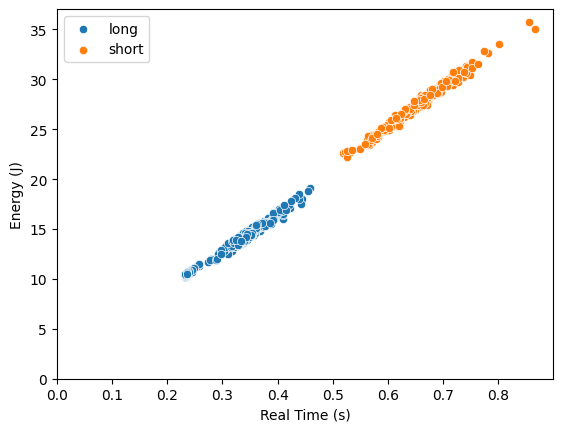

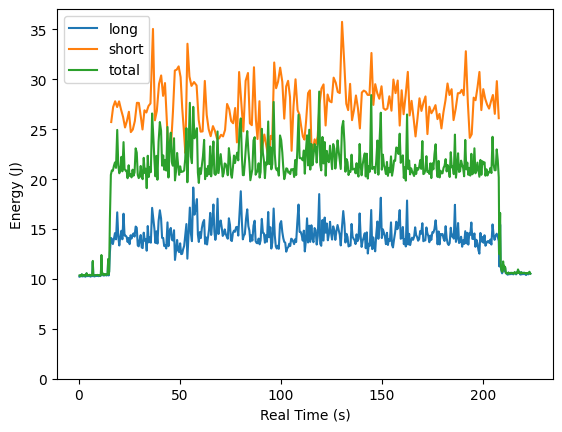

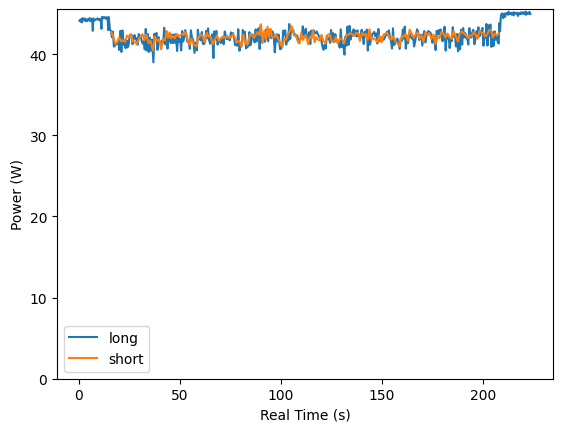

In [19]:
#real, user, energy, energy_user, est, t = getxy([(746238429, 377328315, 30093673, 30093673, 16), (745723677, 379604637, 29633958, 29633958, 16), (644036935, 334497533, 26533990, 26533990, 16), (671942538, 347722031, 27071708, 27071708, 16), (607995512, 299972155, 24741209, 24741209, 16), (579989617, 293352239, 23860840, 23860839, 16), (603991768, 298521138, 24651365, 24651365, 16), (629341513, 311841349, 26120111, 26120111, 16), (610681775, 299306457, 25438167, 25438166, 16), (675955341, 315107662, 27536124, 27536124, 16), (659992072, 302918195, 26596489, 26596488, 16), (668044303, 326224939, 27540091, 27540091, 16), (643987486, 336862498, 26722526, 26722525, 16), (651949144, 333262345, 26658135, 26658135, 16), (563989719, 281188568, 23215150, 23215150, 16), (528047081, 263991542, 22327518, 22327517, 16), (651978970, 326487874, 27147209, 27147209, 16), (599951931, 314591800, 24477354, 24477354, 16), (648042687, 333979094, 26889213, 26889213, 16), (675946836, 335084326, 27452262, 27452262, 16), (672031395, 329983753, 27789724, 27789724, 16), (603964957, 289389082, 24835080, 24835080, 16), (623983770, 300011139, 25160275, 25160274, 16), (580022896, 280900289, 24466978, 24466977, 16), (628006773, 314555295, 26194635, 26194635, 16), (598742856, 302142688, 25059079, 25059078, 16), (581250787, 302143675, 24601805, 24601805, 16), (560005902, 298741168, 23613953, 23613953, 16), (579963512, 308730788, 24514402, 24514402, 16), (548001676, 284190337, 22853274, 22853274, 16), (599943274, 307998805, 24609251, 24609250, 16), (647996195, 321211794, 26818352, 26818351, 16), (616030018, 311227720, 26035395, 26035395, 16), (636008962, 321666162, 26546563, 26546563, 16), (615990163, 321580508, 25728084, 25728084, 16), (631947605, 323962647, 26174310, 26174309, 16), (532016772, 270651386, 22410587, 22410586, 16), (623996425, 315206870, 26227655, 26227655, 16), (664008408, 340217982, 27628958, 27628957, 16), (671991438, 333449973, 28072072, 28072072, 16), (639955230, 321238231, 26627556, 26627556, 16), (655991449, 312232647, 26762566, 26762565, 16), (639991766, 318991908, 26184870, 26184869, 16), (568037176, 283713831, 24293090, 24293090, 16), (751947868, 384259459, 30510847, 30510847, 16), (684021518, 324635556, 28829883, 28829883, 16), (615999537, 294224276, 26126520, 26126520, 16), (672003895, 332402225, 28312427, 28312426, 16), (631983685, 319436254, 26487725, 26487725, 16), (627958482, 327269175, 26000056, 26000055, 16), (620042743, 304103872, 26143365, 26143365, 16), (703967650, 356378572, 28942004, 28942004, 16), (723992655, 364457048, 29901596, 29901595, 16), (695376030, 347682739, 28367664, 28367664, 16), (640591407, 312005336, 26425836, 26425836, 16), (639988177, 304734256, 25950434, 25950434, 16), (568030446, 272535737, 24253722, 24253721, 16), (700002454, 352947015, 29392869, 29392869, 16), (719985485, 383771465, 29815231, 29815231, 16), (691954157, 336285119, 27682241, 27682240, 16), (676039178, 348045814, 28009816, 28009816, 16), (627944507, 318309526, 26029596, 26029595, 16), (643990687, 326963773, 26377985, 26377985, 16), (596035537, 308655917, 25101682, 25101682, 16), (571948857, 289493153, 23760559, 23760559, 16), (591988888, 289577311, 24596861, 24596861, 16), (612152932, 290054671, 26045161, 26045161, 16), (559865038, 270985678, 23794861, 23794860, 16), (659989547, 309893244, 27918752, 27918752, 16), (683992140, 316571040, 28413440, 28413440, 16), (559989491, 262653000, 23861084, 23861084, 16), (620008853, 307367432, 26224176, 26224176, 16), (580002316, 283292830, 24652952, 24652952, 16), (543949582, 269301448, 22595340, 22595339, 16), (656032038, 323430163, 27752370, 27752370, 16), (563953850, 279278704, 23385682, 23385682, 16), (507995003, 253622530, 21561590, 21561590, 16), (512042804, 254471420, 22339176, 22339176, 16), (479985353, 240994427, 21013740, 21013740, 16), (511954257, 257054150, 21786870, 21786870, 16), (567993018, 278788404, 23881714, 23881714, 16), (504033159, 252921198, 21850042, 21850042, 16), (503959364, 251462346, 21349554, 21349554, 16), (488031026, 244440807, 21211005, 21211005, 16), (511990423, 256242090, 22322086, 22322086, 16), (511990941, 255571554, 22298100, 22298100, 16), (516002192, 259089039, 22449283, 22449283, 16), (507960200, 254521634, 21497199, 21497199, 16), (512027790, 255424256, 22373539, 22373539, 16), (499948941, 249361361, 21267768, 21267768, 16), (485989198, 242372293, 21374152, 21374151, 16), (505999511, 254100610, 21534307, 21534307, 16), (508035465, 252745665, 22150884, 22150884, 16), (511991895, 256273554, 22339176, 22339176, 16), (559959518, 271091103, 23892151, 23892151, 16), (514034670, 253088331, 22110784, 22110784, 16), (517945969, 261223646, 21947148, 21947148, 16), (515994066, 257116356, 21986760, 21986759, 16), (507994567, 254480327, 21525336, 21525336, 16), (536032729, 269467618, 23266237, 23266237, 16), (495956728, 247053426, 21126533, 21126532, 16), (532978117, 262731652, 23175295, 23175295, 16), (487046510, 244917817, 21358404, 21358404, 16), (515990489, 257928374, 22501103, 22501103, 16), (539956675, 271795868, 22980348, 22980348, 16), (492032339, 244749830, 21538092, 21538092, 16), (480006479, 240768480, 21067695, 21067695, 16), (503989762, 252960000, 21988041, 21988041, 16), (511999630, 255587293, 22455021, 22455021, 16), (519982364, 259086538, 22685489, 22685489, 16), (507998467, 254494629, 22188481, 22188481, 16), (507992391, 252207108, 22177982, 22177982, 16), (511993851, 257022826, 22316289, 22316289, 16), (511983399, 255991777, 22302616, 22302615, 16), (511992600, 256491393, 22413456, 22413456, 16), (512003384, 255080201, 22418704, 22418703, 16), (507955743, 254451776, 21527594, 21527594, 16), (543994969, 269738672, 23112246, 23112245, 16), (508034753, 255427028, 22183659, 22183658, 16), (503981815, 251736836, 22029302, 22029302, 16), (535962949, 267128574, 22706668, 22706667, 16), (511994539, 255497587, 21744756, 21744756, 16), (507995540, 255021288, 21704778, 21704778, 16), (528032207, 263955042, 22948305, 22948304, 16), (543991083, 270441018, 23629090, 23629089, 16), (568458129, 274955003, 24442809, 24442809, 16), (751500533, 368908315, 31013470, 31013470, 16), (687989111, 335455194, 28592395, 28592395, 16), (763988402, 341197944, 31474407, 31474407, 16), (751978213, 352232545, 30296858, 30296858, 16), (716026999, 351475269, 29733018, 29733018, 16), (719986597, 359481179, 29877548, 29877548, 16), (652017383, 326116508, 27176871, 27176871, 16), (607944186, 303984588, 25217648, 25217648, 16), (676024222, 340795624, 28630969, 28630969, 16), (639961693, 328200643, 26590753, 26590753, 16), (595990977, 295233210, 24629209, 24629209, 16), (671994433, 331212074, 27635366, 27635366, 16), (580033091, 297485362, 24811765, 24811764, 16), (551956072, 281345996, 23442628, 23442628, 16), (552037034, 276237223, 23703613, 23703613, 16), (655944787, 328136182, 26893852, 26893852, 16), (583995353, 299864148, 24498412, 24498412, 16), (563991262, 282711096, 23790894, 23790894, 16), (512028158, 256247583, 22520512, 22520512, 16), (515957236, 256024051, 22233646, 22233646, 16), (504031878, 253053450, 22024357, 22024357, 16), (519960845, 259816352, 22623355, 22623355, 16), (768000031, 402419907, 31759989, 31759989, 16), (716008196, 364502715, 29768051, 29768051, 16), (672010523, 336681655, 28022389, 28022389, 16), (651948953, 320761656, 27182426, 27182426, 16), (648038237, 299617945, 27387503, 27387503, 16), (675944309, 311683350, 28172658, 28172658, 16), (655996503, 307495513, 27454031, 27454031, 16), (639990631, 304742316, 26698479, 26698479, 16), (624000365, 294498163, 25680476, 25680476, 16), (617963164, 290111833, 26237115, 26237115, 16), (626047760, 298088172, 26478448, 26478448, 16), (617288710, 297430858, 26173273, 26173273, 16), (638669795, 300302932, 26624505, 26624505, 16), (614017658, 301669820, 26255609, 26255608, 16), (518564704, 258798747, 22574771, 22574771, 16), (607455564, 286153178, 26119257, 26119257, 16), (619924880, 297973456, 25744258, 25744258, 16), (588034684, 288497871, 25323177, 25323177, 16), (575951760, 283466731, 24112487, 24112487, 16), (568034537, 278466493, 24450316, 24450316, 16), (548009532, 270741503, 23729187, 23729187, 16), (603978904, 301036078, 25770198, 25770197, 16), (603952506, 289998926, 25224727, 25224727, 16), (612047872, 306743604, 26143427, 26143427, 16), (635937743, 321227554, 26530450, 26530450, 16), (727991690, 350133745, 29581772, 29581772, 16), (740032919, 356122398, 30666974, 30666973, 16), (747992566, 369899806, 30929670, 30929670, 16), (714836183, 366161076, 29767868, 29767867, 16), (773113893, 397261116, 31629069, 31629069, 16), (744023619, 364034432, 30800519, 30800519, 16), (723959489, 362067319, 29537461, 29537461, 16), (712013375, 348870851, 29738755, 29738754, 16), (636026353, 338957737, 27076652, 27076651, 16), (615942204, 319858583, 26023737, 26023737, 16), (740017927, 375019768, 30673750, 30673750, 16), (727994076, 368734587, 30302413, 30302413, 16), (723991803, 361389538, 30092513, 30092513, 16), (735995295, 365384279, 30565535, 30565535, 16), (660018477, 318537811, 27517324, 27517323, 16), (611983210, 305267549, 25994929, 25994929, 16), (635983785, 319904063, 27096122, 27096121, 16), (543990479, 276092249, 23737549, 23737549, 16), (588001804, 292746465, 25145260, 25145260, 16), (564001289, 288592799, 24426695, 24426695, 16), (603954758, 305477844, 25607479, 25607479, 16), (649655503, 328676443, 27680471, 27680471, 16), (626333788, 316836080, 26197138, 26197137, 16), (595989840, 297520449, 24838498, 24838498, 16), (468573550, 267755273, 20036265, 20036265, 16), (241929214, 240097607, 10746799, 10746799, 16), (241856696, 243863218, 10749057, 10749057, 16), (241946041, 240099386, 10746127, 10746127, 16), (241811138, 243819121, 10729892, 10729892, 16), (241925972, 240110866, 10745761, 10745761, 16), (241866080, 240112634, 10776217, 10776217, 16), (241890490, 243850246, 10767856, 10767856, 16), (241857164, 240108021, 10720005, 10720005, 16), (241876955, 243864424, 10743319, 10743319, 16), (241831953, 240110943, 10725620, 10725620, 16), (241864049, 243851528, 10763583, 10763583, 16), (241885098, 240104245, 10804355, 10804355, 16), (241891367, 243854613, 10746310, 10746310, 16), (241888580, 240114730, 10766574, 10766574, 16), (241926196, 243854094, 10700046, 10700046, 16), (241873973, 240086780, 10742404, 10742404, 16), (241848351, 243854335, 10703952, 10703952, 16), (241856215, 240099699, 10749362, 10749361, 16), (241881494, 243860330, 10745273, 10745273, 16), (241859609, 240112547, 10773043, 10773043, 16), (241887140, 243844056, 10766635, 10766635, 16), (241868635, 240091819, 10752658, 10752658, 16), (241870294, 240107359, 10753818, 10753818, 16), (241888235, 243853845, 10769382, 10769382, 16), (241863724, 240107960, 10742282, 10742282, 16), (241893278, 243864926, 10723239, 10723239, 16), (241829654, 240111473, 10749545, 10749544, 16), (241895750, 243855106, 10757541, 10757541, 16), (241868708, 240080081, 10767245, 10767245, 16), (241861947, 243859948, 10732456, 10732456, 16), (241827612, 240110129, 10744052, 10744052, 16), (241831751, 243853172, 10735385, 10735385, 16), (241843024, 240112037, 10750949, 10750949, 16), (241902180, 243812420, 10750155, 10750155, 16), (241926716, 240058960, 10782199, 10782198, 16), (241963552, 243825896, 10778537, 10778537, 16), (241937581, 240116777, 10757419, 10757419, 16), (241912326, 243848399, 10782138, 10782138, 16), (241897134, 240113418, 10780246, 10780246, 16), (241886493, 240108943, 10759494, 10759493, 16), (241894247, 243811566, 10758944, 10758944, 16), (241859073, 240114782, 10737705, 10737704, 16), (241867812, 243862282, 10775851, 10775851, 16), (241969606, 240116006, 10775851, 10775851, 16), (241906239, 243879794, 10782321, 10782321, 16), (244113217, 243910854, 10870029, 10870029, 16), (245483785, 243839099, 10956637, 10956637, 16), (241816479, 243851825, 10775119, 10775119, 16), (241854857, 240113472, 10722628, 10722628, 16), (241799566, 243860144, 10774631, 10774631, 16), (241901063, 240114189, 10781772, 10781771, 16), (241885853, 243859518, 10757296, 10757296, 16), (250196667, 244608701, 11151156, 11151156, 16), (261625596, 259614156, 11615205, 11615205, 16), (471877584, 443796349, 19450023, 19450023, 16), (371941418, 348724771, 15320640, 15320640, 16), (396002379, 371220949, 16468647, 16468647, 16), (333341421, 311041093, 14362023, 14362022, 16), (303816845, 294898437, 13194058, 13194057, 16), (242141451, 237496278, 10875095, 10875095, 16), (244879272, 243153616, 11011446, 11011446, 16), (242780155, 237754220, 10895907, 10895907, 16), (243549657, 240785569, 10920321, 10920321, 16), (274440702, 267926092, 12106049, 12106049, 16), (240831042, 237914212, 10830782, 10830782, 16), (243492964, 240980626, 10912997, 10912997, 16), (241264609, 237756744, 10834934, 10834934, 16), (241092086, 238323920, 10823458, 10823458, 16), (246386462, 245223475, 11060702, 11060702, 16), (245416680, 241857125, 10986971, 10986971, 16), (242242546, 243327159, 10843539, 10843539, 16), (241872473, 240035019, 10856235, 10856234, 16), (242354366, 243883280, 10808810, 10808810, 16), (242393177, 243836715, 10824252, 10824252, 16), (242302030, 240087750, 10852023, 10852023, 16), (242367195, 243890766, 10810214, 10810214, 16), (242402970, 240134909, 10799899, 10799899, 16), (242353974, 243879274, 10828952, 10828952, 16), (242361043, 243895305, 10812106, 10812106, 16), (242316338, 240122139, 10816257, 10816257, 16), (242343071, 243893438, 10832980, 10832980, 16), (242387505, 240137551, 10804659, 10804659, 16), (242387084, 243886582, 10802036, 10802036, 16), (242334535, 243878502, 10857821, 10857821, 16), (242436414, 240142891, 10808627, 10808627, 16), (242371723, 243890888, 10825473, 10825473, 16), (242409988, 240134786, 10802585, 10802584, 16), (242319782, 243861569, 10778292, 10778292, 16), (242421107, 243898719, 10839511, 10839511, 16), (242273465, 240141516, 10786166, 10786166, 16), (242365196, 243881323, 10812168, 10812168, 16), (242352164, 240143505, 10843173, 10843173, 16), (242374515, 243878790, 10832858, 10832858, 16), (242417732, 240142950, 10806429, 10806429, 16), (242412463, 243884232, 10782321, 10782321, 16), (242368610, 243894624, 10824252, 10824252, 16), (242334687, 240138364, 10860324, 10860323, 16), (242330763, 243890004, 10833469, 10833469, 16), (242404843, 240141036, 10832613, 10832613, 16), (242403780, 243848952, 10843845, 10843845, 16), (242361279, 243891594, 10829501, 10829501, 16), (242297209, 240141762, 10861788, 10861787, 16), (242361824, 243886297, 10812229, 10812229, 16), (242368169, 240132470, 10806124, 10806124, 16), (242364652, 243892908, 10861118, 10861118, 16), (242372632, 243887714, 10808444, 10808444, 16), (242409323, 240143656, 10819979, 10819979, 16), (242321713, 243877215, 10845431, 10845431, 16), (242321767, 240139914, 10843723, 10843723, 16), (242434131, 243899364, 10830721, 10830721, 16), (242406668, 243892892, 10824435, 10824435, 16), (310848696, 302140148, 13392117, 13392117, 16), (242383762, 243888644, 10827609, 10827609, 16), (242303322, 240128644, 10832797, 10832796, 16), (242264091, 243831246, 10847262, 10847262, 16), (242283071, 243887444, 10810763, 10810763, 16), (242353619, 240142035, 10816684, 10816684, 16), (242339109, 243882224, 10851535, 10851535, 16), (242303160, 240141117, 10811679, 10811679, 16), (242311979, 243878583, 10821444, 10821444, 16), (242285524, 240120259, 10863315, 10863315, 16), (242313648, 243891688, 10809664, 10809664, 16), (242305766, 243888224, 10804477, 10804477, 16), (242278786, 240131733, 10850985, 10850985, 16), (242343552, 243849248, 10838291, 10838291, 16), (242346475, 240122440, 10814486, 10814486, 16), (242284510, 243889125, 10847018, 10847018, 16), (242340576, 243888016, 10810947, 10810947, 16), (242343781, 240142959, 10807040, 10807040, 16), (242342923, 243894168, 10859652, 10859652, 16), (242313311, 240143653, 10810825, 10810825, 16), (242339579, 243888148, 10824313, 10824313, 16), (242314407, 240138456, 10862582, 10862582, 16), (242324849, 243883738, 10823886, 10823886, 16), (242304408, 243884720, 10838900, 10838900, 16), (242242977, 240118522, 10819980, 10819980, 16), (242322942, 243858413, 10873446, 10873446, 16), (242302070, 240102987, 10833224, 10833224, 16), (252149440, 251747794, 11214205, 11214205, 16), (242308091, 243880786, 10848971, 10848971, 16), (242262160, 243859966, 10831210, 10831210, 16), (242274266, 240135361, 10837070, 10837070, 16), (242361454, 243895812, 10847445, 10847445, 16), (242275626, 240140829, 10827975, 10827975, 16), (242370735, 243859064, 10822177, 10822177, 16), (242327041, 240135146, 10833224, 10833223, 16), (242373717, 243876794, 10879123, 10879123, 16), (242347781, 243886925, 10826022, 10826022, 16), (242240936, 240107765, 10828341, 10828341, 16), (242286136, 243887263, 10873264, 10873264, 16), (242261143, 240138214, 10845309, 10845308, 16), (242339787, 243657188, 10838900, 10838900, 16), (243473230, 243366718, 10921786, 10921786, 16), (267670480, 260541533, 11882782, 11882782, 16), (266156928, 257755803, 11892670, 11892670, 16), (273404797, 273630836, 12008819, 12008819, 16), (276433810, 275810506, 12141998, 12141997, 16), (276131228, 275774955, 12082061, 12082061, 16), (275065083, 272157148, 12053680, 12053679, 16), (247824927, 247400228, 11063815, 11063815, 16), (242437699, 243829334, 10853244, 10853244, 16), (242372600, 243891389, 10820162, 10820162, 16), (242416812, 240142742, 10872348, 10872348, 16), (242343117, 243881514, 10834445, 10834445, 16), (242368897, 240144611, 10863925, 10863925, 16), (242364800, 243886270, 10825595, 10825595, 16), (242436691, 243874682, 10828646, 10828646, 16), (242389152, 240126014, 10866550, 10866550, 16), (242422825, 243886286, 10841891, 10841891, 16), (242366246, 240144624, 10861239, 10861239, 16), (242426796, 243897206, 10840487, 10840487, 16), (242367602, 243891389, 10822360, 10822360, 16), (242342251, 240097816, 10891574, 10891573, 16), (242314395, 243878343, 10840243, 10840243, 16), (242378316, 240143602, 10845676, 10845676, 16), (242342571, 243873678, 10869540, 10869540, 16), (242337889, 243871401, 10851046, 10851046, 16), (242404629, 240146654, 10833713, 10833713, 16), (242440761, 243887693, 10870333, 10870333, 16), (242383582, 240139740, 10826999, 10826999, 16), (242437580, 243899256, 10899813, 10899813, 16), (242360255, 243872481, 10842990, 10842990, 16), (242399990, 240144584, 10845920, 10845920, 16), (242409518, 243897229, 10852938, 10852938, 16), (242356328, 240120252, 10839328, 10839328, 16), (242379609, 243867474, 10882845, 10882845, 16), (241261374, 239707602, 10786899, 10786899, 16), (240235542, 239981301, 10726962, 10726962, 16), (240195531, 239985361, 10742099, 10742099, 16), (240168803, 240007523, 10707798, 10707798, 16), (240252519, 240009065, 10758273, 10758273, 16), (240244387, 240011101, 10708469, 10708469, 16), (240180656, 240009625, 10733493, 10733493, 16), (240270662, 239999809, 10709811, 10709810, 16), (240194391, 239999127, 10755466, 10755466, 16), (240246030, 240012225, 10729831, 10729831, 16), (240224123, 239958539, 10732333, 10732333, 16), (240203996, 239977885, 10725192, 10725192, 16), (240198034, 240007440, 10769931, 10769931, 16), (240158273, 240013778, 10737766, 10737766, 16), (249350474, 247941926, 11061678, 11061678, 16), (240339396, 239987819, 10723361, 10723360, 16), (240289318, 240016395, 10764438, 10764438, 16), (240257916, 243760788, 10726230, 10726230, 16), (240251136, 240009061, 10724765, 10724764, 16), (240224862, 240005510, 10726047, 10726047, 16), (240229049, 239997747, 10765658, 10765658, 16), (240940608, 240026705, 10760226, 10760226, 16), (240236221, 239985384, 10747715, 10747714, 16), (240208598, 240012958, 10726046, 10726046, 16), (240354493, 239981881, 10740146, 10740146, 16), (240202211, 240009759, 10761325, 10761325, 16), (240272435, 240013339, 10730380, 10730380, 16), (240210605, 240004798, 10724460, 10724460, 16), (240211002, 240010676, 10737094, 10737094, 16), (240223990, 240221000, 10736911, 10736911, 16), (240207386, 243539980, 10781406, 10781406, 16), (240218285, 240003526, 10739413, 10739413, 16), (240309413, 239994105, 10743320, 10743320, 16), (240178401, 240009651, 10748447, 10748447, 16), (240239861, 240001548, 10779757, 10779757, 16), (240179138, 239999247, 10737705, 10737705, 16), (240184621, 239962215, 10745150, 10745150, 16), (240274100, 240012909, 10742038, 10742038, 16), (240235310, 240011490, 10759067, 10759067, 16), (240252452, 240012140, 10726535, 10726535, 16), (240387806, 240015389, 10739780, 10739780, 16), (240219209, 240012028, 10768588, 10768588, 16), (240203241, 240003080, 10746859, 10746859, 16), (240191918, 239987308, 10750095, 10750095, 16), (240226212, 240012530, 10754794, 10754794, 16), (240213704, 240008024, 10754672, 10754672, 16), (240244117, 240012371, 10768283, 10768283, 16), (240218234, 243746284, 10793674, 10793674, 16), (280673554, 272917642, 12316802, 12316802, 16), (240168198, 239978598, 10781833, 10781832, 16), (240225108, 240006642, 10757662, 10757662, 16), (240239271, 239965026, 10735447, 10735447, 16), (240169705, 240002411, 10751132, 10751132, 16), (240128781, 239983966, 10766208, 10766208, 16), (240206492, 240008741, 10794039, 10794039, 16), (240149535, 239994836, 10732761, 10732761, 16), (240204058, 240010152, 10735324, 10735324, 16), (240183545, 239980870, 10738681, 10738681, 16), (240208572, 240010784, 10721774, 10721774, 16), (240167563, 240008781, 10764255, 10764254, 16), (240201267, 240002521, 10725192, 10725192, 16), (240214390, 239980830, 10739658, 10739658, 16), (240196827, 240003427, 10737521, 10737521, 16), (240183566, 240009833, 10738437, 10738437, 16), (240105942, 239995803, 10751743, 10751743, 16), (240198141, 239988406, 10777621, 10777621, 16), (240232856, 243760952, 10743808, 10743808, 16), (240248450, 240012843, 10767367, 10767366, 16), (240183557, 240004923, 10733432, 10733431, 16), (240150218, 240000467, 10745517, 10745517, 16), (240188409, 240000390, 10771091, 10771091, 16), (240189431, 240009678, 10778781, 10778780, 16), (240178703, 240008509, 10754733, 10754733, 16), (240243900, 239981286, 10728671, 10728671, 16), (240226115, 240000779, 10778293, 10778293, 16), (240227469, 240012250, 10753085, 10753084, 16), (240199031, 239995733, 10742099, 10742099, 16), (240182017, 240007568, 10756076, 10756076, 16), (240251849, 239981599, 10740878, 10740878, 16), (240247057, 240010072, 10787815, 10787815, 16), (240216952, 240012136, 10749118, 10749118, 16), (240224147, 240006366, 10751986, 10751986, 16), (240224822, 240003959, 10735507, 10735507, 16), (240222477, 240012100, 10782199, 10782199, 16), (240203576, 243761417, 10739170, 10739170, 16), (240172361, 239991601, 10735263, 10735263, 16), (240172401, 239959488, 10732699, 10732699, 16), (240222239, 240008711, 10742343, 10742343, 16), (240206076, 240009939, 10779636, 10779636, 16), (240180883, 240009350, 10738437, 10738437, 16), (240203746, 240009879, 10736850, 10736850, 16), (240220078, 239951759, 10759494, 10759494, 16), (240231376, 239953936, 10744845, 10744845, 16), (240164475, 239966249, 10794345, 10794345, 16), (240214338, 240009365, 10758151, 10758151, 16), (240200360, 240001093, 10734836, 10734836, 16), (240166343, 240006890, 10757114, 10757114, 16), (240277430, 240006001, 10766818, 10766818, 16), (240211663, 239960537, 10749362, 10749362, 16), (240184170, 239999601, 10746921, 10746921, 16), (240189533, 240009941, 10767245, 10767245, 16), (240221157, 240008497, 10742404, 10742404, 16), (240177686, 240001651, 10784213, 10784213, 16), (240176145, 240002675, 10742160, 10742160, 16), (240208868, 243758530, 10761936, 10761936, 16), (240216280, 240012722, 10770846, 10770846, 16), (240210639, 240004176, 10777316, 10777316, 16), (240168740, 239970683, 10739047, 10739047, 16), (240232557, 240012023, 10801364, 10801363, 16), (240241990, 240013508, 10761753, 10761753, 16), (240247727, 240007557, 10770419, 10770419, 16), (240297278, 239986230, 10752231, 10752230, 16), (240244276, 240003547, 10749179, 10749178, 16), (240258638, 240014941, 10759555, 10759555, 16), (240197989, 240004981, 10765353, 10765353, 16), (240238302, 240005958, 10794223, 10794223, 16)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(771997712, 378233088, 30666364, 30666364, 16), (704018267, 345472932, 28425342, 28425341, 16), (663990141, 319473174, 27335379, 27335378, 16), (663994096, 321975556, 27145255, 27145255, 16), (659965875, 333308442, 26815239, 26815239, 16), (652024430, 326485947, 27097465, 27097465, 16), (644848588, 322372347, 26859489, 26859489, 16), (639111794, 317766824, 26042780, 26042779, 16), (599990261, 319097143, 24406371, 24406371, 16), (652000835, 344819736, 26340569, 26340569, 16), (644025452, 347656364, 26564141, 26564141, 16), (635981001, 313133378, 26366815, 26366815, 16), (619992118, 299689038, 25780879, 25780879, 16), (623974289, 308708101, 25160824, 25160824, 16), (599991746, 302379021, 24716123, 24716122, 16), (563995207, 280824281, 23509523, 23509523, 16), (603993619, 298637466, 24529722, 24529722, 16), (616026269, 294249680, 25744502, 25744502, 16), (656004618, 319728716, 27169059, 27169059, 16), (651952383, 326347672, 26418145, 26418145, 16), (596019609, 306735580, 24706297, 24706297, 16), (608004823, 315992711, 25471431, 25471431, 16), (611034530, 314411170, 25541500, 25541500, 16), (604943673, 315148029, 25427852, 25427852, 16), (619988440, 306655112, 25905268, 25905267, 16), (602405199, 299323007, 25216244, 25216244, 16), (625596019, 298345416, 26385980, 26385980, 16), (591984469, 277743573, 25033811, 25033810, 16), (712000025, 333183692, 29850387, 29850387, 16), (587990968, 288994741, 24899106, 24899105, 16), (560000193, 274239897, 23655152, 23655152, 16), (543967007, 270246487, 22235112, 22235111, 16), (616021724, 307821134, 25776301, 25776301, 16), (595964207, 295123210, 24353331, 24353330, 16), (630617219, 298896490, 26413018, 26413017, 16), (681372298, 330084931, 27888479, 27888479, 16), (592034194, 296357604, 25237606, 25237606, 16), (639986156, 316293565, 26755730, 26755730, 16), (603959910, 295442530, 24547544, 24547544, 16), (608034646, 306232058, 25268002, 25268002, 16), (623996366, 313991604, 26161981, 26161980, 16), (635954137, 332483866, 25818843, 25818843, 16), (623993774, 309994732, 25693537, 25693537, 16), (607991018, 294489606, 25266049, 25266049, 16), (644029519, 317143136, 26427606, 26427606, 16), (567997686, 294077918, 24133483, 24133483, 16), (571953208, 304741854, 23738648, 23738648, 16), (584029930, 290489828, 24770505, 24770504, 16), (619993243, 316324484, 25855220, 25855220, 16), (567987596, 274496301, 24043823, 24043823, 16), (631985087, 308975314, 26400994, 26400994, 16), (687968202, 347323593, 28252430, 28252430, 16), (714184956, 350378504, 29408372, 29408372, 16), (749328577, 377331447, 30581526, 30581526, 16), (672464557, 340585735, 27467520, 27467520, 16), (647998591, 337904315, 26676507, 26676507, 16), (563990290, 292211075, 23366090, 23366090, 16), (560540668, 287927927, 23928162, 23928162, 16), (663500859, 299046247, 27713003, 27713003, 16), (647931961, 312087004, 25945734, 25945734, 16), (700038075, 356882598, 28958177, 28958177, 16), (659978942, 321645155, 27344474, 27344474, 16), (659988960, 326395155, 27589468, 27589468, 16), (619996980, 300729736, 25980890, 25980890, 16), (627988535, 304296033, 26479974, 26479974, 16), (623972287, 310154098, 25973139, 25973139, 16), (572032875, 296999321, 24215087, 24215087, 16), (583991314, 309373888, 24681456, 24681456, 16), (559953345, 286560793, 23401490, 23401490, 16), (651994601, 355886809, 26478203, 26478203, 16), (592025711, 310516612, 24755735, 24755734, 16), (587960522, 315017888, 24604490, 24604489, 16), (608035291, 303137002, 25693171, 25693171, 16), (596003309, 302270715, 25357663, 25357663, 16), (567979951, 289221207, 24383238, 24383238, 16), (603960221, 307018518, 24796995, 24796995, 16), (512027088, 256401115, 22059758, 22059757, 16), (504000626, 252867277, 21983281, 21983281, 16), (511989578, 256687576, 22302372, 22302371, 16), (499962172, 250302074, 21395026, 21395026, 16), (524026371, 260316903, 22777286, 22777286, 16), (539961493, 274088508, 22648196, 22648196, 16), (512027026, 255932380, 22329777, 22329777, 16), (539961887, 269239806, 22980959, 22980959, 16), (508003162, 254295960, 21606756, 21606755, 16), (508017815, 254228434, 22149724, 22149724, 16), (511996788, 256409516, 22284061, 22284061, 16), (515961798, 256373821, 21812627, 21812627, 16), (495994232, 247912900, 21152473, 21152472, 16), (491993981, 245440818, 21089362, 21089361, 16), (480033148, 240469241, 21066779, 21066778, 16), (511988149, 255742932, 22392582, 22392582, 16), (511998593, 256768454, 22304753, 22304753, 16), (495958826, 249476972, 21219489, 21219489, 16), (512028988, 255471634, 22284367, 22284367, 16), (584005375, 295287619, 25151241, 25151241, 16), (499948081, 250508530, 21333381, 21333381, 16), (503994071, 252714518, 21378852, 21378852, 16), (507992410, 252465989, 21484564, 21484564, 16), (512027453, 255974835, 22321049, 22321049, 16), (511993970, 255519899, 22216678, 22216678, 16), (511962873, 256722857, 21903753, 21903753, 16), (496031800, 250436819, 21607977, 21607977, 16), (503992592, 252063309, 22082951, 22082950, 16), (491961380, 245408336, 20930915, 20930915, 16), (513857545, 255664003, 22273197, 22273197, 16), (506163163, 252826129, 22178166, 22178166, 16), (512001573, 254667836, 22450016, 22450016, 16), (479994288, 241023327, 21037482, 21037482, 16), (487993029, 245107589, 21353217, 21353217, 16), (507957565, 252892690, 21661383, 21661383, 16), (515994156, 258276127, 21848028, 21848028, 16), (488028276, 244488190, 21375007, 21375007, 16), (503960771, 251916416, 21379278, 21379278, 16), (511995138, 255749279, 21697698, 21697698, 16), (484025534, 241485466, 21262152, 21262152, 16), (492016827, 247498604, 21603766, 21603765, 16), (515990439, 257510949, 22489322, 22489322, 16), (519989135, 261484738, 22622623, 22622623, 16), (511989158, 255250396, 22287968, 22287968, 16), (511951484, 256739142, 21737615, 21737615, 16), (504036003, 253283907, 22038518, 22038518, 16), (499994317, 249783040, 21776739, 21776739, 16), (483990095, 242000131, 21227057, 21227057, 16), (524001324, 260464408, 22853396, 22853396, 16), (515950957, 257025286, 21769232, 21769232, 16), (628040597, 309807866, 27047599, 27047598, 16), (775945521, 378555858, 31951273, 31951273, 16), (704564587, 342995075, 29404527, 29404526, 16), (685949405, 367433514, 28721118, 28721118, 16), (781440755, 424573732, 31681132, 31681132, 16), (712030993, 361499365, 29527146, 29527146, 16), (731986268, 364494018, 30357283, 30357283, 16), (707993459, 354009522, 29464524, 29464523, 16), (603958247, 301233168, 25273190, 25273190, 16), (592031270, 294217428, 25217038, 25217038, 16), (591990802, 284949628, 25235348, 25235348, 16), (663995551, 337741694, 27869130, 27869130, 16), (595956746, 300740051, 24889035, 24889034, 16), (580025378, 286489633, 24621030, 24621030, 16), (535957940, 263147262, 22534550, 22534550, 16), (588038672, 292467013, 25238033, 25238033, 16), (671953035, 334294672, 28303334, 28303334, 16), (595993247, 290796016, 25287899, 25287898, 16), (556036449, 276013620, 23916870, 23916869, 16), (481530024, 240069107, 20956001, 20956001, 16), (482442560, 242114706, 21256659, 21256659, 16), (524002957, 263477326, 22885745, 22885745, 16), (503959034, 250200697, 21657965, 21657965, 16), (660040101, 315776328, 28281543, 28281543, 16), (727944866, 345416650, 29646348, 29646347, 16), (714869580, 353796897, 29609604, 29609604, 16), (637117326, 326692662, 26374627, 26374627, 16), (647993760, 340291246, 26622002, 26622002, 16), (600034750, 326045922, 25413509, 25413509, 16), (551982681, 293724737, 23405336, 23405336, 16), (620012022, 324742458, 26286065, 26286065, 16), (615945257, 327216991, 25521297, 25521297, 16), (631995995, 334948286, 26119135, 26119135, 16), (644020000, 341729925, 27225516, 27225516, 16), (608008631, 315482373, 25850581, 25850581, 16), (659992879, 343458240, 27834096, 27834096, 16), (587991225, 306989493, 25046079, 25046078, 16), (563958454, 285399631, 23591981, 23591981, 16), (548040563, 266980435, 24053527, 24053527, 16), (667947174, 354524159, 27645742, 27645742, 16), (550545193, 283139938, 23570069, 23570069, 16), (585436790, 296318908, 24558897, 24558897, 16), (580025783, 296960265, 24905271, 24905270, 16), (563960512, 287223651, 23758850, 23758849, 16), (595995648, 299716661, 25426510, 25426510, 16), (584027019, 295426808, 24890073, 24890073, 16), (543997832, 282235938, 23388368, 23388368, 16), (579981801, 285739197, 24825132, 24825132, 16), (632004719, 316492610, 26738762, 26738762, 16), (743961713, 384413630, 30077315, 30077314, 16), (756023537, 395211728, 31304424, 31304424, 16), (739968244, 372043756, 30143966, 30143966, 16), (720031101, 348958216, 29996383, 29996382, 16), (731994510, 354269295, 30107345, 30107344, 16), (731951158, 375275700, 29658188, 29658187, 16), (735992243, 367245143, 29963241, 29963241, 16), (650895532, 332591608, 27252006, 27252006, 16), (593137828, 278582683, 25374080, 25374080, 16), (583993294, 279725510, 25095151, 25095150, 16), (711946124, 352246736, 28305958, 28305958, 16), (712024927, 345773635, 29539414, 29539413, 16), (699959049, 349339314, 28698230, 28698230, 16), (707992970, 364084035, 29088853, 29088852, 16), (707995132, 361920185, 29163256, 29163256, 16), (623992635, 317194863, 26025751, 26025751, 16), (607995017, 299005072, 25564327, 25564327, 16), (524019620, 259002391, 22560977, 22560977, 16), (616006639, 302879188, 26493585, 26493585, 16), (552140667, 271141204, 23859313, 23859312, 16), (547832880, 272487437, 23745057, 23745057, 16), (619966985, 300143839, 26233697, 26233696, 16), (618051716, 300635812, 26238946, 26238946, 16), (637932500, 322465338, 26483880, 26483879, 16), (603993365, 301574777, 25422909, 25422909, 16)])

#real, user, energy, energy_user, w, t = getxy([(792005373, 345622826, 32785682, 16), (727951130, 324232944, 28928637, 16), (748032760, 332729311, 30839642, 16), (727947730, 311068516, 29353563, 16), (756042006, 329988711, 31373210, 16), (751944710, 354692958, 30059494, 16), (767990482, 364234186, 31482402, 16), (660022746, 318327189, 27374442, 16), (607959907, 307039878, 25320675, 16), (583989262, 296033119, 24071838, 16), (542335872, 275994511, 22818667, 16), (609651895, 307556618, 25630733, 16), (578314274, 289062566, 24475829, 16), (657672687, 323962672, 27271658, 16), (616024042, 311196529, 25717220, 16), (591962202, 295873407, 24628599, 16), (595991871, 304716208, 24468016, 16), (612030928, 303799662, 25724849, 16), (583956638, 290466058, 23878723, 16), (543996980, 267486331, 22926516, 16), (588014866, 286770096, 24954099, 16), (523990950, 259471637, 22554386, 16), (503997763, 251901207, 21940678, 16), (492002760, 246936694, 21496039, 16), (502202988, 248776051, 21906865, 16), (505786220, 254598256, 21952215, 16), (499984681, 249990132, 21793096, 16), (488001235, 245180060, 21368597, 16), (543994993, 272828506, 23365175, 16), (595998498, 277118875, 25578182, 16), (699951893, 311965658, 29833908, 16), (802486782, 414756683, 32710671, 16), (749492337, 390309461, 30395858, 16), (707996209, 371689451, 29785324, 16), (831987703, 401912027, 34376621, 16), (661645361, 324055538, 28002797, 16), (626369841, 301709657, 27064018, 16), (747993207, 357693434, 31250774, 16), (735989622, 353814570, 30211227, 16), (751957047, 359220995, 29949508, 16), (739994277, 345492777, 29941574, 16), (759999895, 357829307, 30760175, 16), (728033093, 348828017, 30066268, 16), (739944726, 359236329, 29924240, 16), (748033552, 382314351, 30830244, 16), (783953352, 388330318, 31021039, 16), (751994217, 370425516, 29599412, 16), (752029026, 360959082, 30840070, 16), (731977745, 355594246, 30302107, 16), (712018443, 332328854, 29817368, 16), (727944378, 316466760, 30999554, 16), (708017089, 354390227, 29291368, 16), (702036108, 360120484, 29017748, 16), (713960447, 367242873, 29585373, 16), (735989541, 383956423, 30343245, 16), (639989136, 325542596, 26692071, 16), (639993675, 311227712, 27023734, 16), (603990222, 303323373, 25492428, 16), (539991766, 268990797, 23179079, 16), (539960492, 271733834, 22520267, 16), (640021985, 322985839, 27067802, 16), (643994816, 306860659, 27063529, 16), (564559244, 267860168, 24083191, 16), (651436201, 312918639, 27346915, 16), (594506340, 300991462, 25266414, 16), (629460593, 322154817, 26120051, 16), (623999188, 300326196, 26216852, 16), (596014691, 292426672, 25226986, 16), (647943503, 308448070, 26590020, 16), (665950150, 328695071, 28043019, 16), (702073579, 343080987, 29496812, 16), (663954360, 331820335, 27454886, 16), (616033858, 302962571, 25949641, 16), (639955483, 298025226, 26734429, 16), (664036994, 330258829, 27806996, 16), (611986127, 316369998, 25749019, 16), (623980676, 325120337, 26454522, 16), (599969889, 308624584, 24787900, 16), (640022999, 318733665, 27186698, 16), (611982994, 308743590, 25436580, 16), (599996609, 286482754, 25609737, 16), (587971695, 282777252, 24607481, 16), (587988979, 288486809, 24736082, 16), (548022475, 274473557, 23571107, 16), (671994511, 318820551, 28390064, 16), (639989349, 301247326, 27136894, 16), (686326076, 318580620, 29098802, 16), (625636106, 299945053, 25445247, 16), (640029902, 307383170, 27164603, 16), (627994153, 308117986, 26416559, 16), (607953867, 292242443, 25391536, 16), (572020504, 287205455, 24322753, 16), (611997927, 305493610, 26360589, 16), (551989767, 277345318, 23738831, 16), (515992139, 261367490, 22380008, 16), (556000989, 276735058, 24058349, 16), (615983852, 308592703, 26363214, 16), (547994923, 276127510, 23651063, 16), (586223673, 293888766, 25062802, 16), (565731986, 280600075, 23540101, 16), (580030662, 294725396, 24945188, 16), (551952241, 281871375, 23141908, 16), (609782444, 306825727, 26016169, 16), (522243235, 271877771, 22439701, 16), (575986900, 297329332, 24715024, 16), (519997394, 267747799, 22351628, 16), (631996289, 324613596, 26903678, 16), (611999784, 312420079, 25890132, 16), (612865281, 317512928, 26024714, 16), (631116242, 323845470, 26639824, 16), (643991608, 322118515, 27137626, 16), (623955774, 323729354, 25817744, 16), (574406264, 295144867, 24349608, 16), (641580588, 341457656, 26470635, 16), (647997690, 333879552, 26741875, 16), (570021557, 287121172, 24303771, 16), (645960719, 317618983, 26779289, 16), (544037173, 275219824, 23580629, 16), (584001055, 294935992, 25317806, 16), (543940100, 276321235, 22905032, 16), (544029030, 276398117, 23449403, 16), (555996105, 279094445, 24076110, 16), (551986925, 281731370, 23600098, 16), (628013284, 332704540, 26760308, 16), (660011644, 342008165, 27848745, 16), (727925159, 373095285, 30231184, 16), (600011514, 315988046, 25394100, 16), (612016123, 323124252, 26095514, 16), (575945996, 292103434, 24080627, 16), (527998763, 266755778, 22821535, 16), (503990367, 254483942, 21879217, 16), (492015691, 246245345, 21602423, 16), (474783964, 235660716, 20887519, 16), (493194753, 249323691, 21634100, 16), (499988935, 248970562, 21813177, 16), (475998860, 237459397, 20934517, 16), (527957401, 265522840, 22371952, 16), (512033129, 256480396, 22320500, 16), (499994360, 248782920, 21941716, 16), (503950632, 252468482, 21568121, 16), (512035852, 255965040, 22504215, 16), (495987296, 247247149, 21855656, 16), (481769893, 241031774, 21250984, 16), (510211575, 254686119, 22385379, 16), (499981855, 251592532, 22002324, 16), (515986807, 259453900, 22535770, 16), (488413395, 245380807, 21566107, 16), (479594303, 240799360, 21187385, 16), (495989747, 245975103, 21781011, 16), (495984738, 249130843, 21921514, 16), (491993710, 245415898, 21642400, 16), (531995807, 269250826, 23303835, 16), (475992086, 238077537, 20888557, 16), (503992880, 250231454, 22155888, 16), (487987697, 245872387, 21577032, 16), (519964005, 257539688, 22794376, 16), (616032826, 282881306, 26876640, 16), (675981859, 300197757, 29167222, 16), (744034109, 333973980, 31700664, 16), (723952465, 335220644, 30453962, 16), (859993288, 415614192, 35437410, 16), (967985760, 488928617, 39007285, 16), (821835158, 404081021, 33683569, 16), (745358584, 374293365, 30856427, 16), (701249745, 362074789, 29173204, 16), (713498965, 366018033, 29726792, 16), (689691200, 356915755, 28824450, 16), (705763428, 375575415, 29405747, 16), (546513309, 284571124, 22702457, 16), (552027121, 282281890, 23553407, 16), (615989121, 307753961, 26425164, 16), (588012354, 290377109, 25325558, 16), (587937184, 280242530, 24731626, 16), (568030686, 274515778, 24439086, 16), (604000901, 303714426, 25707697, 16), (687954186, 312852484, 29295763, 16), (879992765, 383950393, 35942718, 16), (851144302, 365894109, 34970675, 16), (816827862, 386446136, 32852760, 16), (752029600, 385474004, 31093914, 16), (735952341, 350766595, 30255599, 16), (719995536, 356234940, 29334275, 16), (712033994, 352952380, 29620712, 16), (571994159, 297441503, 24084411, 16), (623957829, 314584857, 26336603, 16), (848018774, 405854253, 34813387, 16), (713873275, 354210708, 29805771, 16), (718116586, 349088309, 29829270, 16), (723960969, 357190739, 29544846, 16), (631995565, 312705770, 26171808, 16), (612020545, 289394092, 26226191, 16), (575964494, 276428505, 24139159, 16), (603991541, 292488671, 25416622, 16), (628022278, 305240416, 26607537, 16), (601149819, 284874646, 25655391, 16), (570836860, 281913032, 24667234, 16), (595971001, 294186074, 24774900, 16), (618409283, 303131986, 26739982, 16), (565604538, 280665889, 24573180, 16), (531992850, 262844920, 23142458, 16), (526903027, 271838853, 22665530, 16), (236824543, 234824037, 10556247, 16), (234970214, 235763962, 10469700, 16), (235001552, 235885935, 10502476, 16), (235149873, 235935576, 10516818, 16), (234966646, 232180714, 10494908, 16), (234854381, 235921987, 10445163, 16), (234373436, 235865564, 10479832, 16), (234909688, 235928990, 10478488, 16), (235156712, 232192476, 10482640, 16), (234677030, 235914735, 10471714, 16), (237728220, 235747245, 10545810, 16), (233420853, 235813151, 10386814, 16), (233699697, 232089673, 10344822, 16), (233521982, 235839988, 10373570, 16), (234339512, 232078476, 10410862, 16), (234317010, 235848353, 10433262, 16), (234141010, 232123268, 10408237, 16), (233685501, 235843365, 10352818, 16), (233533570, 232090171, 10368015, 16), (233425994, 232082158, 10360752, 16), (233387147, 235822571, 10369847, 16), (233431490, 232078536, 10357456, 16), (234091380, 235864826, 10412999, 16), (233831448, 232098105, 10433445, 16), (234251228, 235884829, 10402072, 16), (233845680, 232103918, 10398839, 16), (234254538, 235886040, 10455295, 16), (233837274, 232092005, 10375096, 16), (234041918, 235829052, 10395176, 16), (234442618, 232150876, 10444370, 16), (233906955, 235864598, 10411594, 16), (233708387, 232089242, 10419529, 16), (234067397, 235838821, 10428440, 16), (233797892, 232104427, 10381505, 16), (234740468, 235916610, 10444919, 16), (234505135, 232154621, 10440281, 16), (233728890, 235831586, 10408482, 16), (234709993, 235760037, 10483188, 16), (234190970, 232117327, 10440037, 16), (234715416, 235913164, 10458408, 16), (236981839, 235782189, 10519688, 16), (234484138, 235899252, 10424961, 16), (233772340, 232104764, 10428501, 16), (234114030, 235856661, 10434482, 16), (233534139, 232092415, 10417210, 16), (234332918, 235884857, 10447971, 16), (234187540, 232135653, 10394566, 16), (233998739, 235844378, 10441685, 16), (234436542, 232109797, 10453891, 16), (234198080, 235882490, 10410985, 16), (234051055, 232125611, 10423069, 16), (280620660, 280866685, 12082915, 16), (233690401, 232098485, 10383519, 16), (291680413, 284729550, 12656950, 16), (234668835, 235898666, 10453769, 16), (234842757, 232173488, 10438633, 16), (234310489, 235881075, 10429417, 16), (233846031, 232073394, 10428684, 16), (243026979, 243757919, 10764194, 16), (260156284, 254117129, 11533296, 16), (261971314, 258781408, 11612458, 16), (264616885, 262281438, 11635468, 16), (273382357, 271954822, 11886567, 16), (276138557, 275910278, 12022735, 16), (280048643, 279651937, 12168548, 16), (260052408, 259485868, 11460176, 16), (234920771, 235926477, 10492832, 16), (234861177, 235905172, 10485629, 16), (234051553, 232093902, 10494114, 16), (234509526, 235898536, 10487461, 16), (235017700, 232175934, 10480198, 16), (234572207, 235908084, 10431431, 16), (235114054, 235931450, 10489170, 16), (234067609, 232112573, 10483676, 16), (234111633, 235874556, 10511875, 16), (234510437, 235904578, 10432347, 16), (234345741, 232135079, 10459446, 16), (234388125, 235933110, 10492771, 16), (234360767, 232065758, 10466526, 16), (235045720, 235909830, 10492771, 16), (234573620, 235898986, 10492465, 16), (235613120, 235954910, 10491795, 16), (235194055, 232196584, 10538730, 16), (234706413, 235917244, 10463718, 16), (234496900, 235898393, 10521458, 16), (234468347, 232136441, 10479221, 16), (234340067, 235887991, 10501133, 16), (235083482, 235933982, 10473850, 16), (235128089, 235943167, 10514133, 16), (234274115, 232135629, 10477818, 16), (234679460, 235858727, 10555271, 16), (234948945, 235931920, 10530551, 16), (235417349, 232211401, 10488133, 16), (234681422, 235914873, 10501010, 16), (234434632, 235898421, 10461521, 16), (234450603, 232143330, 10515415, 16), (235324605, 235956343, 10505528, 16), (234336504, 235894108, 10465854, 16), (234547965, 232095970, 10528660, 16), (234561054, 235896100, 10482883, 16), (235132924, 235932863, 10552036, 16), (236669260, 236030530, 10554660, 16), (235961754, 235974198, 10552036, 16), (234463030, 235867102, 10535008, 16), (236736221, 236037863, 10558933, 16), (235133488, 232194327, 10507358, 16), (234698211, 235903939, 10460422, 16), (234702238, 235909059, 10515537, 16), (234547017, 232156543, 10501011, 16), (236361385, 239769884, 10536716, 16), (235073834, 232190164, 10508946, 16), (235355635, 235937850, 10505527, 16), (233973583, 235869664, 10487034, 16), (235962936, 235989184, 10549167, 16), (235380290, 235958841, 10549595, 16), (235645537, 232209396, 10505466, 16), (234988236, 235903461, 10523593, 16), (235084027, 235938088, 10514622, 16), (234586492, 235910362, 10513035, 16), (234601446, 232159048, 10501438, 16), (235262199, 235892133, 10500339, 16), (235011488, 235876633, 10513584, 16), (234817789, 235901086, 10509006, 16), (234520319, 232145894, 10444981, 16), (234451512, 235886314, 10533115, 16), (234316394, 232140583, 10475559, 16), (235551253, 235968614, 10536655, 16), (235273368, 235940583, 10513096, 16), (235738930, 235952343, 10544040, 16), (234590256, 235907126, 10481174, 16), (236460526, 236006660, 10576267, 16), (249166839, 247961824, 11043185, 16), (235080140, 235905268, 10517856, 16), (235121399, 235932263, 10521946, 16), (235812827, 235987364, 10558933, 16), (235662274, 232227303, 10533237, 16), (234910683, 235927994, 10503452, 16), (234428752, 235892910, 10506626, 16), (235756403, 235974521, 10549351, 16), (235377002, 235960408, 10488315, 16), (234598386, 232156980, 10489719, 16), (234834321, 235847595, 10472813, 16), (235425332, 235960161, 10555881, 16), (235929762, 235986212, 10562534, 16), (234425482, 232144367, 10488377, 16), (233957508, 235862034, 10483981, 16), (235552173, 235961681, 10547398, 16), (234830175, 232168774, 10505710, 16), (234526832, 235905371, 10457493, 16), (234641728, 235887685, 10503879, 16), (235717237, 235978433, 10526646, 16), (234052795, 232125247, 10486301, 16), (236469620, 236026649, 10537510, 16), (235602114, 235952467, 10537631, 16), (234675654, 235881709, 10460911, 16), (235918491, 235984405, 10532200, 16), (236259006, 236015539, 10595065, 16), (240951873, 239964893, 10715000, 16), (248602653, 247827576, 11063021, 16), (234253088, 235883516, 10479404, 16), (235620771, 235974864, 10565708, 16), (235850788, 235989087, 10553806, 16), (235445414, 235962208, 10506199, 16), (236053672, 235992239, 10546664, 16), (235629256, 235955006, 10552952, 16), (236413443, 236022811, 10535862, 16), (234313033, 232121816, 10515781, 16), (234616375, 235864415, 10489292, 16), (236282070, 236014881, 10581333, 16), (235970773, 235997565, 10539890, 16), (235277358, 235940987, 10506870, 16), (234187033, 232127551, 10478427, 16), (235318245, 235947872, 10517918, 16), (236457934, 236026254, 10582492, 16), (234358337, 235889591, 10480869, 16), (234088312, 232105896, 10488377, 16), (234876433, 235926782, 10512180, 16), (236543776, 236028103, 10597751, 16), (234720635, 235919258, 10461521, 16), (250302636, 249718897, 11142428, 16), (288356978, 283522874, 12508818, 16), (236055440, 235970254, 10536594, 16), (235776862, 235975740, 10548313, 16), (235093448, 232139329, 10543857, 16), (234732171, 235917144, 10519688, 16), (235119136, 235920579, 10519809, 16), (236443025, 236025114, 10564548, 16), (234436497, 235890288, 10542637, 16), (235471855, 232208622, 10526157, 16), (235055283, 235923724, 10526462, 16), (235582036, 235970076, 10585300, 16), (234513159, 235887416, 10501927, 16), (235236603, 232163946, 10582370, 16), (234980666, 235934109, 10522007, 16), (235118162, 235923249, 10533359, 16), (236243555, 235994983, 10557468, 16), (234039870, 235872311, 10490818, 16), (235299743, 232204149, 10526645, 16), (235542196, 235961048, 10569675, 16), (234728809, 235911815, 10525974, 16), (235567978, 235953071, 10531101, 16), (235001155, 235931143, 10537815, 16), (235061976, 232187730, 10533970, 16), (236378959, 235996990, 10595859, 16), (234619765, 232158678, 10488010, 16), (234854829, 235889986, 10525547, 16), (235423438, 235931557, 10505771, 16), (235652668, 235969023, 10513584, 16), (235841937, 235981253, 10550998, 16), (234710670, 232159083, 10541904, 16), (236331963, 236018901, 10528049, 16), (235571089, 235967640, 10552403, 16), (235898635, 235980145, 10569614, 16), (234813572, 235923080, 10494235, 16), (236060541, 236000470, 10557896, 16), (236507024, 236021255, 10591342, 16), (234996816, 235926345, 10520908, 16), (235008158, 235875566, 10541294, 16), (235338231, 232205616, 10540440, 16), (236523734, 239780766, 10572971, 16), (236262921, 236014188, 10570224, 16), (234146444, 232129427, 10508213, 16), (235564388, 235928326, 10576206, 16), (235562781, 235972466, 10558749, 16), (236322358, 236006650, 10570957, 16), (235520208, 235926719, 10545261, 16), (235021969, 235933360, 10525669, 16), (235846123, 235988653, 10566318, 16), (235389930, 232200482, 10574863, 16), (235561293, 235968873, 10542088, 16), (234806276, 235888532, 10538852, 16), (243677487, 241659134, 10917636, 16), (234233624, 235859978, 10493137, 16), (235834546, 235969399, 10568576, 16), (234227231, 232104522, 10497715, 16), (235040109, 235935301, 10533298, 16), (235314522, 235954864, 10491612, 16), (236333042, 236015129, 10583225, 16), (234313811, 232115536, 10493198, 16), (235784423, 235973954, 10556125, 16), (235178079, 235948330, 10505650, 16), (236557112, 236020121, 10540561, 16), (235186375, 235938762, 10575779, 16), (234908554, 235893782, 10545078, 16), (236384270, 236018704, 10567538, 16), (235678998, 235976884, 10554661, 16), (236141061, 236005146, 10562168, 16), (234925581, 235930188, 10538913, 16), (236265339, 236014790, 10553562, 16), (234447575, 232127451, 10561374, 16), (236429446, 236016601, 10560886, 16), (234391707, 235883291, 10508885, 16), (235227612, 235949275, 10514621, 16), (235342587, 235900687, 10581455, 16), (234666758, 232158490, 10527500, 16), (234510994, 235868441, 10506260, 16), (251067923, 251662557, 11132173, 16), (237275548, 236034739, 10617405, 16), (235638788, 235963084, 10576755, 16), (235806689, 235957409, 10590854, 16), (235855732, 235987223, 10583591, 16), (235507474, 235967738, 10535862, 16), (235340395, 232207617, 10569126, 16), (236033036, 235996776, 10574619, 16), (234649722, 235894013, 10499912, 16), (236589126, 236033038, 10604159, 16), (235758780, 235974851, 10584751, 16), (235535203, 235959660, 10527805, 16), (235014403, 235851390, 10543919, 16), (236608471, 236024399, 10611240, 16), (235519763, 235958883, 10529575, 16), (234772287, 235921096, 10524265, 16), (235080950, 232186523, 10533603, 16), (234097769, 235872804, 10496983, 16), (236424226, 236013363, 10601413, 16), (235421244, 235943566, 10543552, 16), (236331359, 235986546, 10627109, 16), (235326188, 235941956, 10546482, 16), (234545703, 232156619, 10500339, 16), (236386500, 239770483, 10600315, 16), (235649016, 232204954, 10548007, 16), (234782643, 235888512, 10516636, 16), (235734614, 235972348, 10576023, 16), (234805121, 235916286, 10538669, 16), (234271401, 232130343, 10494541, 16), (235848372, 235977334, 10581150, 16), (236406785, 236018928, 10587070, 16), (234746878, 235920239, 10561740, 16), (235018136, 235937996, 10544102, 16), (234348903, 232140814, 10494846, 16), (235413957, 235955061, 10595127, 16), (235697833, 235963306, 10587436, 16), (235397534, 235948201, 10541477, 16), (235755939, 235974810, 10574192, 16), (234865718, 235895397, 10512180, 16), (236313661, 236013688, 10618198, 16), (234798163, 232163940, 10547275, 16), (234302597, 235880138, 10492099, 16), (234479276, 235893028, 10512669, 16)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(671554735, 375739353, 26259149, 16), (759983108, 425218591, 30321029, 16), (708016905, 393220150, 29215867, 16), (715961968, 405402510, 28848925, 16), (678861262, 380873060, 28151173, 16), (737125599, 407384895, 29749130, 16), (712019304, 376935768, 29238817, 16), (723989731, 372889785, 29795089, 16), (596010342, 306071384, 25028623, 16), (637935483, 307946890, 26966911, 16), (650039638, 325686236, 27432241, 16), (611989815, 298742328, 26021235, 16), (623964962, 311340204, 25885920, 16), (591990016, 297333218, 24634336, 16), (672030472, 337731603, 28029165, 16), (559956690, 279674946, 23288636, 16), (628027597, 306657200, 26470147, 16), (624010253, 314421703, 26270074, 16), (659950351, 330241948, 27187308, 16), (568019743, 289716483, 24217834, 16), (595993309, 304957015, 25264767, 16), (539994232, 273001910, 23217531, 16), (507948962, 252819097, 21665593, 16), (515994735, 257504636, 21820195, 16), (480030933, 240833200, 21019417, 16), (511988970, 255997488, 22202763, 16), (511960616, 255745437, 21651678, 16), (482129404, 239405077, 21123237, 16), (569889994, 283752346, 24405638, 16), (564003804, 286230769, 24298400, 16), (631921531, 308348750, 27086600, 16), (812018122, 385322273, 32737465, 16), (783985832, 363483237, 31786906, 16), (715993021, 303754912, 29806504, 16), (775986508, 353965628, 32127054, 16), (668051878, 297054207, 28306812, 16), (639968973, 290976491, 27599660, 16), (712265366, 347409124, 29899521, 16), (743700990, 382602617, 30506025, 16), (690690865, 358123570, 28477528, 16), (722659236, 383141182, 29677719, 16), (710651209, 374899603, 29219530, 16), (707967638, 375343973, 29210679, 16), (732004119, 379885779, 30115402, 16), (727985334, 360558255, 30051437, 16), (796008737, 388370045, 32445046, 16), (700426513, 365757697, 28977953, 16), (739565865, 383703507, 30230636, 16), (727938689, 365144785, 29520798, 16), (713429605, 370823538, 29503892, 16), (666559500, 332601009, 27915822, 16), (758264991, 381214544, 32023417, 16), (745760530, 363981838, 30868390, 16), (710639868, 343254753, 29465501, 16), (741325389, 359686571, 30643903, 16), (707965303, 339628277, 28790088, 16), (620041253, 319384495, 26136713, 16), (611985495, 309269180, 25845270, 16), (575993368, 286235296, 24516356, 16), (575991166, 289900316, 24690244, 16), (611987070, 300992833, 26131708, 16), (639986676, 325844064, 26862236, 16), (572023080, 304895954, 24104370, 16), (635959729, 331968639, 26941154, 16), (594556215, 295306907, 25148556, 16), (721391960, 355717216, 29566941, 16), (651991986, 334884755, 26976798, 16), (600023778, 306803495, 25399227, 16), (639963375, 332983957, 26582635, 16), (588022787, 300883692, 24958615, 16), (651961497, 325976140, 26787834, 16), (624030524, 313965273, 26198785, 16), (655956215, 330641215, 27027641, 16), (616055621, 329732003, 26110834, 16), (671925280, 339306167, 27745657, 16), (638637135, 310711916, 26901359, 16), (619785023, 287098557, 26195612, 16), (621554178, 313325960, 25752986, 16), (612042509, 301068465, 25982233, 16), (723942926, 359955262, 29655137, 16), (583994803, 302741703, 24212157, 16), (560029240, 297583740, 23944763, 16), (527987135, 265070785, 22725406, 16), (552000064, 277948617, 23649414, 16), (619950712, 319392335, 25722774, 16), (588026587, 311736535, 24799009, 16), (599989511, 318707599, 25408016, 16), (608366290, 320230037, 25553462, 16), (579590792, 304525824, 24145385, 16), (644022125, 332247613, 27193229, 16), (724024165, 378561894, 30299605, 16), (623932879, 311710908, 26004877, 16), (532031998, 265498623, 22980349, 16), (567983022, 283139306, 24262817, 16), (548003428, 272017769, 23642151, 16), (539992338, 267595789, 23482057, 16), (559979680, 279470925, 24153380, 16), (543967835, 271141058, 22609622, 16), (584028005, 290051298, 25139828, 16), (651957308, 325474167, 27201408, 16), (532021982, 268234401, 22915774, 16), (571994099, 276242186, 24541624, 16), (588014353, 297312094, 25248776, 16), (599940509, 287444662, 25098934, 16), (571992223, 279242078, 24198852, 16), (598535884, 288289346, 25574947, 16), (601454342, 291324247, 24798032, 16), (637326155, 306757725, 26982109, 16), (609112594, 301734842, 25880732, 16), (641581710, 309866271, 27160209, 16), (643982353, 321345013, 27090507, 16), (638564132, 307641848, 26921501, 16), (637425448, 310321131, 26991691, 16), (635956035, 297384772, 26465325, 16), (644032548, 312673134, 27100700, 16), (611986682, 300593575, 25994684, 16), (631958463, 322211727, 26145014, 16), (532035815, 263489818, 22989443, 16), (506043620, 251375479, 21972050, 16), (597928218, 293108482, 25593197, 16), (576000547, 284253543, 24822324, 16), (527989412, 262856132, 22884951, 16), (604010700, 297735696, 25874384, 16), (595987119, 274238412, 25571529, 16), (647991001, 308985643, 27282706, 16), (688000918, 320377717, 29043688, 16), (680003908, 321200769, 28662463, 16), (595948643, 282278059, 25482967, 16), (612015099, 298345679, 26011775, 16), (551962574, 273673255, 23800048, 16), (543962105, 268997604, 22906131, 16), (512026855, 256240396, 22409061, 16), (507991284, 254723458, 22332890, 16), (527963822, 261475134, 22576114, 16), (504032870, 253699761, 22062688, 16), (515981856, 256352409, 22690677, 16), (519994169, 259833977, 22628238, 16), (495990827, 249310539, 21682378, 16), (482759272, 239316767, 21232856, 16), (481233172, 241815932, 21232307, 16), (483989375, 241744091, 21261115, 16), (487992709, 245170389, 21480780, 16), (495993698, 248878995, 21832463, 16), (487996677, 242800711, 21458808, 16), (495985123, 246694225, 21802434, 16), (499979579, 248225816, 21342414, 16), (511990391, 254530820, 21962224, 16), (516031598, 257417866, 22715396, 16), (479991070, 241593105, 21217170, 16), (511992148, 254660949, 22504764, 16), (503962286, 252269889, 21640021, 16), (531993481, 264917777, 22667423, 16), (512037574, 256599089, 22578738, 16), (499979855, 246634435, 22078191, 16), (487987359, 246083267, 21588384, 16), (536038415, 266420051, 23522767, 16), (574176385, 288032982, 25006528, 16), (665770762, 331319566, 28661182, 16), (751962486, 369792433, 31678385, 16), (755985929, 384494654, 31386150, 16), (875992947, 435203641, 35912322, 16), (967987141, 474254919, 38655663, 16), (819988505, 418200262, 33314673, 16), (784023721, 386977740, 32437478, 16), (739988664, 356985347, 30878278, 16), (712009820, 347994835, 29625169, 16), (719983848, 341898351, 30176863, 16), (731992456, 348345846, 30459761, 16), (635965624, 306556264, 26774956, 16), (584042644, 290183439, 25148434, 16), (571940867, 288717751, 24041443, 16), (600038329, 310431471, 25661494, 16), (587987171, 302945243, 25303768, 16), (631999526, 316744911, 27099906, 16), (655947834, 324361049, 27498954, 16), (780045005, 424571108, 32544290, 16), (879985705, 485612646, 36108672, 16), (864001185, 460983593, 35536408, 16), (763951663, 378085064, 31709513, 16), (715992780, 359310710, 29882248, 16), (736239742, 375611576, 30685774, 16), (727742376, 375415572, 30301131, 16), (716013664, 346803150, 30007735, 16), (571946718, 278096499, 24359008, 16), (820043276, 428569338, 33708287, 16), (715970233, 359600589, 29834214, 16), (747995767, 384237305, 31103069, 16), (751956354, 381484770, 30717756, 16), (647993996, 327229632, 27213309, 16), (595988600, 311327703, 24911862, 16), (620042744, 325257605, 26499688, 16), (611991192, 313968574, 26133173, 16), (656003674, 339224362, 27778555, 16), (615931004, 323912383, 25605525, 16), (579989397, 293738537, 24560790, 16), (569333955, 287992266, 24555174, 16), (530696858, 272011705, 23210329, 16), (551993321, 277151251, 23853271, 16), (555949509, 281119049, 23614808, 16), (607988410, 301291997, 25737239, 16)])

#real, user, energy, energy_user, w, t = getxy([(234777833, 235484795, 10414585, 16), (234545854, 235890618, 10298557, 16), (234457449, 232123996, 10293126, 16), (235007314, 235930856, 10371677, 16), (235857506, 236006122, 10425694, 16), (234752961, 235860575, 10332066, 16), (234858443, 232165369, 10371921, 16), (234380446, 235856431, 10337804, 16), (234217210, 232132084, 10272251, 16), (234060275, 235874940, 10372288, 16), (234288594, 235870428, 10342442, 16), (234337081, 232143762, 10330479, 16), (234543778, 235893983, 10354465, 16), (234329536, 232131811, 10348973, 16), (234151071, 235880519, 10332127, 16), (234479575, 232143411, 10367893, 16), (234277668, 235881208, 10344456, 16), (234586068, 235881987, 10383518, 16), (234477777, 232145341, 10336034, 16), (234593504, 235902671, 10378574, 16), (234591172, 235858754, 10304539, 16), (234675226, 232117996, 10376805, 16), (234015552, 235873794, 10340549, 16), (234248463, 232116779, 10338780, 16), (234925986, 235917217, 10380467, 16), (240015722, 239908796, 10537570, 16), (249021264, 247851951, 10877475, 16), (234225575, 235879757, 10307652, 16), (270421515, 269625880, 11640046, 16), (234965163, 232177547, 10378330, 16), (234125990, 235878693, 10351536, 16), (234409686, 232137660, 10318028, 16), (234388617, 235866555, 10369236, 16), (235120019, 235940739, 10377293, 16), (235030996, 235930128, 10369053, 16), (234798291, 232165054, 10388218, 16), (234407297, 235899137, 10335545, 16), (234618060, 232161565, 10368747, 16), (234172921, 235868218, 10322606, 16), (234543237, 235900602, 10380894, 16), (234908656, 232173542, 10333408, 16), (234423135, 235899485, 10390477, 16), (390016421, 301629354, 16136128, 16), (496026840, 338287735, 20962226, 16), (507956968, 343521190, 20787240, 16), (480026760, 335243695, 19923655, 16), (480009891, 336674131, 20221567, 16), (470425620, 331063661, 19727367, 16), (525561904, 362838271, 21867070, 16), (607935894, 422483267, 24168029, 16), (591994655, 396231314, 23986999, 16), (647993271, 417223042, 25525203, 16), (527991022, 349029306, 21422064, 16), (500000543, 332999024, 20675240, 16), (482488746, 318378787, 20394418, 16), (481524816, 326973862, 20116830, 16), (479990393, 319908944, 20373605, 16), (499964764, 325243272, 20316660, 16), (531998581, 351235023, 21985173, 16), (563990372, 387988473, 22398014, 16), (532025522, 347412218, 22368839, 16), (484003810, 331218405, 20119821, 16), (514385045, 341620720, 22088567, 16), (581663815, 393560236, 23335939, 16), (521823155, 344938237, 22040349, 16), (509886230, 343811904, 21219367, 16), (588154958, 401359177, 23697877, 16), (480023011, 332850960, 19877574, 16), (487959623, 331733989, 20126230, 16), (508025532, 345732821, 21119209, 16), (475991785, 319485388, 20253732, 16), (571985993, 381498814, 23528138, 16), (487972703, 331230753, 19951731, 16), (483994441, 317188656, 19834544, 16), (503994772, 334221404, 20445932, 16), (547993916, 379243016, 22249760, 16), (558608387, 389467801, 22925967, 16), (481411597, 322781125, 20313668, 16), (487999756, 339483149, 20402841, 16), (482226221, 334886696, 20311289, 16), (585727014, 391848940, 23596619, 16), (546530973, 390395590, 22403569, 16), (485481957, 335798373, 20404732, 16), (527964113, 366962639, 21593878, 16), (512027018, 346709295, 21226508, 16), (511315096, 360122984, 21414068, 16), (506631131, 360879158, 20899727, 16), (486835111, 323925060, 20622506, 16), (566900378, 405419529, 23068422, 16), (514634745, 371412289, 21440558, 16), (497619610, 353158622, 20313303, 16), (536022509, 376976267, 22409427, 16), (487985486, 332232501, 20335702, 16), (631967426, 426579176, 25708004, 16), (562672206, 381102682, 22646487, 16), (609344114, 416448769, 25067990, 16), (600007751, 390745691, 24200073, 16), (483983775, 332242649, 20448800, 16), (507958963, 353258362, 20505013, 16), (474668817, 319104150, 20132334, 16), (486639404, 323151316, 20354074, 16), (474704805, 315094802, 20145578, 16), (486819731, 316420909, 20356454, 16), (474851771, 313673254, 20130442, 16), (534342708, 343987622, 22175908, 16), (507964355, 343870381, 21386359, 16), (642477242, 448396305, 25896784, 16), (625470948, 425423976, 25277340, 16), (512028473, 340488357, 20855415, 16), (471958457, 323701871, 19580090, 16), (480028674, 321970841, 20062022, 16), (475960451, 322089168, 19744639, 16), (480030815, 318724195, 19992015, 16), (474943850, 326609383, 20143198, 16), (477047305, 322537634, 20026926, 16), (471978035, 324464869, 19952769, 16), (471994277, 313740886, 19755442, 16), (488014799, 311990359, 20952827, 16), (507996597, 337589729, 21059822, 16), (470775888, 320601139, 20018625, 16), (509191087, 351593127, 21090584, 16), (474908140, 311138593, 20229684, 16), (526656064, 362651706, 21673712, 16), (500016465, 345244167, 21047492, 16), (710390357, 474513610, 28624683, 16), (616007446, 391413084, 25711360, 16), (470105784, 306624190, 19470897, 16), (484249886, 333486050, 20613229, 16), (502034155, 344376974, 20888679, 16), (466137121, 323955196, 19915538, 16), (513400702, 352073082, 20896553, 16), (480033096, 335141111, 20443246, 16), (515982366, 352487740, 21352240, 16), (528001823, 324748889, 22421208, 16), (542149606, 326290058, 22288517, 16), (474378768, 296395954, 20248849, 16), (473625807, 331032606, 19600597, 16), (594262814, 399012172, 24774961, 16), (615519200, 410462705, 24479430, 16), (615992389, 386486259, 24809934, 16), (479998242, 315693539, 19873667, 16), (510804193, 330412417, 21434942, 16), (505179958, 313819732, 20806649, 16), (553808321, 374479137, 22922732, 16), (490181955, 321862964, 20416757, 16), (544024539, 361997122, 22525943, 16), (548003032, 359688075, 22894900, 16), (527986061, 352206343, 21823858, 16), (474548192, 309454150, 20117624, 16), (481436170, 311062296, 20288339, 16), (516005731, 340057643, 21823797, 16), (507952047, 347684628, 20567635, 16), (548026840, 362566250, 23077211, 16), (506283056, 337091961, 20926216, 16), (475883675, 323036271, 20371591, 16), (551765772, 379226536, 22497440, 16), (662054021, 446025554, 27426871, 16), (491979758, 328156503, 20299081, 16), (534334024, 360484943, 22674258, 16), (517638783, 336261912, 21201789, 16), (504030140, 320499908, 21618048, 16), (500001663, 336126858, 21032539, 16), (563929247, 380626901, 23248353, 16), (500022509, 327971064, 20892037, 16), (474315157, 316391213, 20067148, 16), (474837586, 308690852, 20047739, 16), (474824136, 313593154, 20033457, 16), (564000095, 383389643, 23291078, 16), (659961943, 428975557, 26381463, 16), (567992479, 369268787, 23342408, 16), (583988465, 390449643, 23288881, 16), (499992860, 335011447, 20722664, 16), (512026409, 325980609, 21791998, 16), (641970044, 412975763, 26345636, 16), (522017901, 342356471, 21983647, 16), (600007617, 408192174, 24505674, 16), (519947728, 346484192, 21452704, 16), (616023606, 422729279, 25136899, 16), (515964627, 336491897, 21587042, 16), (480038825, 324179655, 19936350, 16), (479990365, 316747763, 20685128, 16), (535953101, 352450806, 21924443, 16), (515992076, 340220342, 21580572, 16), (496041028, 304245124, 20748848, 16), (611953343, 381432750, 25482540, 16), (560020317, 387371330, 22814578, 16), (483981920, 310736227, 20850288, 16), (488007593, 321738381, 20355112, 16), (481294955, 307819169, 20595528, 16), (478671365, 313328846, 19933604, 16), (599971410, 388173030, 19933604, 16), (490404530, 325890358, 20468270, 16), (505616587, 331356109, 21498968, 16), (483988283, 309483731, 20469369, 16), (567996017, 380441962, 23520326, 16), (479985190, 325969521, 20172128, 16), (611968345, 418220367, 24526915, 16), (651990571, 453182927, 25866267, 16), (572511262, 383243585, 23476869, 16), (567474897, 385201438, 23696533, 16), (496014570, 334734479, 20497018, 16), (491969928, 306924966, 20614022, 16), (611987928, 410678452, 24225036, 16), (491995529, 328732925, 20532907, 16), (488023417, 341159873, 20157297, 16), (619967324, 419869584, 25032956, 16), (478814183, 327603412, 19774302, 16), (485202149, 329321681, 20739510, 16), (515965498, 343746812, 20763985, 16), (488031021, 342488104, 20813850, 16), (483989690, 332417770, 20213266, 16), (480001226, 330503810, 20544076, 16), (527954039, 353689253, 21604620, 16), (536020636, 349787672, 22756229, 16), (523991756, 346661147, 21816167, 16), (503969366, 341364277, 20594979, 16), (535989554, 387495055, 21645635, 16), (493902750, 346597431, 20850289, 16), (496608539, 323967382, 21233588, 16), (481476771, 334337463, 20148752, 16), (483986417, 320713696, 19987070, 16), (496024356, 326953055, 20878243, 16), (607960966, 409007049, 24902829, 16), (600034000, 390466780, 24323486, 16), (503998901, 328972669, 21496771, 16), (515945325, 328742304, 20940559, 16), (480037785, 304998353, 20835152, 16), (491951185, 318951606, 19735545, 16), (480039432, 309960559, 20827522, 16), (487980066, 318478856, 20230478, 16), (512012617, 336239070, 21945073, 16), (543980643, 359732163, 22240483, 16), (595975987, 406447984, 24816159, 16), (515976574, 359515681, 21004524, 16), (559992480, 376953218, 22791995, 16), (483990441, 323789934, 19833201, 16), (496034482, 321923422, 21485663, 16), (503985829, 340730339, 20972602, 16), (487994530, 320239456, 21027596, 16), (474319217, 319837139, 19667186, 16), (493634616, 313656144, 20895820, 16), (517950828, 327601215, 21566290, 16), (494083145, 333122962, 21125861, 16), (479974539, 320666600, 19996104, 16), (483992936, 325417228, 20882087, 16), (487990001, 318701502, 20479318, 16), (484010654, 315731847, 20849861, 16), (474196275, 301058234, 19834483, 16), (474691951, 320399604, 20480050, 16), (503056340, 341921157, 20449472, 16), (518797075, 342919378, 22152776, 16), (529192824, 359399626, 21758001, 16), (560035202, 378977769, 23671082, 16), (523989300, 336965091, 22059758, 16), (503989809, 330950244, 21341376, 16), (528000572, 351706226, 22287480, 16), (480000499, 321997696, 20298349, 16), (511964080, 326159209, 21875249, 16), (527953311, 325484259, 21741460, 16), (496034154, 319895753, 21434393, 16), (575981241, 380977132, 23386537, 16), (519968174, 336483010, 21845464, 16), (535989894, 346210853, 21456610, 16), (484035976, 326239814, 20772712, 16), (511985428, 341963660, 21276130, 16), (508003477, 340487728, 21673529, 16), (479986838, 336840819, 19912363, 16), (512003868, 330226166, 21933049, 16), (482207478, 307623123, 20244883, 16), (489770230, 330096489, 20956367, 16), (495988058, 325747382, 20750008, 16), (528003415, 350238816, 22481815, 16), (567986924, 386980709, 23416444, 16), (478908091, 315172700, 20463937, 16), (498577601, 334559105, 20813484, 16), (570689199, 390846835, 23913818, 16), (503806459, 340885696, 21080024, 16), (539975314, 368071834, 22507999, 16), (612010269, 416720084, 25101865, 16), (470756745, 324166404, 20034189, 16), (541687341, 386060898, 22565311, 16), (551511919, 376168593, 22811526, 16), (531990455, 360449158, 21739202, 16), (539282194, 364669691, 22687503, 16), (478832374, 322110731, 20214121, 16), (493897038, 322732552, 21031379, 16), (567992013, 368209131, 23831055, 16), (483992699, 330487783, 20518746, 16), (523964778, 353210399, 21653448, 16), (492027271, 315998495, 20709846, 16), (487960021, 317722783, 20427316, 16), (476032415, 318277127, 20034067, 16), (551955378, 371191542, 23281068, 16), (639988723, 433737807, 25361202, 16), (535997540, 367988196, 22816225, 16), (492015541, 348700023, 20432748, 16), (480002344, 333751451, 20662301, 16), (503982773, 341713868, 21022163, 16), (484016446, 331569568, 20840950, 16), (503977164, 329993778, 21086738, 16), (473134051, 328827616, 20401803, 16), (482849686, 319415975, 20195993, 16), (503972486, 332239464, 21163948, 16), (579989114, 400178765, 23214540, 16), (504029292, 350352035, 21509893, 16), (523955103, 341734860, 21288093, 16), (515996157, 331493899, 21387274, 16), (531992467, 341479371, 21802069, 16), (515995480, 334242982, 21102241, 16), (512050284, 355926726, 21489203, 16), (519936563, 327479034, 21392889, 16), (499994626, 316994073, 20990913, 16), (545994413, 350620286, 22451054, 16), (497990660, 309612732, 21034736, 16), (496024819, 308000572, 20476693, 16), (491960623, 317462550, 20865608, 16), (503996069, 325885470, 21036323, 16), (480046327, 304497571, 20658760, 16), (519943036, 341603565, 21938299, 16), (672032290, 413918230, 28653492, 16), (599999852, 373729246, 25383663, 16), (543986754, 329468817, 23731934, 16), (527954580, 328669879, 21824162, 16), (516035413, 324487707, 22650394, 16), (539947607, 327732806, 22705753, 16), (523996819, 309160369, 22467533, 16), (500031623, 300892489, 21156989, 16), (480000854, 303480827, 20838204, 16), (507984341, 319497023, 21469427, 16), (479999054, 302979180, 20674142, 16), (479998072, 308242789, 20424813, 16), (503985738, 331062354, 21425849, 16), (560007234, 341812315, 24137816, 16), (475954091, 306464093, 19998545, 16), (480022798, 325980991, 20825935, 16), (503990117, 331108898, 21216865, 16), (483987906, 323482903, 20829414, 16), (490115428, 338416619, 20592477, 16), (501845503, 331597608, 20922554, 16), (477981387, 327110578, 20257761, 16), (486033653, 326120383, 20885200, 16), (495997388, 329745211, 21018013, 16), (480002780, 314484501, 20575020, 16), (474441710, 317895301, 20231821, 16), (474695417, 321914349, 20401925, 16), (486834160, 328557707, 20741952, 16), (499998752, 329744525, 21325507, 16), (487989190, 327047579, 20812629, 16), (559964390, 392241438, 23092898, 16), (500020336, 338659468, 21311225, 16), (481234540, 329860308, 20596200, 16), (497136380, 329035582, 21463995, 16), (477619203, 319066112, 20266184, 16), (515992590, 345683900, 21948857, 16), (507950869, 344970295, 20692391, 16), (508039354, 342735631, 21805059, 16), (491971996, 342170294, 20601937, 16), (600020752, 369311385, 25823298, 16), (547945962, 344549714, 22620608, 16), (591987013, 367533877, 24296324, 16), (539989927, 351012620, 22036626, 16), (480508030, 309377912, 20681953, 16), (499471084, 319651013, 20927498, 16), (499986110, 330861008, 20702828, 16), (515994867, 338234402, 21543768, 16), (480042268, 313497637, 20296945, 16), (559981977, 374223007, 23816895, 16), (495992045, 330971083, 20689644, 16), (507953429, 314421835, 21688665, 16), (532026961, 342988846, 21906804, 16), (500007325, 326465299, 21697577, 16), (503944609, 329742444, 20537606, 16), (527997313, 350713710, 22125675, 16), (484034264, 321246275, 20370431, 16), (503960280, 346473790, 21504584, 16), (504039162, 349250199, 21112678, 16), (491945108, 335209147, 20550545, 16), (550338556, 359394276, 22830080, 16), (477648577, 328574032, 20177805, 16), (468029342, 321988182, 19700389, 16), (471993434, 317486915, 20399728, 16), (579955164, 396746512, 23594300, 16), (564036539, 405243985, 23655274, 16), (483974993, 334746299, 20316721, 16), (512015706, 350975293, 21948918, 16), (487979722, 316957668, 20541573, 16), (495962554, 330008678, 20789254, 16), (532028385, 347748813, 22290287, 16), (482281112, 332683011, 20535653, 16), (525706707, 360596592, 22123600, 16), (507957639, 337978528, 21054756, 16), (484029392, 326703167, 20638863, 16), (516007338, 349928481, 21785894, 16), (475983315, 321699743, 20428109, 16), (562040502, 369072136, 23522279, 16), (482320128, 308891286, 20845894, 16), (531583646, 362179762, 21602483, 16), (524031778, 342493930, 22566715, 16), (499987695, 331794827, 20823860, 16), (507994865, 338744396, 21851934, 16), (475990830, 298763741, 19955637, 16), (564017607, 350203407, 24151855, 16), (519966094, 337785871, 21554998, 16), (478111625, 298131093, 20820382, 16), (545876671, 346611178, 22549075, 16), (484002851, 321230214, 20741341, 16), (515983877, 340574922, 21503058, 16), (474174305, 319872323, 20433419, 16), (473666442, 325579983, 19922496, 16), (512153154, 352710418, 22018193, 16), (487994853, 326987589, 20555550, 16), (503963610, 349677603, 21105232, 16), (520021786, 344755692, 21888677, 16), (543966874, 358490637, 22905398, 16), (478010150, 320619145, 20302255, 16), (554035037, 405078302, 23258180, 16), (595977234, 441017686, 24638060, 16), (547993652, 396225698, 22961062, 16), (499947873, 346719730, 20516121, 16), (492064028, 338493083, 21041938, 16), (491965058, 319468938, 21012398, 16), (667954996, 426195169, 27178519, 16), (482827433, 308171870, 20748666, 16), (497186347, 326805955, 20964668, 16), (481542605, 325337318, 20552498, 16), (510417878, 360908544, 20980537, 16), (309772452, 267291501, 13523342, 16), (394212501, 372688195, 16558612, 16), (285749630, 276597978, 12541410, 16), (246441052, 244898290, 11001437, 16), (238872276, 233767768, 10732578, 16), (238805557, 238335644, 10729403, 16), (250680655, 249179215, 11150912, 16), (275399575, 270325612, 12128020, 16), (237956796, 234396317, 10701572, 16), (237781718, 234213610, 10699375, 16), (249446027, 247214981, 11153230, 16), (240863378, 237777876, 10807041, 16), (264710114, 257403082, 11773102, 16), (333191203, 316184994, 14396569, 16), (285835918, 271001924, 12670683, 16), (378127404, 358476510, 15526633, 16), (284527374, 268872411, 12614348, 16), (315298932, 296292279, 13725001, 16), (340197549, 322630156, 14721276, 16), (290925902, 272162638, 12875272, 16), (362221899, 341489417, 15575644, 16), (306402308, 286323550, 13450466, 16), (297903025, 290304817, 12987882, 16), (322805595, 303651927, 14104456, 16), (304634181, 291106785, 13288052, 16), (295350563, 290923257, 12813199, 16), (234023000, 232096711, 10500828, 16), (237286754, 236252524, 10614353, 16), (252085003, 251526817, 11225801, 16), (234684808, 235909548, 10499607, 16), (235797198, 235881472, 10609775, 16), (234902077, 235926420, 10554294, 16), (235194912, 235945599, 10554539, 16), (234991037, 232135089, 10523471, 16), (234894489, 235904672, 10548069, 16), (234484608, 235880075, 10533664, 16), (234377059, 232143214, 10500401, 16), (235094589, 235925877, 10537387, 16), (234613807, 235888283, 10540073, 16), (234274855, 232122450, 10514073, 16), (234697910, 235887338, 10553256, 16), (234649105, 235886416, 10501865, 16), (234402327, 232140544, 10570530, 16), (234866392, 235901438, 10554233, 16), (234505215, 235897110, 10523167, 16), (234634234, 232139686, 10562717, 16), (234843391, 235891991, 10549655, 16), (235030934, 235893800, 10550511, 16), (235549415, 235948260, 10533603, 16), (234958307, 232178060, 10552402, 16), (234724638, 235917955, 10538120, 16), (258576333, 258096845, 11447297, 16), (274086209, 267495706, 12051850, 16), (234275883, 235885612, 10511691, 16), (251263731, 251826861, 11146212, 16), (234388450, 232115452, 10522678, 16), (234480672, 235886212, 10516758, 16), (234510263, 232143240, 10497044, 16), (235265112, 235939744, 10598544, 16), (235083696, 235886962, 10549961, 16), (234538915, 235888889, 10537326, 16), (235060310, 232178683, 10550389, 16), (297150218, 289858840, 12953885, 16), (241910720, 239315982, 10820102, 16), (336249762, 323218827, 14521203, 16), (370970942, 350284330, 15795674, 16), (330420962, 310975449, 14307886, 16), (315319955, 292537017, 13727138, 16), (342107244, 322189209, 14849449, 16), (334239382, 314655311, 14548852, 16), (325626178, 303711829, 14228235, 16), (301741604, 281238764, 13240628, 16), (344025253, 322379956, 14790428, 16), (321661085, 303532604, 13979029, 16)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(806941743, 524739851, 34027806, 8), (983956259, 606318541, 41097368, 8), (1024928387, 599424309, 43072705, 8), (1153775178, 709134481, 47420045, 8), (1236990799, 860079447, 50291924, 8), (953203276, 640495670, 39733602, 8), (943980470, 623139998, 39651143, 8), (854613694, 585475818, 35983978, 8), (1025376863, 668156772, 42572462, 8), (955953896, 647025320, 39369040, 8), (1068046517, 621993853, 45031196, 8), (999993876, 631882626, 41785293, 8), (1078006650, 669610896, 44521065, 8), (981974559, 614729873, 41256120, 8), (973981040, 633458011, 40825640, 8), (958017524, 641320157, 39689535, 8), (955949745, 650538476, 40072957, 8), (1128541520, 679369639, 46586428, 8), (967423339, 603639258, 40699847, 8), (1104627064, 707192256, 45734624, 8), (967360967, 576387936, 39567282, 8), (948019031, 599478881, 39334372, 8), (1063965453, 626639942, 43613353, 8), (1096025324, 650980774, 45558477, 8), (996010336, 575724877, 41661636, 8), (1023949889, 637573164, 42043289, 8), (1252032206, 808363152, 51085624, 8), (1136452332, 759210153, 46187809, 8), (1015534597, 631896453, 42533155, 8), (975956096, 644983098, 40426532, 8), (960033323, 653918294, 40444232, 8), (983957744, 673283662, 40627338, 8), (1128024782, 700454538, 46353946, 8), (1109180909, 729334382, 45517889, 8), (950803722, 613908100, 40092365, 8), (955999142, 629274837, 40216328, 8), (971961819, 618982201, 40318134, 8), (960006265, 621196140, 40048482, 8), (943981052, 639019679, 39633931, 8), (1001334646, 629540190, 42026260, 8), (1038653613, 675256329, 42947460, 8), (1059994094, 688604945, 43477794, 8), (1064364333, 759603079, 44177133, 8), (971620577, 610405340, 40863543, 8), (988021415, 608702251, 41619950, 8), (979966814, 615132392, 40571124, 8), (999994659, 764607470, 41613968, 8), (948698451, 671064628, 39985982, 8), (1139288153, 733590239, 46757754, 8), (1128020912, 801423886, 46176822, 8), (991997961, 723916365, 41455583, 8), (1006441108, 679838356, 41864272, 8), (1017513724, 691965143, 42029434, 8), (991780170, 671912656, 41134905, 8), (949158918, 666016254, 40100849, 8), (999059735, 655339632, 41802567, 8), (971995786, 647816707, 40563128, 8), (1028107227, 651879484, 42868054, 8), (1063856510, 702771683, 43922129, 8), (1064021071, 710740165, 44285226, 8), (824002953, 584489731, 35120149, 8), (1047997154, 680158487, 43635875, 8), (959989420, 646985655, 40420550, 8), (959961052, 664645473, 40037312, 8), (1156319924, 784593537, 47220948, 8), (1043666083, 699673293, 42478041, 8), (759629933, 528451358, 32558267, 8), (1016356727, 711333100, 41255326, 8), (1096022014, 724496362, 45396185, 8), (1031963778, 667974567, 42169814, 8), (956018313, 641506976, 40079975, 8), (953184443, 647635256, 40298786, 8), (948463408, 685045118, 40087117, 8), (1146361609, 811982014, 47502442, 8), (963940699, 653373273, 40560382, 8), (971991369, 682142043, 40520038, 8), (1011992471, 708583426, 40520038, 8), (933048721, 641452764, 39338340, 8), (1006945486, 684357505, 41933242, 8), (1168031440, 724463926, 48426024, 8), (1047947763, 682481365, 42291396, 8), (1065059343, 688242921, 44317087, 8), (1030926639, 720959051, 42331800, 8), (979990645, 618902704, 40609088, 8), (1056038524, 670711990, 43970774, 8), (975953615, 641472992, 40563495, 8), (960031316, 593813787, 40448871, 8), (959991513, 615397234, 40579669, 8), (955959311, 647164787, 39696309, 8), (959994704, 615665365, 39914631, 8), (980032339, 570381754, 40874468, 8), (967992609, 617495390, 41050066, 8), (979955096, 664958559, 40776080, 8), (1124725042, 773017335, 46111271, 8), (959294944, 679331399, 40326374, 8), (959963542, 688466790, 40301228, 8), (960043255, 671975539, 40749773, 8), (1032190509, 703000874, 43218823, 8), (1151743614, 698672026, 47442017, 8), (956768152, 627478918, 40432941, 8), (971218239, 640657725, 40723284, 8), (983989307, 666473021, 41109819, 8), (952039415, 686301818, 40422748, 8), (1015994205, 678594810, 42860120, 8), (948708175, 631138485, 40385334, 8), (943230782, 679997087, 39594808, 8), (991994889, 638502458, 41742386, 8), (987995227, 668179088, 41327775, 8), (995992127, 653032377, 41069536, 8), (947993992, 649486467, 39535787, 8), (939995404, 638038247, 39151023, 8), (960271311, 713508769, 40412250, 8), (1051754301, 730018750, 44017038, 8), (988737986, 692066160, 41673111, 8), (955251436, 634397939, 40371723, 8), (987955222, 632486839, 40973711, 8), (944039109, 660251138, 39955281, 8), (959990250, 650381682, 40716998, 8), (1041434609, 687154305, 43925180, 8), (1026515699, 679922451, 43052808, 8), (1063994062, 694100204, 43865549, 8), (1088022690, 662367804, 45717352, 8), (1031999664, 640970472, 43308543, 8), (1099954641, 682624755, 45425482, 8), (1032031934, 667088514, 43311047, 8), (952788907, 665958526, 40396259, 8), (963161747, 638474610, 39920796, 8), (959995318, 663289919, 40256427, 8), (952833185, 644432372, 40518695, 8), (1055144130, 681945544, 43673655, 8), (1031995763, 623491347, 42846692, 8), (948870120, 597548228, 40301716, 8), (955167751, 620162131, 40524310, 8), (959977148, 620432386, 40703143, 8), (987956983, 658474981, 41304276, 8), (999994217, 618182829, 41413834, 8), (956033707, 690957026, 40050984, 8), (995957619, 690035927, 41016191, 8), (955996512, 660909389, 39482687, 8), (964429769, 692479587, 40477985, 8), (963559495, 732348228, 40763934, 8), (752180141, 549973285, 32450173, 8), (823807223, 575647548, 34655185, 8), (767993873, 523877410, 32738686, 8), (1011997727, 655076581, 41890762, 8), (991988669, 647574491, 42182876, 8), (1000000954, 632448128, 43332958, 8), (1015986559, 707301693, 43636546, 8), (893080542, 651621241, 38284143, 8), (835299247, 626350783, 35563874, 8), (799542683, 546903371, 34146213, 8), (866542216, 663624294, 37097318, 8), (950669178, 622468967, 40773028, 8), (962829844, 627167414, 40459979, 8), (972034396, 627405011, 41296770, 8), (947978759, 624461910, 40423053, 8), (948660081, 651518144, 40373371, 8), (943302538, 601966672, 40323932, 8), (980018528, 660956794, 41734573, 8), (1003968555, 621839159, 42003860, 8), (944827398, 586799364, 40412860, 8), (952889914, 626726123, 40679767, 8), (949755471, 615693365, 40038105, 8), (948494958, 598622024, 40269001, 8), (1018604514, 700790039, 43305187, 8), (1019997460, 744067566, 42795606, 8), (961386954, 641022749, 40756060, 8), (944382387, 649085178, 40195820, 8), (952112556, 664982377, 40401813, 8), (987473013, 654329057, 41497147, 8), (980024188, 724002162, 41627946, 8), (947610471, 653380405, 40436603, 8), (980378283, 665955317, 41669388, 8), (976885710, 617535931, 41605545, 8), (1031111832, 663378009, 43591319, 8), (979985627, 618494601, 41537430, 8), (944857836, 622012558, 40379169, 8), (1079128896, 636789900, 44906135, 8), (991990975, 635991250, 41976761, 8), (979998368, 665853733, 41637649, 8), (963989398, 609871767, 40820147, 8), (963968915, 642042996, 39903341, 8), (959990091, 616478288, 40290913, 8), (1007765803, 664069969, 42621106, 8), (944255456, 642976012, 39952535, 8), (975965815, 664751300, 41019975, 8), (963990510, 675406531, 40338459, 8), (975993568, 725367493, 40649616, 8), (988045913, 723427250, 41912491, 8), (1023937512, 703274988, 42627881, 8), (992028456, 645494037, 42136183, 8), (955997136, 604985176, 40745684, 8), (995957033, 628946510, 41789933, 8), (960034026, 659497434, 40431293, 8), (1091953568, 610385506, 45737737, 8), (1088048474, 598495996, 45149786, 8), (979943941, 623988066, 41360856, 8), (1112030223, 796478123, 46257572, 8), (959992799, 671492198, 40901995, 8), (972001410, 588487404, 41224748, 8)])

#real, user, energy, energy_user, w, t = getxy([(240096435, 237352239, 10618076, 16), (239627344, 239932984, 10572666, 16), (239692723, 239969640, 10608066, 16), (239690316, 239944808, 10611789, 16), (239750654, 239963362, 10588596, 16), (239597746, 239955842, 10640109, 16), (239591996, 239967817, 10655613, 16), (239548733, 239965725, 10607639, 16), (239640420, 239971978, 10621432, 16), (239591430, 239934726, 10609409, 16), (239617163, 236223366, 10627903, 16), (239600287, 239931561, 10637363, 16), (239555348, 239968309, 10614474, 16), (239575232, 239969632, 10664402, 16), (239513586, 239959239, 10620883, 16), (239640174, 239926950, 10659336, 16), (239559537, 239960304, 10643283, 16), (239559806, 239966143, 10618930, 16), (239663221, 239969269, 10666843, 16), (239648699, 239969363, 10608005, 16), (239579353, 236219885, 10660251, 16), (242540674, 243903914, 10786228, 16), (246988927, 247643545, 10962374, 16), (239608323, 239952115, 10642917, 16), (239629754, 239966498, 10681308, 16), (239643581, 239965309, 10628391, 16), (239582986, 236201805, 10661777, 16), (239530608, 239960707, 10696383, 16), (288850962, 288685606, 12369842, 16), (239563602, 236218973, 10676791, 16), (239571574, 239950689, 10681369, 16), (239576707, 239954962, 10651950, 16), (239579348, 239969991, 10656223, 16), (239717650, 239980008, 10648654, 16), (239724689, 239962648, 10674716, 16), (239674773, 239971571, 10693149, 16), (239730572, 239968997, 10688144, 16), (239676504, 239971562, 10646579, 16), (239681072, 239976529, 10664524, 16), (239691490, 239977987, 10679111, 16), (239719880, 236202914, 10642001, 16), (239547742, 239964778, 10696933, 16), (239646030, 239974439, 10643711, 16), (239665032, 239964354, 10661838, 16), (239598722, 239970323, 10687717, 16), (239654174, 239975681, 10671542, 16), (239573169, 239960438, 10656772, 16), (239536837, 239959407, 10700046, 16), (239591569, 239971637, 10668002, 16), (239663359, 239974561, 10696750, 16), (239672710, 239977355, 10684116, 16), (239651366, 236194306, 10650302, 16), (239712903, 239911027, 10696567, 16), (239675579, 239975004, 10679050, 16), (239756094, 239975696, 10661899, 16), (239693873, 239975599, 10705356, 16), (239639620, 239974730, 10701145, 16), (267864875, 261429284, 11809540, 16), (239688266, 239978253, 10676669, 16), (239513805, 239955164, 10714084, 16), (278641956, 277469485, 12096588, 16), (239489097, 236213794, 10684787, 16), (239648630, 239975201, 10658969, 16), (239661764, 239970344, 10700717, 16), (239622125, 239971709, 10689609, 16), (239618333, 239938720, 10702366, 16), (239607371, 239963860, 10734774, 16), (239617989, 239940762, 10746555, 16), (239674995, 239965136, 10718295, 16), (239705549, 239972253, 10712131, 16), (239616732, 239964669, 10752231, 16), (239695911, 239957882, 10688815, 16), (239620039, 236223066, 10757541, 16), (239688441, 239972485, 10716708, 16), (239675571, 239972066, 10684604, 16), (239630160, 239974084, 10705600, 16), (239685883, 239968481, 10749301, 16), (239701897, 239945727, 10700901, 16), (239723269, 239972427, 10717135, 16), (239689349, 239977484, 10710727, 16), (239644730, 239975357, 10668735, 16), (239617195, 239972904, 10719028, 16), (239674280, 239976404, 10713290, 16), (239687013, 239977774, 10693210, 16), (239637710, 236222031, 10710849, 16), (239810102, 239973905, 10720859, 16), (239609677, 239970893, 10691989, 16), (239766986, 239968237, 10718174, 16), (239655527, 239963997, 10742099, 16), (239677910, 239976511, 10706332, 16), (239590946, 239938092, 10692966, 16), (239588864, 239971839, 10699191, 16), (239433569, 239832392, 10703769, 16), (239655097, 239968764, 10732639, 16), (239633258, 239934091, 10747104, 16), (239559288, 236219869, 10711886, 16), (239550598, 239968821, 10729282, 16), (239609725, 239972448, 10673801, 16), (239579795, 239971707, 10717013, 16), (239650634, 239974676, 10724765, 16), (239779768, 239966241, 10721103, 16), (239572636, 239964195, 10731235, 16), (239714304, 239944396, 10723056, 16), (239568397, 239969391, 10669528, 16), (239741322, 239973599, 10736179, 16), (239651042, 239972284, 10731296, 16), (239660790, 236226337, 10693149, 16), (239597644, 239966331, 10702182, 16), (239689299, 239961346, 10747348, 16), (239675461, 239964568, 10717075, 16), (239646145, 239959186, 10708225, 16), (239529430, 239965099, 10714511, 16), (239608270, 239972932, 10719943, 16), (239523484, 239948137, 10729038, 16), (239555124, 239968434, 10718234, 16), (267291663, 261509783, 11801117, 16), (295811077, 282914661, 12958158, 16), (324542825, 307181325, 14188685, 16), (388802490, 363555876, 16550006, 16), (344993326, 322533964, 14851586, 16), (353228585, 329544359, 15243736, 16), (285021106, 277984321, 12546538, 16), (434746875, 311064082, 18803357, 16), (504773810, 342064298, 21188789, 16), (584040080, 389798567, 24605040, 16), (514050891, 335756687, 21273505, 16), (481884286, 331009204, 20182810, 16), (499983949, 354937965, 20629586, 16), (507997946, 358486155, 20995125, 16), (495987735, 345449070, 20414986, 16), (555994383, 384726910, 23162416, 16), (487995713, 334878260, 20077097, 16), (499995113, 354227379, 20941231, 16), (499994682, 332737143, 20615792, 16), (516030767, 339493317, 22299931, 16), (491981635, 334382350, 20491219, 16), (536017887, 347212299, 23159975, 16), (523972247, 355730866, 21875372, 16), (548021420, 373228757, 23383668, 16), (571936629, 387396540, 22979006, 16), (608035924, 415214368, 25378292, 16), (533835208, 364100626, 22022038, 16), (475255628, 318422564, 20469247, 16), (490851707, 340910206, 20401620, 16), (604023841, 414742134, 25275570, 16), (503984326, 345208107, 21092720, 16), (487999307, 337420371, 21020087, 16), (495989406, 349485141, 20875191, 16), (535980336, 368544435, 22218327, 16), (480015504, 328743428, 20390024, 16), (507963145, 346227454, 21110725, 16), (495994421, 324484807, 20466988, 16), (484184752, 309968051, 20722725, 16), (499803023, 319406892, 20647164, 16), (555995354, 350969902, 22503360, 16), (515993826, 333965056, 21794378, 16), (499994564, 313869005, 20487374, 16), (508031679, 308723583, 22178105, 16), (523956003, 341640402, 21560980, 16), (495992365, 322064602, 20808296, 16), (515996349, 335244247, 21410590, 16), (476029506, 309995181, 20334359, 16), (495961843, 335359083, 20533029, 16), (496042812, 333731100, 21094367, 16), (507950119, 346589928, 21506293, 16), (504059174, 317190544, 21406317, 16), (491954010, 322432520, 21215705, 16), (511964890, 334479193, 20997199, 16), (491996813, 308247407, 20980659, 16), (533688006, 331274987, 22426700, 16), (494319106, 340263174, 21402594, 16), (543973403, 368448218, 22071782, 16), (512023142, 340086787, 22069890, 16), (511993308, 325450153, 21508246, 16), (499964659, 328054275, 21524115, 16), (518583442, 340634859, 21670294, 16), (498348751, 328845687, 21318793, 16), (484190030, 308051346, 20297617, 16), (490892456, 323158944, 21178595, 16), (515974931, 337713426, 21657843, 16), (511967322, 342915308, 21272284, 16), (507994267, 333305572, 20708931, 16), (508036445, 343735909, 21829656, 16), (523952504, 351178087, 21419623, 16), (488032914, 328241585, 20906440, 16), (511955174, 347970499, 21015938, 16), (644028314, 419245261, 26588128, 16), (575989776, 372497178, 24348082, 16), (498996091, 320182799, 20754159, 16), (484997893, 312052964, 21023139, 16), (492865412, 318762737, 20551644, 16), (483127974, 320692700, 20977608, 16), (539979638, 350582631, 22531375, 16), (552002071, 350218414, 23672913, 16), (503987395, 315335663, 21152778, 16), (508004778, 329980487, 21806768, 16), (475984714, 304808835, 20287302, 16), (500009695, 329722785, 21365729, 16), (479576548, 312716402, 20402413, 16), (479923723, 298956905, 20501168, 16), (496449836, 318019767, 20759652, 16), (484048834, 312746753, 20550606, 16), (499981265, 334732048, 21324592, 16), (491946689, 342482066, 20388253, 16), (475998467, 342721655, 20215463, 16), (486411917, 352053399, 20689339, 16), (473602830, 346572860, 20132944, 16), (499967400, 351353169, 21137703, 16), (680050353, 459896663, 28377186, 16), (547981036, 372225606, 22494449, 16), (499944715, 320743302, 21116035, 16), (480024050, 314960603, 20059092, 16), (555966803, 353235530, 23244142, 16), (480029832, 313211922, 19867563, 16), (483990952, 331764065, 20973885, 16), (483990046, 321742755, 20283700, 16), (535967057, 329244642, 22529178, 16), (480029013, 291466537, 20052073, 16), (555961300, 376734078, 23098940, 16), (504027913, 333247488, 21345404, 16), (647968401, 423978620, 26320673, 16), (612020609, 401097101, 25491329, 16), (500002743, 327720355, 21071418, 16), (503985535, 343191025, 21503180, 16), (484006203, 315969561, 20589852, 16), (495952953, 335229195, 20783211, 16), (512036844, 336740237, 21516729, 16), (496207983, 335263205, 21465888, 16), (507740113, 323920124, 20809028, 16), (515998251, 348508791, 21949284, 16), (488024276, 331507239, 20506906, 16), (485766927, 330217708, 21034919, 16), (534213928, 363168208, 22225102, 16), (491972068, 331491244, 20693429, 16), (473868436, 309451590, 20008311, 16), (490112922, 322750822, 21041816, 16), (491996458, 332995012, 20213388, 16), (503990276, 334496424, 21122322, 16), (484039455, 331690985, 20423227, 16), (499946389, 327738420, 21062141, 16), (503995849, 326194092, 20865792, 16), (496044936, 324236498, 21356452, 16), (523329398, 359318376, 21991887, 16), (479894308, 336885380, 20421823, 16), (492702585, 342717551, 20462655, 16), (507387352, 331104692, 22170109, 16), (488739530, 334028047, 20952705, 16), (511917646, 340351134, 21964055, 16), (539977130, 351981474, 23072512, 16), (731931065, 483802578, 29515610, 16), (507988333, 347426803, 21312995, 16), (552040450, 378220886, 22908633, 16), (548002851, 365872677, 23501649, 16), (483942529, 329719262, 19811778, 16), (491992651, 344742994, 20629647, 16), (544014928, 387133375, 22634769, 16), (474195302, 328862507, 20599984, 16), (505775004, 352866464, 20989143, 16), (480388689, 324755124, 20830696, 16), (587607441, 391705498, 24433043, 16), (520812504, 348248179, 22174992, 16), (555196067, 361685889, 23098879, 16), (504686000, 335025198, 21758123, 16), (483293641, 317622868, 20563241, 16), (497639286, 334345496, 21292121, 16), (542309746, 349431103, 22475101, 16), (539980573, 341512478, 22048711, 16), (564032614, 368744017, 24026733, 16), (563957302, 366746684, 23267275, 16), (504022532, 340145393, 21608343, 16), (485473410, 327661978, 20488534, 16), (502514046, 355066366, 21366400, 16), (490366989, 332341193, 20860054, 16), (497629149, 342345944, 21411933, 16), (503991469, 347496889, 21064338, 16), (483998201, 340928202, 20922432, 16), (546234307, 381117879, 22778262, 16), (617719933, 421348581, 25082516, 16), (488018784, 328504804, 20267832, 16), (488007118, 325204755, 21112922, 16), (503952991, 342986089, 20740425, 16), (496695250, 326783440, 21535102, 16), (515294570, 338192579, 21090095, 16), (518182131, 325091727, 22351810, 16), (593806832, 387588373, 23938110, 16), (523995750, 361991940, 21908818, 16), (540502878, 341899481, 22800051, 16), (503540724, 322530658, 21629401, 16), (480040453, 300895034, 20592171, 16), (523879810, 322584272, 21861089, 16), (515994269, 318459638, 21669501, 16), (484033369, 322238294, 20481698, 16), (511994347, 337925320, 21901189, 16), (474273677, 317512183, 20150034, 16), (490102209, 326352446, 21089912, 16), (491568002, 329887247, 20281931, 16), (511992490, 340732771, 21389899, 16), (555985941, 356958991, 22316166, 16), (491996917, 321961277, 20885506, 16), (507995687, 330292156, 21281623, 16), (532030230, 346485200, 22850650, 16), (507957545, 345042814, 20928047, 16), (500057336, 333447443, 21478704, 16), (487929367, 324986427, 20675790, 16), (532036809, 363950403, 22641544, 16), (507948912, 332741079, 20930549, 16), (499994882, 327743946, 20973213, 16), (555997396, 358993952, 23034060, 16), (488040663, 329497865, 20615304, 16), (519950252, 348142878, 21700689, 16), (499994094, 337092820, 20523507, 16), (497269289, 337872864, 21372809, 16), (494720929, 336320450, 20341439, 16), (523996131, 351199775, 22096623, 16), (499992413, 339482436, 20422372, 16), (552003549, 375233019, 23385072, 16), (527984960, 348232618, 21752080, 16), (498682854, 338326104, 21522711, 16), (553350363, 367158072, 22989749, 16), (471951051, 303215152, 20379403, 16), (524015590, 330997626, 21962408, 16), (499999120, 340109379, 21442755, 16), (506276199, 345599078, 21267523, 16), (481728831, 312078563, 20730294, 16), (503999785, 314366846, 21386420, 16), (486397812, 324888190, 20974556, 16), (477574784, 327235959, 20186166, 16), (575995880, 391738049, 24199645, 16), (511988507, 342988609, 21144599, 16), (512002459, 340565194, 21987737, 16), (515958977, 336490080, 21307685, 16), (555997259, 349109933, 23046816, 16), (508027488, 315245192, 21547979, 16), (511963521, 318742798, 21207099, 16), (519994382, 329495568, 21751653, 16), (507996798, 318749065, 20682076, 16), (512032548, 317996277, 22232976, 16), (481601481, 316750627, 20076303, 16), (542387551, 354123298, 23452455, 16), (479990081, 306952296, 20010691, 16), (512001924, 322631037, 22277470, 16), (479988816, 307924586, 20171762, 16), (480004709, 316492711, 20873604, 16), (599994753, 394486368, 24635862, 16), (523992097, 334738459, 22420841, 16), (539958534, 334204817, 22013433, 16), (496421194, 324494311, 21443365, 16), (509914682, 336092395, 21839849, 16), (513652598, 339681068, 21245124, 16), (480961504, 297091545, 21013252, 16), (495056920, 317160204, 20602852, 16), (531958368, 348944141, 22334599, 16), (493395349, 322758082, 20723946, 16), (542628087, 347154057, 23375916, 16), (511956102, 329517174, 20963082, 16), (483994236, 310886867, 20941963, 16), (492737081, 309543298, 20827217, 16), (588699910, 380779389, 24814756, 16), (538473387, 353252528, 22455753, 16), (536095157, 350552222, 22856997, 16), (499965972, 318331898, 20609628, 16), (494033852, 306370437, 21267219, 16), (505949083, 336579519, 20770882, 16), (555995114, 356637513, 23396424, 16), (532012248, 355999323, 22105229, 16), (500008521, 335000933, 21458259, 16), (474071774, 312774005, 20217111, 16), (497913965, 331355530, 21398016, 16), (483993261, 326227841, 20488107, 16), (539967714, 368974534, 22396122, 16), (495994655, 330591814, 20725533, 16), (498415930, 327646711, 21272711, 16), (501572096, 348275266, 20518808, 16), (524035651, 343746793, 22260868, 16), (495982915, 341732176, 21152961, 16), (612016475, 417340985, 25305172, 16), (507983031, 348234393, 21695074, 16), (499955549, 321066513, 20899056, 16), (492031252, 313982809, 21268927, 16), (523983177, 350959938, 21952397, 16), (513986606, 349319014, 21983343, 16), (594020862, 423119670, 24499754, 16), (539954664, 360282926, 22704531, 16), (491987649, 320243802, 20094125, 16), (481437385, 307576824, 21060615, 16), (494591879, 327400497, 20725960, 16), (487955031, 325080493, 20788704, 16), (507993476, 337922451, 20888619, 16), (488035987, 324229334, 21218695, 16), (503985534, 336084676, 21259895, 16), (491965474, 331223325, 21234931, 16), (520012485, 347713927, 21685675, 16), (484021758, 328817720, 21067939, 16), (495991459, 323232563, 20940864, 16), (511951523, 335715842, 21627569, 16), (476016324, 325496195, 20055796, 16), (484001169, 324495440, 21001777, 16), (530067903, 353669319, 22168767, 16), (474376502, 319610927, 20588204, 16), (487507324, 324541868, 20089487, 16), (492033173, 330918257, 21241644, 16), (643957546, 425780512, 26420404, 16), (500044462, 329995608, 21216804, 16), (479970497, 335734765, 20428170, 16), (484019002, 325688213, 20791695, 16), (499935397, 320266783, 21077949, 16), (476031220, 314220840, 20530221, 16), (495994437, 318298994, 21260261, 16), (515950733, 323318176, 21243781, 16), (507991682, 325652344, 21220893, 16), (496035281, 310702357, 20944831, 16), (527957461, 332171915, 22337468, 16), (511993021, 332181169, 20622140, 16), (597614075, 390090618, 25532894, 16), (514365521, 333734525, 21065315, 16), (515997214, 330806333, 21698980, 16), (527992497, 341202978, 22015995, 16), (495995769, 337225150, 20589791, 16), (480032170, 325727445, 20617013, 16), (496001693, 330664629, 21151496, 16), (478200964, 319385380, 20525705, 16), (489786934, 335097945, 20865852, 16), (487999050, 316424420, 21041755, 16), (470617548, 316565480, 19976145, 16), (529369847, 352660736, 22592777, 16), (571953476, 401981193, 22994936, 16), (487994354, 318231353, 20532967, 16), (503996912, 335191280, 20722420, 16), (480034313, 323998757, 20681222, 16), (487957230, 329493548, 20286386, 16), (488031668, 320991357, 21128547, 16), (499999283, 316235180, 21056160, 16), (603951706, 391690352, 25236995, 16), (643998742, 429202867, 25534053, 16), (615991169, 419995019, 25608028, 16), (516032031, 329498918, 21466498, 16), (543958216, 347235754, 22800051, 16), (687995211, 447980689, 27784841, 16), (547996088, 345680395, 22368534, 16), (478248418, 323382545, 20502267, 16), (493740593, 331672054, 21004279, 16), (592021602, 373072182, 25129818, 16), (515986922, 329227655, 21311652, 16), (493095901, 330561886, 21389472, 16), (494891264, 326862924, 20774422, 16), (497082808, 325294376, 21618902, 16), (498882644, 329173878, 20499947, 16), (507992051, 335200566, 21377692, 16), (511995170, 329562541, 21105171, 16), (512030667, 338740389, 21987798, 16), (497023621, 332019414, 20975593, 16), (490965880, 329918377, 21371649, 16), (481604137, 328097142, 20407663, 16), (569794118, 396105112, 24182555, 16), (560546499, 377529457, 22904360, 16), (497055111, 341293637, 21115242, 16), (558960353, 390624426, 23445740, 16), (511990710, 346108157, 21747076, 16), (504001375, 335702637, 21646978, 16), (522576346, 356901767, 21933599, 16), (489415260, 341323026, 21006965, 16), (495993380, 333244245, 21087288, 16), (516002292, 340739722, 22197819, 16), (478938670, 316936158, 20221750, 16), (475061686, 321415968, 20654854, 16), (505946843, 338852211, 20879463, 16), (483992866, 321844383, 20601570, 16), (495995667, 337103663, 20360910, 16), (482823540, 323130753, 21009650, 16), (481194021, 317570335, 20308481, 16), (474582372, 300149613, 20828499, 16), (485394310, 335818147, 20286081, 16), (488007265, 341479444, 21097541, 16), (503956628, 338491193, 20836922, 16), (474955441, 319983411, 20721443, 16), (464303752, 327749708, 19699413, 16), (479356365, 332451717, 20760200, 16), (485397724, 329093452, 20503305, 16), (511963525, 366454987, 21872136, 16), (503994348, 341365639, 20882271, 16), (511996221, 351238118, 21602606, 16), (479655124, 328959849, 20298104, 16), (516369800, 364767497, 22165044, 16), (486141250, 344868663, 20411569, 16), (478574736, 339860916, 20696602, 16), (499232790, 346659427, 20761787, 16), (487990917, 341499063, 20540658, 16), (488043112, 333735551, 20710152, 16), (474757798, 337071273, 20587594, 16), (549196102, 380409524, 22419559, 16), (474391099, 313046287, 20730416, 16), (629623660, 431193033, 25928095, 16), (619961747, 413954521, 25836909, 16), (476027029, 315746391, 20099009, 16), (643960151, 439245820, 26576836, 16), (496023576, 336741516, 20878242, 16), (508013258, 336616678, 21771123, 16), (495981196, 336205297, 21092354, 16), (475999141, 322244220, 20489022, 16), (484002443, 335983221, 20612130, 16)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(1027970529, 629027691, 43957224, 8), (1016000782, 667340563, 42714612, 8), (963991418, 573326776, 41100236, 8), (963955588, 583984404, 40517536, 8), (972041922, 601697928, 41073686, 8), (957495853, 597677581, 40693011, 8), (998432182, 663345507, 41828323, 8), (955992774, 657490176, 40201802, 8), (1059997412, 669649537, 44055551, 8), (1155962584, 737482328, 47853576, 8), (972050360, 615966495, 41382585, 8), (1080097832, 671959542, 45281500, 8), (959894557, 587438971, 40892412, 8), (959995947, 579430725, 40581806, 8), (967959606, 630984632, 40519488, 8), (927993365, 662091798, 38816490, 8), (965242776, 703582469, 40637896, 8), (946745284, 687071435, 39581747, 8), (811990154, 608051602, 34533969, 8), (952027294, 668831949, 40404804, 8), (955993809, 659491009, 40639667, 8), (947962465, 619010075, 39704061, 8), (956026983, 663377664, 40616168, 8), (951962226, 656958222, 40214252, 8), (940040366, 683168211, 40408772, 8), (1019066097, 649162701, 42809338, 8), (956917472, 660229309, 40674212, 8), (949089479, 654441451, 40519000, 8), (1042883922, 736718315, 43961008, 8), (939956831, 651523067, 40069966, 8), (1044051190, 712614804, 44004770, 8), (963932671, 625528419, 40494525, 8), (980023337, 633000859, 41485551, 8), (1043999317, 711362756, 43205089, 8), (1011989249, 720848944, 42419386, 8), (931967126, 663516372, 39049888, 8), (943992996, 644705097, 39762837, 8), (927405550, 691310052, 39341696, 8), (940584567, 665200585, 39432089, 8), (927995170, 639968461, 39060447, 8), (952030715, 696494380, 40637225, 8), (947986427, 667987485, 40402606, 8), (940019100, 591929043, 39904012, 8), (995940748, 548478667, 41697892, 8), (979998351, 559068337, 41258134, 8), (1172021418, 758482916, 48316893, 8), (959962093, 674888790, 40280110, 8), (975898910, 693451647, 41134599, 8), (940317235, 609910488, 40194111, 8), (927761745, 719446014, 38968223, 8), (907024807, 610332038, 38554772, 8), (1165005829, 803110098, 48502439, 8), (991985935, 674667751, 41555436, 8), (959961801, 640819290, 40495136, 8), (940014384, 630489056, 39897054, 8), (956005501, 653006059, 40752703, 8), (951984788, 621396770, 40576617, 8), (1023969449, 649137958, 42886365, 8), (963943078, 639898220, 41022905, 8), (964872393, 649098238, 41276750, 8), (983191115, 641926775, 41913772, 8), (951994446, 651989721, 40657062, 8), (963994100, 655966707, 41148942, 8), (979967759, 585295019, 41248735, 8), (957289279, 577002243, 41439957, 8), (950696474, 600813161, 39947408, 8), (1131987513, 741580752, 46389529, 8), (1003988212, 632698442, 41689529, 8), (956023757, 625554908, 40737994, 8), (999967530, 585128559, 41927688, 8), (964037300, 577902731, 41238786, 8), (972256805, 638919591, 41321000, 8), (1091682302, 742445244, 45778447, 8), (944410143, 632486637, 40198384, 8), (956848225, 651074623, 40796099, 8), (996014648, 706184298, 41922927, 8), (1054709551, 738376284, 43549754, 8), (1004020217, 641314363, 42755505, 8), (963998176, 595611125, 41029253, 8), (959994211, 600495828, 40681720, 8), (1088014692, 649992936, 46132084, 8), (1087699634, 703416551, 45493719, 8), (948254119, 619577603, 40448810, 8), (943769845, 644800042, 40362079, 8), (1016330396, 729012348, 42972424, 8), (1007870161, 663317826, 41861893, 8), (963987980, 690726015, 40562518, 8), (935989633, 706367209, 39289145, 8), (931994931, 667452806, 39092246, 8), (987994971, 658994786, 41455766, 8), (947996092, 627597946, 39935628, 8), (1048036122, 731972455, 44014292, 8), (799988165, 547362939, 34873690, 8), (979961165, 676447966, 40981463, 8), (968025011, 635238594, 41279496, 8), (995958242, 651970947, 41791946, 8), (951951217, 658450313, 40551654, 8), (976035115, 656956163, 40710284, 8), (964028526, 626869273, 40844073, 8), (943969045, 610088880, 40018757, 8), (940679874, 611066907, 40238362, 8), (1011342225, 666831331, 42713025, 8), (1036586906, 677060362, 43920969, 8), (971618622, 697929590, 41280168, 8), (991734351, 650100307, 41473405, 8), (964059948, 680412108, 41027056, 8), (963920723, 642672470, 40616961, 8), (1187993808, 764431120, 49099179, 8), (971991361, 650772417, 40843035, 8), (952035819, 704645847, 40158955, 8), (940319435, 713966658, 39946797, 8), (932277847, 687478008, 39439230, 8), (947341169, 681062216, 39833943, 8), (975993034, 691993486, 41118059, 8), (948033861, 688491694, 40654925, 8), (1019993225, 694489200, 43208325, 8), (1015953956, 745963035, 42248488, 8), (823994200, 583450722, 34587070, 8), (943995182, 632933815, 39607809, 8), (940422174, 704099912, 40070943, 8), (947562559, 657069404, 39926350, 8), (968045471, 695436013, 41299272, 8), (991942790, 709121219, 41661148, 8), (1079992543, 755626661, 44858040, 8), (1040035258, 739046835, 44126169, 8), (971952425, 703572335, 40834429, 8), (1135994471, 785385211, 47059694, 8), (952031712, 635768117, 40589862, 8), (960508645, 638048804, 41120195, 8), (959474750, 623255180, 40807635, 8), (995962505, 659907832, 41913528, 8), (967993179, 625495332, 40608539, 8), (1103997280, 699724560, 45577032, 8), (951992220, 654273864, 40016621, 8), (980026790, 678490081, 41632523, 8), (1063993850, 632912417, 44635506, 8), (1040020716, 693493960, 44276071, 8), (963931136, 676970704, 40761248, 8), (948030099, 633845304, 40584735, 8), (943999805, 630244735, 40486591, 8), (983956462, 654507262, 41887588, 8), (940513568, 621197534, 40261982, 8), (967470824, 644439884, 40716021, 8), (1004020888, 648969494, 42919079, 8), (947966816, 639933967, 40358784, 8), (1000042009, 658029028, 42518690, 8), (1015945417, 669718295, 42021987, 8), (984006344, 631918945, 41697586, 8), (947979567, 645967517, 40120869, 8), (935992069, 691881820, 39317770, 8), (935993620, 687562439, 39196433, 8), (979994147, 707598710, 41115251, 8), (947991912, 654887428, 39882039, 8), (907995964, 638464461, 38626915, 8), (960021674, 651980870, 40727069, 8), (972008069, 639481554, 41488785, 8), (951948538, 620535103, 40087239, 8), (979993505, 660448571, 41436478, 8), (1092023581, 691977132, 45857365, 8), (979988564, 660008745, 41793289, 8), (955993952, 628414315, 40991289, 8), (963578468, 683981324, 41069109, 8), (1117571310, 761657492, 46570682, 8), (1061550669, 716158286, 44536079, 8), (1021284845, 729620643, 43175000, 8), (1023969568, 712360842, 41826004, 8), (938971201, 627173515, 40173115, 8), (1025014747, 742613921, 42267836, 8), (955992091, 642012054, 40277363, 8), (940031742, 647499307, 40290485, 8), (940508642, 637548583, 40262104, 8), (951479717, 671756426, 40606646, 8), (949278226, 611635463, 40765765, 8), (1030036956, 636802038, 43606456, 8), (1028636232, 655490093, 43267833, 8), (979993470, 609472380, 40631549, 8), (992030025, 639496325, 42118789, 8), (959989285, 615994643, 40898455, 8), (971965645, 650891083, 40997941, 8), (963991802, 637279154, 40615252, 8), (963139835, 628576195, 41244706, 8), (960892496, 646099780, 41191789, 8), (967948775, 651989801, 41006853, 8), (948034936, 596966623, 40620196, 8), (959996069, 593828709, 41147600, 8), (979951344, 618379551, 41430252, 8), (971998412, 591715510, 41350846, 8), (976038271, 601432783, 41653763, 8), (1079947243, 637062157, 45279486, 8), (979991636, 588498892, 41471391, 8), (955995921, 588898203, 40833086, 8), (984023556, 585996360, 42035781, 8), (1036092713, 678928340, 43991343, 8), (1023892125, 691477459, 43148937, 8), (1105544676, 702119986, 46639834, 8), (954445699, 622450844, 40666034, 8), (945396608, 610590497, 40474201, 8), (571580057, 458737526, 22841067, 8), (224396809, 224048247, 10092991, 8), (224495137, 224060801, 10068151, 8)])

#real, user, energy, energy_user, w, t = getxy([(234452980, 231933254, 10345921, 16), (234151476, 235876954, 10355686, 16), (234462077, 232097186, 10378330, 16), (233646597, 235850892, 10282689, 16), (234287586, 232123517, 10381809, 16), (238059425, 239621209, 10456211, 16), (233915930, 232102241, 10334874, 16), (233877821, 235863850, 10399509, 16), (234247708, 232218489, 10351780, 16), (234553124, 235753898, 10379429, 16), (234245666, 235874355, 10368443, 16), (233869366, 232113590, 10333775, 16), (234282312, 235890834, 10403416, 16), (234340810, 232103247, 10329563, 16), (234553388, 235822733, 10352574, 16), (239681093, 239407116, 10570224, 16), (234335131, 232143698, 10381809, 16), (234202363, 235874430, 10334386, 16), (234139320, 232102970, 10366306, 16), (234314982, 235888522, 10358311, 16), (234284176, 235890687, 10364109, 16), (234304753, 232138149, 10415989, 16), (234427145, 235900037, 10382542, 16), (234293285, 232132860, 10323094, 16), (234385690, 235881769, 10403110, 16), (234308593, 235891656, 10379185, 16), (234269555, 232129192, 10360630, 16), (234266997, 235849975, 10355870, 16), (275285675, 273387183, 11805084, 16), (234330856, 232124252, 10407627, 16), (234602914, 235831728, 10359776, 16), (234219617, 232130519, 10340977, 16), (234266703, 235881084, 10344151, 16), (233793074, 232107321, 10345677, 16), (233927801, 235858875, 10363743, 16), (234355721, 232195242, 10389133, 16), (234315916, 235803279, 10379978, 16), (234284978, 235881707, 10374425, 16), (234341589, 232128275, 10406955, 16), (234022570, 235872878, 10366490, 16), (234321603, 232104426, 10374241, 16), (233777609, 235847390, 10349522, 16), (233732032, 232104760, 10358860, 16), (233681544, 235852024, 10316258, 16), (233878347, 232112053, 10363865, 16), (234079595, 235864422, 10364902, 16), (287428909, 278626902, 12395904, 16), (240553310, 239867483, 10723727, 16), (237621448, 234376903, 10596470, 16), (234931272, 235919999, 10438816, 16), (235100631, 232165786, 10468662, 16), (234151388, 235859840, 10410313, 16), (235754524, 235945372, 10476779, 16), (234210118, 232123643, 10438450, 16), (234894675, 235928321, 10455540, 16), (234274793, 235881578, 10410679, 16), (235342821, 235948327, 10438328, 16), (234595203, 232131858, 10453098, 16), (234675915, 235907772, 10451450, 16), (235134191, 235942631, 10441013, 16), (279268629, 277227190, 12000336, 16), (234710667, 232162818, 10463535, 16), (243651944, 243964242, 10744907, 16), (373116251, 294079263, 16060383, 16), (476508766, 329215639, 20431955, 16), (495990696, 332853117, 20884468, 16), (486921012, 315325566, 20835945, 16), (521035888, 342014332, 21332160, 16), (527993304, 355459575, 21678717, 16), (511987201, 338470169, 21130806, 16), (604028082, 403940216, 24932309, 16), (515959347, 343483819, 21410895, 16), (507994556, 329488935, 20586861, 16), (488030773, 331480855, 20921150, 16), (551960383, 368025279, 22236699, 16), (484032856, 325428557, 20784431, 16), (576001129, 401672592, 23711182, 16), (503954579, 343740009, 21027901, 16), (511989071, 351816740, 20860481, 16), (499997098, 340976110, 20854073, 16), (491992970, 335498251, 20092845, 16), (520008174, 342954909, 21391486, 16), (480012728, 318497178, 20323557, 16), (484000984, 339356033, 20507332, 16), (475990670, 331490515, 20174692, 16), (507963165, 349757955, 20947945, 16), (484026173, 346472824, 20345041, 16), (487967058, 336204516, 20669686, 16), (552024003, 364643297, 23086732, 16), (540004717, 360563843, 22655338, 16), (495947082, 324241857, 20422494, 16), (473283736, 312324522, 20105295, 16), (479933376, 330256912, 20240793, 16), (505037428, 341061942, 21320441, 16), (485722231, 315978089, 20223215, 16), (483991841, 316885155, 19993174, 16), (531995991, 351757285, 22134709, 16), (507993385, 340740746, 20621163, 16), (488034656, 324747411, 21045906, 16), (471954927, 317111526, 19093762, 16), (525836916, 360083710, 22344609, 16), (502152468, 339275895, 20224191, 16), (504002656, 336991144, 21186714, 16), (511985061, 337240383, 20699105, 16), (636036672, 409728648, 26581231, 16), (619953819, 410058268, 24170226, 16), (516028442, 353225896, 21936833, 16), (483990687, 324731884, 20281992, 16), (523997584, 346572368, 22336185, 16), (491961034, 334067277, 19941783, 16), (564034012, 375480852, 23747437, 16), (624004303, 409498101, 25723750, 16), (603979460, 390484255, 24842283, 16), (511957313, 338398072, 21351202, 16), (540031035, 340248835, 22381535, 16), (483995002, 307482753, 20938362, 16), (531982468, 323947364, 21927129, 16), (487968013, 305242728, 20862190, 16), (619990385, 385028357, 25226681, 16), (479996300, 316238222, 20162790, 16), (555989721, 351236870, 23402406, 16), (595994411, 365337945, 24653806, 16), (512015218, 328660882, 21718572, 16), (515971099, 334874117, 21347602, 16), (568032291, 350724997, 24102295, 16), (479984550, 287494062, 19874888, 16), (487967640, 300122974, 20733650, 16), (559991292, 344221247, 22623111, 16), (507994470, 305074969, 21405341, 16), (492016635, 305493221, 20430795, 16), (507961118, 323734737, 21283148, 16), (511991997, 308496572, 20720345, 16), (484047627, 292165424, 20742439, 16), (499935741, 312484978, 20780282, 16), (495994492, 316449877, 20865974, 16), (512036815, 334233293, 22002568, 16), (591951508, 365488801, 25105466, 16), (474014335, 289623149, 19686900, 16), (549973917, 346605751, 22881228, 16), (680016049, 421742002, 27652884, 16), (518204896, 338626366, 22255375, 16), (513812390, 327856365, 21603948, 16), (651993134, 458542243, 27245353, 16), (599941182, 409302972, 24096923, 16), (591991203, 410546444, 24524473, 16), (620029910, 444641764, 25101742, 16), (479990285, 335980087, 20646310, 16), (467984259, 326989812, 19620677, 16), (503964264, 350991946, 21093086, 16), (491990845, 337969811, 20522958, 16), (500034515, 352968122, 21369818, 16), (539951368, 379313560, 22285404, 16), (579994947, 385471231, 23934387, 16), (481239004, 325292919, 20000559, 16), (490751043, 330166855, 21040107, 16), (484016899, 320611438, 20310312, 16), (493611600, 329471344, 21320991, 16), (490385039, 358012506, 20477608, 16), (563968380, 402390653, 23289675, 16), (484022526, 343853816, 20282724, 16), (510410230, 367891751, 21664861, 16), (601541338, 441666055, 23781617, 16), (480028072, 343989546, 20552194, 16), (488135916, 332573948, 20426400, 16), (479855976, 339957680, 20569589, 16), (601535261, 437933813, 24777646, 16), (494421188, 347908235, 20611459, 16), (516027223, 369514383, 21527960, 16), (543961875, 383233416, 22509159, 16), (512024026, 361994887, 21456122, 16), (487966789, 344694667, 20259836, 16), (499992711, 351148662, 20612069, 16), (504047905, 349691581, 21573737, 16), (507970863, 342806283, 21489996, 16), (503958721, 339774195, 21101630, 16), (484017044, 332981903, 20392648, 16), (552840031, 384628419, 23108522, 16), (531146539, 369427945, 22165593, 16), (479993532, 325089925, 20495248, 16), (475991503, 326205416, 20134409, 16), (496004081, 342680667, 21133124, 16), (530442164, 351889310, 22366642, 16), (525514584, 358087076, 21617865, 16), (539991899, 369235814, 22210881, 16), (551995391, 370744653, 22656985, 16), (508029902, 332992923, 21884466, 16), (618370959, 409385759, 24998105, 16), (630505476, 454150052, 26083368, 16), (543096237, 382549250, 22325443, 16), (474537197, 324893685, 20402109, 16), (485454726, 341292037, 20398873, 16), (506670313, 338888863, 21668341, 16), (574209344, 393129047, 23381837, 16), (607079459, 415181633, 24819089, 16), (558023561, 373110260, 22874758, 16), (505984994, 347596049, 21614325, 16), (483967403, 334435260, 19892954, 16), (491995462, 345616960, 20458627, 16), (496021546, 326993473, 20998970, 16), (564006030, 362245184, 23872070, 16), (583990672, 381973497, 24206969, 16), (474762219, 320106075, 20442331, 16), (497195075, 327040704, 20675240, 16), (484043281, 315822837, 20812325, 16), (499976985, 325228623, 21591131, 16), (495961438, 331344765, 20158762, 16), (476031222, 318497764, 20712105, 16), (603953655, 386240611, 25044675, 16), (534259720, 345381723, 22623478, 16), (517729574, 345231940, 21847112, 16), (483990411, 328219460, 20102915, 16), (504039243, 334336300, 21692450, 16), (499993201, 319638533, 21468145, 16), (619950348, 401841075, 25780696, 16), (500040816, 329686353, 21505133, 16), (539997691, 353180244, 23216432, 16), (499942916, 310860319, 20985176, 16), (502113945, 318678342, 21503973, 16), (653909167, 402108793, 27738149, 16), (559961894, 357455330, 22529056, 16), (504076997, 316679266, 21098945, 16), (491946256, 307244355, 20890816, 16), (507957770, 320985074, 21100105, 16), (480032246, 306985412, 20354745, 16), (599958158, 381478051, 24378477, 16), (587992555, 388382485, 23914795, 16), (551994957, 357873149, 22668765, 16), (492037368, 328113129, 21113044, 16), (471981740, 323489991, 20000865, 16), (475989815, 317721560, 20440682, 16), (511959141, 309081659, 21084602, 16), (499993174, 310655458, 21040229, 16), (496039929, 316625208, 20659371, 16), (474310035, 309275810, 20740487, 16), (489652040, 317578469, 20507394, 16), (484002727, 323473886, 20994697, 16), (489620062, 325977349, 20963935, 16), (488634254, 319488696, 21015022, 16), (477731196, 318678649, 20218760, 16), (515991768, 329243054, 21912968, 16), (483992744, 324676326, 20414072, 16), (535997753, 367498153, 22683291, 16), (638091041, 421027118, 26449518, 16), (529896929, 352839619, 22102238, 16), (527968208, 350991298, 22129582, 16), (524014412, 342243706, 22027226, 16), (504000621, 318727052, 21886785, 16), (539995181, 350278521, 22873354, 16), (479986346, 297997212, 20547250, 16), (528017975, 320451753, 22783389, 16), (581697249, 383391124, 24391905, 16), (510170273, 325885884, 21376044, 16), (584106057, 358933025, 24952817, 16), (507985359, 332481515, 20956917, 16), (547997335, 358261113, 23519043, 16), (503996334, 330732880, 21390876, 16), (519991973, 318238746, 22345463, 16), (551981134, 354483413, 23511963, 16), (546004563, 349597309, 23245485, 16), (505974844, 314085247, 21660467, 16), (553437073, 337085306, 23513063, 16), (682603220, 438887854, 28776659, 16), (511956957, 322693263, 21447089, 16), (499952451, 318992135, 20878120, 16), (591990341, 388591429, 24228027, 16), (531994284, 341372123, 21575934, 16), (575991779, 392231696, 23717285, 16), (499991770, 359655796, 20349253, 16), (539998521, 367860825, 22833620, 16), (524013222, 331235594, 21952702, 16), (515974413, 344179689, 21694158, 16), (564027372, 379779159, 23351991, 16), (516002591, 339470862, 22183110, 16), (503973633, 334676760, 21001899, 16), (551997092, 358484645, 23515016, 16), (555997398, 357834613, 23073000, 16), (495997547, 327709575, 21061897, 16), (527990604, 353565274, 22046574, 16), (575967001, 371438272, 23886230, 16), (551995562, 360403834, 22804629, 16), (535987950, 353217993, 21881353, 16), (487994478, 310124911, 21020759, 16), (616032012, 372067989, 25184506, 16), (627952929, 408369985, 25835993, 16), (591990943, 387986274, 23651795, 16), (491995826, 323716477, 20744881, 16), (535998291, 353609885, 22011968, 16), (500049581, 327301930, 21706732, 16), (495926820, 322011406, 20415780, 16), (477856599, 306602878, 20784920, 16), (496242719, 319256486, 20739449, 16), (525918946, 363330401, 22451236, 16), (495998039, 336974556, 20964180, 16), (488013362, 325718440, 21015083, 16), (495972573, 327051581, 21045600, 16), (479988010, 314495962, 20589791, 16), (511988487, 342915240, 21599982, 16), (480000349, 321045525, 20606942, 16), (479987890, 331986574, 20259042, 16), (556018502, 391462283, 23527650, 16), (505950637, 336828564, 21460821, 16), (474027094, 307122374, 20387338, 16), (503989651, 324722690, 21437323, 16), (535960625, 343482985, 22114812, 16), (528056914, 340993533, 22580814, 16), (479977063, 309708318, 20266855, 16), (523990975, 340849695, 22549869, 16), (495952827, 310175979, 20062021, 16), (499992321, 317442244, 21312507, 16), (503995108, 323239017, 20752144, 16), (680028949, 404472642, 28424366, 16), (494342447, 305638187, 21009406, 16), (497646091, 332720585, 21183601, 16), (495982398, 308585123, 21205573, 16), (487994773, 302246532, 20612130, 16), (512001847, 339404903, 21795537, 16), (577724656, 381280027, 23870667, 16), (474259031, 325189814, 20450021, 16), (570239018, 366207545, 23739685, 16), (633754495, 431205378, 26658013, 16), (503988776, 339109303, 20949958, 16), (535966809, 357385112, 22453434, 16), (512021575, 349951587, 21406622, 16), (499960864, 338230590, 21040718, 16), (484022937, 318248893, 20511484, 16), (508001877, 341965538, 21726384, 16), (479994577, 316491710, 20331552, 16), (491995704, 325960707, 21129524, 16), (491980444, 328342012, 20687386, 16), (535970230, 376864484, 22283024, 16), (499992974, 329493038, 20348093, 16), (484035378, 304524964, 20911934, 16), (531952698, 339681741, 21876531, 16), (527994185, 354609391, 21830937, 16), (556031604, 377445972, 23173525, 16), (550671860, 357371661, 23091433, 16), (545278020, 374685646, 22522525, 16), (603996955, 415729374, 24554015, 16), (515991390, 334457330, 21638189, 16), (528025970, 338965411, 21992864, 16), (519995813, 353243837, 22383548, 16), (479990060, 321722183, 20122874, 16), (488000696, 322466735, 21185553, 16), (487961618, 325742576, 19854808, 16), (627994872, 423473307, 26481926, 16), (508018714, 325102471, 21022102, 16), (515971057, 342488644, 21872808, 16), (482545064, 315560995, 20480721, 16), (501443346, 329341830, 21088142, 16), (496021449, 337290956, 20788277, 16), (487963945, 330740348, 20542550, 16), (495995041, 347465832, 20316599, 16), (515991872, 364993730, 21446601, 16), (484026684, 339815128, 20517830, 16), (490038445, 329687192, 21108467, 16), (489945899, 323538315, 20943794, 16), (507968400, 334920695, 21210639, 16), (520026937, 351438220, 21903569, 16), (495961776, 342475761, 21031258, 16), (579996004, 379501271, 23816163, 16), (484031537, 325245009, 20508553, 16), (479998925, 323227000, 20568124, 16), (503947692, 334484945, 20891670, 16), (528023642, 358965239, 22301701, 16), (487991541, 343715984, 20718025, 16), (483996830, 333248097, 20748055, 16), (482541412, 321655596, 20523385, 16), (505447727, 336087319, 21581000, 16), (474939296, 328569003, 20106455, 16), (521022757, 354588781, 21582281, 16), (496029244, 346117362, 20984260, 16), (539955519, 360184901, 22500980, 16), (579992549, 391861305, 23495484, 16), (492027971, 345843626, 21091865, 16), (475991450, 316995250, 20224802, 16), (507999163, 343458482, 21829229, 16), (475898476, 317565257, 20172311, 16), (484088345, 336973845, 20843148, 16), (484838145, 339026428, 20577828, 16), (495117880, 348692732, 20594185, 16), (500035126, 332235366, 21134529, 16), (491991139, 318202789, 21346808, 16), (543948546, 377858696, 22005986, 16), (491996383, 334243807, 20773995, 16), (510324119, 323114413, 21414435, 16), (497666194, 317098468, 21026557, 16), (495990036, 333563568, 20215097, 16), (539994516, 359893898, 22698733, 16), (508757691, 342459599, 21174934, 16), (491272970, 333187936, 21286872, 16), (486290731, 333031622, 20504464, 16), (577699716, 411571099, 24464537, 16), (491952842, 334887740, 20145945, 16), (495991159, 331452836, 21073798, 16), (559994310, 386698507, 22591739, 16), (487998523, 320246539, 20722054, 16), (511991877, 338993107, 20790230, 16), (508000614, 330726240, 21853093, 16), (519991176, 321199600, 21417913, 16), (488049867, 320996638, 21099067, 16), (482266515, 320927754, 20287301, 16), (561706595, 347046590, 23929504, 16), (499980434, 323240256, 20980660, 16), (515962186, 348375372, 21657232, 16), (495998007, 326249288, 20437021, 16), (488749764, 337178270, 21128120, 16), (479263956, 339591863, 20355905, 16), (535960339, 372244660, 22538577, 16), (480028190, 328522766, 20489328, 16), (479999133, 325471484, 20649666, 16), (559950413, 353045315, 23090761, 16), (491994584, 315995884, 20585946, 16), (486124333, 325125689, 20821114, 16), (509902927, 319594866, 21657659, 16), (483994942, 297490717, 20967537, 16), (479994426, 297237682, 20242929, 16), (511993241, 341092109, 21927129, 16), (479999766, 322980660, 20434030, 16), (504004031, 328421515, 21796819, 16), (523942227, 331990783, 21505499, 16), (515991427, 341992816, 21691717, 16), (484027264, 316986742, 20345162, 16), (480000748, 310748586, 20989754, 16), (495956200, 335304922, 20368356, 16), (475248538, 316699013, 20701790, 16), (488743829, 321542323, 20670601, 16), (484028861, 319495156, 21131111, 16), (503956414, 328746259, 20613228, 16), (568029540, 362276556, 24244323, 16), (523960356, 350802633, 21490546, 16), (488029056, 324990343, 20896614, 16), (499959537, 342740828, 20889473, 16), (544037324, 343998219, 22982486, 16), (527954481, 343471930, 21901006, 16), (487992778, 333497049, 20162363, 16), (284791175, 256838288, 12481047, 16), (387671915, 360594023, 16612934, 16), (262377429, 254293452, 11636262, 16), (245131245, 244750654, 10990450, 16), (240408871, 238086004, 10819003, 16), (238750366, 234607558, 10750034, 16), (238343391, 238102365, 10716464, 16), (264456935, 257991772, 11754731, 16), (246000514, 245238858, 11023165, 16), (253856270, 248850369, 11319856, 16), (243694957, 240601980, 10972628, 16), (250696766, 248749379, 11184420, 16), (239385236, 235885657, 10756686, 16), (234858722, 235898991, 10562595, 16), (234972795, 235934277, 10589756, 16), (234924550, 235932425, 10586826, 16), (234600081, 232126391, 10536777, 16), (234286705, 235862856, 10512669, 16), (235054394, 235927397, 10635409, 16), (235125520, 232193472, 10584324, 16), (234619689, 235909680, 10539524, 16), (235101915, 235911185, 10591647, 16), (235044226, 235938807, 10566380, 16), (235378258, 232176372, 10616733, 16), (235068472, 235932511, 10584628, 16), (236566938, 235931180, 10614109, 16), (234521322, 235867382, 10564914, 16), (234934378, 235931623, 10599460, 16), (234978047, 232184504, 10582249, 16), (234655454, 235910764, 10509921, 16), (234424607, 235884920, 10589878, 16), (237050370, 236065597, 10684604, 16), (235855483, 235979492, 10631260, 16), (234465140, 235892193, 10568027, 16), (234191332, 232131333, 10548190, 16), (234476555, 235890808, 10534214, 16), (236160870, 235977258, 10654941, 16), (235937149, 235974314, 10605076, 16), (244914907, 243916125, 10951265, 16), (240527952, 239987539, 10799655, 16), (235537404, 235963996, 10601841, 16), (236232764, 236013321, 10653598, 16), (234658103, 235912597, 10551426, 16), (235048743, 232180552, 10561008, 16), (235768133, 235984788, 10647251, 16), (236996147, 239810190, 10669467, 16), (234540570, 232153129, 10555576, 16), (234486726, 235851960, 10580234, 16), (234861891, 235898186, 10605991, 16), (235684369, 235977424, 10604648, 16), (234936491, 232180662, 10602756, 16), (235058920, 235935414, 10614048, 16), (235533881, 235957446, 10595065, 16), (234677984, 235907915, 10583347, 16), (234681500, 232161275, 10528843, 16), (234116995, 235862535, 10591709, 16), (234551491, 232148010, 10534702, 16), (235195953, 235948222, 10581638, 16), (235139505, 235974574, 10595920, 16), (234337552, 235837939, 10555637, 16), (234443940, 232142428, 10567783, 16), (234860486, 235898876, 10568454, 16), (237051893, 236063555, 10720188, 16), (234888740, 235925018, 10595431, 16), (234236795, 235873268, 10531895, 16)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(959762174, 602364123, 40986894, 8), (945111071, 644489207, 39921956, 8), (998861840, 673277426, 41249284, 8), (983990127, 657005709, 40777422, 8), (956045835, 659996289, 40261799, 8), (991935472, 648147279, 41254594, 8), (987993564, 628576416, 41232011, 8), (971994229, 606231223, 40367817, 8), (956029821, 611247391, 40433856, 8), (951983983, 635975786, 40043416, 8), (951990106, 581719482, 40445392, 8), (979971822, 600926890, 40723834, 8), (1003995066, 621575287, 41699783, 8), (1031991937, 671285122, 42506605, 8), (955990404, 659398194, 40069111, 8), (975826219, 621878665, 41198076, 8), (836164011, 588158329, 35510712, 8), (963989433, 644424974, 40240070, 8), (952036729, 628992158, 40382221, 8), (1039949596, 660671275, 43014722, 8), (983992861, 661997754, 41008806, 8), (1239991827, 866973966, 50136407, 8), (960162375, 614181668, 40488299, 8), (951827706, 644518193, 39640890, 8), (1080611827, 706000820, 45227729, 8), (1055377601, 748528424, 42854138, 8), (952752054, 677068195, 39890096, 8), (939231261, 710359646, 39174582, 8), (820021675, 614426043, 35160372, 8), (763995901, 548960470, 32111001, 8), (723960636, 533435461, 30906537, 8), (727996808, 560398231, 30562056, 8), (903151707, 633594880, 38130945, 8), (936854476, 736004357, 39315390, 8), (949094499, 728830692, 40339252, 8), (938911680, 741129779, 39654317, 8), (959986407, 713475468, 40669391, 8), (801316567, 638789081, 34037755, 8), (798643457, 587798498, 33871678, 8), (752917487, 528603889, 32212320, 8), (1047102577, 801361739, 43863169, 8), (975957234, 735929361, 40159138, 8), (1012013178, 700276455, 42409682, 8), (1255969596, 722229657, 51702443, 8), (1275990880, 717828065, 52248096, 8), (1032025386, 614485543, 43561045, 8), (948006252, 582992286, 40260456, 8), (991987363, 586739831, 41903397, 8), (1091947306, 719866945, 45268683, 8), (940680648, 620334832, 40097248, 8), (967301774, 593037853, 40788104, 8), (995638329, 576403565, 41984939, 8), (1124348189, 613786703, 46372379, 8), (1007999905, 592700065, 42207228, 8), (996037454, 569255284, 42105178, 8), (1007943454, 578342043, 41969985, 8), (992024869, 581895823, 41680985, 8), (991995107, 575559405, 41855545, 8), (999967126, 592950775, 42047316, 8), (1000027791, 652093085, 42229323, 8), (1059984326, 643223173, 44504952, 8), (955992551, 612742569, 40288166, 8), (967851204, 603078394, 41086687, 8), (1004737760, 645933711, 42199843, 8), (871366559, 570866034, 36147979, 8), (1088024007, 737355529, 45353033, 8), (1135957919, 671224138, 46477786, 8), (964027562, 584493727, 40886248, 8), (1127958084, 722938445, 46585513, 8), (1156032215, 741972031, 47731384, 8), (959993098, 602985020, 40739581, 8), (956003769, 598182246, 40606097, 8), (1049090474, 742744970, 44089487, 8), (949043606, 612982214, 40212849, 8), (809836464, 562218491, 34601657, 8), (959992729, 656726206, 40653582, 8), (755098511, 518379703, 32999061, 8), (796852366, 565999927, 32975929, 8), (858883600, 570577975, 36840665, 8), (833106699, 563105713, 34817721, 8), (734587003, 522773161, 31877299, 8), (777477340, 526168464, 32766457, 8), (776038262, 564496373, 33463354, 8), (787873933, 570628115, 33141944, 8), (980020773, 752459106, 41274614, 8), (940004861, 686958496, 39836141, 8), (955954519, 710457514, 40043720, 8), (1055992239, 752637243, 43739329, 8), (1059994071, 726761449, 43391674, 8), (959994125, 622214109, 40215229, 8), (947992457, 700885584, 39613851, 8), (948063150, 701717201, 40334369, 8), (943954602, 658690644, 40453998, 8), (796014440, 525714920, 34586765, 8), (927942676, 641205384, 39448507, 8), (1012039458, 707995234, 42892346, 8), (1027946503, 645556048, 42843701, 8), (936035399, 640429491, 38671715, 8), (880003230, 591458586, 37532558, 8), (787946639, 580982107, 32911903, 8), (783986427, 568768060, 33033363, 8), (787993756, 608896600, 33345496, 8), (1011993526, 694068345, 41738601, 8), (908045272, 684990838, 38311853, 8), (795936165, 548380528, 33388708, 8), (744713081, 534578778, 31981241, 8), (791278703, 578349667, 32822731, 8), (751988075, 558897818, 31653911, 8), (752005402, 580419238, 31451458, 8), (936003382, 660329415, 39043662, 8), (944914181, 686096631, 40051228, 8), (1019083383, 709277781, 42378554, 8), (1023965032, 613604899, 42348402, 8), (980031770, 672736250, 41497147, 8), (980007351, 654498904, 41655594, 8), (991939880, 665846812, 41271806, 8), (1023992146, 727077186, 42494825, 8), (1056022073, 704422363, 44462410, 8), (991967548, 695359612, 40992571, 8), (996032759, 682641227, 41769913, 8), (1116535068, 854776961, 46713930, 8), (1117922792, 762923125, 46236576, 8), (977481962, 649884491, 41452165, 8), (923986861, 635145464, 39159323, 8), (964042952, 693612271, 41071245, 8), (955992969, 610022992, 40607867, 8), (967940299, 637819254, 40872271, 8), (976037821, 666201795, 41585159, 8), (968926626, 635691219, 41341447, 8), (979007380, 602345406, 40764605, 8), (968034923, 672993495, 41256669, 8), (963989375, 682466658, 40784502, 8), (960008851, 676230279, 40831561, 8), (935942517, 681086066, 39086448, 8), (913235712, 660193357, 39340720, 8), (980260050, 781933644, 40923235, 8), (938488569, 653841396, 39385397, 8), (935992995, 705608027, 39153342, 8), (1027996688, 689602449, 42633618, 8), (989138780, 662702565, 41882095, 8), (1086845356, 706861764, 45060310, 8), (984033495, 639181699, 41731705, 8), (949249359, 633648589, 40363666, 8), (966737472, 635293912, 41214311, 8), (983955652, 674762814, 41272050, 8), (1043993030, 642498577, 43645152, 8), (959995776, 710196472, 40524493, 8), (1051990005, 689734289, 43653147, 8), (1071994391, 722212951, 44353219, 8), (987990919, 619491352, 40460346, 8), (960023254, 684495418, 40543353, 8), (967964802, 628986398, 40791156, 8), (992022395, 667494402, 42167617, 8), (1091963317, 738174967, 45488104, 8), (901401825, 613343368, 38781762, 8), (962588573, 654631370, 40945146, 8), (987992974, 620951990, 41550736, 8), (969026091, 572463483, 41099748, 8), (952851161, 610488088, 40670550, 8), (998103695, 669899269, 41869034, 8), (967995203, 634474354, 40942888, 8), (1011992788, 666486395, 42026382, 8), (996020906, 662475487, 42536695, 8), (959989904, 578481880, 40681964, 8), (963993923, 639952254, 41067216, 8), (999973856, 635194926, 41884598, 8), (1017010406, 635421616, 43141125, 8), (1006974345, 664239968, 41565140, 8), (983995945, 616871933, 41499833, 8), (995989292, 632287862, 41808731, 8), (960025514, 586974465, 41025896, 8), (987990115, 627483151, 42025710, 8), (1011969702, 663705674, 42542066, 8), (1013352201, 695163289, 43128430, 8), (974632355, 675593252, 41018267, 8), (1051989325, 692611635, 44070382, 8), (956680622, 605059069, 40980241, 8), (1055363905, 640678994, 44565987, 8), (1075937976, 688120478, 44737984, 8), (985513862, 672372013, 41951186, 8), (933629779, 676117381, 39977681, 8), (976862248, 667075697, 41600846, 8), (1048492913, 774508941, 44429390, 8), (991471349, 658873622, 41657670, 8), (951989129, 570382356, 40286091, 8), (963993833, 579869925, 40735553, 8), (972022660, 659951737, 41491044, 8), (932950375, 657910927, 39578939, 8), (967005316, 697226269, 40511371, 8), (952968291, 717827715, 40812884, 8), (943057470, 630863140, 40243732, 8), (953408988, 680294400, 40666827, 8), (970536020, 665261655, 40924395, 8), (955990662, 647132374, 40567889, 8), (944056427, 629976155, 40565997, 8), (947975047, 646446824, 40755816, 8), (943948733, 675647230, 39727743, 8), (949796464, 623718732, 40418170, 8), (1002375600, 704784274, 42415724, 8), (944986926, 613916357, 40190388, 8)])

# 16 threads
real, user, energy, energy_user, w, t = getxy()
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy()

# 8 threads
real, user, energy, energy_user, w, t = getxy()
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy()

ax = sns.scatterplot(x=user, y=energy_user, label='long')
sns.scatterplot(x=user_short, y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy_user, label='long')
sns.lineplot(x=accx(real_short, 15), y=energy_user_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=energy, label='total', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='long')
sns.lineplot(x=accx(real_short, 15), y=w_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()

# Cluster - Dynamic Adaptation (Time)

- Every 30 iterations
- Based on (real) runtime instead of energy
- We use the approach from the previous paper
- I.e., we multiply by num_threads to estimate single-threaded performance

Energy: 8150.10688 Real time: 235.062779693 User time: 227.977875207
Energy: 4590.57193 Real time: 128.568324748 User time: 120.865210261


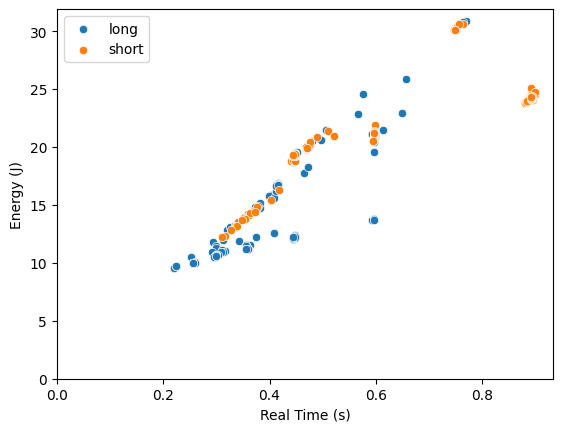

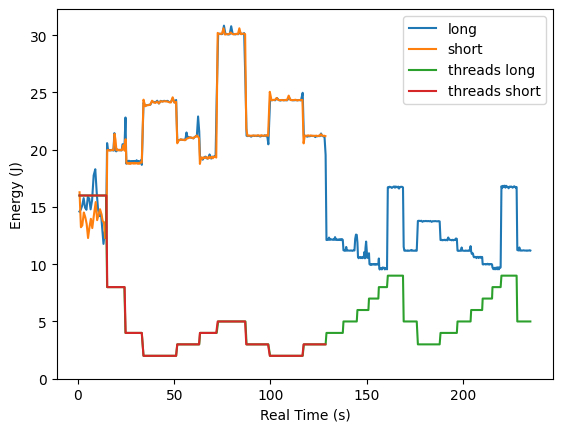

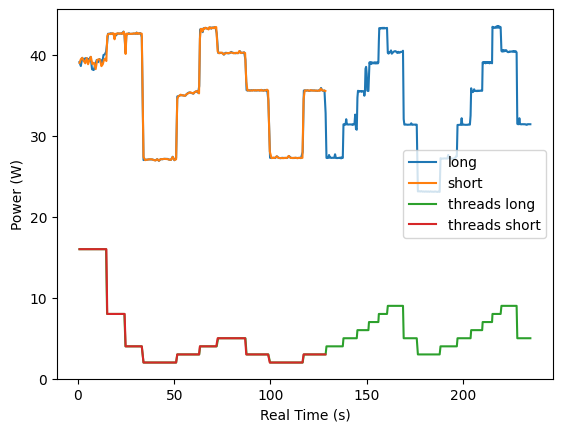

In [32]:
#real, user, energy, energy_user, est, t = getxy([(693720053, 360468947, 28307483, 693720053, 16), (534282496, 267494026, 22644718, 534282496, 16), (547991995, 274027230, 23156923, 547991995, 16), (507997328, 252214273, 21668218, 507997328, 16), (595987390, 301816461, 25068296, 595987390, 16), (523983291, 261196383, 22233158, 523983291, 16), (559964178, 291024648, 23133974, 559964178, 16), (551990397, 279198289, 22655764, 551990397, 16), (643993907, 325905707, 26225824, 643993907, 16), (648026707, 341025535, 26719842, 648026707, 16), (619994614, 318984854, 25713618, 619994614, 16), (631993630, 324216848, 26178400, 631993630, 16), (617934365, 312850796, 25573726, 617934365, 16), (610054717, 305729978, 25354244, 610054717, 16), (635980335, 321876291, 26395257, 635980335, 16), (611964955, 317946778, 24654173, 611964955, 16), (663995539, 346696617, 26895500, 663995539, 16), (643991618, 330873978, 26124201, 643991618, 16), (627995059, 329975365, 25239987, 627995059, 16), (616025467, 316085497, 25657283, 616025467, 16), (646196528, 330625454, 26728875, 646196528, 16), (649757398, 342930824, 26229242, 649757398, 16), (636053395, 321086573, 26661247, 636053395, 16), (599971325, 308619142, 25036741, 599971325, 16), (647998716, 318518252, 27334402, 647998716, 16), (579991531, 278440419, 24316100, 579991531, 16), (526432089, 256888826, 22117436, 526432089, 16), (619333755, 293499413, 26103144, 619333755, 16), (598192135, 280356673, 24757078, 598192135, 16), (587963531, 300131912, 23911559, 587963531, 16), (631508682, 306668389, 25882502, 631508682, 16), (620028551, 296985904, 25915522, 620028551, 16), (589777658, 289513255, 24718870, 589777658, 16), (620437525, 306585660, 25951593, 620437525, 16), (637731701, 312690974, 26282343, 637731701, 16), (603990597, 297731418, 25054257, 603990597, 16), (596028390, 299391970, 25236874, 596028390, 16), (695118810, 336670013, 29244249, 695118810, 16), (688876718, 333808187, 28910387, 688876718, 16), (776531031, 378937753, 31672649, 776531031, 16), (759405149, 358194385, 30282149, 759405149, 16), (728017288, 360732719, 29670456, 728017288, 16), (707999668, 331992322, 28820544, 707999668, 16), (639991483, 307187277, 26818779, 639991483, 16), (594365989, 308509478, 25038755, 594365989, 16), (605639983, 315584311, 25530025, 605639983, 16), (561941872, 290376987, 23682434, 561941872, 16), (566037014, 299569407, 23960083, 566037014, 16), (631948944, 319687294, 26163629, 631948944, 16), (639992278, 324905548, 26238580, 639992278, 16), (607990834, 312491987, 25011655, 607990834, 16), (584003708, 297498657, 24280211, 584003708, 16), (624033909, 297192521, 26738762, 624033909, 16), (679976522, 332242692, 28285084, 679976522, 16), (575994870, 279995071, 24329893, 575994870, 16), (535960354, 267976937, 22601322, 535960354, 16), (512027303, 255980781, 22326420, 512027303, 16), (511996824, 255475130, 22340519, 511996824, 16), (511951231, 257148412, 21816777, 511951231, 16), (527991888, 263126518, 22318669, 527991888, 16), (532021080, 509612344, 23111452, 532021080, 8), (468850561, 468080347, 20570748, 468850561, 8), (470533929, 468292481, 20771920, 470533929, 8), (470935979, 471853953, 20803963, 470935979, 8), (471730371, 471877782, 20873787, 471730371, 8), (471502420, 471907673, 20859199, 471502420, 8), (470858901, 471783058, 20770455, 470858901, 8), (471210579, 468391692, 20867683, 471210579, 8), (468953524, 471602901, 20730050, 468953524, 8), (469963504, 468241609, 20770759, 469963504, 8), (469487993, 471584323, 20728524, 469487993, 8), (469225499, 468125686, 20735421, 469225499, 8), (470511418, 468290588, 20812202, 470511418, 8), (468874593, 471514444, 20724740, 468874593, 8), (470742057, 468341088, 20836311, 470742057, 8), (471919807, 471980800, 20854500, 471919807, 8), (469557941, 471618016, 20781197, 469557941, 8), (469184238, 468076493, 20696114, 469184238, 8), (469465505, 468174672, 20773567, 469465505, 8), (468962277, 471611047, 20709847, 468962277, 8), (490248787, 487689774, 21594793, 490248787, 8), (468920285, 468106787, 20728158, 468920285, 8), (469627128, 471655640, 20730965, 469627128, 8), (469276054, 468073518, 20764290, 469276054, 8), (469064363, 468119255, 20722725, 469064363, 8), (469790939, 471702041, 20763558, 469790939, 8), (469121848, 468113992, 20716133, 469121848, 8), (470586123, 471759114, 20788948, 470586123, 8), (469216204, 468140132, 20699716, 469216204, 8), (469229896, 468064586, 20727059, 469229896, 8), (479743671, 483749562, 20425058, 479743671, 4), (447010125, 447749283, 19754588, 447010125, 4), (445889827, 447468378, 19698802, 445889827, 4), (446091622, 444511428, 19718943, 446091622, 4), (446316868, 447577238, 19764171, 446316868, 4), (446044287, 444502350, 19696666, 446044287, 4), (446100922, 447522797, 19723765, 446100922, 4), (445768109, 444433833, 19696910, 445768109, 4), (446015795, 447497687, 19722911, 446015795, 4), (445969821, 444486077, 19732005, 445969821, 4), (446089111, 447521295, 19697277, 446089111, 4), (445985468, 444493603, 19721324, 445985468, 4), (445812134, 447445233, 19734873, 445812134, 4), (446042562, 444507345, 19696849, 446042562, 4), (446463305, 447607430, 19732982, 446463305, 4), (445980657, 444492664, 19723277, 445980657, 4), (486483240, 487604814, 21054451, 486483240, 4), (446179970, 444540496, 19603648, 446179970, 4), (445960480, 447483869, 19729808, 445960480, 4), (446110684, 444522222, 19720470, 446110684, 4), (445845379, 447448781, 19712291, 445845379, 4), (446049430, 444504975, 19731639, 446049430, 4), (446021207, 447502673, 19710948, 446021207, 4), (446199125, 447543888, 19715525, 446199125, 4), (445901290, 444469003, 19733104, 445901290, 4), (480120370, 480017150, 21222541, 480120370, 4), (445863416, 447462605, 19722362, 445863416, 4), (447080826, 444761723, 19759532, 447080826, 4), (446046911, 447506122, 19739573, 446046911, 4), (447290261, 447813411, 19759105, 447290261, 4), (891697830, 892277770, 25371212, 891697830, 2), (891516166, 889675175, 24878537, 891516166, 2), (891549166, 891722083, 24793455, 891549166, 2), (891569492, 891748767, 24808652, 891569492, 2), (909321668, 901845516, 25261349, 909321668, 2), (891577507, 889705156, 24671629, 891577507, 2), (891826660, 891825583, 24797421, 891826660, 2), (891615956, 891743926, 24630308, 891615956, 2), (891697355, 891786320, 24708127, 891697355, 2), (891590983, 891743691, 24883481, 891590983, 2), (891457495, 891683535, 24798399, 891457495, 2), (894752824, 895313997, 25504146, 894752824, 2), (891874470, 891881485, 24933469, 891874470, 2), (891684900, 891772216, 24702024, 891684900, 2), (891610368, 889748873, 24617735, 891610368, 2), (891591259, 891732513, 24593443, 891591259, 2), (891713674, 891807384, 24860776, 891713674, 2), (891809235, 891849824, 24720335, 891809235, 2), (891704661, 891795004, 24783872, 891704661, 2), (891675402, 891788113, 24511412, 891675402, 2), (891673898, 891755765, 24652952, 891673898, 2), (891695897, 891771635, 24461485, 891695897, 2), (891878016, 891849895, 24590697, 891878016, 2), (891666651, 891766677, 24424192, 891666651, 2), (891501642, 891698608, 24726622, 891501642, 2), (891468953, 891706880, 24608762, 891468953, 2), (891668909, 891780812, 24614806, 891668909, 2), (891758540, 889830123, 24630552, 891758540, 2), (891395359, 891653708, 24597532, 891395359, 2), (891766194, 891833755, 24593260, 891766194, 2), (595203932, 594712306, 20778694, 595203932, 3), (595456272, 595812133, 21440741, 595456272, 3), (616189426, 616041960, 22365421, 616189426, 3), (595600372, 595849364, 21489020, 595600372, 3), (595320582, 595764935, 21507086, 595320582, 3), (595568780, 595844625, 21487432, 595568780, 3), (595393149, 593119689, 21531562, 595393149, 3), (595247701, 595738120, 21525701, 595247701, 3), (595451379, 595801655, 21553839, 595451379, 3), (595408655, 595789034, 21505743, 595408655, 3), (595173187, 595716461, 21519477, 595173187, 3), (595391133, 595783685, 21570074, 595391133, 3), (595340748, 593107009, 21520880, 595340748, 3), (595338004, 595768533, 21560125, 595338004, 3), (595335308, 595773182, 21582159, 595335308, 3), (595393739, 595778414, 21539923, 595393739, 3), (595249272, 595737574, 21533698, 595249272, 3), (595309259, 595760232, 21534063, 595309259, 3), (595338862, 593096257, 21544745, 595338862, 3), (595199065, 595728805, 21551885, 595199065, 3), (595327456, 595772487, 21574713, 595327456, 3), (595495924, 595826419, 21618536, 595495924, 3), (595377342, 595777817, 21590155, 595377342, 3), (595531732, 595837356, 21599676, 595531732, 3), (595604312, 595865953, 21601751, 595604312, 3), (595373971, 593115189, 21639532, 595373971, 3), (595344550, 595777283, 21603461, 595344550, 3), (595353968, 595781624, 21628423, 595353968, 3), (596255369, 596070840, 21672369, 596255369, 3), (595434015, 595799855, 21625738, 595434015, 3), (446096371, 446965403, 18889783, 446096371, 4), (445988774, 444492316, 19713939, 445988774, 4), (446110373, 447524654, 19720714, 446110373, 4), (446115128, 444512751, 19743052, 446115128, 4), (446107193, 447520947, 19679821, 446107193, 4), (446077903, 444516143, 19712413, 446077903, 4), (445980503, 447492888, 19728160, 445980503, 4), (446441613, 444590876, 19714122, 446441613, 4), (446182359, 447543025, 19727672, 446182359, 4), (446251243, 444552013, 19752940, 446251243, 4), (446027580, 447505208, 19691661, 446027580, 4), (446150893, 444531314, 19708628, 446150893, 4), (445986520, 447484586, 19716075, 445986520, 4), (446126952, 444529472, 19710216, 446126952, 4), (446209812, 447546332, 19719432, 446209812, 4), (446019093, 447500130, 19714976, 446019093, 4), (447508508, 444863575, 19780772, 447508508, 4), (446119916, 447525459, 19693004, 446119916, 4), (445887685, 444467446, 19715465, 445887685, 4), (446205481, 447543346, 19727794, 446205481, 4), (446440747, 447604779, 16174336, 446440747, 4), (445951600, 444470776, 12488249, 445951600, 4), (445876470, 447465230, 12481474, 445876470, 4), (445827265, 444452677, 12446197, 445827265, 4), (445874227, 444465084, 12445891, 445874227, 4), (445992635, 447486945, 12413847, 445992635, 4), (445850565, 444455004, 12409697, 445850565, 4), (445931495, 447478712, 12401641, 445931495, 4), (445980958, 444492701, 12389128, 445980958, 4), (449899726, 451470204, 12535369, 449899726, 4), (390484547, 391376231, 12378569, 390484547, 5), (356927753, 356184538, 11355562, 356927753, 5), (356814361, 356159371, 11353181, 356814361, 5), (356752161, 356146348, 11363741, 356752161, 5), (356936913, 356184225, 11341096, 356936913, 5), (356942245, 359372672, 11378023, 356942245, 5), (356773352, 356148749, 11352876, 356773352, 5), (356755015, 356149517, 11382112, 356755015, 5), (356811912, 356158096, 11382600, 356811912, 5), (356914041, 356177809, 11382051, 356914041, 5), (356713042, 359339703, 11338045, 356713042, 5), (356728009, 356142570, 11374544, 356728009, 5), (356744830, 356143266, 11387727, 356744830, 5), (356659434, 356129312, 11346284, 356659434, 5), (356806435, 356160642, 11358370, 356806435, 5), (356851368, 359364318, 11372773, 356851368, 5), (356780245, 356151825, 11382845, 356780245, 5), (356826492, 356158856, 11362275, 356826492, 5), (356820349, 356163223, 11362886, 356820349, 5), (356684049, 356132162, 11337618, 356684049, 5), (356651386, 356125603, 11371980, 356651386, 5), (356802759, 359359219, 11361177, 356802759, 5), (356734525, 356141847, 11368257, 356734525, 5), (356802604, 356154522, 11343782, 356802604, 5), (356712526, 356140225, 11363130, 356712526, 5), (356758583, 356150580, 11358186, 356758583, 5), (356835150, 359361114, 11371553, 356835150, 5), (356709994, 356138530, 11341036, 356709994, 5), (356717529, 356137141, 11373506, 356717529, 5), (356979187, 356191082, 11380281, 356979187, 5), (332255594, 331528309, 11589264, 332255594, 6), (298821573, 299801770, 10855136, 298821573, 6), (298777064, 299791677, 10861972, 298777064, 6), (298818969, 296467381, 10862582, 298818969, 6), (300348936, 303385528, 11356355, 300348936, 6), (310691045, 308444553, 11252291, 310691045, 6), (309159598, 308191386, 11196565, 309159598, 6), (310527934, 311750806, 11220614, 310527934, 6), (308794895, 308130789, 11211091, 308794895, 6), (298787216, 299796411, 10886203, 298787216, 6), (298837020, 299799449, 10875522, 298837020, 6), (298837283, 296462691, 10882723, 298837283, 6), (324346822, 323140766, 11557038, 324346822, 6), (298805035, 296464754, 10841220, 298805035, 6), (298816873, 299801586, 10848056, 298816873, 6), (298929620, 299818753, 10868136, 298929620, 6), (298961222, 296491108, 10875461, 298961222, 6), (298834818, 299797011, 10851351, 298834818, 6), (298886149, 299812110, 10876071, 298886149, 6), (298827691, 299802334, 10870883, 298827691, 6), (298824133, 296469078, 10878390, 298824133, 6), (300088794, 300012619, 10913729, 300088794, 6), (304005518, 303998183, 11030734, 304005518, 6), (298831649, 299803504, 10876315, 298831649, 6), (298808488, 299791588, 10879061, 298808488, 6), (298790622, 296463776, 10872531, 298790622, 6), (298827987, 299799165, 10844760, 298827987, 6), (298844878, 299805437, 10873385, 298844878, 6), (298855992, 299807398, 10876559, 298855992, 6), (298937786, 296486548, 10876071, 298937786, 6), (256544626, 255631293, 10253880, 256544626, 7), (256512543, 259500543, 10208775, 256512543, 7), (256712331, 256101301, 10246312, 256712331, 7), (256437370, 256059586, 10218846, 256437370, 7), (256508138, 256071234, 10246372, 256508138, 7), (256450331, 256063506, 10220128, 256450331, 7), (256532188, 256069478, 10252171, 256532188, 7), (256407981, 256057427, 10217442, 256407981, 7), (256519939, 256070397, 10254307, 256519939, 7), (256610635, 259508719, 10217381, 256610635, 7), (256600449, 256085267, 10250829, 256600449, 7), (256533974, 256074415, 10247776, 256533974, 7), (256516229, 256071779, 10420384, 256516229, 7), (256692897, 256097721, 10941683, 256692897, 7), (257157368, 256163020, 11299227, 257157368, 7), (261223812, 263601016, 11218721, 261223812, 7), (257273124, 256172368, 11412324, 257273124, 7), (256661814, 256084064, 11371614, 256661814, 7), (256699707, 256097724, 11364900, 256699707, 7), (256875900, 259543785, 11402193, 256875900, 7), (256852536, 256117346, 11391389, 256852536, 7), (275005912, 275855683, 11837921, 275005912, 7), (277943183, 276273631, 12055267, 277943183, 7), (257479100, 256206221, 10626804, 257479100, 7), (256628529, 259505172, 10665134, 256628529, 7), (256567752, 256077993, 10226841, 256567752, 7), (256347044, 256049065, 10250585, 256347044, 7), (256417707, 256053006, 10219456, 256417707, 7), (256465930, 256065426, 10212132, 256465930, 7), (256548361, 256076994, 10262059, 256548361, 7), (223026636, 223503294, 9862645, 223026636, 8), (223027278, 223873498, 9875463, 223027278, 8), (222980717, 220368955, 9873876, 222980717, 8), (223099650, 223884782, 9880346, 223099650, 8), (223065726, 223881528, 9971349, 223065726, 8), (223023078, 223877067, 9886205, 223023078, 8), (223122924, 223885087, 9866308, 223122924, 8), (223079528, 220383735, 9871923, 223079528, 8), (223075557, 223882663, 9915746, 223075557, 8), (223042260, 223877892, 9873327, 223042260, 8), (231711481, 231960323, 10307102, 231711481, 8), (249232414, 248143786, 10920566, 249232414, 8), (223332583, 223913851, 9905553, 223332583, 8), (223594292, 223946673, 9869359, 223594292, 8), (223074300, 223878426, 9948705, 223074300, 8), (223111587, 220387894, 9897863, 223111587, 8), (223085317, 223884422, 9889257, 223085317, 8), (223088542, 223884253, 9903173, 223088542, 8), (223135284, 223884272, 9943029, 223135284, 8), (223009088, 220370754, 9924352, 223009088, 8), (222982660, 223870713, 9939855, 222982660, 8), (222977415, 223871038, 9893773, 222977415, 8), (223173052, 223895419, 9902380, 223173052, 8), (223005226, 223872079, 9889501, 223005226, 8), (223020436, 220375405, 9885228, 223020436, 8), (223046700, 223880303, 9874182, 223046700, 8), (223083623, 223882178, 9914952, 223083623, 8), (223052510, 223879155, 9878027, 223052510, 8), (223904330, 223984419, 9928685, 223904330, 8), (223576508, 220438403, 9940893, 223576508, 8), (415513427, 415523696, 16951678, 415513427, 9), (415841388, 416006464, 17223344, 415841388, 9), (415164226, 415982970, 17353044, 415164226, 9), (414675214, 415921880, 16931964, 414675214, 9), (416408390, 416039639, 17099870, 416408390, 9), (416018382, 415998444, 16944781, 416018382, 9), (415505397, 415941217, 16914019, 415505397, 9), (429786253, 428196759, 17522111, 429786253, 9), (417765672, 419748221, 17028216, 417765672, 9), (415592251, 415943275, 16911151, 415592251, 9), (415251831, 412359160, 16955156, 415251831, 9), (415975173, 415994023, 16908893, 415975173, 9), (416141863, 416014006, 16976336, 416141863, 9), (414809195, 415859602, 16910662, 414809195, 9), (415825819, 415977336, 16929522, 415825819, 9), (432162779, 432013487, 17581193, 432162779, 9), (415618712, 415955877, 16981096, 415618712, 9), (415376901, 415926684, 16958941, 415376901, 9), (416126278, 415997573, 17007525, 416126278, 9), (415003525, 415887986, 16923175, 415003525, 9), (415406591, 412373156, 16950335, 415406591, 9), (415717071, 415967627, 17025041, 415717071, 9), (415306347, 415918348, 16962970, 415306347, 9), (414693813, 415849368, 16945757, 414693813, 9), (415224569, 415910447, 16949847, 415224569, 9), (415950277, 415993283, 17014361, 415950277, 9), (414789597, 412309090, 16964800, 414789597, 9), (415018056, 415886690, 16956622, 415018056, 9), (415865162, 415976101, 16987078, 415865162, 9), (416656297, 416070589, 17019609, 416656297, 9), (356873904, 358650002, 11527559, 356873904, 5), (356844202, 359367873, 11518098, 356844202, 5), (357814924, 356359421, 11552460, 357814924, 5), (356945293, 356178827, 11517427, 356945293, 5), (356791230, 359356094, 11509919, 356791230, 5), (356785379, 356155188, 11479280, 356785379, 5), (356651070, 356128744, 11512727, 356651070, 5), (356723671, 356141240, 11511811, 356723671, 5), (356718002, 356140382, 11481965, 356718002, 5), (356900377, 359367366, 11521028, 356900377, 5), (356832576, 356161997, 11516511, 356832576, 5), (356903312, 356177344, 11512971, 356903312, 5), (356799915, 356158126, 11515657, 356799915, 5), (356788043, 356152127, 11511750, 356788043, 5), (356806989, 359358337, 11514497, 356806989, 5), (356731346, 356141575, 11486482, 356731346, 5), (356862576, 356167213, 11643219, 356862576, 5), (357090177, 356213293, 12957060, 357090177, 5), (357282703, 359451207, 12616605, 357282703, 5), (357153422, 356222985, 11709626, 357153422, 5), (356936858, 356181362, 11516694, 356936858, 5), (356817009, 356157149, 11485261, 356817009, 5), (356861506, 359365426, 11509309, 356861506, 5), (356834295, 356166228, 11506929, 356834295, 5), (356909688, 356177182, 11509858, 356909688, 5), (357024983, 356200997, 11504121, 357024983, 5), (356769893, 356149846, 11509492, 356769893, 5), (356858756, 359366531, 11505037, 356858756, 5), (356817497, 356161377, 11486359, 356817497, 5), (357005320, 356200353, 11540071, 357005320, 5), (595340408, 597323395, 14306055, 595340408, 3), (595404270, 595787567, 14310083, 595404270, 3), (595338047, 595772596, 14319909, 595338047, 3), (595396509, 593122255, 14290003, 595396509, 3), (595789304, 595925545, 14574975, 595789304, 3), (595613922, 595859069, 14281518, 595613922, 3), (595163628, 595716136, 14307520, 595163628, 3), (595403630, 595786047, 14296960, 595403630, 3), (595301778, 595756936, 14286585, 595301778, 3), (595541253, 595838198, 14320398, 595541253, 3), (595477710, 595814205, 14318139, 595477710, 3), (596945741, 596309675, 14453882, 596945741, 3), (595456824, 595809488, 14301355, 595456824, 3), (595333745, 593103388, 14279260, 595333745, 3), (595426360, 595798680, 14288293, 595426360, 3), (595538288, 595833875, 14299219, 595538288, 3), (595347796, 595780115, 14286341, 595347796, 3), (595524519, 595830275, 14277979, 595524519, 3), (595420821, 595798466, 14270532, 595420821, 3), (595454249, 595807930, 14296167, 595454249, 3), (595190271, 593050670, 14276758, 595190271, 3), (595595190, 595856571, 14289576, 595595190, 3), (595491634, 595820011, 14272668, 595491634, 3), (595620218, 595871184, 14304834, 595620218, 3), (595446917, 595799504, 14806786, 595446917, 3), (595592075, 595853895, 14335534, 595592075, 3), (595542879, 595838045, 14278956, 595542879, 3), (595537256, 595826907, 14294397, 595537256, 3), (595300974, 593080434, 14272302, 595300974, 3), (595309606, 595756866, 14296716, 595309606, 3), (445991265, 446665032, 12310577, 445991265, 4), (445904642, 444463869, 12396147, 445904642, 4), (446067041, 447511471, 12391509, 446067041, 4), (446018672, 444497645, 12391448, 446018672, 4), (446049778, 447510584, 12353850, 446049778, 4), (445932319, 444478049, 12405425, 445932319, 4), (446147241, 447525739, 12383269, 446147241, 4), (446161817, 444534675, 12347563, 446161817, 4), (446011417, 447494815, 12382049, 446011417, 4), (445943623, 444484127, 12363677, 445943623, 4), (445971258, 447482806, 12384184, 445971258, 4), (446099340, 444522015, 12337066, 446099340, 4), (446222867, 447552353, 12345488, 446222867, 4), (446061073, 444507809, 12362456, 446061073, 4), (445972944, 447488802, 12362456, 445972944, 4), (446009561, 444489326, 12394622, 446009561, 4), (445908111, 447470650, 12367522, 445908111, 4), (446269685, 447558985, 12394805, 446269685, 4), (445991838, 444495272, 12365325, 445991838, 4), (445971837, 447479338, 12343352, 445971837, 4), (445962158, 444484304, 12364287, 445962158, 4), (446003037, 447496571, 12346709, 446003037, 4), (446227613, 444555525, 12384612, 446227613, 4), (445912463, 447475629, 12353667, 445912463, 4), (445961917, 444475776, 12380034, 445961917, 4), (446017334, 447499804, 12378387, 446017334, 4), (446058199, 444509024, 12389372, 446058199, 4), (447357316, 447836577, 12564116, 447357316, 4), (446124041, 444524894, 12347197, 446124041, 4), (446105447, 447516634, 12334686, 446105447, 4), (356886144, 355803294, 11252717, 356886144, 5), (356734774, 356141670, 11259737, 356734774, 5), (356873768, 359373585, 11266390, 356873768, 5), (369664100, 368318932, 11868927, 369664100, 5), (356794474, 356151301, 11312654, 356794474, 5), (356787144, 356155108, 11309358, 356787144, 5), (356828394, 359359636, 11329317, 356828394, 5), (356763261, 356148883, 11306123, 356763261, 5), (356725365, 356141250, 11319551, 356725365, 5), (356832112, 356162125, 11331881, 356832112, 5), (356779586, 356149590, 11360566, 356779586, 5), (356680772, 359332463, 11322237, 356680772, 5), (356906338, 356179185, 11355256, 356906338, 5), (356807060, 356156348, 11333956, 356807060, 5), (356725227, 356141169, 11335664, 356725227, 5), (356722217, 356137465, 11325777, 356722217, 5), (356747484, 359344098, 11297334, 356747484, 5), (356826582, 356160776, 11321199, 356826582, 5), (356810696, 356158252, 11325045, 356810696, 5), (356783530, 356154970, 11329316, 356783530, 5), (356665059, 356129093, 11303865, 356665059, 5), (356717299, 356137718, 11309725, 356717299, 5), (356871715, 359372223, 11329133, 356871715, 5), (356780986, 356155443, 11336275, 356780986, 5), (356754242, 356146016, 11344697, 356754242, 5), (356882719, 356173480, 11331209, 356882719, 5), (356760464, 356146345, 11307589, 356760464, 5), (356775428, 356148546, 11348603, 356775428, 5), (356751938, 356146575, 11367891, 356751938, 5), (356757993, 356150139, 11335542, 356757993, 5), (299299185, 299487562, 10841342, 299299185, 6), (298685519, 299777384, 10829134, 298685519, 6), (298927368, 296482801, 10815097, 298927368, 6), (298816212, 299798354, 10820223, 298816212, 6), (298913988, 299816956, 10858432, 298913988, 6), (298871357, 296477997, 10847140, 298871357, 6), (298821931, 299802959, 10857944, 298821931, 6), (298970682, 299824110, 10864901, 298970682, 6), (298810716, 299797648, 10850375, 298810716, 6), (298789815, 296459566, 10852939, 298789815, 6), (298866415, 299806666, 10826144, 298866415, 6), (298758583, 299789017, 10857028, 298758583, 6), (298801818, 296465818, 10852450, 298801818, 6), (298949048, 299822968, 10868746, 298949048, 6), (298974942, 299823359, 10856479, 298974942, 6), (298753127, 299790588, 10866916, 298753127, 6), (298927248, 296483753, 10865450, 298927248, 6), (298814052, 299798439, 10837619, 298814052, 6), (298717476, 299784210, 10878207, 298717476, 6), (327219379, 327866908, 12655974, 327219379, 6)])
#real_short, user_short, energy_short, energy_user_short, est_short, t_short = getxy([(632034006, 301590536, 25880793, 632034006, 16), (567928065, 284612819, 23513795, 567928065, 16), (576021189, 288187246, 24253417, 576021189, 16), (512002630, 256988179, 21901982, 512002630, 16), (607993614, 295000082, 25498409, 607993614, 16), (503954213, 249238913, 20889412, 503954213, 16), (603993003, 292610331, 24777158, 603993003, 16), (620016900, 306889208, 25990961, 620016900, 16), (659997309, 314793203, 27332450, 659997309, 16), (631963837, 308293191, 25534724, 631963837, 16), (651992942, 313245121, 26469659, 651992942, 16), (646421282, 318389789, 26711052, 646421282, 16), (649567727, 320485229, 26443353, 649567727, 16), (647988098, 323482517, 26497430, 647988098, 16), (663991911, 325106321, 26985344, 663991911, 16), (640025061, 304084829, 26653069, 640025061, 16), (636006172, 308412033, 26239191, 636006172, 16), (619950764, 304813615, 25099850, 619950764, 16), (636036053, 299856581, 26442010, 636036053, 16), (627993452, 309742063, 26040582, 627993452, 16), (631944774, 303646318, 25749019, 631944774, 16), (607992460, 288453928, 24698606, 607992460, 16), (695999138, 319258657, 28184376, 695999138, 16), (592040035, 282493279, 25038449, 592040035, 16), (627933659, 320273413, 25948542, 627933659, 16), (611992366, 314249573, 24616636, 611992366, 16), (555989937, 291230785, 22981509, 555989937, 16), (668026960, 354416962, 27647451, 668026960, 16), (667999023, 334810833, 27965565, 667999023, 16), (623982877, 321239308, 26046809, 623982877, 16), (627930778, 326220154, 25757990, 627930778, 16), (619990609, 314249585, 25408870, 619990609, 16), (639990260, 324750220, 26345147, 639990260, 16), (599991693, 304360566, 24932066, 599991693, 16), (544037824, 273625374, 23142458, 544037824, 16), (575988342, 287573759, 24319029, 575988342, 16), (632012233, 314179633, 26491571, 632012233, 16), (655981704, 314801152, 27637868, 655981704, 16), (775992747, 393332049, 31934672, 775992747, 16), (751942765, 377318825, 30457869, 751942765, 16), (767982191, 388940918, 31010907, 767982191, 16), (759993444, 397468568, 30593672, 759993444, 16), (596029519, 315245375, 24878965, 596029519, 16), (559956050, 278837376, 23061769, 559956050, 16), (588001436, 281244878, 24314391, 588001436, 16), (612017631, 293212817, 25673152, 612017631, 16), (583997261, 276227924, 24804990, 583997261, 16), (567989625, 275722141, 24064330, 567989625, 16), (639990252, 318924773, 26784173, 639990252, 16), (611991570, 297110057, 25616877, 611991570, 16), (631963313, 306489333, 26102900, 631963313, 16), (536048145, 269541573, 22860720, 536048145, 16), (655938261, 337385989, 27409659, 655938261, 16), (612015291, 314742473, 25388057, 612015291, 16), (524008490, 265967985, 22473820, 524008490, 16), (491975390, 245740037, 21308295, 491975390, 16), (491988835, 246231244, 21457953, 491988835, 16), (483998959, 242217124, 21133185, 483998959, 16), (499996316, 248045231, 21791937, 499996316, 16), (479989927, 250477950, 20806953, 479989927, 16), (515984383, 510076914, 22405399, 515984383, 8), (468899547, 468069924, 20724984, 468899547, 8), (468854080, 468084342, 20715401, 468854080, 8), (469043640, 468104003, 20728279, 469043640, 8), (468448945, 468008111, 20695199, 468448945, 8), (468761527, 471580081, 20726876, 468761527, 8), (468584661, 468061556, 20729805, 468584661, 8), (469271731, 468108904, 20729683, 469271731, 8), (469151763, 468102519, 20731453, 469151763, 8), (469105842, 471603272, 20726205, 469105842, 8), (468822707, 468071180, 20734749, 468822707, 8), (469173812, 468135321, 20724861, 469173812, 8), (469315832, 468132564, 20726998, 469315832, 8), (468921723, 471580676, 20733223, 468921723, 8), (469144033, 468104138, 20784493, 469144033, 8), (468783471, 468062241, 20723519, 468783471, 8), (469106866, 468124580, 20771126, 469106866, 8), (468602210, 471546764, 20664193, 468602210, 8), (469039105, 468057023, 20730110, 469039105, 8), (468974444, 468090685, 20709969, 468974444, 8), (468407811, 468031616, 20693551, 468407811, 8), (468971547, 468110407, 20665474, 468971547, 8), (468882318, 471596381, 20727242, 468882318, 8), (468802416, 468060113, 20718270, 468802416, 8), (469022915, 468120293, 20717293, 469022915, 8), (469191811, 468129951, 20732552, 469191811, 8), (468811770, 471584435, 20670235, 468811770, 8), (468816777, 468074013, 20748482, 468816777, 8), (469182713, 468136710, 20701119, 469182713, 8), (468950709, 468037321, 20739815, 468950709, 8), (500374730, 503375724, 21353644, 500374730, 4), (448721955, 451176936, 19806773, 448721955, 4), (448375720, 448086784, 19832957, 448375720, 4), (448667205, 448154130, 19813426, 448667205, 4), (448665114, 448164509, 19846141, 448665114, 4), (448800649, 448197034, 19835887, 448800649, 4), (448743846, 448181742, 19850535, 448743846, 4), (448487367, 451112723, 19790171, 448487367, 4), (448629557, 448155352, 19859569, 448629557, 4), (448285320, 448066989, 19812754, 448285320, 4), (447797617, 447948001, 19788340, 447797617, 4), (448030662, 448002253, 19810863, 448030662, 4), (447779092, 447934875, 19820567, 447779092, 4), (447719904, 447926934, 19747386, 447719904, 4), (448744794, 448179192, 19859812, 448744794, 4), (448720579, 448171054, 19854258, 448720579, 4), (491546806, 491873244, 21116340, 491546806, 4), (447957193, 447988036, 19813121, 447957193, 4), (447602733, 447897834, 19821177, 447602733, 4), (447333460, 447830948, 19759960, 447333460, 4), (447740470, 447924075, 19797434, 447740470, 4), (447726725, 444922159, 19825023, 447726725, 4), (448426404, 451104914, 19803233, 448426404, 4), (447296212, 444820585, 19794627, 447296212, 4), (447837322, 447953724, 19783213, 447837322, 4), (448156483, 448033178, 19846080, 448156483, 4), (447967213, 447986918, 19809764, 447967213, 4), (447369698, 447838001, 19763560, 447369698, 4), (447729229, 447928264, 19827525, 447729229, 4), (447427014, 447834170, 19502391, 447427014, 4), (895008075, 897581765, 25167233, 895008075, 2), (894405939, 893163339, 24954587, 894405939, 2), (894987805, 895468500, 24880308, 894987805, 2), (894499528, 895208359, 24890500, 894499528, 2), (915123032, 905531311, 25333004, 915123032, 2), (895498417, 893669183, 24916318, 895498417, 2), (895176726, 895531393, 24855649, 895176726, 2), (894288327, 895094134, 24715696, 894288327, 2), (895033351, 895484519, 24793577, 895033351, 2), (894382393, 893144909, 24963559, 894382393, 2), (895180289, 895553487, 24907102, 895180289, 2), (898089940, 897005837, 25605769, 898089940, 2), (895105963, 895505352, 24998471, 895105963, 2), (894290997, 895090465, 24789427, 894290997, 2), (895080456, 895490971, 24695432, 895080456, 2), (894392257, 893149113, 24719419, 894392257, 2), (895114108, 895510862, 24951657, 895114108, 2), (894551068, 895228223, 24768919, 894551068, 2), (895405111, 893661023, 24897519, 895405111, 2), (895296566, 895630759, 24619078, 895296566, 2), (895447433, 895675139, 24754026, 895447433, 2), (894507865, 895213060, 24519346, 894507865, 2), (895305002, 895600955, 24675047, 895305002, 2), (894749881, 893333172, 24526121, 894749881, 2), (895420385, 895667308, 24859434, 895420385, 2), (894695177, 895306721, 24686887, 894695177, 2), (895351830, 895631546, 24737669, 895351830, 2), (894624922, 893270238, 24681943, 894624922, 2), (895340940, 895624154, 24730711, 895340940, 2), (894644525, 895295520, 25178280, 894644525, 2), (597782298, 596148069, 21481024, 597782298, 3), (597490641, 599157987, 21604315, 597490641, 3), (600993177, 600321916, 21705328, 600993177, 3), (597407023, 596464817, 21577825, 597407023, 3), (597821789, 599272341, 21605109, 597821789, 3), (597309615, 596432903, 21552252, 597309615, 3), (597832815, 596608371, 21617437, 597832815, 3), (597269365, 599087560, 21596258, 597269365, 3), (597755092, 596578166, 21626715, 597755092, 3), (597323963, 599106895, 21582403, 597323963, 3), (597827967, 596605841, 21623358, 597827967, 3), (605015317, 604336057, 21900762, 605015317, 3), (597840372, 599278727, 21640386, 597840372, 3), (597372507, 596454874, 21627386, 597372507, 3), (597834188, 599276046, 21648504, 597834188, 3), (597364240, 596446624, 21641608, 597364240, 3), (597845091, 596611998, 21615850, 597845091, 3), (597363268, 599119495, 21626287, 597363268, 3), (597797377, 596594389, 21632696, 597797377, 3), (597357923, 596447588, 21636847, 597357923, 3), (597791924, 599260774, 21684332, 597791924, 3), (597125657, 596371812, 21659124, 597125657, 3), (597826257, 599270158, 21682989, 597826257, 3), (597185892, 596391954, 21649542, 597185892, 3), (597477279, 596490728, 21681402, 597477279, 3), (597017032, 599002167, 21671514, 597017032, 3), (597461392, 596483310, 21712591, 597461392, 3), (597250626, 596408083, 21682134, 597250626, 3), (597514452, 599163297, 21738165, 597514452, 3), (597672624, 596550747, 22360904, 597672624, 3), (447744899, 447329775, 19785838, 447744899, 4), (447292005, 447817796, 19763011, 447292005, 4), (447544983, 447883534, 19804271, 447544983, 4), (447233363, 447804775, 19763743, 447233363, 4), (447621505, 444901899, 19804332, 447621505, 4), (447228031, 447801020, 19756419, 447228031, 4), (447615241, 447898972, 19805369, 447615241, 4), (447336184, 447828310, 19774181, 447336184, 4), (447722021, 447926967, 19808970, 447722021, 4), (447368817, 447833391, 19752269, 447368817, 4), (447818156, 447950836, 19817637, 447818156, 4), (447255957, 447809210, 19751109, 447255957, 4), (447733088, 444931312, 19810069, 447733088, 4), (447334418, 447830014, 19755259, 447334418, 4), (447878067, 447967902, 19803356, 447878067, 4), (447997778, 447994071, 19799082, 447997778, 4), (456122322, 456024385, 20121042, 456122322, 4), (447660948, 447914024, 19809764, 447660948, 4), (447788634, 447942570, 19797374, 447788634, 4), (447402100, 447848264, 19778208, 447402100, 4)])

#real, user, energy, energy_user, w, t = getxy([(702606924, 396801371, 28462634, 16), (715935090, 378466962, 28218800, 16), (611981098, 318206030, 24631284, 16), (623995804, 300184254, 25028562, 16), (587987970, 287497907, 23686341, 16), (655991737, 311994434, 26400384, 16), (649852647, 303605918, 26583489, 16), (634173746, 297624838, 25948481, 16), (679974717, 317004894, 27781728, 16), (707988736, 326732657, 28764026, 16), (699975380, 338687293, 28060292, 16), (723990280, 350865798, 28622364, 16), (771994570, 385066904, 30288741, 16), (723997993, 358487844, 28476978, 16), (584022053, 291722529, 23867675, 16), (635990429, 308017605, 26168207, 16), (619987694, 287502392, 25576351, 16), (610323291, 302830246, 24997556, 16), (621636916, 319223836, 25168331, 16), (647993848, 338786685, 26099603, 16), (487086430, 475799981, 20930001, 8), (470349251, 471785967, 20428475, 8), (470856134, 471846098, 20402231, 8), (470404961, 468265815, 20383858, 8), (470965531, 471822127, 20408457, 8), (470576933, 471813240, 20411385, 8), (470627163, 468303657, 20387521, 8), (470335210, 471821663, 20406564, 8), (506802235, 503114440, 21519537, 8), (482369478, 479799684, 20906502, 8), (469038208, 468119555, 20361642, 8), (469196012, 471626766, 20356210, 8), (469204567, 468138104, 20323679, 8), (468700358, 468070140, 20347726, 8), (469206814, 468144285, 20360055, 8), (468920483, 471570717, 20353037, 8), (469002864, 468107336, 20336557, 8), (468731399, 468079647, 20355416, 8), (468511491, 468055952, 20303293, 8), (468818022, 467851811, 20322641, 8), (565978108, 571296790, 22528690, 4), (441998860, 440485972, 19155651, 4), (491842845, 491958724, 21188728, 4), (492102299, 492014649, 21183112, 4), (492016621, 491995589, 21190498, 4), (492139799, 495025525, 21196479, 4), (492337553, 492081273, 21233893, 4), (492129341, 492020032, 21179999, 4), (491256657, 488811626, 21140510, 4), (491358004, 491834007, 21141792, 4), (492596932, 492147460, 21236090, 4), (492436071, 495106088, 21192512, 4), (491551723, 488878080, 21203254, 4), (491405823, 491847087, 21158515, 4), (492444746, 492107547, 21242377, 4), (493001471, 495244120, 21247627, 4), (492522728, 492126570, 21191169, 4), (443153859, 443785200, 19251049, 4), (442096217, 440517830, 17057146, 4), (442028361, 443504332, 15744467, 4), (339652935, 336818042, 14126734, 6), (296889011, 296139494, 12864163, 6), (296964306, 296155134, 12853971, 6), (296893432, 296146597, 12876188, 6), (296640425, 296104281, 12879972, 6), (300689635, 303445235, 12996122, 6), (300488306, 300078632, 12976590, 6), (300749032, 300117863, 13044706, 6), (299973112, 299995685, 12991727, 6), (300008287, 300001429, 12989468, 6), (300778477, 300125619, 13018644, 6), (299824265, 299965662, 12995389, 6), (300124079, 300017701, 13034757, 6), (300099504, 300011011, 13005398, 6), (300508690, 300076471, 13000822, 6), (300166266, 300022628, 12976285, 6), (299704700, 299946316, 13004727, 6), (300421636, 300066576, 12996549, 6), (300555213, 300091145, 13008756, 6), (300462675, 303407078, 12967618, 6), (531985010, 531967295, 21990057, 7), (531388867, 528478437, 22008305, 7), (533338100, 535616655, 22017461, 7), (532389411, 532053762, 22031376, 7), (550299204, 548318813, 22655033, 7), (531568927, 531932684, 21921941, 7), (531671838, 531949719, 21962407, 7), (532283144, 532036188, 21977422, 7), (531864636, 531974724, 21901677, 7), (535084386, 535866068, 21984929, 7), (532682642, 532089834, 22020879, 7), (531478997, 531918920, 21996953, 7), (532130615, 532012055, 22019963, 7), (531634569, 531942907, 21916814, 7), (533118509, 532157572, 22066228, 7), (532637628, 532086617, 22090092, 7), (532322078, 535469678, 22039067, 7), (533026728, 532139890, 22014653, 7), (532218997, 532028407, 22059575, 7), (532917597, 532123693, 21990727, 7), (448551032, 449868644, 15957540, 4), (447568681, 447885277, 17459855, 4), (447268464, 447809505, 17501542, 4), (447453599, 447860006, 17499711, 4), (447483261, 447866490, 17585832, 4), (447764237, 447936908, 17529130, 4), (448368331, 448086432, 17535783, 4), (448716948, 448175730, 17644303, 4), (448448696, 448104668, 17667801, 4), (448055744, 448008104, 17508927, 4), (448015686, 447992064, 17560319, 4), (448383079, 448093786, 17635880, 4), (447607229, 447897385, 17564470, 4), (447685568, 447917411, 17576981, 4), (447664967, 447905880, 17584244, 4), (447433498, 447856658, 17573869, 4), (448393486, 448093422, 17678727, 4), (447536379, 447878376, 17580033, 4), (447958804, 447982982, 17602616, 4), (448312264, 448075729, 17630265, 4), (598450514, 597173017, 21367011, 3), (596935623, 598978772, 21296637, 3), (597662522, 596542750, 21326789, 3), (598721591, 599571294, 21315802, 3), (623192886, 616508774, 22719485, 3), (598201005, 596717721, 21708807, 3), (598216434, 599397542, 23383668, 3), (597969497, 596640336, 23520997, 3), (597090581, 596363924, 23487184, 3), (599275311, 599751541, 23684937, 3), (599633049, 599870971, 24253050, 3), (611244394, 611743473, 25646846, 3), (610032255, 608658409, 24061828, 3), (597897555, 599284927, 23621827, 3), (597433421, 596469375, 23550172, 3), (597507903, 599164665, 23538208, 3), (598404130, 596794407, 23565675, 3), (598296214, 599418890, 23609742, 3), (598414478, 596801785, 23595948, 3), (598499603, 599488333, 23653381, 3), (448205025, 447454926, 19768993, 4), (448306815, 448066655, 19449657, 4), (452654712, 452163845, 19058118, 4), (448462562, 448103127, 18983838, 4), (448379872, 451092364, 19329113, 4), (448075490, 448015106, 18623549, 4), (448426209, 448100277, 19383678, 4), (447837538, 447954028, 18878003, 4), (448209746, 448047725, 19011548, 4), (448429484, 448101045, 19099683, 4), (447795520, 447942339, 18641737, 4), (448296876, 448072807, 19500621, 4), (447719506, 447923962, 18799574, 4), (448219118, 448050171, 19100964, 4), (448228906, 448053828, 19238598, 4), (447398367, 447841576, 18633620, 4), (447458936, 447858186, 19455150, 4), (448004929, 447989867, 18767347, 4), (448288774, 448062819, 19113293, 4), (448359806, 448080764, 19227429, 4), (745445645, 744035375, 30410872, 5), (747418989, 747880778, 30673994, 5), (747710320, 747923451, 30708661, 5), (747567180, 747901827, 30714582, 5), (748090394, 748014140, 30762312, 5), (747303978, 747850916, 30726056, 5), (747128276, 744621225, 30682295, 5), (748764201, 751341778, 30782209, 5), (657465393, 656286145, 26821525, 5), (358010486, 359597356, 15818868, 5), (358841721, 356563289, 15789999, 5), (358376122, 359669787, 15860677, 5), (358091639, 356414734, 15830465, 5), (357799821, 359556658, 15826925, 5), (360465080, 360090619, 15910726, 5), (358048234, 356402187, 15821126, 5), (358372226, 359672150, 15832968, 5), (358724992, 359736366, 15834676, 5), (358555237, 356506966, 15864461, 5), (358676374, 359729489, 15827352, 5), (624168141, 623649711, 26320978, 6), (627524422, 627912429, 26428826, 6), (626474591, 627740406, 26427056, 6), (624483284, 624077552, 26264215, 6), (625602999, 624260198, 26361627, 6), (627093619, 627842187, 26423211, 6), (627832358, 627965245, 26466363, 6), (625993093, 624324421, 26390924, 6), (627170933, 627857948, 26429864, 6), (626741560, 627781511, 26421990, 6), (627165321, 627854925, 26427057, 6), (628291102, 628039353, 26472649, 6), (532345553, 532046524, 22141240, 6), (300343298, 300054255, 13272854, 6), (300441055, 300071528, 13236050, 6), (300400524, 300064029, 13288235, 6), (300412101, 300064213, 13252713, 6), (300364062, 300058778, 13297451, 6), (300139337, 300016670, 13254056, 6), (299825447, 299965575, 13219509, 6), (597249469, 602214226, 19039197, 3), (597170812, 596384366, 18917188, 3), (597399122, 596460490, 18910047, 3), (597523783, 599167978, 18941968, 3), (597298769, 596421015, 18886304, 3), (597860587, 596620666, 19035962, 3), (597417014, 599121659, 18873426, 3), (597519223, 596495692, 18907972, 3), (597249822, 596395678, 18861951, 3), (597388044, 599119640, 18883252, 3), (597143110, 596369582, 18866224, 3), (597505998, 596485491, 18860059, 3), (597548421, 599175411, 18895887, 3), (597690015, 596553979, 18878736, 3), (597251795, 599070645, 18897412, 3), (597318214, 596435578, 18854444, 3), (597188222, 596377880, 18859266, 3), (597503040, 599165427, 18879895, 3), (598464151, 596809861, 19021131, 3), (597386602, 599117371, 18984570, 3), (894809444, 893559738, 24580321, 2), (900109890, 900038596, 24948178, 2), (894723042, 895331880, 24529356, 2), (894587114, 895274611, 24559996, 2), (894934074, 893450475, 28137684, 2), (894915362, 895435579, 28222951, 2), (894801220, 895380332, 28272876, 2), (894882874, 895418009, 28229787, 2), (894990080, 893485132, 28273975, 2), (895341317, 895643570, 28473255, 2), (896725211, 896337507, 29730331, 2), (895654288, 895793829, 28917590, 2), (894643031, 895295086, 28233265, 2), (894849793, 895397217, 28256031, 2), (894841829, 893401246, 28233632, 2), (894968254, 895458523, 28261829, 2), (896894650, 896439658, 28302113, 2), (896458330, 896212460, 21304999, 2), (894932255, 895448821, 17610856, 2), (894461257, 895206530, 17571610, 2), (597200139, 596046635, 13943568, 3), (597160653, 596379179, 14085901, 3), (597281080, 599086708, 14065455, 3), (597370553, 596450858, 14045008, 3), (597190695, 596387499, 14074671, 3), (598613210, 599527125, 15373740, 3), (598845214, 599605101, 14950889, 3), (597965876, 596640359, 14086756, 3), (598967230, 599643521, 14234705, 3), (598524503, 599502807, 14059412, 3), (597078445, 596346095, 13992457, 3), (597152748, 596374907, 14000269, 3), (613672778, 609823184, 14269800, 3), (597041170, 596336353, 13896327, 3), (597118526, 596358781, 14029932, 3), (597266904, 596421183, 13964808, 3), (597138840, 599037008, 13964137, 3), (597446071, 596469415, 13952601, 3), (597213325, 596397353, 13972804, 3), (597044310, 599004963, 13953516, 3), (447471806, 444756904, 12201690, 4), (447315833, 447822179, 12225555, 4), (448200695, 448044285, 12491850, 4), (447743329, 447931355, 12201690, 4), (447127308, 447778085, 12231048, 4), (447399244, 447846982, 12198821, 4), (447322986, 447818798, 12202667, 4), (447188914, 447793867, 12202605, 4), (447343128, 444828334, 12232269, 4), (447304023, 447823245, 12199126, 4), (447407742, 447843230, 12232085, 4), (447443643, 447857795, 12200348, 4), (447208196, 447802279, 12207610, 4), (447292944, 447816632, 12196624, 4), (447297158, 444822838, 12227630, 4), (447362863, 447834497, 12199493, 4), (447626366, 447902789, 12231475, 4), (447229987, 447799554, 12201018, 4), (447288985, 447820212, 12213226, 4), (447287072, 447814907, 12230010, 4), (358616625, 356442200, 11241426, 5), (359035015, 359805360, 11265352, 5), (358592464, 359712802, 11273348, 5), (358053404, 356409126, 11260530, 5), (358183349, 359634926, 11266451, 5), (357849092, 356364816, 11260591, 5), (357913238, 359579331, 11262239, 5), (357787423, 356356412, 11260286, 5), (357820775, 359557581, 11257174, 5), (357803081, 356359285, 11238985, 5), (357814665, 356361315, 11264314, 5), (357811230, 359556671, 11261629, 5), (358144250, 356428978, 11260713, 5), (357695826, 359537227, 11265352, 5), (357846796, 356363837, 11260470, 5), (357702136, 359539206, 11233247, 5), (357792330, 356356027, 11258150, 5), (358072670, 359608068, 11264742, 5), (357821519, 356363549, 11255952, 5), (357802607, 359555195, 11261019, 5), (300567913, 299989922, 10702060, 6), (300001305, 299999043, 10715549, 6), (299660160, 299941507, 10667758, 6), (299718987, 299948803, 10688205, 6), (299656758, 299942923, 10692172, 6), (299687987, 296611823, 10665378, 6), (299727429, 299949404, 10690036, 6), (299677051, 299945138, 10695041, 6), (299697372, 299948976, 10657627, 6), (299729849, 299952049, 10701694, 6), (299594854, 299925617, 10693820, 6), (299903987, 299984144, 10699741, 6), (299733345, 299949785, 10654025, 6), (300499976, 300080745, 10718479, 6), (300468622, 300076407, 10688815, 6), (300483727, 300079471, 10724521, 6), (299861749, 299975313, 10684543, 6), (299648550, 299938704, 10658176, 6), (299700092, 299949171, 10686984, 6), (299739815, 299951785, 10697299, 6), (290836575, 291486244, 11003146, 7), (257536901, 256218378, 10109288, 7), (257122701, 256159524, 10072911, 7), (257186582, 259597125, 10067540, 7), (257231315, 256169462, 10119909, 7), (257167020, 256166256, 10116551, 7), (257158361, 259591913, 10117772, 7), (257164204, 256163355, 10125645, 7), (257204947, 256168627, 10110082, 7), (257197795, 259598342, 10126256, 7), (257124490, 256158910, 10157322, 7), (257255545, 256178345, 10120824, 7), (257425538, 259629098, 10120213, 7), (257462011, 256209113, 10155126, 7), (257218954, 256172370, 10130101, 7), (257204185, 256168471, 10141758, 7), (257273098, 259606403, 10161046, 7), (257216560, 256174104, 10146581, 7), (257188571, 256168589, 10151890, 7), (257360578, 259617158, 10149632, 7), (271768134, 271843980, 11257723, 8), (223692358, 223961190, 9830175, 8), (224046756, 224003927, 9872045, 8), (224088272, 224009546, 9897314, 8), (224123272, 224014024, 9892552, 8), (224528974, 224064512, 9897192, 8), (224168315, 224019162, 9933995, 8), (224244302, 224028305, 9876013, 8), (223858188, 223979233, 9875707, 8), (223700015, 223960532, 9901403, 8), (223673222, 223958268, 9839879, 8), (223939179, 223990103, 9878637, 8), (224368421, 224045053, 9934972, 8), (224229976, 224026114, 9899877, 8), (223894604, 223984847, 9895361, 8), (223754330, 223967489, 9846837, 8), (237422295, 236176613, 10463474, 8), (239509088, 239932969, 10468174, 8), (224401808, 224048945, 9918371, 8), (224260371, 224029050, 9900182, 8), (415099006, 415590801, 16847735, 9), (415427814, 415930757, 16917315, 9), (415040251, 415891095, 16846637, 9), (415054092, 412337522, 16836505, 9), (415704232, 415963884, 16895647, 9), (416115073, 416009227, 16951678, 9), (415264688, 415915621, 16887530, 9), (416142334, 416013206, 16917071, 9), (415077517, 415891170, 16863116, 9), (415399265, 415929976, 16870135, 9), (415874795, 415984284, 16917865, 9), (416866430, 416093228, 16993120, 9), (415445404, 415936575, 16927874, 9), (416240663, 416023412, 16956500, 9), (415049463, 415891415, 16887164, 9), (415580596, 415951392, 16881792, 9), (415690319, 412408546, 16934833, 9), (416337455, 419583395, 17039079, 9), (414957419, 412324530, 16921222, 9), (415221583, 415902868, 16886858, 9), (358639407, 361670534, 11431734, 5), (358564916, 356507169, 11401216, 5), (358119254, 359619395, 11344514, 5), (357929990, 356383723, 11346773, 5), (357867295, 359568132, 11326814, 5), (358709012, 359737216, 11374849, 5), (358267604, 356447888, 11317476, 5), (358351954, 359667722, 11307405, 5), (358336872, 356460635, 11329927, 5), (358974789, 359793117, 11322969, 5), (358359540, 359662191, 11301241, 5), (357960951, 356392581, 11305879, 5), (357827430, 359560866, 11304659, 5), (357901337, 356376823, 11301606, 5), (357989947, 359596853, 11309542, 5), (357888122, 356373711, 11274629, 5), (382177185, 383628101, 12587065, 5), (358703336, 356533093, 12914701, 5), (357916208, 359578152, 12900907, 5), (386667740, 384525625, 13953760, 5), (598678494, 602003293, 15538474, 3), (597342176, 596432061, 14273950, 3), (597183994, 599049164, 14260034, 3), (597404949, 596455395, 14271814, 3), (597271384, 596409857, 14242518, 3), (597209164, 599061588, 14222314, 3), (597106036, 596363684, 14248682, 3), (597115621, 596360726, 14240991, 3), (597419607, 599135250, 14248316, 3), (597083779, 596350896, 14199488, 3), (597208478, 596401808, 14337060, 3), (597129953, 596363081, 14207788, 3), (597154285, 599040291, 14218714, 3), (597615232, 596535226, 14210108, 3), (597160712, 596373906, 14121851, 3), (597092587, 599027068, 14193506, 3), (597149617, 596372696, 14187036, 3), (597052391, 596342543, 14176905, 3), (597416306, 599135276, 14160364, 3), (597260518, 596405288, 14163660, 3), (447166926, 447330363, 12204681, 4), (447292130, 447812711, 12243621, 4), (447402206, 444845433, 12241424, 4), (447720842, 447926751, 12371062, 4), (447864022, 447960030, 12437041, 4), (447741714, 447931469, 12251311, 4), (447410149, 447843904, 12279876, 4), (447316110, 447826919, 12348662, 4), (447465198, 447853919, 12478789, 4), (447281777, 447820765, 12267058, 4), (447322977, 444824893, 12278045, 4), (447589871, 447889581, 12306853, 4), (447360184, 447832487, 12264922, 4), (447422451, 447849975, 12272796, 4), (447303807, 447823580, 12245208, 4), (447313062, 447823678, 12256072, 4), (447227719, 447804094, 12239898, 4), (447418108, 444843039, 12299529, 4), (447533425, 447881930, 12274261, 4), (447352483, 447833409, 12294768, 4), (358621079, 359235112, 11249849, 5), (358769805, 356551878, 11288851, 5), (358195940, 359635761, 11264986, 5), (358975476, 359792922, 11292390, 5), (358549698, 356499288, 11316560, 5), (358883576, 359773882, 11286348, 5), (358870239, 359772273, 11285189, 5), (358514188, 356500772, 11252107, 5), (358613110, 359715789, 11293184, 5), (358703307, 359738731, 11254549, 5), (358648047, 356520998, 11311128, 5), (358705331, 359738992, 11314547, 5), (358750785, 359748464, 11296296, 5), (358018862, 356402278, 11260714, 5), (358638583, 359724976, 11264070, 5), (358667937, 359725788, 11287264, 5), (358804390, 356556814, 12549467, 5), (359683450, 359932783, 12688749, 5), (358450046, 359678989, 11784211, 5), (358118645, 356418671, 11278718, 5), (299745979, 299334567, 10694919, 6), (299729539, 299948633, 10715122, 6), (299848012, 299972808, 10689426, 6), (299995820, 299994503, 10708102, 6), (299740138, 299954236, 10718234, 6), (299831069, 299969380, 10738681, 6), (300359684, 300059623, 10739475, 6), (300444944, 300071869, 10760837, 6), (299893666, 299975787, 10717990, 6), (299665553, 299942691, 10694369, 6), (299672030, 299941013, 10718723, 6), (299598420, 299928023, 10726962, 6), (299677782, 299941634, 10699069, 6), (299944224, 299983697, 10731418, 6), (299730060, 299953110, 10740024, 6), (299679535, 299940002, 10756137, 6), (299855379, 299970750, 10732883, 6), (299736095, 299950435, 10706698, 6), (299611086, 299932044, 10743259, 6), (299693458, 299947514, 10694736, 6), (257221537, 256135698, 10128331, 7), (257245698, 256176979, 10101659, 7), (257268955, 256178257, 10170384, 7), (257287998, 259612019, 10213231, 7), (257567359, 256219944, 10195591, 7), (257212255, 259600256, 10195470, 7), (257358319, 256189029, 10253453, 7), (257211680, 256171067, 10208775, 7), (257144701, 256161319, 10216465, 7), (257135771, 259586673, 10214086, 7), (257167752, 256164117, 10238804, 7), (257285707, 256183265, 10210423, 7), (257268334, 259605547, 10224156, 7), (257147117, 256160355, 10223179, 7), (257387460, 256197811, 10261571, 7), (257294103, 259611946, 10230442, 7), (257502518, 256212447, 10214269, 7), (257453696, 256202678, 10258091, 7), (257941774, 259704630, 10361973, 7), (257973356, 256280936, 10329258, 7)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(800001802, 335571594, 32337564, 16), (723965286, 345730013, 28958849, 16), (659969415, 316298497, 26463739, 16), (598051228, 317332339, 24437499, 16), (621964130, 318083456, 25674861, 16), (607982051, 321676546, 24819028, 16), (583994769, 310489543, 23956360, 16), (628011415, 333443069, 25713984, 16), (606315475, 320856067, 24916379, 16), (650442752, 348889264, 26467218, 16), (651178664, 337665649, 26415276, 16), (712027748, 369992772, 28696032, 16), (771954963, 387966727, 30626631, 16), (735992584, 371209587, 29133043, 16), (672029292, 340658517, 27350394, 16), (619987970, 318203292, 25521236, 16), (635995485, 338674847, 26166620, 16), (671957554, 337532060, 26997673, 16), (679995179, 332851761, 27456290, 16), (599995185, 288424684, 24491514, 16), (472533840, 471040324, 20400461, 8), (470670671, 468201182, 20381723, 8), (470936621, 471855346, 20446480, 8), (470413777, 471781136, 20383920, 8), (471145274, 468368032, 20408640, 8), (470557398, 471799136, 20410348, 8), (470845899, 471835576, 20387765, 8), (470386775, 468243077, 20410348, 8), (504536236, 503143869, 21439703, 8), (469423214, 468140520, 20386118, 8), (469189958, 468114763, 20316110, 8), (469473097, 471638824, 20362802, 8), (469612181, 468160453, 20368356, 8), (468936374, 468100055, 20343820, 8), (469334362, 471595577, 20359140, 8), (468922108, 468094414, 20321481, 8), (469036527, 468095505, 20330149, 8), (468936399, 468097935, 20355477, 8), (469484528, 471625607, 20394357, 8), (483262490, 478491702, 20897896, 8), (563225947, 567337101, 22418644, 4), (443741526, 443930159, 19245800, 4), (443621377, 443900260, 19235791, 4), (444028925, 444004297, 19123364, 4), (444274387, 444060924, 19104199, 4), (443416555, 443850809, 19069653, 4), (443607557, 443897274, 19107495, 4), (444071251, 444014187, 19115064, 4), (443689110, 443918669, 19093701, 4), (444720075, 444174654, 19103955, 4), (443906904, 443967067, 19108777, 4), (443676310, 443914487, 19114392, 4), (443644480, 443908150, 19202526, 4), (444193060, 444040983, 19159985, 4), (445233798, 444304880, 19164685, 4), (443548020, 443881791, 19118787, 4), (443485607, 443869593, 19085644, 4), (443459816, 443861664, 19097058, 4), (443767769, 443936567, 19117261, 4), (444010318, 443999005, 19213329, 4), (926836861, 920080731, 34310398, 2), (887031140, 885503644, 38160486, 2), (887424781, 887699040, 38472314, 2), (888395419, 888186586, 38462853, 2), (890108648, 891042971, 38573387, 2), (894813608, 893392736, 38778893, 2), (894846120, 895401300, 38747337, 2), (894663645, 895317214, 38195337, 2), (894585048, 895274636, 37334804, 2), (894525849, 893251745, 36514860, 2), (894653765, 895310268, 36980558, 2), (892651544, 892309719, 37233242, 2), (892526066, 892255374, 36330046, 2), (892915593, 892442775, 36815335, 2), (892788726, 894380711, 37272305, 2), (892617596, 892298272, 36532621, 2), (892626905, 892306424, 36963895, 2), (892741200, 892355810, 37301601, 2), (892516235, 892240985, 36610502, 2), (892432898, 892199059, 33896520, 2), (595758538, 594866781, 23332337, 3), (595706189, 595899165, 23341799, 3), (595681932, 595889077, 23326112, 3), (595827563, 595937056, 23296083, 3), (595747715, 595909620, 23335634, 3), (620317952, 620090935, 24407286, 3), (596052590, 596007871, 23360963, 3), (595963450, 595983116, 23441407, 3), (595886197, 595956939, 23364626, 3), (595840634, 595935812, 23392518, 3), (595933391, 595969444, 23420167, 3), (595886866, 595956572, 23441896, 3), (595929710, 595962257, 23437317, 3), (595964735, 595981091, 23447023, 3), (595872956, 595946089, 21720403, 3), (596797597, 596254196, 21289924, 3), (595942367, 595970989, 21263983, 3), (595856287, 595947159, 21208137, 3), (599617109, 599862150, 22014348, 3), (595777412, 595919804, 21118965, 3), (474734982, 475274770, 18350661, 4), (446449465, 444607501, 17503556, 4), (446187787, 447541491, 17549576, 4), (446525170, 444622943, 17595598, 4), (446955260, 447731038, 17608231, 4), (446154277, 447534879, 17754837, 4), (484762125, 484185819, 19674144, 4), (453076003, 452255919, 19155164, 4), (446610491, 447638961, 17836868, 4), (446315963, 444572549, 17587723, 4), (446299841, 447572784, 17625505, 4), (446348806, 447580169, 17605484, 4), (446478907, 444605508, 17605119, 4), (446995812, 447745578, 17589921, 4), (446201804, 444540483, 17575577, 4), (446249928, 447553402, 17591813, 4), (446249188, 447551899, 17619706, 4), (446275206, 444564517, 17584916, 4), (446325529, 447579175, 17638260, 4), (446373838, 444591531, 19721691, 4), (748403423, 747411250, 31801249, 5), (748566167, 751306207, 31737101, 5), (749152892, 748225851, 31900065, 5), (748771011, 748142416, 31787028, 5), (769871862, 767348849, 32574379, 5), (748801867, 748157595, 31765666, 5), (748636028, 748120548, 31869303, 5), (748558367, 748103328, 31809672, 5), (748624531, 748118105, 31835429, 5), (748892805, 748171776, 31860087, 5), (749233894, 751442280, 31834513, 5), (748765359, 748149190, 31557720, 5), (748762848, 748148743, 30755353, 5), (749011438, 748195877, 30760419, 5), (748920561, 751378956, 30745405, 5), (749095161, 748215659, 30758344, 5), (749155683, 748228571, 30855085, 5), (749051082, 748204310, 30765546, 5), (749097423, 751416667, 30780317, 5), (748610156, 748111903, 30771650, 5), (629683993, 629504962, 26818901, 3), (595824939, 595937997, 26359979, 3), (595846174, 595945055, 26339532, 3), (595951366, 595978379, 26331109, 3), (595891629, 595961388, 26330316, 3), (596149678, 596038899, 26336358, 3), (595844676, 595943715, 26312433, 3), (595738550, 595910930, 25050961, 3), (595712360, 595900524, 25012265, 3), (595788572, 595927559, 25057675, 3), (597924450, 596636956, 25196591, 3), (596181711, 598721306, 25156918, 3), (595752353, 593245206, 25163266, 3), (596367061, 598781096, 25176266, 3), (596078508, 596024876, 25211483, 3), (595931920, 595974091, 25142697, 3), (595783680, 593255528, 25177243, 3), (595766275, 595920093, 25169308, 3), (595618355, 595865646, 25191830, 3), (595738267, 595910397, 25111935, 3), (892370166, 893743927, 38204919, 2), (892824111, 894401733, 39450217, 2), (892587993, 892289827, 34820834, 2), (892565355, 892274981, 28298633, 2), (892657699, 892324334, 28278187, 2), (892427510, 892209589, 28243214, 2), (893245128, 892617237, 28363636, 2), (892663341, 894323287, 28223927, 2), (892429765, 892206862, 28178577, 2), (892691307, 892334762, 28208180, 2), (892359250, 892176031, 28186451, 2), (892735308, 892363189, 28227589, 2), (892585689, 892284019, 28231129, 2), (892643137, 892310335, 28156483, 2), (892538976, 894261321, 28218007, 2), (892605905, 892297868, 28297962, 2), (892330777, 892161132, 24528501, 2), (892811781, 892396770, 24757200, 2), (892680388, 892332179, 24470152, 2), (892469244, 892227123, 24507079, 2), (595834359, 594767991, 18785718, 3), (595766976, 595916836, 18744398, 3), (595988782, 595987749, 18793653, 3), (595803921, 595926752, 18832411, 3), (595951521, 595982244, 18826978, 3), (595925399, 595972040, 18808179, 3), (595744395, 595909280, 18836378, 3), (595922733, 595967407, 18827527, 3), (596104400, 596029774, 19023694, 3), (598329626, 599434616, 19953623, 3), (597071362, 596351277, 19551098, 3), (596078076, 596020755, 19080700, 3), (595768515, 595917976, 18805677, 3), (596019013, 596003198, 18815016, 3), (595675927, 595888184, 18802686, 3), (595698422, 595893057, 18808301, 3), (595880953, 595958934, 18806166, 3), (596013964, 596001320, 18795850, 3), (596400281, 596126127, 18841749, 3), (595782236, 595923984, 18814649, 3)])

#real, user, energy, energy_user, w, t = getxy([(787928576, 376145929, 30885175, 16), (567965900, 303942018, 23110537, 16), (577440436, 301933430, 23510865, 16), (574545130, 305154276, 23603150, 16), (575989446, 296247597, 23495057, 16), (631987816, 317859269, 25708980, 16), (655962965, 331471825, 26043390, 16), (663988850, 332485993, 26076472, 16), (623993063, 308184594, 24932004, 16), (599992906, 292485282, 24009582, 16), (607991387, 300493298, 24214720, 16), (643994593, 296706012, 25472957, 16), (691789613, 338652685, 27763662, 16), (608219862, 302465854, 24875364, 16), (707963626, 344874139, 28117664, 16), (631987802, 326256551, 25254819, 16), (672041228, 324459685, 27226737, 16), (615941298, 300221663, 24531981, 16), (636032866, 312735552, 25870844, 16), (615962518, 316969919, 24633421, 16), (536606708, 511538434, 22540165, 8), (538756258, 536334448, 22830935, 8), (539082596, 539875887, 22899844, 8), (538495171, 539755979, 22882937, 8), (539601580, 532619818, 23002443, 8), (540767831, 534538330, 23228456, 8), (569190342, 546077132, 23998169, 8), (725818038, 677426436, 30392744, 8), (531569589, 520343009, 21969732, 8), (512124352, 496528339, 21886479, 8), (475640338, 466918101, 20294443, 8), (475095028, 472139827, 20338083, 8), (474887204, 472823417, 20310983, 8), (469881608, 467959410, 20112192, 8), (470211692, 471666110, 20184885, 8), (469593144, 468192374, 20105906, 8), (469801571, 471662770, 20163522, 8), (469580830, 468124030, 20184702, 8), (469657444, 471602814, 20148935, 8), (469433528, 468172319, 19807506, 8), (513498928, 514419988, 20471444, 4), (446848664, 447707166, 19157116, 4), (446669431, 447660629, 19258252, 4), (446819992, 444698238, 19156262, 4), (446892449, 447720177, 19309093, 4), (446852861, 447709319, 19307324, 4), (446833425, 447694994, 19282543, 4), (446873190, 444711737, 19409069, 4), (446958420, 447734722, 19388623, 4), (446666763, 447660445, 19388988, 4), (446717908, 444676569, 19364452, 4), (446693252, 447668498, 19408581, 4), (446955246, 447730662, 19409985, 4), (447014608, 447750335, 19405284, 4), (446820913, 444700870, 19398266, 4), (446813976, 447693405, 19387524, 4), (447920763, 447973326, 19373852, 4), (446619348, 447652994, 19349132, 4), (446655462, 444660607, 19383801, 4), (446640404, 447652670, 17995803, 4), (910129167, 905481669, 24600767, 2), (894617923, 893296455, 24333312, 2), (894613470, 895292252, 24397337, 2), (894458482, 893211704, 24361877, 2), (895508567, 895742812, 24395445, 2), (899301303, 899630955, 24483946, 2), (899245319, 899608481, 24482176, 2), (899437355, 899697620, 24483702, 2), (899126623, 899550823, 24480467, 2), (898997662, 897479201, 24487608, 2), (899379595, 899674354, 24481566, 2), (898753434, 899358324, 24483397, 2), (898767590, 899378647, 24486387, 2), (899492756, 897725227, 24468627, 2), (899564373, 899760925, 25089779, 2), (907766175, 907870946, 26912712, 2), (899521370, 899735676, 24484923, 2), (899159672, 899565968, 24525816, 2), (898573497, 899256993, 24487364, 2), (898642226, 897306043, 25413509, 2), (599643748, 598802873, 21214362, 3), (599503672, 599822606, 21324408, 3), (599537897, 599836956, 21303413, 3), (599619347, 599855037, 21349799, 3), (599445307, 599795576, 21320319, 3), (599353806, 599779300, 21360968, 3), (599994029, 599986009, 21368842, 3), (601234956, 600404120, 21393072, 3), (601308583, 600431315, 21409613, 3), (601971052, 603318136, 21412726, 3), (601319764, 600429334, 21436713, 3), (600998151, 600323067, 21412299, 3), (599567831, 599851479, 21347723, 3), (599392035, 599786438, 21392768, 3), (599332443, 599771758, 21358954, 3), (599800766, 599922897, 21386908, 3), (599465093, 599816479, 21334357, 3), (600161639, 600048300, 21623419, 3), (599859820, 599937897, 21357734, 3), (599774321, 599920416, 22280216, 3), (449579398, 448238854, 19455761, 4), (450024206, 451504374, 19416332, 4), (450197306, 448546254, 19444591, 4), (450364625, 451588400, 19443249, 4), (448715276, 448172359, 19427501, 4), (449602463, 448395080, 19467419, 4), (449036194, 451257153, 19427196, 4), (450053795, 448506735, 19457897, 4), (449432613, 448349179, 19428112, 4), (449988810, 451493047, 19468334, 4), (450504939, 451619795, 19512828, 4), (449894643, 448454535, 19477978, 4), (449974464, 448484698, 19473827, 4), (449219672, 451298742, 19436168, 4), (449451322, 448357256, 19434338, 4), (450232546, 451555355, 19469677, 4), (462511012, 460624621, 20138498, 4), (450299548, 451562516, 19471569, 4), (450104937, 448520518, 19458995, 4), (778501324, 779617101, 31879863, 4), (748890635, 747689849, 30216536, 5), (748575110, 748102444, 30183333, 5), (750524657, 751696879, 30338118, 5), (750311014, 751654128, 30279586, 5), (771367251, 767429966, 30949323, 5), (748490861, 748089071, 30200789, 5), (749175926, 748224666, 30219344, 5), (749710185, 748333206, 30291976, 5), (750147098, 751623317, 30255660, 5), (749149252, 748218866, 30253035, 5), (749931698, 751575086, 30262923, 5), (749109225, 748217640, 30260665, 5), (749409579, 748273113, 30274580, 5), (750322281, 751654724, 30311446, 5), (748498270, 748098743, 30246200, 5), (748762813, 748148833, 30260908, 5), (749542478, 751505022, 30321212, 5), (748449383, 748078331, 30253463, 5), (750185297, 748429216, 30351606, 5), (469491684, 471490688, 19196057, 5), (599506888, 600216907, 21349372, 3), (599595882, 597186830, 21304755, 3), (599552735, 599840288, 21334662, 3), (599557115, 599842895, 21310004, 3), (599668481, 599877789, 21337470, 3), (599312759, 599767010, 21293830, 3), (600737382, 600236892, 21355292, 3), (601717756, 603233838, 21534246, 3), (601252187, 600411054, 21355292, 3), (600657223, 600202247, 21358161, 3), (599432179, 599801919, 21301276, 3), (600739947, 600240799, 21356635, 3), (601174400, 600380773, 21346564, 3), (599421099, 599794016, 21340949, 3), (599561014, 599844823, 21303351, 3), (599462076, 599818048, 21308661, 3), (599313516, 599763555, 21300788, 3), (599550100, 599844927, 21303046, 3), (599581677, 599849006, 21339972, 3), (599151400, 597043319, 19709300, 3), (898754118, 901179361, 24475768, 2), (898633293, 899303402, 24476072, 2), (898763895, 897361599, 24441710, 2), (898980795, 899473984, 24461791, 2), (898482135, 899223445, 24463194, 2), (899563562, 899754974, 24854184, 2), (898670713, 897324938, 24445555, 2), (898491811, 899214791, 24464659, 2), (898816178, 899404041, 24457152, 2), (898787527, 897370155, 24483763, 2), (898507966, 899244582, 24483153, 2), (898739220, 899339527, 24450987, 2), (898868438, 897416690, 24466856, 2), (898713605, 899339635, 24471312, 2), (898311730, 899135070, 24449828, 2), (898792515, 897378153, 24474668, 2), (898492086, 899219234, 24478270, 2), (898606467, 899284873, 24462767, 2), (898714218, 897336921, 24489195, 2), (898977320, 899470875, 26249323, 2), (599545043, 599017143, 21308966, 3), (599788311, 599924951, 21298896, 3), (599468110, 599814235, 21326239, 3), (599712809, 599897872, 21331611, 3), (599700133, 599885895, 21296942, 3), (599563818, 599844925, 21335456, 3), (599610334, 597201678, 21299201, 3), (599637137, 599866087, 21366888, 3), (599485733, 599821874, 21339057, 3), (599280608, 599755059, 21302924, 3), (599312698, 599757111, 21304755, 3), (599571613, 599852393, 21332953, 3), (599448325, 599807075, 21299262, 3), (599386526, 597125245, 21341010, 3), (599398563, 599787386, 21299140, 3), (599280532, 599756244, 21294257, 3), (599335886, 599770915, 21340949, 3), (599764941, 599911595, 21302435, 3), (599461537, 599814635, 21344977, 3), (600613809, 600198478, 16206502, 3), (450104324, 448036546, 12251800, 4), (449806277, 451445393, 12200530, 4), (449793922, 448444626, 12269622, 4), (449858955, 451460538, 13106900, 4), (448912896, 448218583, 12771085, 4), (448519394, 448124269, 12750639, 4), (448506551, 448115862, 12600126, 4), (448426140, 448104024, 12187225, 4), (448411760, 451091486, 12206756, 4), (448436134, 448102005, 12193023, 4), (448576196, 448132474, 12210235, 4), (448313107, 448074141, 12186492, 4), (448626615, 448152994, 12212615, 4), (448665615, 448163823, 12185821, 4), (448368700, 448086244, 12209625, 4), (448589275, 448139568, 12182647, 4), (448602955, 451148744, 12203704, 4), (448576978, 448138380, 12206695, 4), (448557324, 448132626, 12182280, 4), (448687927, 448164805, 12202362, 4), (358983460, 359325048, 11241975, 5), (358948568, 359789811, 11247713, 5), (359000733, 356596892, 11237948, 5), (359247462, 359844904, 11243745, 5), (359660046, 359921836, 11275057, 5), (359762658, 359949148, 11247530, 5), (359703997, 359938464, 11271333, 5), (359693900, 359936851, 11277498, 5), (358853335, 359763024, 11253939, 5), (358858569, 356566704, 11256013, 5), (358806937, 359760686, 11229036, 5), (358827422, 359758193, 11262484, 5), (358704274, 356541116, 11254365, 5), (358906113, 359780586, 11252535, 5), (358901037, 359774808, 11261568, 5), (358707694, 356537876, 11263399, 5), (358945123, 359783407, 11286958, 5), (358824969, 359761929, 11230196, 5), (358711860, 359742473, 11251924, 5), (358895442, 356574502, 11263460, 5), (339025933, 339272770, 11582551, 6), (300571830, 300093569, 10692234, 6), (300565221, 300087823, 10672519, 6), (300481076, 300078269, 10693698, 6), (300435283, 303405925, 10662204, 6), (300568839, 300094239, 10688449, 6), (300598811, 300095095, 10661350, 6), (300605673, 300099047, 10696323, 6), (300607456, 300097214, 10664401, 6), (300542910, 300087277, 10691013, 6), (300554927, 300091328, 10701633, 6), (300125847, 303354145, 10669040, 6), (320035396, 316792350, 11211275, 6), (300552791, 300086878, 10656344, 6), (300541869, 300086312, 10696995, 6), (300660388, 300106394, 10697299, 6), (300519611, 300082481, 10673312, 6), (300528407, 300088245, 10670993, 6), (300507857, 300084803, 10699070, 6), (300588643, 303427064, 10694736, 6), (287159143, 284437031, 11214876, 7), (258647090, 259803126, 10061009, 7), (258531643, 259788453, 10094274, 7), (258588874, 256367245, 10089085, 7), (258590393, 259797355, 10060338, 7), (258635171, 259803982, 10089757, 7), (258142288, 256300186, 10062108, 7), (257967656, 259705617, 10071263, 7), (258125656, 256297020, 10078038, 7), (258161012, 259733874, 10077611, 7), (258240635, 256316791, 10092626, 7), (258382536, 259764552, 10059728, 7), (258566824, 256365922, 10095127, 7), (258509567, 259784211, 10061742, 7), (258039630, 259716720, 10066808, 7), (258485186, 256351754, 10092076, 7), (258587585, 259795399, 10069188, 7), (258588411, 259794299, 10098241, 7), (258533935, 256360588, 10056737, 7), (258344056, 259759660, 10099217, 7), (224893019, 223985903, 9737890, 8), (224809893, 224100407, 9712866, 8), (224520187, 224062366, 9740942, 8), (224649807, 224077740, 9735632, 8), (224884291, 227604413, 9707617, 8), (224492017, 224059568, 9744726, 8), (236451804, 236051924, 10139805, 8), (224869330, 224106273, 9743200, 8), (224440133, 224053609, 9729895, 8), (224815748, 224100998, 9701147, 8), (224741106, 227588873, 9751867, 8), (224615075, 224074802, 9744177, 8), (224844139, 224104150, 9740820, 8), (224996154, 224122707, 9756505, 8), (224308319, 224035720, 9708533, 8), (224981638, 227621904, 9762121, 8), (224813180, 224097842, 9752477, 8), (224402011, 224049097, 9712683, 8), (224943138, 224116734, 9751073, 8), (224831227, 224100855, 9749609, 8), (415046796, 415519756, 16761188, 9), (415488084, 415935794, 16699542, 9), (415538352, 415947390, 16811725, 9), (415890121, 415985498, 16803790, 9), (415582100, 415952020, 16810870, 9), (415485315, 415941223, 16784686, 9), (415110656, 412343210, 16812213, 9), (415328676, 415923792, 16816851, 9), (415745761, 415969784, 16749957, 9), (415940881, 415992911, 16766681, 9), (415716339, 415962833, 16785296, 9), (415175989, 415906226, 16747577, 9), (415420968, 415933203, 16745990, 9), (415367253, 415928157, 16771258, 9), (414963576, 412326407, 16764606, 9), (415314838, 415921288, 16717608, 9), (415865688, 415983628, 16820270, 9), (415054497, 415892367, 16750262, 9), (415320434, 415922868, 16793902, 9), (415582087, 415947842, 16779315, 9), (360028008, 360293609, 11327608, 5), (359412947, 356674041, 11273348, 5), (359211965, 359836227, 11307527, 5), (359900125, 359976545, 11296602, 5), (359797050, 359955891, 11278413, 5), (359500004, 359894108, 11300508, 5), (359035660, 359800313, 11267367, 5), (358827539, 359761312, 11272920, 5), (358875250, 356574040, 11266267, 5), (359166305, 359830838, 11271334, 5), (359795574, 359951960, 11307832, 5), (359841138, 359956450, 11263643, 5), (359500790, 359892689, 11299593, 5), (359878513, 359973261, 11301241, 5), (359768984, 359951791, 11296785, 5), (359793631, 359956647, 11292817, 5), (359351259, 359865565, 11313875, 5), (359148586, 356625735, 11478181, 5), (359436155, 359881823, 11271212, 5), (359759758, 359948074, 11296052, 5), (600481974, 601813899, 13984156, 3), (600067796, 600006619, 14209925, 3), (598737532, 599568116, 13884181, 3), (598621871, 599539352, 13902003, 3), (598723459, 596898708, 13917323, 3), (598955539, 599639744, 13889979, 3), (598691318, 599559774, 13865382, 3), (598872460, 596945364, 13902491, 3), (599277916, 599749858, 14191675, 3), (598807194, 599589923, 13864466, 3), (598788204, 599589233, 13895167, 3), (598786429, 596920459, 13889919, 3), (598647138, 599534173, 13880945, 3), (598662804, 599550966, 13869594, 3), (598878938, 596948224, 13880152, 3), (598613851, 599530771, 13891994, 3), (598815881, 599595655, 13880152, 3), (598853232, 596942736, 13885218, 3), (598993690, 599659025, 13876796, 3), (598845096, 599606752, 13855738, 3), (448737053, 447751883, 12219940, 4), (448715377, 448171067, 12237456, 4), (448451957, 448108855, 12215545, 4), (448504303, 451118065, 12226714, 4), (448524293, 448130140, 12203338, 4), (448753244, 448179549, 12812895, 4), (448620960, 448144297, 12231536, 4), (448611732, 448146474, 12205962, 4), (448665540, 448159603, 12226837, 4), (448635739, 448153605, 12231047, 4), (448555025, 451128594, 12197479, 4), (448648006, 448154701, 12230010, 4), (448621809, 448145489, 12201263, 4), (448357539, 448089692, 12230315, 4), (448522608, 448126974, 12200103, 4), (448474593, 448112117, 12232635, 4), (448577830, 448140249, 12198699, 4), (448434429, 451100739, 12225555, 4), (448538297, 448134928, 12207976, 4), (478409993, 476590250, 13631862, 4), (392968572, 394750608, 12608611, 5), (359990275, 359996728, 11747467, 5), (360584447, 360108687, 12403411, 5), (359921615, 359982732, 11446565, 5), (359897583, 359971957, 11281465, 5), (359851646, 359969231, 11317354, 5), (359380845, 356670007, 11257234, 5), (359285487, 359853553, 11286776, 5), (359836302, 359965336, 11468720, 5), (360068922, 360009419, 11347017, 5), (358976828, 359783529, 11248812, 5), (358823673, 359760473, 11237520, 5), (359064672, 356609135, 11287691, 5), (359849447, 359965600, 11263520, 5), (358850323, 359768159, 11283724, 5), (358790042, 359756858, 11277010, 5), (358756085, 359746148, 11281221, 5), (358800005, 356558694, 11279451, 5), (358754890, 359746787, 11276338, 5), (358657412, 359727273, 11283785, 5), (300424895, 300006386, 10709140, 6), (300634661, 300102760, 10712558, 6), (300475011, 300072700, 10684360, 6), (300400965, 300066122, 10715121, 6), (300488172, 300077606, 10676365, 6), (300463225, 300074368, 10713595, 6), (300454286, 300072410, 10679782, 6), (300521741, 303420204, 10712375, 6), (300558106, 300091486, 10673252, 6), (300493461, 300078275, 10709628, 6), (300757252, 300122425, 10715671, 6), (300457016, 300074680, 10677463, 6), (300543263, 300090165, 10708224, 6), (300490529, 300079453, 10677280, 6), (300582057, 303430288, 10716159, 6), (300450282, 300070852, 10677280, 6), (300522998, 300083199, 10740390, 6), (300520238, 300085959, 10680942, 6), (300402812, 300065159, 10712009, 6), (300468843, 300075619, 10687350, 6), (258028933, 259351803, 10076085, 7), (257862641, 256266667, 10078527, 7), (278785145, 279819810, 10993807, 7), (258392566, 256340442, 10086034, 7), (257816348, 259685505, 10087682, 7), (258180472, 256309820, 10086827, 7), (258618474, 259801299, 10125035, 7), (258497473, 259782335, 10085057, 7), (258625537, 256372201, 10127721, 7), (258343672, 259759074, 10087071, 7), (258644731, 259799768, 10123753, 7), (258453569, 256348867, 10126317, 7), (258589601, 259797322, 10091649, 7), (258466073, 256347687, 10129735, 7), (258545456, 259791155, 10103673, 7), (258407651, 259770632, 10126012, 7), (258571385, 256365640, 10103245, 7), (258444105, 259770503, 10096410, 7), (257983422, 256283259, 10091405, 7), (258389654, 259767051, 10095677, 7), (224793070, 223809780, 9761694, 8), (224846511, 224104509, 9817480, 8), (224890151, 227610379, 9902989, 8), (224857399, 224106292, 9788611, 8), (225015518, 224126244, 9857457, 8), (224744384, 224089962, 9907873, 8), (224278668, 224033904, 9801000, 8), (224586605, 227566350, 9907934, 8), (224968742, 224120165, 9813024, 8), (224949452, 224117708, 9897069, 8), (224884259, 224107621, 9844213, 8), (224907370, 227612516, 9910803, 8), (224990726, 224123286, 9847509, 8), (224877344, 224108875, 9925633, 8), (224651331, 224078766, 9794104, 8), (224262624, 224030905, 9851659, 8), (224205173, 224025114, 9809545, 8), (227093024, 227883222, 9934728, 8), (224834644, 224103618, 9885656, 8), (224940006, 224115070, 9864355, 8), (415131472, 415468148, 16754168, 9), (415325402, 415924228, 16705829, 9), (415474019, 415935133, 16787921, 9), (415095125, 415897446, 16717303, 9), (415476076, 415939836, 16739765, 9), (415760225, 415971892, 16734454, 9), (415314782, 412364648, 16705768, 9), (415708140, 415965922, 16724261, 9), (415287172, 415917746, 16701678, 9), (415635240, 415957502, 16782489, 9), (415309306, 415922734, 16723773, 9), (415503073, 415942279, 16774066, 9), (415412499, 415928072, 16713764, 9), (415490661, 412382308, 16809527, 9), (415376759, 415929592, 16806903, 9), (415293274, 415920130, 16765032, 9), (415310150, 415916783, 16827411, 9), (415556253, 415950180, 16732501, 9), (415403467, 415929034, 16847430, 9), (415159932, 415905651, 16778094, 9), (360224654, 360064161, 11331881, 5), (359361494, 356662131, 11292329, 5), (358580487, 359712375, 11300447, 5), (358926933, 359781119, 11297029, 5), (358737695, 356545780, 11316378, 5), (358625851, 359725384, 11278352, 5), (358816729, 359758884, 11302584, 5), (358662207, 356530807, 11298188, 5), (358768800, 359751580, 11280855, 5), (358708788, 359734206, 11313631, 5), (358715831, 359742353, 11301180, 5), (358604604, 356520333, 11276277, 5), (358732170, 359740652, 11306917, 5), (358775699, 359749487, 11301484, 5), (358689978, 356537598, 11304903, 5), (358674367, 359727708, 11274141, 5), (358568625, 359712756, 11304048, 5), (358705473, 356541428, 11310091, 5), (358739045, 359743197, 11279451, 5), (358643895, 359728038, 11307955, 5)])
#real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(715966467, 355037386, 27716603, 16), (607988192, 284869513, 24665891, 16), (558261846, 263609937, 22895327, 16), (597740549, 285349481, 24386351, 16), (558854088, 269420536, 22916140, 16), (613136571, 306685198, 24803587, 16), (607998218, 300457199, 24576170, 16), (608002596, 305703474, 24446226, 16), (643965266, 325761518, 26032465, 16), (624015707, 317740112, 25397335, 16), (599997476, 307973272, 24431517, 16), (679988218, 362985198, 27382864, 16), (623984859, 316550848, 25143063, 16), (704007921, 355795573, 28552234, 16), (692000473, 337536030, 27971181, 16), (623974939, 304557518, 25396847, 16), (647972189, 333990999, 25777094, 16), (647992244, 333200032, 25882075, 16), (608022867, 305233815, 24840573, 16), (586480113, 294863618, 23873047, 16), (470724004, 472402102, 20059458, 8), (469574405, 468162861, 20037058, 8), (471883704, 471951284, 19995615, 8), (468391311, 467984590, 19876292, 8), (472180065, 472012947, 20015025, 8), (482215056, 476857398, 20576302, 8), (673790978, 601923700, 28644885, 8), (570131218, 526012381, 24278930, 8), (641028474, 609526274, 26259210, 8), (485471666, 476993374, 20587594, 8), (501366919, 492188594, 21289985, 8), (479526427, 474939270, 20571969, 8), (494874733, 485379220, 21139777, 8), (473807438, 474063932, 20292306, 8), (469511993, 468124512, 20135020, 8), (470419718, 471689688, 20135507, 8), (469605959, 468108511, 20154917, 8), (469829171, 471716099, 20182321, 8), (469976184, 468149657, 20185495, 8), (469735040, 471697297, 20128977, 8), (648298918, 648844004, 26075861, 4), (442767850, 440687690, 18846388, 4), (442608689, 443645003, 19026562, 4), (442339904, 443577068, 19020642, 4), (442809532, 440697211, 19128675, 4), (442460274, 443608091, 19076062, 4), (442618099, 443647503, 19074719, 4), (442445336, 440601731, 19215405, 4), (442803445, 443698440, 19179882, 4), (442044192, 443505061, 19159497, 4), (442612346, 440649520, 19200512, 4), (442859235, 443710318, 19223889, 4), (442750296, 443681736, 19235974, 4), (442883171, 440718396, 19234448, 4), (442816973, 443699537, 19195324, 4), (442375990, 443590009, 19208203, 4), (474313091, 472570897, 20520211, 4), (442728202, 443677945, 19196850, 4), (442615244, 443647817, 19206555, 4), (442501965, 440619256, 19182995, 4), (913509435, 902736481, 26250299, 2), (899447163, 897714196, 24369567, 2), (884168411, 884075602, 24090209, 2), (884418800, 886201609, 24124450, 2), (901144558, 900564474, 24527159, 2), (896521129, 896243880, 24412413, 2), (896035873, 896012646, 24418334, 2), (896185000, 896085957, 24400267, 2), (896230507, 896107270, 24399107, 2), (896109484, 896041788, 24404906, 2), (896608169, 896296561, 24431944, 2), (895379625, 895682007, 24372558, 2), (895386811, 895685493, 24373472, 2), (895223176, 895605124, 24393004, 2), (895727910, 895850960, 24375182, 2), (900988147, 900491782, 27267936, 2), (895996884, 895985295, 24432798, 2), (895316200, 895652754, 24402648, 2), (895658999, 895817015, 24421202, 2), (895102183, 893546798, 24375487, 2), (597416315, 597832666, 20147348, 3), (597596068, 596530375, 21219001, 3), (598063405, 599350883, 21264228, 3), (597566709, 596520731, 21272712, 3), (597641159, 599206792, 21283575, 3), (597874318, 596618142, 21289375, 3), (597775608, 596590380, 21256049, 3), (597744239, 599242997, 21291327, 3), (597512574, 596498682, 21295295, 3), (597396473, 599125374, 21268256, 3), (598193993, 596727806, 21293097, 3), (597730863, 599232749, 21303351, 3), (597892708, 596628237, 21303596, 3), (597445070, 596478023, 21282904, 3), (597538537, 599172040, 21323798, 3), (601192696, 600392875, 21425849, 3), (610352842, 611446759, 21731206, 3), (598673830, 596879041, 21589728, 3), (598172639, 599389294, 21318121, 3), (598273318, 599421496, 21337043, 3), (448239237, 448035931, 18263686, 4), (447908157, 447969252, 19360058, 4), (447345224, 444829108, 19302075, 4), (447649439, 447905250, 19346691, 4), (447433364, 447851624, 19320629, 4), (447443092, 447855417, 19387218, 4), (447713647, 447920564, 19343457, 4), (447718986, 447926154, 19380321, 4), (447298052, 447821014, 19326184, 4), (447298114, 447823480, 19383678, 4), (448171019, 448036827, 19383129, 4), (447261246, 444810905, 19345104, 4), (447740733, 447932985, 19394177, 4), (447288869, 447818676, 19342907, 4), (447565861, 447887202, 19387951, 4), (447953820, 447964004, 19386120, 4), (447446242, 447855969, 19352245, 4), (459946923, 459981479, 19996348, 4), (447955580, 447975177, 19391307, 4), (447629729, 447902746, 19367688, 4), (748622507, 747882975, 30142623, 5), (748389075, 748065557, 30204268, 5), (748485206, 748084787, 30187850, 5), (748844120, 748163775, 30258468, 5), (768550150, 767199935, 30972332, 5), (748582871, 748109211, 30051986, 5), (748415141, 748079277, 30242904, 5), (748813827, 748147295, 30184493, 5), (748349365, 748061014, 30221969, 5), (748434752, 748084372, 30161361, 5), (748319427, 748060283, 30255232, 5), (748334820, 748064532, 30185592, 5), (748575348, 748111048, 30260176, 5), (748357565, 751264810, 30209762, 5), (748500484, 748096078, 30215987, 5), (748574218, 748109669, 30262374, 5), (748442247, 748082723, 30261946, 5), (747893418, 747970424, 30238814, 5), (748403240, 748067666, 30287337, 5), (748605719, 748113588, 30245528, 5), (597890543, 601158685, 23409792, 3), (597966436, 596649518, 21270148, 3), (597559000, 599182277, 21261969, 3), (597930620, 596635456, 21274909, 3), (597803514, 596594100, 21262702, 3), (597744720, 599245340, 21231757, 3), (597905283, 596632858, 21261420, 3), (613228772, 615062713, 21929998, 3), (598502526, 596827426, 21280829, 3), (597895464, 599293758, 21244758, 3), (598303772, 596760672, 21258552, 3), (597873669, 599279649, 21258795, 3), (598304143, 596754946, 21246589, 3), (598166703, 599380728, 21255927, 3), (598271268, 599410998, 21299323, 3), (613189790, 612391278, 21769536, 3), (597811481, 596599821, 21271247, 3), (597860394, 599275407, 21261420, 3), (598801446, 596930826, 21301460, 3), (597647246, 599212475, 21239386, 3), (895949384, 896751759, 26021113, 2), (895810819, 895897368, 24392454, 2), (895824963, 895904428, 24390380, 2), (895734636, 895856802, 24377989, 2), (895795552, 895891971, 24359618, 2), (895244243, 893613382, 24385374, 2), (899160615, 899571175, 24830564, 2), (895669327, 895822621, 24357970, 2), (895399024, 895688531, 24390502, 2), (912038624, 912005626, 24832822, 2), (895668520, 895829768, 24409361, 2), (895282160, 895630916, 24369933, 2), (895931611, 895951885, 24385558, 2), (895790845, 895890670, 24389586, 2), (895242156, 895613775, 24367186, 2), (895544496, 893768021, 24370238, 2), (896038468, 896004039, 24386229, 2), (895191384, 895588499, 24406126, 2), (895666142, 895823913, 24380614, 2), (895688394, 895837031, 24411070, 2), (597274173, 595618574, 19412548, 3), (597530587, 599166574, 21248481, 3), (598056548, 596682274, 21261237, 3), (597826486, 599274223, 21261848, 3), (598024316, 596662786, 21257697, 3), (597996810, 599328722, 21262580, 3), (597959336, 596651300, 21261542, 3), (642102628, 643361168, 22859560, 3), (598136205, 596702844, 21267219, 3), (597988021, 599325320, 21268439, 3), (597657657, 596549497, 21267829, 3), (598206876, 599393699, 21264838, 3), (597598186, 596525882, 21229926, 3), (597631336, 599209113, 21264289, 3), (598403755, 596789373, 21266608, 3), (598257118, 599414463, 21297187, 3), (597460584, 596485641, 21225959, 3), (597836666, 599273246, 21274848, 3), (597606740, 596532117, 21264533, 3), (598561679, 599517279, 21273505, 3)])

real, user, energy, energy_user, w, t = getxy([(770165553, 373322953, 30115706, 16), (721367020, 382643345, 27857656, 16), (720026811, 381847850, 28539478, 16), (751989605, 401379126, 29553574, 16), (727987070, 377431473, 28805346, 16), (707989869, 372579803, 28038808, 16), (719993747, 402030919, 28434375, 16), (735992179, 398810985, 29030687, 16), (711992303, 372188892, 28300526, 16), (759960702, 407490081, 29043078, 16), (831987428, 465758314, 31717509, 16), (836034989, 471947554, 32405434, 16), (751978670, 412443091, 29608018, 16), (723973883, 376953055, 28303638, 16), (720016436, 359635139, 28428272, 16), (747996862, 368379790, 29414658, 16), (687948982, 335487502, 26859185, 16), (636035739, 294466411, 25431514, 16), (672001393, 320677018, 26912773, 16), (667983342, 324730372, 26974358, 16), (531238393, 497052194, 21989811, 8), (468642791, 468065064, 19966441, 8), (469309147, 471609187, 19984263, 8), (468857910, 468084921, 19987375, 8), (468470379, 468037727, 19989878, 8), (469257386, 468140132, 19990855, 8), (468769843, 471550361, 19988902, 8), (469601568, 468102539, 19985544, 8), (509757291, 506583813, 21582586, 8), (476196043, 469430464, 20207468, 8), (469235857, 468136680, 19900767, 8), (469176068, 468027816, 19991221, 8), (468722113, 468079321, 19993479, 8), (468958273, 471605960, 19991465, 8), (469015064, 468096038, 19990977, 8), (468203113, 467973829, 19958994, 8), (468582717, 468066367, 19959055, 8), (484218256, 479220841, 20693246, 8), (484136203, 476165807, 20755684, 8), (471134056, 471024596, 20074778, 8), (566104693, 566268700, 22811831, 4), (442800437, 443684201, 18774976, 4), (446329673, 447574319, 18993177, 4), (446212601, 444545095, 19001233, 4), (446118242, 447524833, 19038952, 4), (446055115, 444511953, 19003248, 4), (446121690, 447522560, 18996289, 4), (446135447, 444526600, 19005689, 4), (446105530, 447517673, 19005383, 4), (446169447, 444518734, 19013562, 4), (446086815, 447514187, 19016553, 4), (446036682, 447507070, 19006299, 4), (446069849, 444504204, 19003980, 4), (446259524, 447555691, 19081006, 4), (446284997, 444566762, 19011120, 4), (446091614, 447514052, 19014966, 4), (446395620, 444587162, 19040662, 4), (442238254, 443543118, 18881360, 4), (448391471, 448095437, 19096082, 4), (442732297, 443672159, 18676954, 4), (899547108, 892278397, 24294738, 2), (883045795, 881448239, 23890991, 2), (883171365, 883507060, 23889526, 2), (882856558, 883366992, 23914429, 2), (883370496, 883650902, 23928161, 2), (895193089, 893545402, 24244140, 2), (894668118, 895304952, 24173095, 2), (894558572, 895229321, 24124816, 2), (895302172, 895611865, 24280699, 2), (894598851, 893251995, 24070251, 2), (894687464, 895290837, 24264709, 2), (894295978, 893094627, 24242491, 2), (893632044, 894791605, 24268554, 2), (893668925, 892789882, 24260070, 2), (893898715, 894923740, 24268187, 2), (894012851, 892959632, 24184630, 2), (893949897, 894921494, 24166626, 2), (894493068, 893200563, 24525205, 2), (894140891, 895030532, 24127868, 2), (894172397, 893032720, 24374633, 2), (596627110, 596193054, 20799751, 3), (596749323, 596240508, 20835518, 3), (596543679, 596175311, 20847359, 3), (596546355, 596176309, 20909492, 3), (596726190, 596222376, 20892891, 3), (596631881, 596199489, 20879402, 3), (596570294, 598852393, 20866707, 3), (596535401, 596167635, 20851448, 3), (614193289, 612719055, 21558966, 3), (596654064, 596212360, 21040168, 3), (596536760, 598838822, 21081184, 3), (596941448, 596305728, 21104560, 3), (596625991, 596203655, 21064521, 3), (596672726, 596211830, 21045845, 3), (596576106, 596183402, 21003120, 3), (596688086, 596220648, 21116767, 3), (596730620, 598898222, 21169258, 3), (597349672, 596447897, 21203742, 3), (649434739, 648459702, 22937319, 3), (596958585, 598976091, 21576178, 3), (446993891, 444620070, 19275036, 4), (446885516, 447716601, 19310375, 4), (446910280, 447713093, 19263134, 4), (446867065, 447713470, 19127880, 4), (447222008, 444794643, 19358899, 4), (446848032, 447706267, 19308239, 4), (447702582, 447916043, 19391979, 4), (447041562, 447755729, 19371227, 4), (447042893, 444754887, 19331311, 4), (446877625, 444712042, 19320629, 4), (446829928, 447700169, 19312695, 4), (452192677, 452043328, 19592051, 4), (446919253, 447721444, 19393139, 4), (446906982, 444721074, 19322705, 4), (446827332, 447704012, 19379772, 4), (446988238, 447742731, 19387584, 4), (447367156, 447838273, 19385022, 4), (447547460, 447880161, 19440807, 4), (447611328, 447896612, 19388500, 4), (579033403, 576750741, 24705686, 4), (748698608, 747498333, 30125717, 5), (748661120, 751329560, 30138411, 5), (748672201, 748126195, 30112533, 5), (748543235, 748100512, 30122848, 5), (774273578, 770469864, 30987103, 5), (748816047, 748148125, 30139449, 5), (748747701, 748143932, 30132430, 5), (748805740, 748155970, 30088607, 5), (748679439, 748130998, 30105087, 5), (762656507, 763716473, 30784589, 5), (748755971, 748133783, 30143417, 5), (748646624, 748122798, 30123152, 5), (748707483, 748138679, 30093856, 5), (748567946, 751304314, 30115036, 5), (748561814, 748103246, 30111861, 5), (749329854, 748257636, 30321517, 5), (748652137, 748118696, 30118453, 5), (748857210, 748167340, 30135055, 5), (748568962, 751305002, 30181197, 5), (657539724, 656301054, 25906672, 5), (595318676, 597120742, 21220587, 3), (595414433, 595791686, 21186409, 3), (595492892, 595821636, 21224005, 3), (595728212, 595898855, 21191719, 3), (595415430, 593133211, 21222663, 3), (595451394, 595807469, 21200995, 3), (595546749, 595845221, 21228461, 3), (595547552, 595838155, 21196479, 3), (595527672, 595831801, 21220161, 3), (595418428, 595798875, 21190619, 3), (595615860, 595856565, 21226264, 3), (595498207, 595829058, 21194831, 3), (595323252, 593103060, 21228523, 3), (595513694, 595827479, 21199775, 3), (595487703, 595820927, 21220099, 3), (595597543, 595853098, 21188972, 3), (596423407, 596127220, 21272101, 3), (595414055, 595801339, 21180793, 3), (595574466, 595846490, 21245063, 3), (595399440, 595797509, 20471017, 3), (891983639, 892380733, 24338560, 2), (892332495, 892082068, 24323119, 2), (892220440, 892074658, 24353026, 2), (892120076, 892013618, 24316222, 2), (893440903, 892675754, 24536497, 2), (892208430, 892054660, 24342589, 2), (891929031, 891919494, 24292724, 2), (892253568, 892080385, 24347350, 2), (891998071, 891980091, 24322081, 2), (892109921, 892010369, 24322142, 2), (892057513, 891984821, 24318542, 2), (892707112, 894314128, 24551756, 2), (892177145, 892036880, 24356199, 2), (892238653, 892069552, 24321716, 2), (892176383, 892032304, 24319334, 2), (891958708, 891928019, 24331359, 2), (892144803, 892016514, 24320250, 2), (892244308, 892071916, 24341491, 2), (891970225, 891940445, 24302672, 2), (892334513, 892115895, 24975400, 2), (595442591, 595250663, 21191413, 3), (595448858, 595809702, 21215460, 3), (595595904, 595858239, 21185310, 3), (595612840, 593197247, 21221137, 3), (595432829, 595803079, 21181403, 3), (595488523, 595807772, 21177375, 3), (595418707, 595803268, 21193915, 3), (595472292, 595819578, 21211433, 3), (595398018, 595792687, 21191535, 3), (595465346, 595813065, 21206794, 3), (595432970, 593127448, 21181464, 3), (595874684, 595953793, 21199287, 3), (595477127, 595811496, 21171942, 3), (595376688, 595785978, 21208320, 3), (595360737, 595784464, 21182746, 3), (597081087, 596342755, 21442328, 3), (595479512, 595823338, 21196357, 3), (595498683, 595819615, 21171882, 3), (595479809, 595818109, 21196235, 3), (595928071, 595912485, 19543590, 3), (446122331, 444141713, 12166778, 4), (446151540, 447532900, 12162383, 4), (446018488, 444498245, 12164642, 4), (446065640, 447502562, 12326018, 4), (446046426, 444510717, 12170135, 4), (446245131, 447546326, 12187713, 4), (446033819, 447499452, 12161163, 4), (446213992, 444539598, 12178191, 4), (446036469, 447498132, 12169647, 4), (446145954, 444530488, 12169768, 4), (446051012, 447505687, 12365813, 4), (446224729, 444548154, 12164642, 4), (446108965, 447523555, 12161102, 4), (446041994, 444505793, 12156341, 4), (446025059, 447495138, 12165679, 4), (446029320, 444501712, 12159454, 4), (446108726, 447517234, 12187530, 4), (446001252, 444491225, 12136077, 4), (446017387, 447497435, 12196502, 4), (446118703, 444524626, 12168182, 4), (356929190, 358704575, 11214754, 5), (356924558, 356180222, 11221773, 5), (356822742, 356159777, 11188387, 5), (356961200, 356188959, 11211458, 5), (359105452, 359814170, 11509675, 5), (356784348, 356152146, 11204378, 5), (356983309, 356187163, 11214144, 5), (356880181, 359370169, 11201570, 5), (356840604, 356162500, 11207003, 5), (356990727, 356191550, 11210420, 5), (356837786, 356165700, 11207857, 5), (356885041, 359372054, 11208712, 5), (356966510, 356183709, 11211214, 5), (356875217, 356173227, 11186433, 5), (356942001, 356182099, 11218722, 5), (356922408, 359378150, 11208894, 5), (356879789, 356175252, 11216524, 5), (375066683, 374196589, 12234893, 5), (409262912, 408248835, 12621123, 5), (410185052, 408431366, 12613981, 5), (342500876, 343158509, 11889679, 6), (298758639, 299791381, 10625827, 6), (298915670, 296480429, 10612339, 6), (299169830, 299854043, 10603672, 6), (298824884, 299799189, 10616977, 6), (298806817, 299798632, 10616062, 6), (298875050, 296475486, 10616366, 6), (298796104, 299792073, 10586277, 6), (298798795, 299798141, 10616428, 6), (298840614, 296467386, 10613620, 6), (298950919, 299819749, 10613926, 6), (298899799, 299813835, 10614352, 6), (318431977, 316486814, 11129977, 6), (298993881, 296491722, 10603793, 6), (298989188, 299830345, 11447664, 6), (310943438, 311821068, 11977691, 6), (299681468, 299940905, 11290865, 6), (298845453, 296466264, 10634494, 6), (298789271, 299796721, 10619114, 6), (298979560, 299818670, 10625522, 6), (293569752, 292021404, 11015414, 7), (256527435, 256068907, 10023411, 7), (256516449, 256071789, 9982458, 7), (256473376, 259492464, 10023717, 7), (256512653, 256064630, 9974584, 7), (256466322, 256061648, 10020726, 7), (256436306, 256060293, 9985326, 7), (256507311, 256067514, 10014928, 7), (256449659, 256061789, 9991063, 7), (256500097, 256070904, 10012914, 7), (256477489, 256067642, 9991002, 7), (256582289, 259505762, 10022558, 7), (256511475, 256069899, 9992955, 7), (256533748, 256075829, 10021398, 7), (256484988, 256067280, 9987218, 7), (256654553, 256089302, 10018895, 7), (256532318, 256070589, 9994237, 7), (256509818, 256072309, 10025548, 7), (256484775, 259496079, 9989660, 7), (256654947, 256085551, 10024693, 7), (252859835, 252000346, 10535313, 8), (222989824, 223872075, 9656469, 8), (223148220, 220391909, 9654150, 8), (223174591, 223893625, 9656409, 8), (223034018, 223877676, 9658788, 8), (223123016, 223888580, 9654700, 8), (223040149, 223878399, 9663061, 8), (223119924, 220387796, 9662573, 8), (223132385, 223888831, 9653662, 8), (224872270, 224106200, 9746374, 8), (223011256, 223875903, 9654638, 8), (223282938, 223906472, 9659582, 8), (223749306, 223964270, 9699011, 8), (223083931, 223882277, 9656164, 8), (223104128, 220384651, 9661047, 8), (223159020, 223894334, 9658301, 8), (223058990, 223881314, 9657019, 8), (223130258, 223882683, 9663000, 8), (223068358, 223878510, 9658117, 8), (223022548, 220375421, 9664404, 8), (415578643, 415606044, 16720966, 9), (415297066, 415919943, 16675677, 9), (415412274, 415933125, 16763202, 9), (415427756, 415926054, 16748126, 9), (415075710, 412339294, 16831072, 9), (415024103, 415887274, 16660847, 9), (415042463, 415887836, 16706927, 9), (415407464, 415932819, 16766620, 9), (415350599, 415921835, 16789446, 9), (414992570, 412330103, 16788837, 9), (415115688, 415899351, 16788470, 9), (415029339, 415891558, 16741046, 9), (415414482, 415930751, 16711993, 9), (415413876, 415926260, 16775836, 9), (415069733, 412339065, 16715656, 9), (415112011, 415899414, 16715533, 9), (415022358, 415884505, 16756122, 9), (415161146, 415903084, 16760821, 9), (415071120, 415891719, 16753070, 9), (415050823, 412335861, 16813678, 9), (358903811, 362331275, 11510651, 5), (357026732, 356190793, 11202608, 5), (356968767, 359376124, 11206393, 5), (356898140, 356168591, 11200777, 5), (356841040, 356148876, 11203645, 5), (356992975, 356174134, 11197909, 5), (357174734, 359409445, 11205965, 5), (357033176, 356190537, 11199068, 5), (357008010, 356180125, 11201021, 5), (356965801, 356174981, 11206453, 5), (356985561, 359376119, 11204683, 5), (358181458, 356410892, 11299898, 5), (357038189, 356190363, 11204988, 5), (357102827, 359397348, 11199801, 5), (357016864, 356183756, 11205293, 5), (357035697, 356190875, 11204684, 5), (357026448, 356186883, 11204317, 5), (356921291, 359364410, 11204683, 5), (356894269, 356161875, 11198702, 5), (357008659, 356184869, 11203523, 5), (595679956, 597400066, 13776332, 3), (595550522, 595818478, 13796046, 3), (595468372, 595796539, 13766384, 3), (595462312, 595789515, 13795619, 3), (595352814, 593089125, 13756495, 3), (595547799, 595835154, 13775783, 3), (595531393, 595810573, 13755275, 3), (595479391, 595795428, 13779078, 3), (595567005, 595822820, 13753566, 3), (595449847, 595784232, 13772975, 3), (595529077, 595806581, 13746852, 3), (595500434, 595804432, 13778651, 3), (595359997, 593088009, 13751491, 3), (595591579, 595828802, 13761256, 3), (595473057, 595796034, 13749538, 3), (595416799, 595777919, 13768641, 3), (595308026, 595740007, 13750331, 3), (595626717, 595846389, 13745021, 3), (595529685, 595811000, 13763515, 3), (595493365, 595802633, 13739894, 3), (446221436, 444448300, 12154937, 4), (446144682, 447513552, 12129852, 4), (446102731, 444501799, 12132598, 4), (446179933, 447522247, 12127045, 4), (446024873, 444481930, 12138824, 4), (446173066, 447519511, 12138823, 4), (446171890, 444520399, 12136870, 4), (446289243, 447548522, 12136871, 4), (446099542, 444503384, 12129730, 4), (446242691, 447531400, 12334258, 4), (446151106, 447514105, 12155303, 4), (446204469, 444522625, 12170562, 4), (446037499, 447484999, 12125763, 4), (446254012, 444539155, 12135589, 4), (446272002, 447543097, 12130096, 4), (446151067, 444515956, 12131805, 4), (446049838, 447487176, 12132171, 4), (446246892, 444538788, 12158233, 4), (446149892, 447522112, 12249907, 4), (446265624, 444543347, 12261382, 4), (356924530, 358611793, 11188998, 5), (357091055, 356210698, 11191499, 5), (356957656, 356173427, 11194125, 5), (357101876, 356199968, 11200654, 5), (356899864, 359362413, 11195895, 5), (357011949, 356192901, 11196443, 5), (357220800, 356222019, 11492830, 5), (357024026, 359393116, 11195345, 5), (356974180, 356175152, 11205598, 5), (356952079, 356179744, 11198458, 5), (356926310, 356162461, 11199129, 5), (356950259, 356169301, 11193941, 5), (357062384, 359405060, 11198885, 5), (356838081, 356158464, 11195772, 5), (356967862, 356168538, 11197054, 5), (356963685, 356175864, 11195711, 5), (356855859, 359361806, 11210359, 5), (356967823, 356183501, 11203036, 5), (356931686, 356169431, 11200350, 5), (356998870, 356186608, 11603608, 5), (309948937, 311059532, 11118990, 6), (309606113, 308254215, 10952669, 6), (309332324, 311538310, 10978061, 6), (310882689, 308461924, 11007174, 6), (300909089, 303476848, 10685397, 6), (299020380, 296485966, 10689487, 6), (298967866, 299807219, 10636325, 6), (299168752, 299842764, 10629612, 6), (299090889, 299833911, 10634372, 6), (299087124, 296499044, 10625217, 6), (299026757, 299828428, 10637607, 6), (299146296, 299842982, 10627170, 6), (298995761, 299815029, 10638034, 6), (299075321, 296493520, 10628818, 6), (298996164, 299813447, 10633823, 6), (298969420, 299813362, 10628086, 6), (298941834, 299804090, 10640902, 6), (298939857, 296474799, 10634556, 6), (298970873, 299822850, 10631503, 6), (298972093, 299813201, 10632847, 6), (256650141, 255845341, 10028416, 7), (256568904, 256068476, 9995397, 7), (256614148, 256072637, 10032018, 7), (256594439, 259511021, 10007360, 7), (256607208, 256071285, 10035863, 7), (256740070, 256093163, 10030186, 7), (256590830, 256070816, 9995702, 7), (256699744, 256083900, 10037633, 7), (256734472, 256088162, 10037389, 7), (256540929, 256071135, 10005529, 7), (256563668, 259502138, 10037022, 7), (256669775, 256079586, 10031774, 7), (256553208, 256066566, 10002843, 7), (256643758, 256076835, 10035069, 7), (256599149, 256074536, 9995825, 7), (256618724, 256073321, 10034092, 7), (256558775, 259500827, 10009191, 7), (256599214, 256069332, 10037511, 7), (256670846, 256082599, 10039220, 7), (256607140, 256073600, 9996678, 7), (223136483, 223611976, 9699561, 8), (223015926, 223875145, 9674230, 8), (223045727, 220379722, 9681738, 8), (223045127, 223877122, 9671667, 8), (223036004, 223875131, 9677649, 8), (223219019, 223897458, 9679418, 8), (223151274, 220392977, 9669043, 8), (223110966, 223888047, 9673193, 8), (223110594, 223886634, 9687536, 8), (223022950, 223877047, 9701941, 8), (223098600, 223886454, 9676245, 8), (223090041, 220385383, 9670812, 8), (223097776, 223885110, 9720495, 8), (223143067, 223888538, 9693213, 8), (223076889, 223882583, 9704626, 8), (223125831, 220389259, 9670629, 8), (223065003, 223880867, 9704199, 8), (223115322, 223888166, 9694006, 8), (223021844, 223873146, 9689795, 8), (223907002, 223987754, 9721593, 8), (415246479, 415825450, 16810504, 9), (415139847, 412344351, 16769977, 9), (414945318, 415880931, 16845599, 9), (414922239, 415878003, 16769732, 9), (415428479, 415934833, 16857074, 9), (415070911, 412338532, 16796588, 9), (415075438, 415892174, 16842547, 9), (414956001, 415880580, 16772784, 9), (414991991, 415882826, 16741290, 9), (415301490, 412365468, 16751239, 9), (415010301, 415884577, 16774066, 9), (414889192, 415873045, 16749957, 9), (415245455, 415914495, 16784808, 9), (414949327, 415881654, 16762897, 9), (415018846, 412334784, 16788104, 9), (415012266, 415884785, 16756671, 9), (415289981, 415918647, 16804095, 9), (414971649, 415883718, 16755511, 9), (414963579, 412323630, 16782489, 9), (415243019, 415913676, 16732806, 9), (356908953, 358192607, 11238009, 5), (356956957, 359372476, 11220796, 5), (356943621, 356170887, 11221956, 5), (357526339, 356288812, 11503328, 5), (356975310, 356178491, 11219759, 5), (356906445, 359373947, 11225191, 5), (356945869, 356166723, 11214326, 5), (357067716, 356191922, 11221407, 5), (356874135, 356156631, 11220675, 5), (356908777, 359371530, 11214937, 5), (356862977, 356155938, 11220918, 5), (356963625, 356170781, 11214998, 5), (356890540, 356161593, 11216646, 5), (356882458, 359366185, 11195773, 5), (356898097, 356160227, 11192476, 5), (356865088, 356157622, 11218843, 5), (356940506, 356167840, 11220064, 5), (356932429, 356166721, 11216341, 5), (356944851, 359381982, 11222017, 5), (356904204, 356162739, 11217989, 5)])
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(820023823, 417404340, 31988871, 16), (718202338, 335056619, 28358692, 16), (718209261, 337944913, 28458972, 16), (791536336, 369994902, 31057477, 16), (751975058, 362234871, 29296312, 16), (724009825, 341116066, 28681018, 16), (719974387, 316315813, 27966969, 16), (720024610, 335995147, 28333851, 16), (739990996, 351164843, 29422410, 16), (735963400, 338453300, 28608447, 16), (836017027, 365750503, 32623696, 16), (931972077, 403430884, 35637787, 16), (756027194, 351797264, 29759323, 16), (759983652, 363457404, 29988815, 16), (735995361, 375787544, 28994189, 16), (735967224, 372337050, 28412952, 16), (679991126, 354216816, 26404413, 16), (631993422, 347487917, 24882078, 16), (603992182, 310488527, 23875733, 16), (630393608, 327986692, 24734129, 16), (472334651, 472054601, 19979197, 8), (469494671, 471626497, 19983530, 8), (469093974, 468124409, 19981150, 8), (468699713, 468062493, 19946238, 8), (468879194, 468016086, 19990671, 8), (469113068, 471635913, 19986277, 8), (468551535, 468055889, 19987681, 8), (468747152, 468035707, 19990610, 8), (514657477, 510033185, 21575263, 8), (498360981, 489521792, 21226019, 8), (469429308, 468102168, 19997874, 8), (469468632, 471662886, 20026377, 8), (468945091, 468069197, 19994150, 8), (469299889, 468159635, 19987681, 8), (468730639, 471577413, 19996348, 8), (468196455, 468019199, 19959299, 8), (468925524, 468011225, 20002147, 8), (478825412, 475265693, 20396615, 8), (491686173, 476725581, 21069770, 8), (468958292, 471375430, 19912974, 8), (522007358, 521454857, 20938423, 4), (442083652, 443511197, 18833631, 4), (442440277, 440600282, 18865918, 4), (442206180, 443544900, 18827101, 4), (441979040, 440492607, 18833631, 4), (442098157, 443521759, 18828687, 4), (441935048, 440474680, 18825940, 4), (441985195, 443486060, 18830091, 4), (442341414, 443581192, 18833692, 4), (441842280, 440458775, 18840406, 4), (442183887, 443543251, 18854749, 4), (441902069, 440473827, 18842665, 4), (442066174, 443510153, 18833692, 4), (441864430, 440462153, 18875439, 4), (441887216, 440470276, 18834425, 4), (441525037, 443374550, 18839429, 4), (442096848, 440522566, 18833814, 4), (442602850, 443648687, 18876051, 4), (443216437, 443800774, 18892957, 4), (442757179, 443682637, 18868543, 4), (896092308, 889762206, 24542417, 2), (883186013, 881521911, 23840882, 2), (883185923, 883549587, 23888183, 2), (882484716, 883162677, 23893372, 2), (883241318, 883583741, 23942016, 2), (896025528, 895985701, 24279418, 2), (894029939, 892969632, 24147643, 2), (893813979, 894855639, 24093444, 2), (893768849, 892838998, 24229736, 2), (893819959, 892861858, 24069213, 2), (893659731, 894801392, 24237731, 2), (893047878, 892473713, 24217589, 2), (892892797, 892389836, 24242797, 2), (892927200, 894422328, 24228576, 2), (892805785, 892354101, 24217101, 2), (892772610, 892337370, 24155883, 2), (892928781, 892409104, 24140808, 2), (897180764, 898547479, 24575803, 2), (893203921, 892561691, 24126159, 2), (893198245, 892549518, 24205078, 2), (596253883, 595206351, 20595284, 3), (596310597, 596093582, 20802193, 3), (596166550, 596049866, 20845527, 3), (595961470, 595982167, 20907295, 3), (596183602, 596057137, 20863167, 3), (596377367, 596119302, 20878426, 3), (596226901, 598733934, 20835640, 3), (596157888, 596045736, 20839973, 3), (596446013, 596140146, 20963081, 3), (596162937, 596046182, 20988960, 3), (596138302, 596040906, 21039680, 3), (595895032, 595955102, 21076790, 3), (596177314, 596049045, 21063056, 3), (596668760, 596213379, 21055061, 3), (596176894, 596056284, 20998909, 3), (596645960, 596207513, 21105109, 3), (596368772, 596116685, 21128608, 3), (597860136, 599280289, 21248054, 3), (596967189, 596307826, 21164801, 3), (596117363, 596033861, 21006172, 3), (446613138, 447159952, 18758985, 4), (446595747, 444643202, 19287854, 4), (447288966, 447810969, 19321056, 4), (447815482, 447948989, 19210339, 4), (447211862, 447799463, 19333447, 4), (446612150, 447650495, 19292309, 4), (446666851, 444660173, 19359875, 4), (446637146, 447656966, 19347790, 4), (447240491, 447808076, 19348217, 4), (446739655, 444674575, 19313976, 4), (446475372, 447614426, 19261120, 4), (446639574, 447648832, 19394177, 4), (446628169, 444655582, 19337230, 4), (446649169, 447654728, 19321972, 4), (446819295, 447703038, 19384106, 4), (446701798, 444671002, 19340893, 4), (446686975, 447668472, 19343945, 4), (446678482, 447667787, 19398632, 4), (447496372, 447861098, 19389965, 4), (446588570, 444645326, 19396557, 4), (748583063, 747544846, 30240767, 5), (748831587, 751363520, 30096114, 5), (748698905, 748132977, 30153366, 5), (748469256, 748092020, 30137740, 5), (766692680, 764135506, 30709394, 5), (748246021, 748041490, 30065536, 5), (748751802, 748141478, 30106551, 5), (748776334, 748151081, 30112106, 5), (748858889, 748166209, 30131026, 5), (750314474, 751644972, 30234664, 5), (748532779, 748099891, 30137374, 5), (748604740, 748116847, 30085799, 5), (748892127, 748169313, 30129623, 5), (748503702, 748097402, 30132430, 5), (748491742, 751293747, 30084701, 5), (756306975, 756051524, 30612897, 5), (748595465, 748115775, 30111435, 5), (748860313, 748166941, 30153670, 5), (748595478, 748105053, 30152144, 5), (748686872, 748134677, 30118332, 5), (596237667, 598218945, 21870976, 3), (595977829, 595989211, 21226020, 3), (595904205, 595965999, 21222602, 3), (596131979, 596038763, 21230659, 3), (596030265, 596000186, 21221137, 3), (596515919, 598835332, 21228888, 3), (596135218, 596037146, 21235053, 3), (595905569, 595959984, 21239570, 3), (596030479, 596002904, 21216193, 3), (595960568, 595982436, 21228706, 3), (597607174, 596528794, 21295050, 3), (596497707, 596164163, 21258246, 3), (596045472, 596009944, 21202400, 3), (596122426, 596035114, 21272223, 3), (597188408, 596390441, 21249763, 3), (596342486, 596109571, 21225653, 3), (596233234, 598741202, 21240486, 3), (596113711, 596031016, 21213507, 3), (596178310, 596056563, 21281623, 3), (596230570, 596074343, 21215034, 3), (892892292, 892781172, 25057125, 2), (893321291, 892602583, 24347167, 2), (892775382, 892341753, 24349974, 2), (892803979, 894356852, 24354064, 2), (893000449, 892449377, 24532774, 2), (892978257, 892438277, 24349486, 2), (892919268, 892411127, 24343627, 2), (892914197, 894409046, 24340819, 2), (892695506, 892301298, 24319762, 2), (892890728, 892402098, 24359801, 2), (892766913, 892335739, 24339537, 2), (898434994, 899163523, 24723447, 2), (892848299, 892384848, 24350280, 2), (892997105, 892445423, 24345458, 2), (892751778, 892335900, 24348692, 2), (892690009, 894318944, 24361571, 2), (892671551, 892294870, 24314208, 2), (892668317, 892291146, 24348143, 2), (892764065, 892335873, 24352660, 2), (892863075, 892391705, 24354430, 2), (596101554, 594845426, 20595650, 3), (596094804, 596028540, 21222236, 3), (595977814, 595989035, 21217963, 3), (595989934, 595991087, 21218940, 3), (596837703, 598940179, 21257819, 3), (597619225, 596535455, 21243842, 3), (596183584, 596057713, 21254157, 3), (596208180, 596061300, 21221137, 3), (596147855, 596045359, 21222297, 3), (596232263, 596068868, 21213996, 3), (596060146, 596013026, 21210639, 3), (596828662, 596264873, 21245063, 3), (596147811, 596040191, 21198798, 3), (596212991, 598732324, 21217902, 3), (596439152, 596142890, 21214179, 3), (596084169, 596022881, 21354438, 3), (596215148, 596069425, 21257270, 3), (596073185, 596010361, 21207648, 3), (596288523, 596092892, 21227119, 3), (596276286, 596081033, 21190985, 3)])

ax = sns.scatterplot(x=user, y=energy_user, label='long')
sns.scatterplot(x=user_short, y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy_user, label='long')
sns.lineplot(x=accx(real_short), y=energy_user_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=t, label='threads long', ax=ax)
sns.lineplot(x=accx(real_short), y=t_short, label='threads short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='long')
sns.lineplot(x=accx(real_short), y=w_short, label='short', ax=ax)
sns.lineplot(x=accx(real), y=t, label='threads long', ax=ax)
sns.lineplot(x=accx(real_short), y=t_short, label='threads short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()

# Cluster - No dynamic adaptation, in order

* pth_long is run only after pth_short has completed

Energy: 5246.590999 Real time: 120.102272325 User time: 119.677127137
Energy: 2151.860277 Real time: 48.790801466 User time: 48.544871995


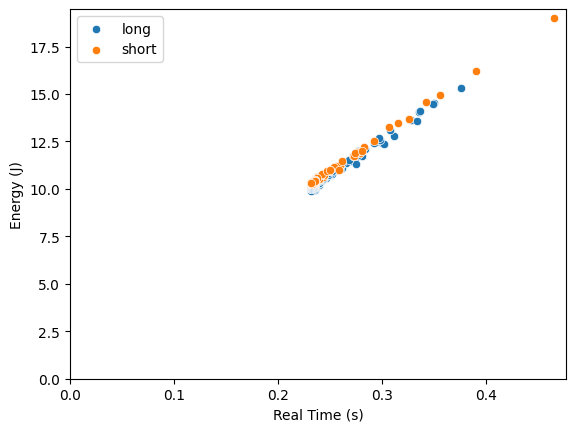

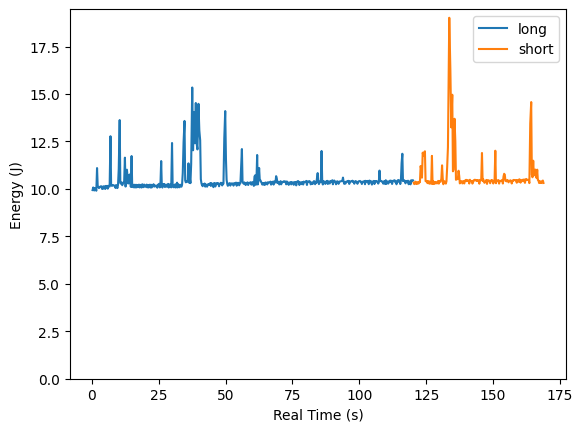

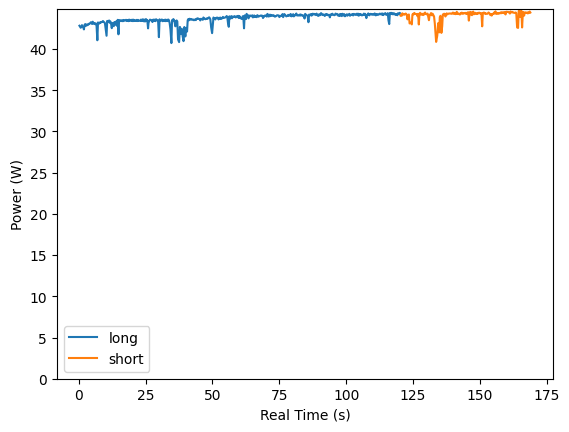

In [36]:
real, user, energy, energy_user, w, t = getxy([(234731575, 232009558, 10053807, 16), (236200366, 235998553, 10084874, 16), (234027802, 235861136, 9966711, 16), (234196577, 232133693, 10007786, 16), (234139382, 235876326, 10045202, 16), (234122014, 235871589, 10001622, 16), (234809489, 232150467, 10017003, 16), (265829648, 261834105, 11266878, 16), (241234781, 236534932, 10358616, 16), (237169929, 234989491, 10204807, 16), (234543836, 235729173, 10043004, 16), (234556185, 235895218, 10079320, 16), (236405771, 235961077, 10136998, 16), (235805959, 235960072, 10137731, 16), (235850343, 235977820, 10133946, 16), (234182365, 232125866, 10087926, 16), (234917656, 235900851, 10117650, 16), (234226747, 232123095, 10104466, 16), (234459063, 235893406, 10141637, 16), (234215291, 235878284, 10117100, 16), (235424898, 232226919, 10132421, 16), (234440883, 235860881, 10156346, 16), (234800425, 235900186, 10135838, 16), (236099164, 235989106, 10165440, 16), (234391018, 232114861, 10110570, 16), (236221592, 236008570, 10160863, 16), (235878297, 235987129, 10167576, 16), (236175002, 236007893, 10132482, 16), (312089844, 311072747, 12817472, 16), (237996884, 236093195, 10289646, 16), (235832690, 235979109, 10163365, 16), (236351475, 236000344, 10186254, 16), (236105156, 236000597, 10207981, 16), (236329039, 236003903, 10205113, 16), (235082786, 235905113, 10170384, 16), (234666248, 235899425, 10161779, 16), (234470720, 232139936, 10149876, 16), (235186448, 235909914, 10206273, 16), (234126854, 235871010, 10134373, 16), (235534059, 232219162, 10186925, 16), (236704982, 239782706, 10215367, 16), (264184531, 259925162, 11233247, 16), (349754749, 327450632, 14555505, 16), (240803943, 237603447, 10455295, 16), (240485955, 237436655, 10404088, 16), (238870441, 239241364, 10340854, 16), (234502122, 235902349, 10194188, 16), (239838401, 238101107, 10359776, 16), (241531915, 238376140, 10470859, 16), (244878147, 241523357, 10549595, 16), (277076681, 273798771, 11785736, 16), (239303638, 234548445, 10329258, 16), (245381387, 245908270, 10576572, 16), (262824857, 257458314, 11241732, 16), (249123762, 245124245, 10783664, 16), (241656928, 237822835, 10451511, 16), (252210563, 250005741, 10828647, 16), (237429209, 239781910, 10301182, 16), (252463174, 251756127, 10808017, 16), (234359796, 232126062, 10205418, 16), (280717774, 280873760, 11731354, 16), (234950930, 232127246, 10220067, 16), (234493026, 235876683, 10204136, 16), (235051261, 235938298, 10215977, 16), (235137810, 232166745, 10202855, 16), (234981308, 235919283, 10219578, 16), (234901028, 235913655, 10208653, 16), (234254640, 232129724, 10162023, 16), (234624341, 235861939, 10214085, 16), (234357796, 235891857, 10178624, 16), (235014362, 232175206, 10214756, 16), (234786231, 235913661, 10212377, 16), (234731180, 235911309, 10223423, 16), (234498711, 232123263, 10178624, 16), (234536261, 235887978, 10208592, 16), (234597952, 235905798, 10206029, 16), (234299682, 232141469, 10165684, 16), (235099033, 235934268, 10245213, 16), (234462906, 235899408, 10180577, 16), (234649227, 232161237, 10200413, 16), (234893271, 235908690, 10229283, 16), (234239302, 235879402, 10170201, 16), (234639534, 232137556, 10221593, 16), (234090406, 235871775, 10156529, 16), (234771300, 235902964, 10227086, 16), (234218480, 232132446, 10172520, 16), (234777202, 235880291, 10211216, 16), (234351677, 232136476, 10173253, 16), (234302606, 235875400, 10176671, 16), (234767841, 235920823, 10222081, 16), (234136377, 232111623, 10160862, 16), (234697316, 235915347, 10219151, 16), (234244028, 232124752, 10166234, 16), (234264722, 235881136, 10177098, 16), (234085417, 235871160, 10172398, 16), (236396585, 236014777, 10263035, 16), (234725587, 232166559, 10229710, 16), (234527079, 235906514, 10183385, 16), (234298436, 235883709, 10170933, 16), (235116281, 232151078, 10256261, 16), (234390440, 235883225, 10172459, 16), (234415849, 232137991, 10162816, 16), (234588044, 235909217, 10223729, 16), (234344612, 235891576, 10160740, 16), (235383619, 235938303, 10270482, 16), (234289685, 232128069, 10171238, 16), (235058809, 235939887, 10224095, 16), (276418788, 269728624, 11751374, 16), (234459672, 235894588, 10171605, 16), (234420121, 232142599, 10169896, 16), (235054072, 235938608, 10240757, 16), (234582785, 235860713, 10215489, 16), (235725243, 235933505, 10259312, 16), (234667150, 232160294, 10207494, 16), (234932067, 235900132, 10167393, 16), (234737185, 235906577, 10224827, 16), (234522976, 232149665, 10218053, 16), (234294312, 235877798, 10170384, 16), (235594239, 235963210, 10265660, 16), (234756637, 232166642, 10184910, 16), (234571005, 235904922, 10229405, 16), (235031581, 235934203, 10233189, 16), (235003842, 235929138, 10222081, 16), (234360265, 232127221, 10178258, 16), (301165700, 299628209, 12482206, 16), (235156491, 232171608, 10254247, 16), (234374498, 235879444, 10175816, 16), (234403035, 232147918, 10180577, 16), (234321852, 235886917, 10209752, 16), (234885080, 235922461, 10235813, 16), (234643202, 232159829, 10179173, 16), (234700279, 235917146, 10216222, 16), (238003159, 239621284, 10329319, 16), (234455471, 232137236, 10178136, 16), (235059387, 235924314, 10243748, 16), (234468230, 235879079, 10171238, 16), (235238754, 232195067, 10218541, 16), (234602946, 235880657, 10219212, 16), (234484983, 235900164, 10175267, 16), (234451509, 232141732, 10217808, 16), (235186971, 235946426, 10229283, 16), (256982435, 251103790, 11092257, 16), (302780858, 293808076, 12836881, 16), (353680617, 333472676, 14403894, 16), (246000251, 240156203, 10701633, 16), (238951686, 238141315, 10382115, 16), (240296843, 238032441, 10486240, 16), (239921519, 238147788, 10442844, 16), (245050195, 241816393, 10601597, 16), (270052792, 265322598, 11548616, 16), (242579390, 237982934, 10526280, 16), (245321248, 243544455, 10666049, 16), (242982049, 237685715, 10533787, 16), (276739599, 274779715, 11394197, 16), (399992774, 375638121, 16337360, 16), (299678896, 281929686, 12792692, 16), (352666025, 335706022, 14754112, 16), (307620086, 292083055, 13065152, 16), (372207043, 349672797, 15462912, 16), (319769301, 302370780, 13098355, 16), (299988979, 283070585, 12802213, 16), (374338327, 348698659, 15547751, 16), (325892747, 307307757, 13872890, 16), (315700791, 298166286, 13300625, 16), (241739755, 243129623, 10512729, 16), (235956644, 235992808, 10297520, 16), (234407925, 235888982, 10194615, 16), (235420053, 232208018, 10283543, 16), (234863341, 235921921, 10249241, 16), (234846318, 235879114, 10230565, 16), (235723964, 235978480, 10283787, 16), (234561964, 232120903, 10225621, 16), (234845226, 235919007, 10236424, 16), (234338431, 235881399, 10194432, 16), (235196348, 232177037, 10248570, 16), (234999135, 235933281, 10223851, 16), (235354910, 235948056, 10257725, 16), (234681397, 235905538, 10212071, 16), (235043650, 235916724, 10266331, 16), (236037235, 235995136, 10305332, 16), (235352506, 232191384, 10292943, 16), (235901767, 235951276, 10303745, 16), (234947255, 235892584, 10256627, 16), (234959346, 235911448, 10252293, 16), (234696438, 232152115, 10202855, 16), (235904297, 235991013, 10302891, 16), (236243993, 239750846, 10312229, 16), (235130093, 232179444, 10254918, 16), (234853891, 235922889, 10228550, 16), (235032296, 235931782, 10302159, 16), (236108611, 235959668, 10313389, 16), (234917167, 235929336, 10261510, 16), (236011620, 235996667, 10295078, 16), (234665181, 232140575, 10249059, 16), (234940960, 235925084, 10268955, 16), (234900882, 235884493, 10253819, 16), (236081117, 235982708, 10328404, 16), (235599134, 235964395, 10307530, 16), (234947167, 232155365, 10304295, 16), (234887008, 235923914, 10280430, 16), (235633490, 235963282, 10276280, 16), (308395067, 297127853, 13146633, 16), (350057694, 336261038, 14679406, 16), (278441903, 268125978, 11984894, 16), (239929812, 239054939, 10516697, 16), (234893978, 236025068, 10256382, 16), (234159179, 232214401, 10247593, 16), (235533554, 236000984, 10268041, 16), (235091066, 235989914, 10285374, 16), (235276837, 236016250, 10306553, 16), (234031697, 232175354, 10255039, 16), (234819573, 235904393, 10269200, 16), (236138497, 236001463, 10294957, 16), (234890865, 235900368, 10288059, 16), (235121557, 235933118, 10276219, 16), (234558471, 232157440, 10278416, 16), (236117997, 236005194, 10306126, 16), (234585805, 235900592, 10258519, 16), (235215049, 235947455, 10287571, 16), (235340542, 235909133, 10331944, 16), (234610109, 232152512, 10274754, 16), (235150642, 235886382, 10297215, 16), (235513324, 235926089, 10318760, 16), (235282130, 235930048, 10315953, 16), (234774870, 232130493, 10305210, 16), (234148015, 235867275, 10304661, 16), (234851219, 235916205, 10303013, 16), (261738853, 258327394, 11293001, 16), (288573140, 283320761, 12323394, 16), (236201551, 235995134, 10385777, 16), (236167302, 235998163, 10320225, 16), (234447299, 235855748, 10267246, 16), (235068595, 235905229, 10342381, 16), (235054818, 235936167, 10280552, 16), (235568562, 232212703, 10350865, 16), (235027970, 235936820, 10309422, 16), (234846215, 235912645, 10317234, 16), (235117141, 235840292, 10344151, 16), (234652875, 232152511, 10315342, 16), (235000168, 235936202, 10301365, 16), (235007761, 235916770, 10315037, 16), (234876458, 235924477, 10333653, 16), (235971641, 235998029, 10353245, 16), (234916329, 232157166, 10343785, 16), (235473282, 235954325, 10304783, 16), (235440764, 235890066, 10359287, 16), (234517643, 235901679, 10281224, 16), (234629766, 232142648, 10268834, 16), (244154455, 243869056, 10663181, 16), (245465694, 247675134, 10714877, 16), (234919405, 232175027, 10332432, 16), (234908270, 235930585, 10322789, 16), (277239337, 277242803, 11787506, 16), (234490246, 232140252, 10337681, 16), (237569018, 239445716, 10426304, 16), (263699438, 254399254, 11506990, 16), (239606062, 236451507, 10608249, 16), (237382870, 238552742, 10456699, 16), (235332556, 235950196, 10377659, 16), (236019710, 235979052, 10320408, 16), (234502344, 232146448, 10332859, 16), (234202537, 235871209, 10294164, 16), (234381533, 232124976, 10329197, 16), (234235011, 235876295, 10311924, 16), (234273804, 232134169, 10302769, 16), (234438447, 235872428, 10337925, 16), (234848268, 235891823, 10296361, 16), (234949066, 235931484, 10323948, 16), (234685078, 232154284, 10345676, 16), (235826624, 235986851, 10350133, 16), (235415127, 235920143, 10344944, 16), (234875110, 235921715, 10335911, 16), (236247310, 236013692, 10364109, 16), (235365467, 235912597, 10382542, 16), (234088262, 232127912, 10311558, 16), (235275083, 235947966, 10335118, 16), (234860858, 235917868, 10338535, 16), (235981554, 235985322, 10383518, 16), (234696372, 232160525, 10339024, 16), (235804850, 235975714, 10394017, 16), (234739601, 235909084, 10339451, 16), (234727528, 235910577, 10338108, 16), (243839693, 243915141, 10672214, 16), (242588461, 240066778, 10667270, 16), (234548203, 235907966, 10310581, 16), (235572298, 235973272, 10382481, 16), (234993268, 235934682, 10353611, 16), (234904934, 232141272, 10357274, 16), (235054956, 235924873, 10327610, 16), (235096088, 235930669, 10407200, 16), (234503021, 232141794, 10344334, 16), (236093163, 236003448, 10375706, 16), (234347315, 235888741, 10351108, 16), (235631204, 235975571, 10365025, 16), (235515070, 235966938, 10400974, 16), (235919558, 235957795, 10387608, 16), (236123090, 235986181, 10406590, 16), (235373636, 235940164, 10364658, 16), (234794356, 232172977, 10356724, 16), (235696303, 235975554, 10394688, 16), (234224866, 235857679, 10301487, 16), (235249685, 235950066, 10334935, 16), (235010190, 232187751, 10336765, 16), (234803430, 235922086, 10330540, 16), (234424191, 235883397, 10336461, 16), (234919545, 235918763, 10360447, 16), (235453577, 232212189, 10380344, 16), (234825089, 235919208, 10350010, 16), (235677148, 236014199, 10341649, 16), (234717742, 235809308, 10333225, 16), (235242942, 232201053, 10350010, 16), (235064265, 235927548, 10357579, 16), (235105006, 235933087, 10352207, 16), (234306145, 235882838, 10367588, 16), (234775259, 232162140, 10300389, 16), (234963393, 235933377, 10352574, 16), (235084855, 235901702, 10402073, 16), (236103269, 236001373, 10416233, 16), (235279510, 235945875, 10371311, 16), (234318935, 232140694, 10301548, 16), (235095771, 235942580, 10348057, 16), (234925994, 235901445, 10340611, 16), (234616139, 232150280, 10358433, 16), (234888082, 235926802, 10347203, 16), (234767201, 235915760, 10365635, 16), (234275873, 232140020, 10325169, 16), (234646919, 235911531, 10385166, 16), (235392266, 235951719, 10352085, 16), (235377049, 235957394, 10354405, 16), (235578456, 235966839, 10389439, 16), (235581583, 235926834, 10420810, 16), (235601855, 232205125, 10358983, 16), (236141355, 235994221, 10397312, 16), (235106011, 235938449, 10381565, 16), (235080133, 235906404, 10371617, 16), (235000705, 235934921, 10413913, 16), (235270477, 235952802, 10370396, 16), (234836833, 232175580, 10356968, 16), (234396616, 235896087, 10328831, 16), (234464078, 235890375, 10337376, 16), (234523080, 232147301, 10360936, 16), (234406874, 235891543, 10328709, 16), (235432935, 235963090, 10407017, 16), (235972439, 235992649, 10401950, 16), (234944170, 232182334, 10368321, 16), (234993605, 235933715, 10361180, 16), (234641954, 235876385, 10319919, 16), (239823051, 239897235, 10568821, 16), (249311095, 247857968, 10896212, 16), (234332660, 235884741, 10374486, 16), (235164348, 232193186, 10383823, 16), (235016638, 235915095, 10374058, 16), (236106044, 236000201, 10407749, 16), (235308499, 235944709, 10348240, 16), (282051815, 277370489, 12201141, 16), (235931028, 235891887, 10425388, 16), (234793446, 232154876, 10347386, 16), (235630517, 235973277, 10408054, 16), (234749523, 235869323, 10387303, 16), (235466599, 235930922, 10374302, 16), (235058647, 232184873, 10389317, 16), (234526970, 235897131, 10389316, 16), (234522570, 235901115, 10365391, 16), (235509249, 235961994, 10425511, 16), (234646753, 232142465, 10369175, 16), (235169055, 235935345, 10392612, 16), (234515955, 235899743, 10348424, 16), (234546909, 232156195, 10390720, 16), (235796270, 235982882, 10418003, 16), (236467637, 236027233, 10414341, 16), (236196324, 235991938, 10399204, 16), (236450713, 239776029, 10457493, 16), (235560294, 232175581, 10392063, 16), (235274327, 235931875, 10381566, 16), (235425993, 235949738, 10443210, 16), (234580983, 235902498, 10389073, 16), (235094806, 235938210, 10384006, 16), (234531961, 232151574, 10348607, 16), (234686055, 235917811, 10374973, 16), (235776545, 235981410, 10403843, 16), (235015603, 235928982, 10344700, 16), (235673199, 232219051, 10419468, 16), (234735428, 235900278, 10386204, 16), (235136132, 235939215, 10378147, 16), (235157259, 235916355, 10398961, 16), (237821467, 235869250, 10489108, 16), (236217687, 236007653, 10426793, 16), (236263005, 236014587, 10433994, 16), (241679636, 243255384, 10596897, 16), (235016016, 235928848, 10376865, 16), (234532547, 232141939, 10372959, 16), (234487406, 235902550, 10357152, 16), (234403950, 232138590, 10381626, 16), (235084994, 235918679, 10383152, 16), (235307119, 235949092, 10388523, 16), (235213304, 235950291, 10374668, 16), (236080091, 235989255, 10425206, 16), (235252146, 235886149, 10422336, 16), (235124081, 232175638, 10392125, 16), (234804397, 235912726, 10394138, 16), (234901031, 235888826, 10392796, 16), (236352613, 236018951, 10415256, 16), (236284435, 236014532, 10405247, 16), (236389873, 236015895, 10447910, 16), (235645259, 235976427, 10374302, 16), (234685752, 235915515, 10386937, 16), (234465047, 232149528, 10374851, 16), (235978957, 235829899, 10382603, 16), (235165309, 235944934, 10414097, 16), (235096588, 235930730, 10387302, 16), (235275147, 235908197, 10367894, 16), (234824637, 232171356, 10387790, 16), (235581604, 235973506, 10360692, 16), (235773995, 235974675, 10404758, 16), (235975054, 235971594, 10405064, 16), (235604188, 235972113, 10418979, 16), (235683017, 235952588, 10382176, 16), (234878908, 235913377, 10374912, 16), (234748999, 232168960, 10372044, 16), (234508011, 235898778, 10382237, 16), (235534025, 235969093, 10373447, 16), (234800310, 235924741, 10360875, 16), (235881196, 235989897, 10421055, 16), (235257672, 232168504, 10382725, 16), (235688315, 235961141, 10426242, 16), (235569469, 235970347, 10383763, 16), (234837884, 235919295, 10396274, 16), (235569099, 235969110, 10421238, 16), (235025992, 235926781, 10383153, 16), (235393354, 232166434, 10391636, 16), (236088378, 235999136, 10442539, 16), (235240918, 235932104, 10419834, 16), (234429982, 235889027, 10341953, 16), (234702842, 235899445, 10395237, 16), (234917523, 232174045, 10347447, 16), (234635130, 235884497, 10379917, 16), (234936621, 235907069, 10374180, 16), (235591346, 235969125, 10420567, 16), (235041165, 232178446, 10383091, 16), (236296061, 236016659, 10416355, 16), (234998241, 236093071, 10371495, 16), (235879524, 235807473, 10420383, 16), (234764773, 235919773, 10400547, 16), (235027010, 235895075, 10374852, 16), (234736558, 232167628, 10393162, 16), (234753546, 235904395, 10351841, 16), (250612638, 251722969, 10965487, 16), (238011868, 236027595, 10510471, 16), (236387805, 235986287, 10436436, 16), (234478791, 235890742, 10394199, 16), (235666081, 235956476, 10398228, 16), (234896632, 235917624, 10358066, 16), (234430599, 232145143, 10376011, 16), (234926311, 235923032, 10399937, 16), (235007073, 235936556, 10396641, 16), (235514806, 232217019, 10400120, 16), (236432374, 239776236, 10456516, 16), (235180790, 232174529, 10397679, 16), (234416485, 235886552, 10349582, 16), (234627710, 235907454, 10398717, 16), (234784373, 232155724, 10396091, 16), (235581736, 235938728, 10385716, 16), (234703244, 235904286, 10385166, 16), (236394977, 236023526, 10457615, 16), (234629260, 235911017, 10355869, 16), (236033777, 235995132, 10429722, 16), (235177598, 232185864, 10392246, 16), (234766706, 235895204, 10398900, 16), (235628307, 235971590, 10434421, 16), (236367890, 236021379, 10448582, 16), (236557397, 236030115, 10480503, 16), (234431285, 235890893, 10355686, 16), (234629237, 235905173, 10398411, 16), (234602843, 232154360, 10352024, 16), (234998598, 235890064, 10396641, 16), (235958318, 235984640, 10447666, 16), (236196283, 236010110, 10478733, 16), (234661381, 235909676, 10367649, 16), (235822163, 235966715, 10438206, 16), (235299815, 232201251, 10392491, 16), (235545119, 235964431, 10448276, 16), (261069191, 261925245, 11354463, 16), (282510535, 275395815, 12157989, 16), (234562730, 235903034, 10409275, 16), (236432642, 236002026, 10462315, 16), (235542942, 235926006, 10457981, 16), (235128528, 235911089, 10404392, 16), (234543070, 232154141, 10399571, 16), (235576326, 236094055, 10414158, 16), (234922261, 235796335, 10415683, 16), (234544881, 235908319, 10397374, 16), (236288465, 235910933, 10448337, 16), (234401993, 232137149, 10345188, 16), (234377732, 235884347, 10368198, 16), (234915676, 235918007, 10395665, 16), (234803265, 232171352, 10355869, 16), (235737218, 235981405, 10455784, 16), (235759679, 235964162, 10448887, 16), (235338801, 235954487, 10414219, 16), (235443565, 235910821, 10444980, 16)])
real_short, user_short, energy_short, energy_user_short, w_short, t_short = getxy([(234420169, 234841089, 10329686, 16), (234790972, 232139761, 10370701, 16), (234264095, 235861839, 10318760, 16), (234117447, 235881057, 10380344, 16), (234405030, 232139821, 10364354, 16), (233972336, 235868145, 10336094, 16), (233976305, 232118909, 10354649, 16), (234403306, 235897961, 10359043, 16), (234867330, 232174030, 10406712, 16), (234486871, 235879972, 10382358, 16), (234479569, 235894472, 10353428, 16), (259168256, 256956606, 11301668, 16), (257483387, 249843135, 11351045, 16), (246319860, 239670177, 10887424, 16), (276221644, 279132727, 11908111, 16), (273890924, 271882094, 11827912, 16), (276284604, 275881587, 11939056, 16), (278703829, 279570958, 11982208, 16), (236669932, 235684830, 10457005, 16), (234744650, 235894791, 10394627, 16), (235690377, 235972373, 10418430, 16), (234430959, 232148348, 10405430, 16), (234771635, 235899253, 10393894, 16), (235261565, 235919330, 10412327, 16), (235065287, 232186806, 10400547, 16), (234525365, 235899936, 10378392, 16), (233956556, 235855881, 10293186, 16), (234807565, 232127929, 10396946, 16), (273113544, 273408021, 11740143, 16), (234012381, 232115884, 10344884, 16), (234486585, 235890125, 10411899, 16), (234107341, 232128656, 10349095, 16), (234018657, 235867136, 10340855, 16), (234535379, 232135512, 10388828, 16), (234666706, 235896246, 10362278, 16), (234168239, 235863601, 10333165, 16), (235681450, 232188408, 10442600, 16), (234042866, 235873457, 10349033, 16), (234542003, 235906080, 10421788, 16), (234836440, 232173154, 10396335, 16), (235477567, 235946979, 10421238, 16), (235367746, 235956206, 10404393, 16), (234296150, 235886377, 10380100, 16), (243316999, 240133886, 10683078, 16), (258388483, 259653539, 11241121, 16), (239536593, 239831275, 10572117, 16), (234374553, 232147209, 10344578, 16), (234729832, 235917909, 10410740, 16), (234442001, 235896142, 10396641, 16), (234893786, 235893403, 10356174, 16), (234474622, 232143837, 10381688, 16), (235987205, 235806674, 10410251, 16), (260725801, 253681346, 11463594, 16), (289748624, 282947617, 12488310, 16), (497448474, 465277315, 20331125, 16), (417201291, 390006433, 17368608, 16), (324393839, 306988280, 13992335, 16), (377650780, 356002640, 15871419, 16), (252306936, 249070175, 11068514, 16), (254627247, 250262338, 11213228, 16), (335403516, 326382419, 14074671, 16), (302866017, 292220380, 12956876, 16), (240607713, 237160869, 10634189, 16), (238763471, 237566012, 10559483, 16), (239037966, 237412657, 10586887, 16), (238987069, 238074823, 10577121, 16), (253906286, 249304944, 11159579, 16), (241915327, 241645438, 10700534, 16), (234896184, 232102497, 10413425, 16), (235478951, 235938660, 10407628, 16), (234871249, 235889784, 10399631, 16), (234982566, 235930925, 10408238, 16), (234726403, 232147449, 10402805, 16), (234206345, 235871063, 10376255, 16), (234907203, 235919414, 10412083, 16), (235263004, 232196195, 10420872, 16), (235219594, 235949111, 10415500, 16), (235897956, 235988019, 10462132, 16), (235833310, 236112500, 10477939, 16), (235090972, 235785479, 10408238, 16), (235591291, 235967188, 10457798, 16), (235147473, 235927025, 10420566, 16), (236430929, 235978070, 10458897, 16), (235066574, 232146443, 10411228, 16), (235422160, 235961253, 10481724, 16), (235339830, 235918371, 10415684, 16), (234772239, 235909897, 10409824, 16), (235415208, 235959585, 10416355, 16), (234995066, 232181346, 10404270, 16), (234192177, 235873202, 10349217, 16), (235722337, 235963968, 10454746, 16), (235847815, 235979919, 10453648, 16), (236647704, 236036566, 10512607, 16), (236532613, 236032129, 10475498, 16), (235793280, 235975357, 10463108, 16), (235049175, 235901301, 10416539, 16), (236228714, 235994021, 10474521, 16), (235699040, 235976374, 10462925, 16), (234622989, 235885100, 10412632, 16), (234351059, 232143798, 10371067, 16), (235947166, 235971640, 10474217, 16), (236426362, 236022625, 10474643, 16), (235417757, 235962433, 10470676, 16), (278917115, 273686522, 12120148, 16), (235568887, 235958147, 10415317, 16), (236357866, 236018174, 10521946, 16), (234867587, 235923386, 10380528, 16), (235044404, 232124102, 10451877, 16), (234879056, 235857628, 10360752, 16), (234899032, 235926529, 10416478, 16), (235110399, 235933968, 10474033, 16), (234776226, 232168708, 10381382, 16), (235762871, 235968643, 10451023, 16), (234787688, 235919146, 10426182, 16), (236348872, 236003445, 10462742, 16), (235160723, 235927999, 10406467, 16), (234696276, 232162799, 10410679, 16), (235176751, 235942501, 10410801, 16), (235737110, 235982628, 10467930, 16), (234828075, 235905935, 10418369, 16), (235151227, 235946087, 10444004, 16), (235263066, 232151544, 10423252, 16), (235007014, 235808314, 10416600, 16), (234741361, 235912088, 10412509, 16), (282484367, 280900935, 12078949, 16), (235363785, 232188733, 10441563, 16), (235027050, 235935040, 10437900, 16), (234977802, 235934842, 10440342, 16), (235518967, 235956864, 10432224, 16), (235841069, 235974313, 10464634, 16), (235043336, 232175144, 10405735, 16), (235367447, 235940860, 10420201, 16), (235135194, 235932079, 10412144, 16), (235397239, 235930115, 10428318, 16), (234743655, 235907843, 10431858, 16), (235971342, 235995924, 10473789, 16), (235205048, 232198586, 10417454, 16), (241343573, 243235774, 10647433, 16), (245232340, 243971354, 10852390, 16), (243926609, 243808783, 10748446, 16), (237661119, 235862218, 10504490, 16), (235089743, 235917176, 10413242, 16), (234957625, 235908787, 10397679, 16), (235609756, 235901204, 10471103, 16), (235437337, 235962331, 10438267, 16), (234172415, 232118849, 10438450, 16), (235407816, 235896763, 10424229, 16), (234951065, 235910376, 10417820, 16), (236369886, 236011307, 10469394, 16), (234522077, 235855601, 10409214, 16), (235444358, 232214221, 10427891, 16), (235191203, 235936412, 10431614, 16), (235069374, 235930446, 10423679, 16), (235645081, 235976533, 10472386, 16), (236301390, 236016288, 10478061, 16), (235387697, 235948434, 10467564, 16), (235453392, 235957053, 10452915, 16), (235592319, 235967567, 10464512, 16), (234893732, 232168598, 10446445, 16), (236036281, 235958583, 10468784, 16), (234840344, 235922156, 10442601, 16), (234756012, 235921299, 10376377, 16), (235960387, 235985695, 10505527, 16), (235437644, 235938603, 10482883, 16), (235312888, 232192045, 10469639, 16), (234856922, 235915619, 10456028, 16), (235101685, 235929993, 10454197, 16), (236519628, 236020276, 10503452, 16), (234831702, 235906444, 10405613, 16), (235431719, 235961704, 10491062, 16), (235775127, 235984757, 10490025, 16), (235233574, 232171668, 10453891, 16), (235806718, 235982798, 10496433, 16), (236800417, 239779337, 10524326, 16), (236222507, 236005108, 10491245, 16), (236365114, 236012871, 10490391, 16), (236879932, 236052673, 10517246, 16), (235269273, 235937017, 10455906, 16), (234854840, 232175270, 10424412, 16), (327444963, 315476889, 13956446, 16), (359244731, 342382393, 15292624, 16), (242663631, 240903385, 10831394, 16), (239258849, 237845886, 10677340, 16), (269026194, 261721095, 11806611, 16), (243646985, 241324715, 10813082, 16), (243196609, 241899798, 10858981, 16), (264660593, 258553945, 11280123, 16), (253398521, 247517954, 11196505, 16), (238146248, 237707090, 10597141, 16), (252027130, 250007921, 11102511, 16), (236661533, 235796460, 10509616, 16), (234910121, 235930389, 10443577, 16), (234985980, 232181065, 10434788, 16), (234243704, 235869767, 10399570, 16), (233891166, 232109139, 10395603, 16), (234419396, 235859225, 10390416, 16), (234099964, 232117676, 10402561, 16), (234078488, 235855665, 10395847, 16), (234332828, 235881631, 10440159, 16), (234053299, 232114419, 10399022, 16)])

ax = sns.scatterplot(x=user, y=energy_user, label='long')
sns.scatterplot(x=user_short, y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, None))
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=energy_user, label='long')
sns.lineplot(x=accx(real_short, offset=sum(real)), y=energy_user_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Energy (J)')
ax.set_ylim((0, None))
plt.show()

ax = sns.lineplot(x=accx(real), y=w, label='long')
sns.lineplot(x=accx(real_short, offset=sum(real)), y=w_short, label='short', ax=ax)
ax.set_xlabel('Real Time (s)')
ax.set_ylabel('Power (W)')
ax.set_ylim((0, None))
plt.show()